In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import utils as ut

In [2]:
df = pd.read_csv('./results/sim/joint_benchmarks.csv', index_col=0)
df = ut.extract_cols(df)
algs = df['id'].unique()
algs.sort()

/home/damian/miniconda3/envs/tf-gpu/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (24,26,27,28,29,33,34,39,41,42,43,44,45,47,48,57,58,59,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Functions

In [7]:
def plot_general(gt, p, d, sem, n):
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()

    df_case = df.loc[(df['graph_type'] == gt) & (df['graph_p'] == p) & (df['graph_d'] == d) & (df['data_sem'] == sem) & (df['data_n'] == n)]
    fig.suptitle(f'{sem.upper()} {gt.upper()}{d}, p={p}, n={n}', fontsize=15)

    for ax, alg in zip(axes, algs):
        ax.set_title(alg.upper())
        ax.set_xlabel('SHD')
        ax.set_ylabel(' ')
        sns.histplot(df_case.loc[df_case['id'] == alg, 'SHD_pattern'], ax=ax, stat='probability')

    plt.tight_layout()
    plt.savefig(f'./plots/dist/general/{sem}_{gt}{d}_p{p}_n{n}.pdf', dpi=1000)

def plot_n(gt, p, d, sem):
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()

    df_case = df.loc[(df['graph_type'] == gt) & (df['graph_p'] == p) & (df['graph_d'] == d) & (df['data_sem'] == sem)]
    fig.suptitle(f'Change in sample size (n): {sem.upper()} {gt.upper()}{d}, p={p}', fontsize=15)

    for ax, alg in zip(axes, algs):
        ax.set_title(alg.upper())
        ax.set_xlabel('SHD')
        ax.set_ylabel(' ')
        sns.histplot(df_case.loc[df_case['id'] == alg], x='SHD_pattern', hue='data_n', ax=ax, stat='probability', palette='deep')

    plt.tight_layout()
    plt.savefig(f'./plots/dist/change/delta_n_{sem}_{gt}{d}_p{p}.pdf', dpi=1000)

def plot_p(gt, d, sem, n):
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()

    df_case = df.loc[(df['graph_type'] == gt) & (df['graph_d'] == d) & (df['data_sem'] == sem) & (df['data_n'] == n)]
    fig.suptitle(f'Change in number of nodes (p): {sem.upper()} {gt.upper()}{d}, n={n}', fontsize=15)

    for ax, alg in zip(axes, algs):
        ax.set_title(alg.upper())
        ax.set_xlabel('SHD')
        ax.set_ylabel(' ')
        sns.histplot(df_case.loc[df_case['id'] == alg], x='SHD_pattern', hue='graph_p', ax=ax, stat='probability', palette='deep')

    plt.tight_layout()
    plt.savefig(f'./plots/dist/change/delta_p_{sem}_{gt}{d}_n{n}.pdf', dpi=1000)

def plot_d(gt, p, sem, n):
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()

    df_case = df.loc[(df['graph_type'] == gt) & (df['graph_p'] == p) & (df['data_sem'] == sem) & (df['data_n'] == n)]
    fig.suptitle(f'Change in edge density (d): {sem.upper()} {gt.upper()}, p={p}, n={n}', fontsize=15)

    for ax, alg in zip(axes, algs):
        ax.set_title(alg.upper())
        ax.set_xlabel('SHD')
        ax.set_ylabel(' ')
        sns.histplot(df_case.loc[df_case['id'] == alg], x='SHD_pattern', hue='graph_d', ax=ax, stat='probability', palette='deep')

    plt.tight_layout()
    plt.savefig(f'./plots/dist/change/delta_d_{sem}_{gt}_p{p}_n{n}.pdf', dpi=1000)

def plot_sem(gt, p, d, n):
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()

    df_case = df.loc[(df['graph_type'] == gt) & (df['graph_p'] == p) & (df['graph_d'] == d) & (df['data_n'] == n)]
    fig.suptitle(f'Change in SEM type: {gt.upper()}{d}, p={p}, n={n}', fontsize=15)

    for ax, alg in zip(axes, algs):
        ax.set_title(alg.upper())
        ax.set_xlabel('SHD')
        ax.set_ylabel(' ')
        sns.histplot(df_case.loc[df_case['id'] == alg], x='SHD_pattern', hue='data_sem', ax=ax, stat='probability', palette='deep')

    plt.tight_layout()
    plt.savefig(f'./plots/dist/change/delta_sem_{gt}{d}_p{p}_n{n}.pdf', dpi=1000)

def plot_gt(p, d, sem, n):
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()

    df_case = df.loc[(df['graph_p'] == p) & (df['graph_d'] == d) & (df['data_sem'] == sem) & (df['data_n'] == n)]
    fig.suptitle(f'Change in graph type: {sem.upper()} {gt.upper()}{d}, p={p}, n={n}', fontsize=15)

    for ax, alg in zip(axes, algs):
        ax.set_title(alg.upper())
        ax.set_xlabel('SHD')
        ax.set_ylabel(' ')
        sns.histplot(df_case.loc[df_case['id'] == alg], x='SHD_pattern', hue='graph_type', ax=ax, stat='probability', palette='deep')

    plt.tight_layout()
    plt.savefig(f'./plots/dist/change/delta_gt_{sem}_{d}_p{p}_n{n}.pdf', dpi=1000)

## General

/tmp/ipykernel_733290/3928041978.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(2, 4, figsize=(20, 10))


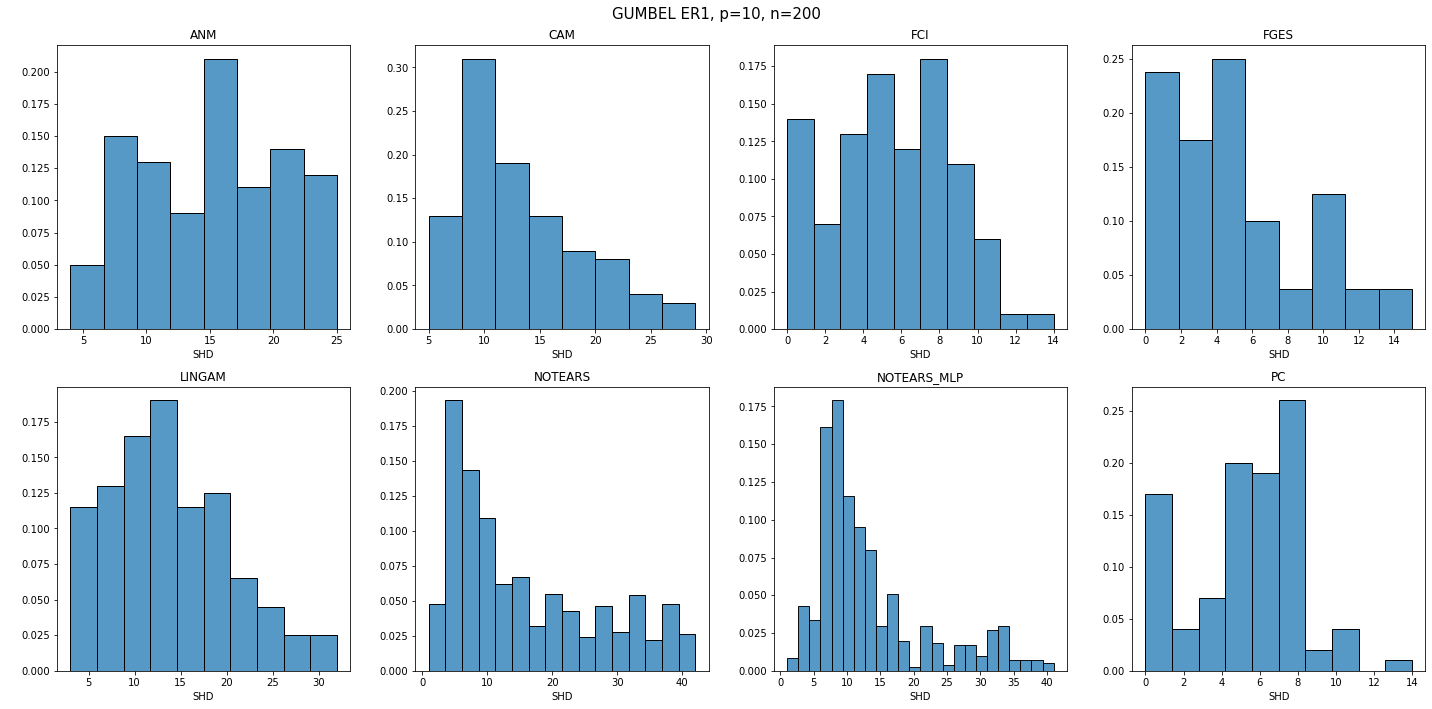

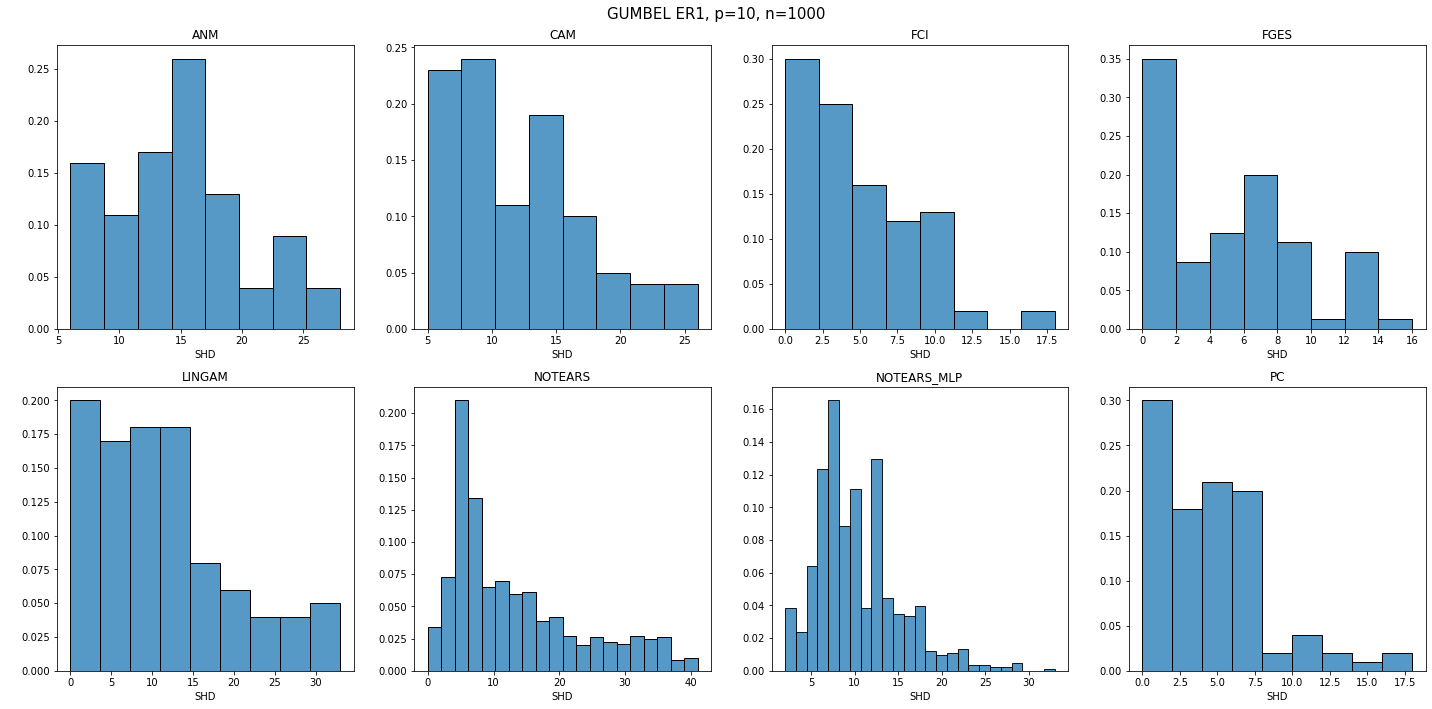

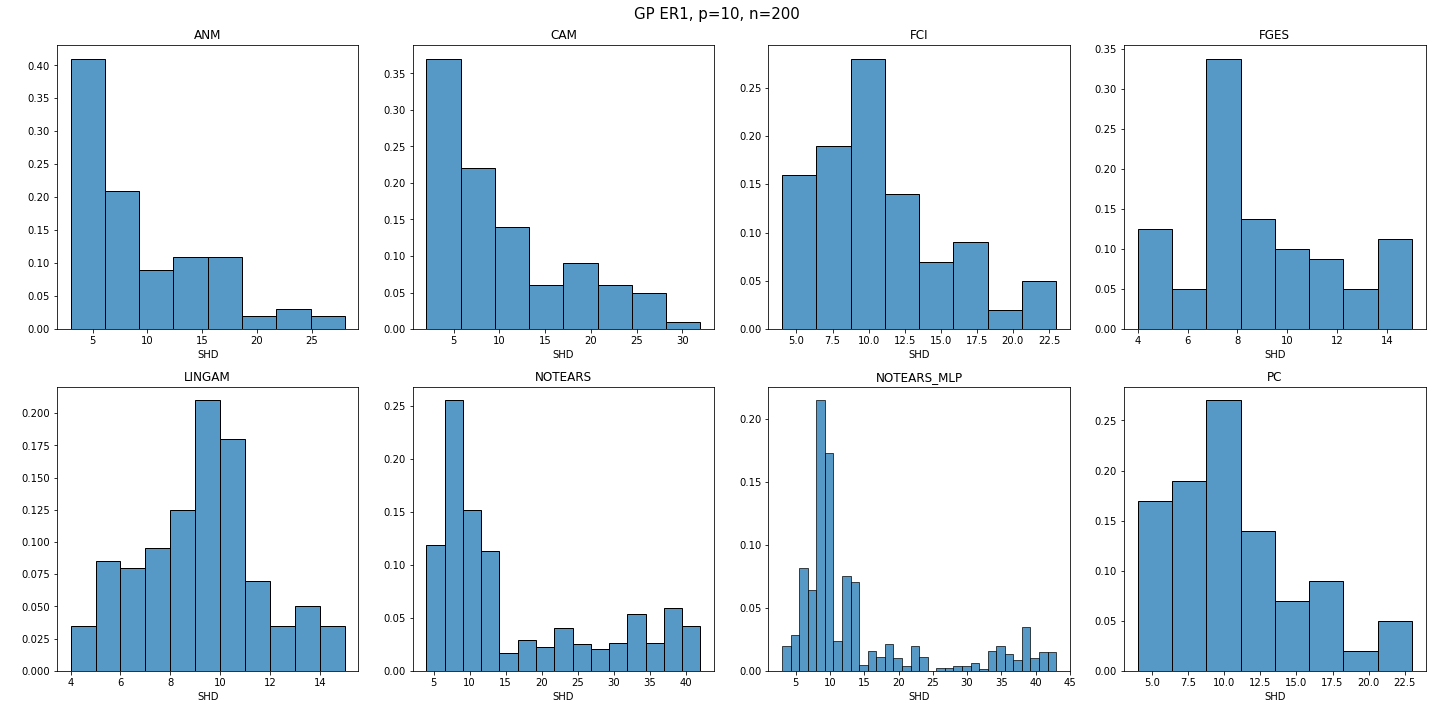

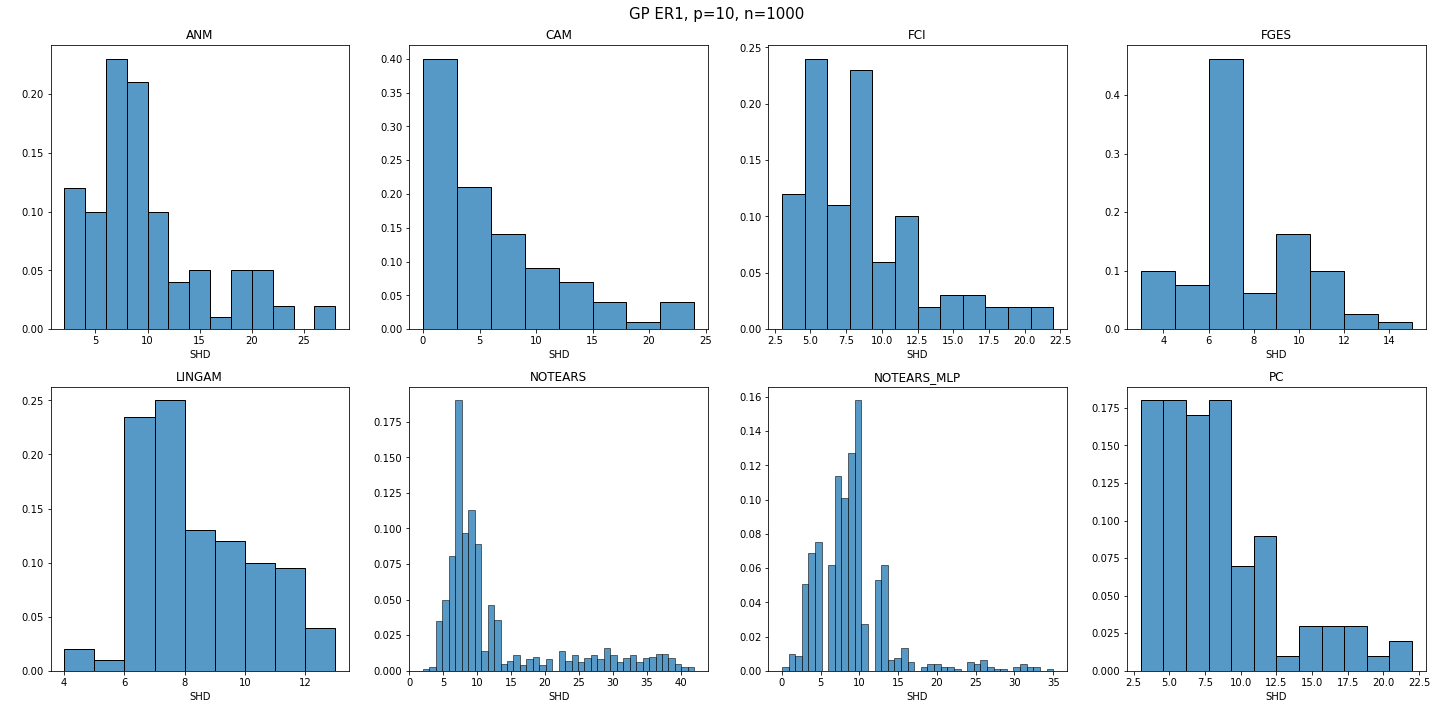

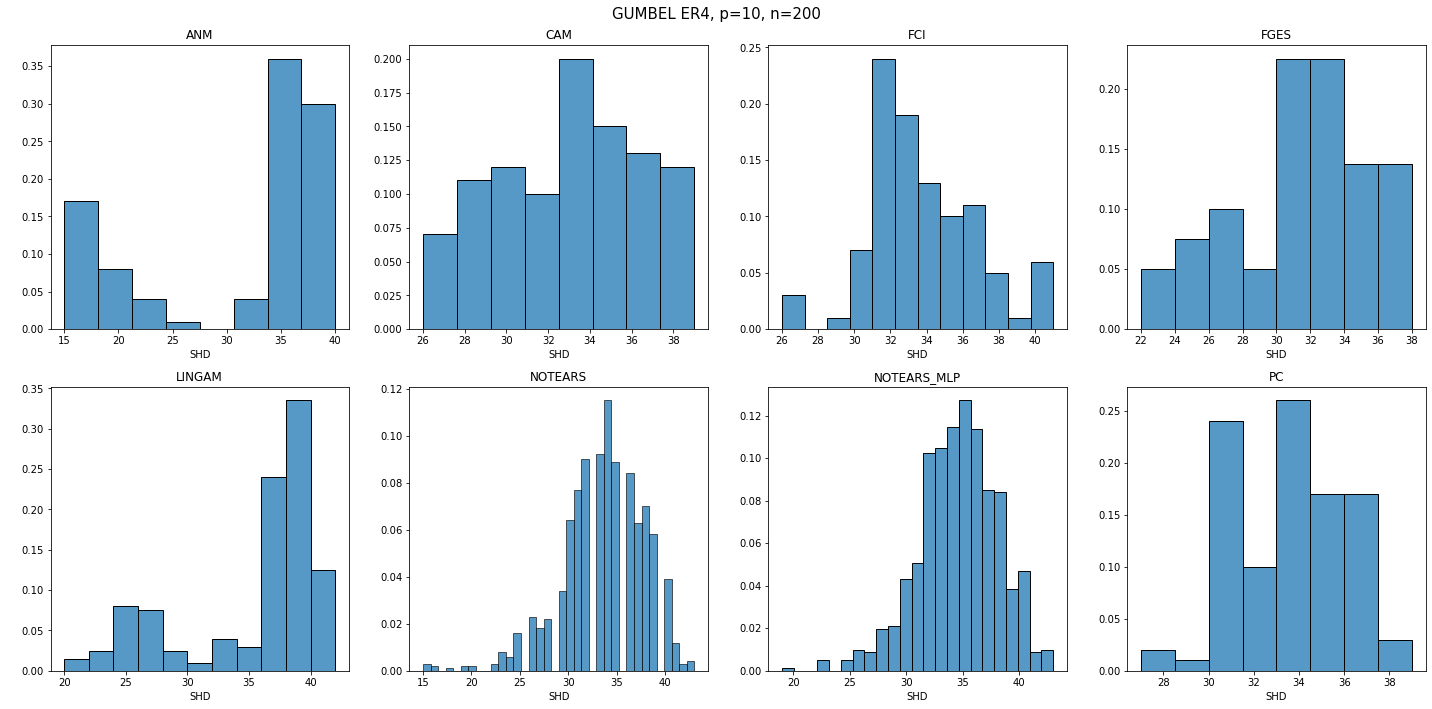

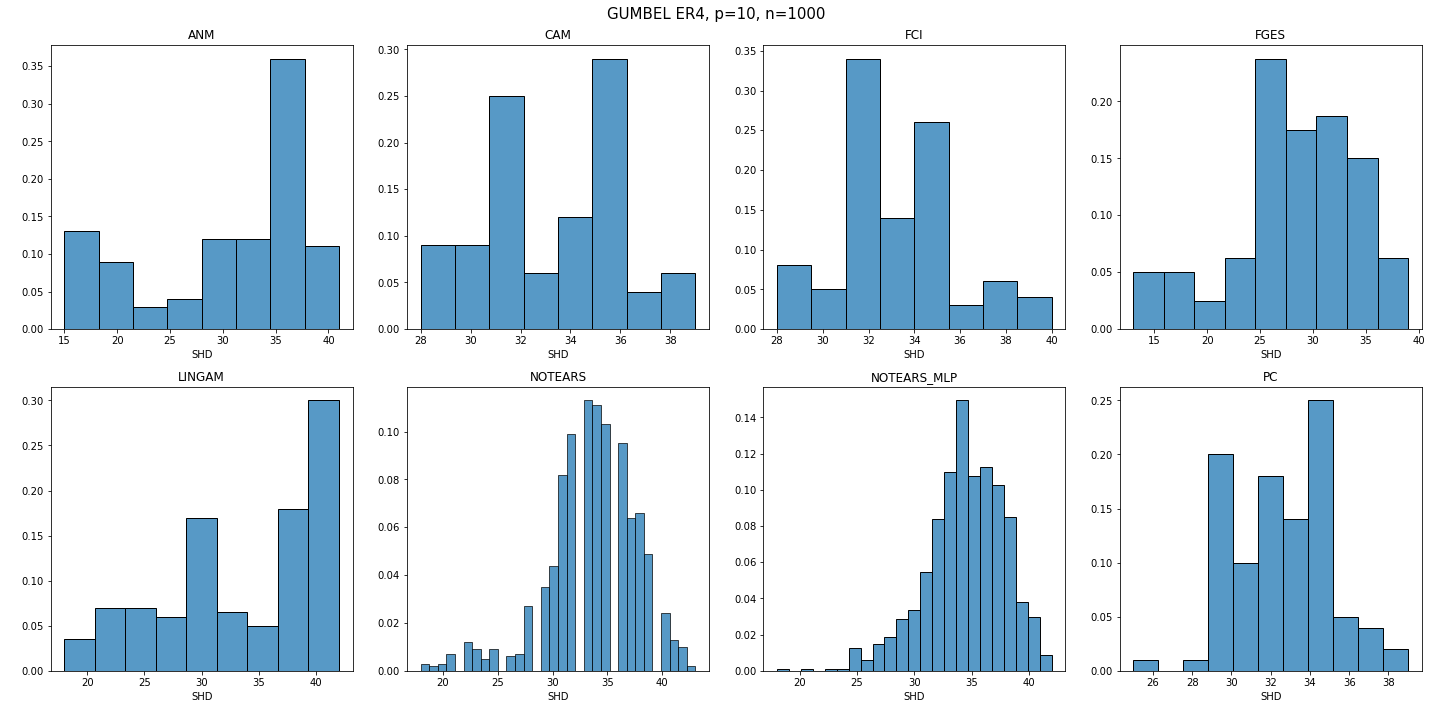

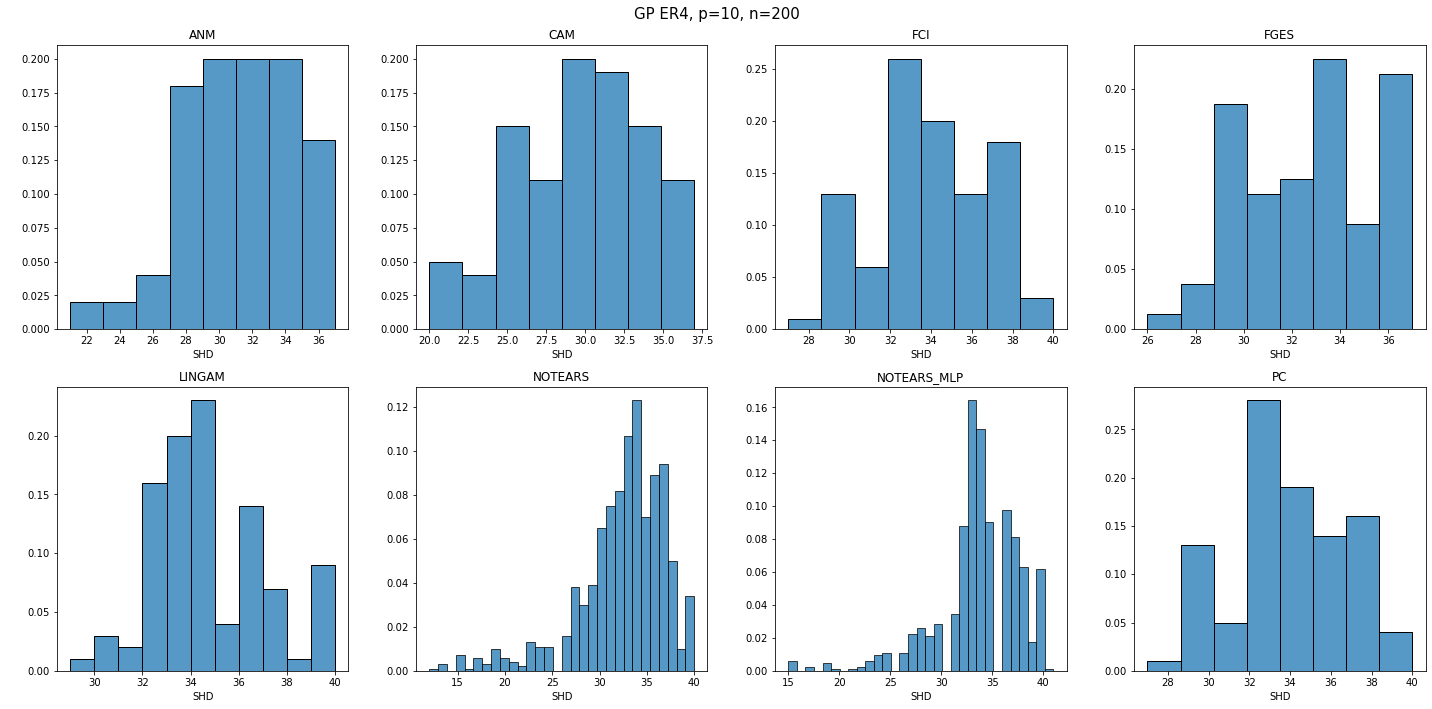

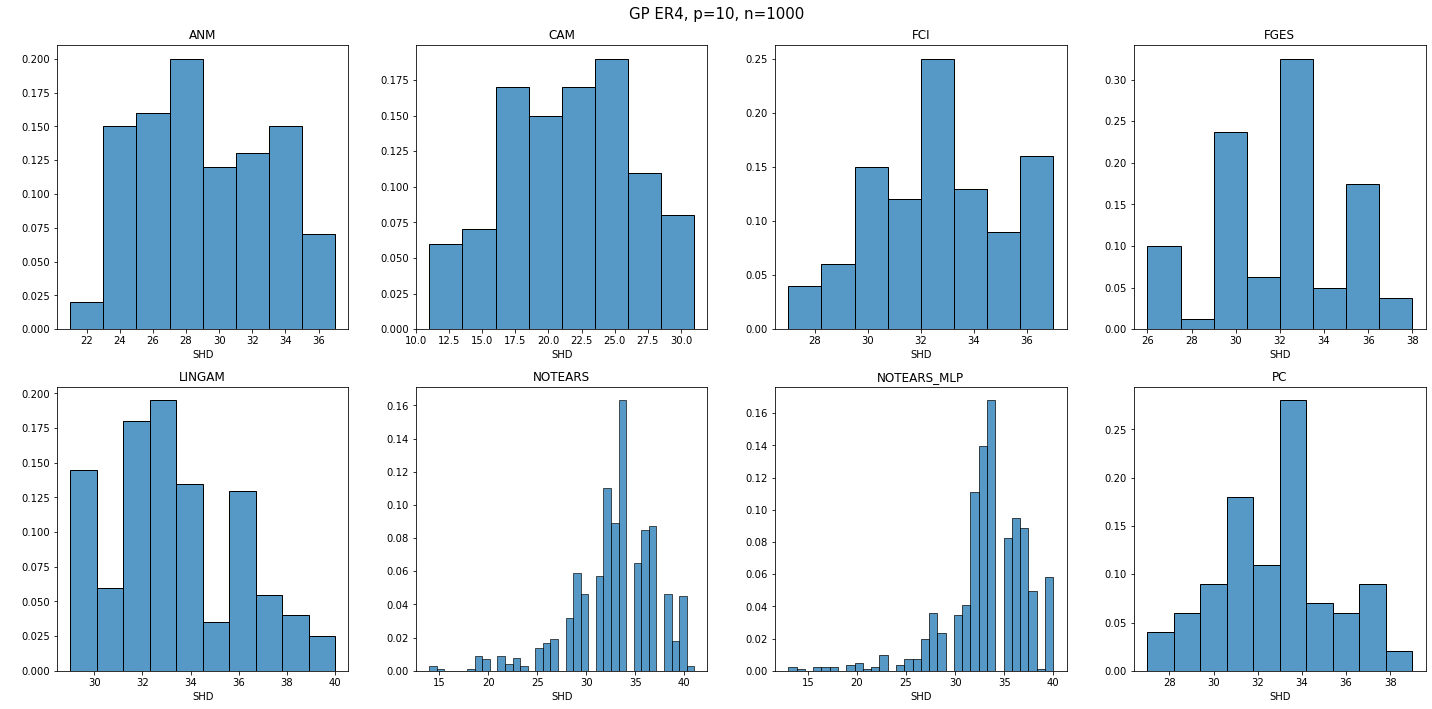

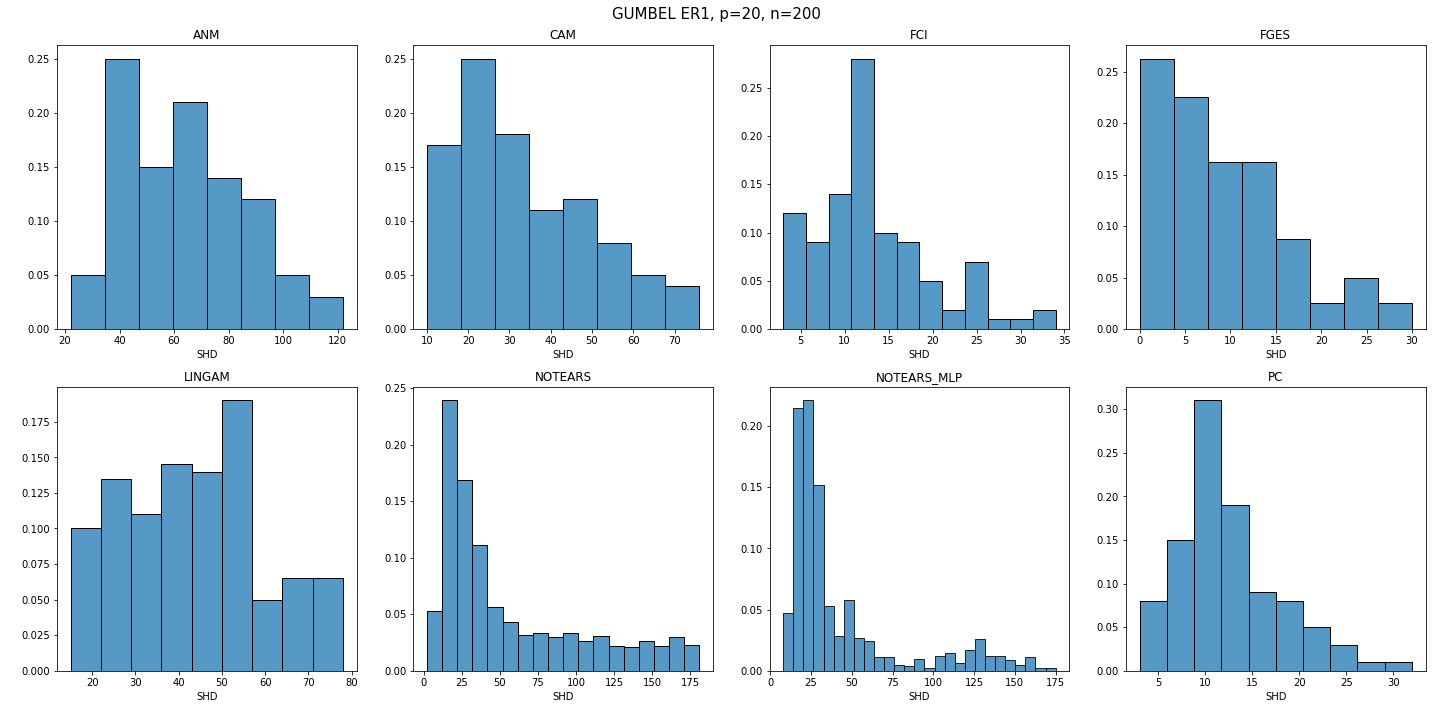

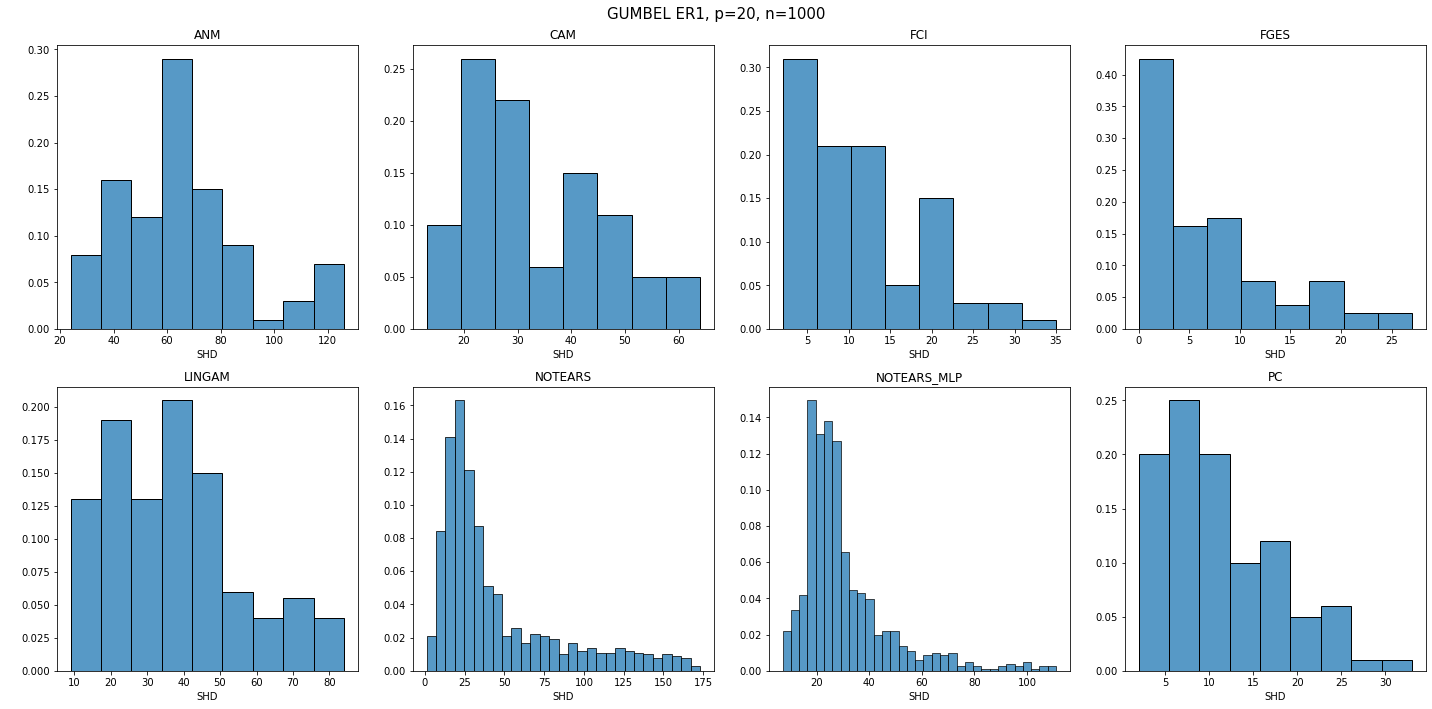

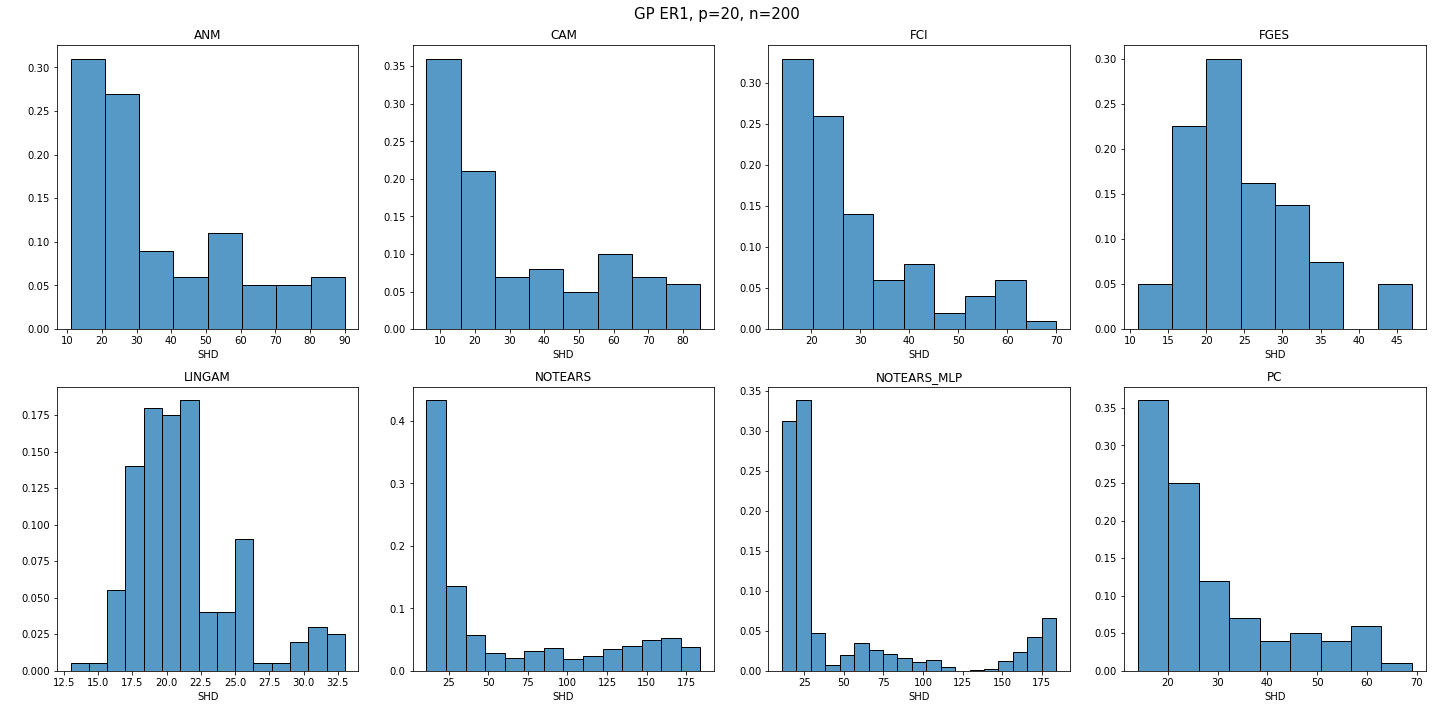

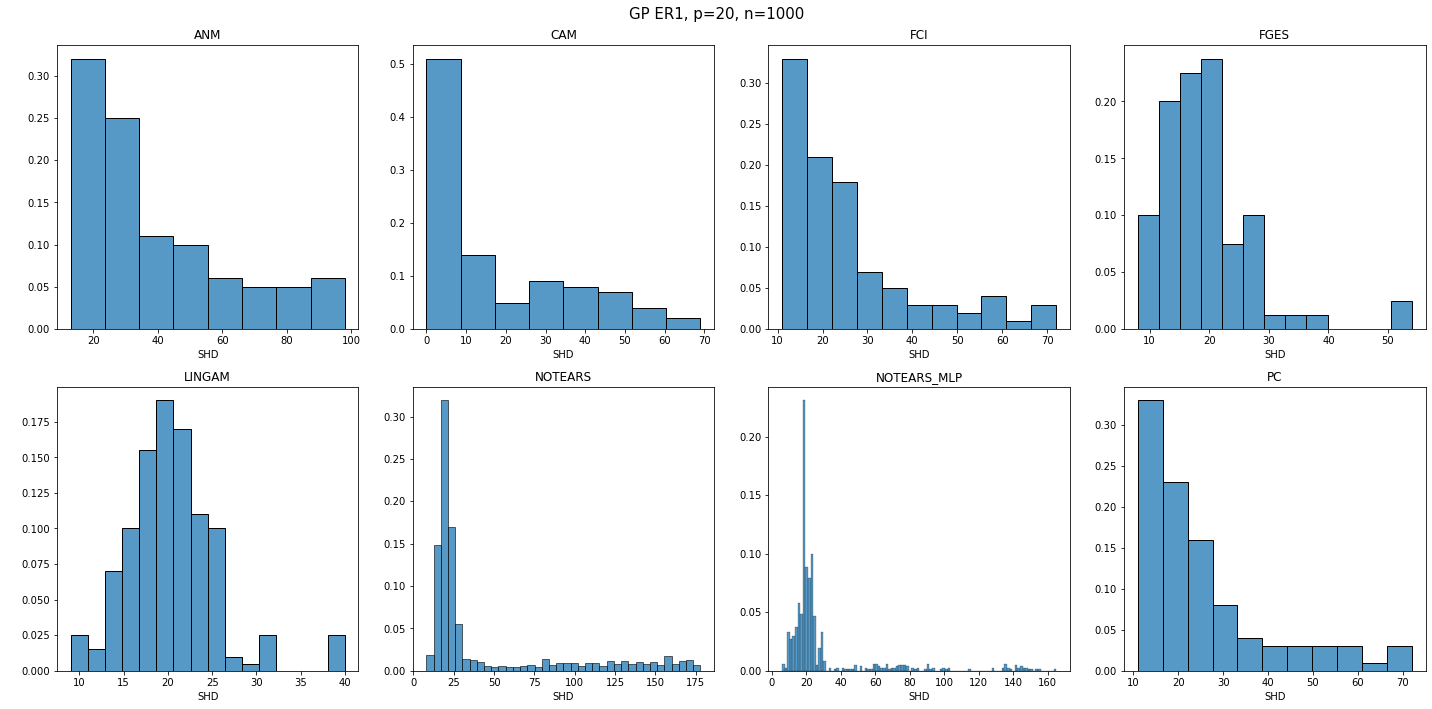

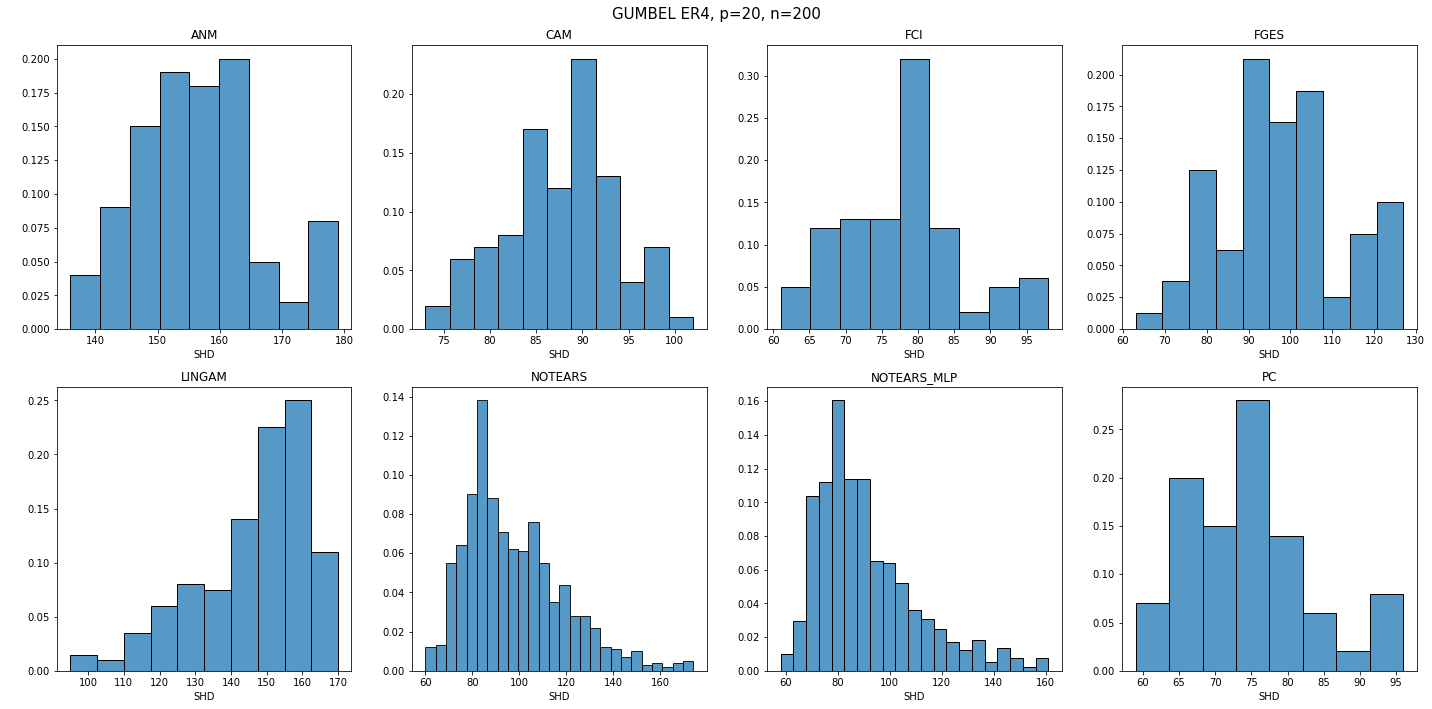

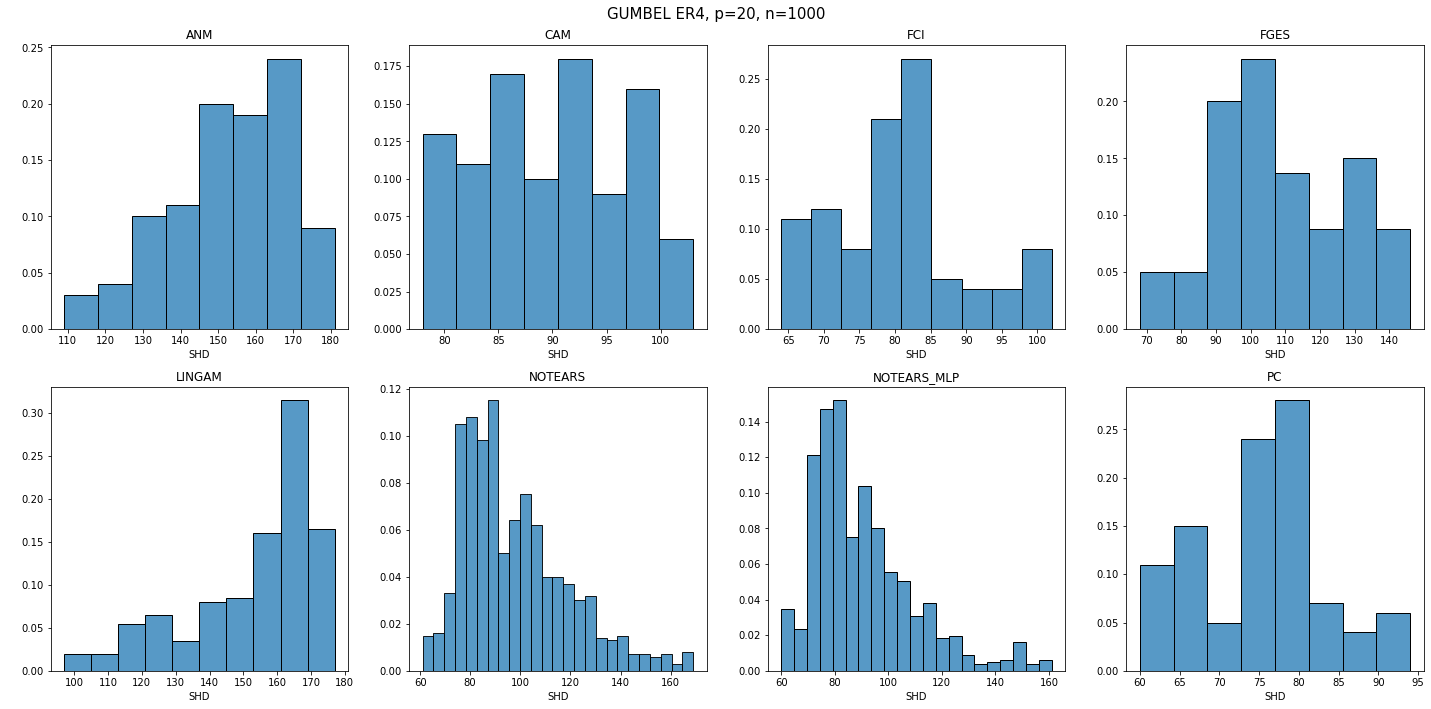

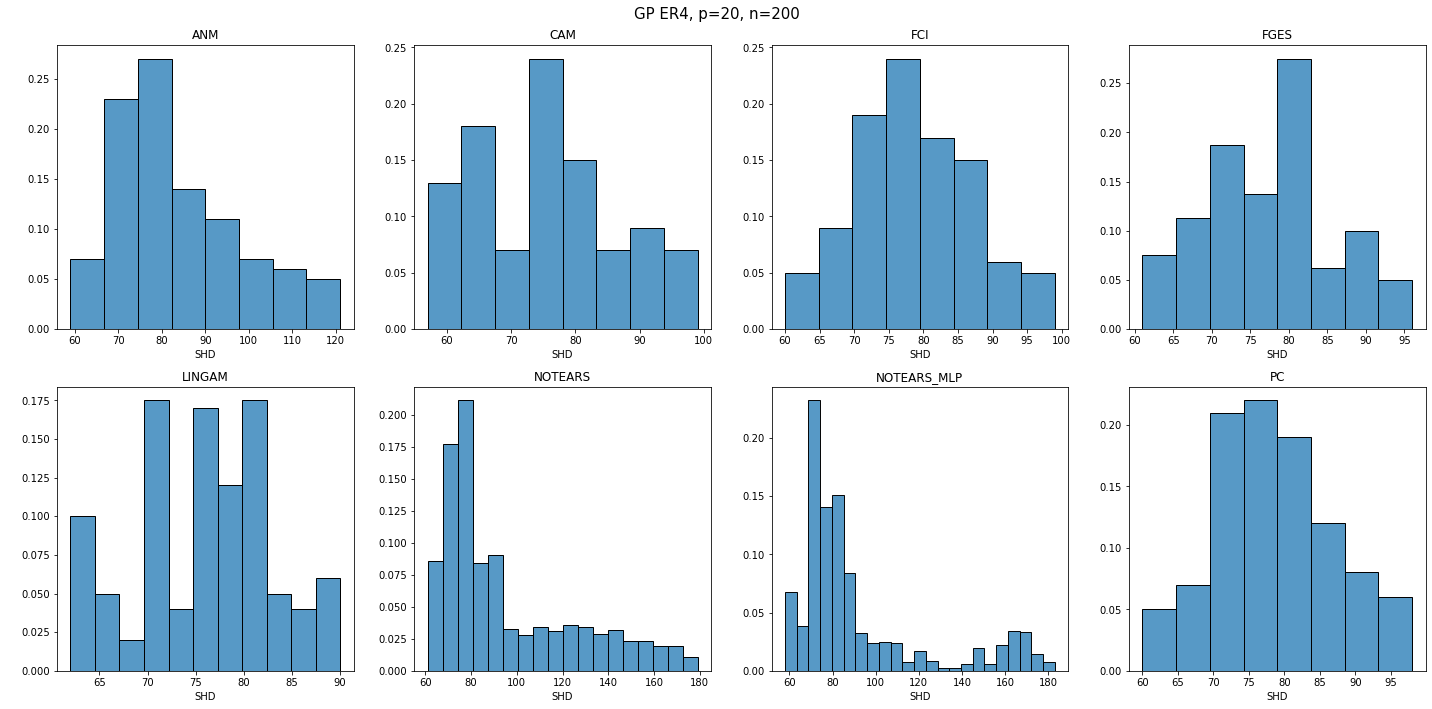

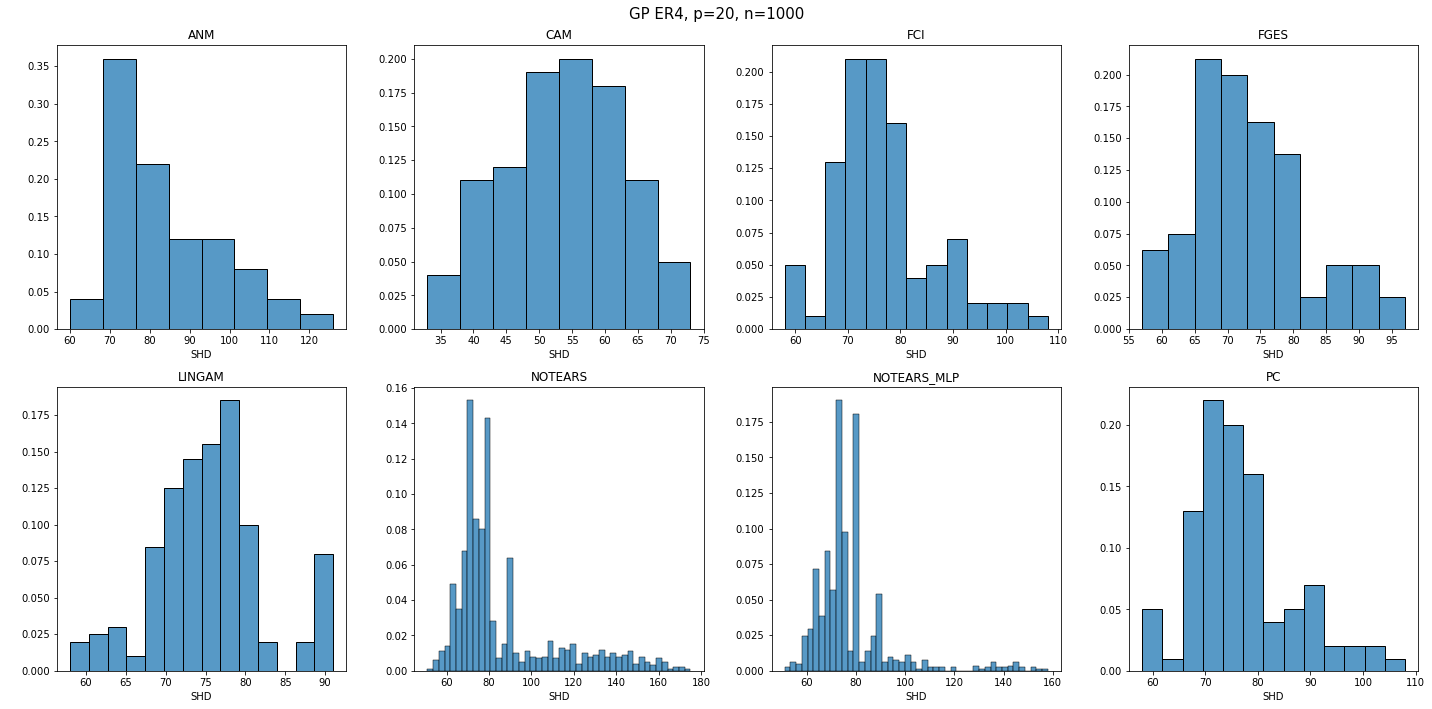

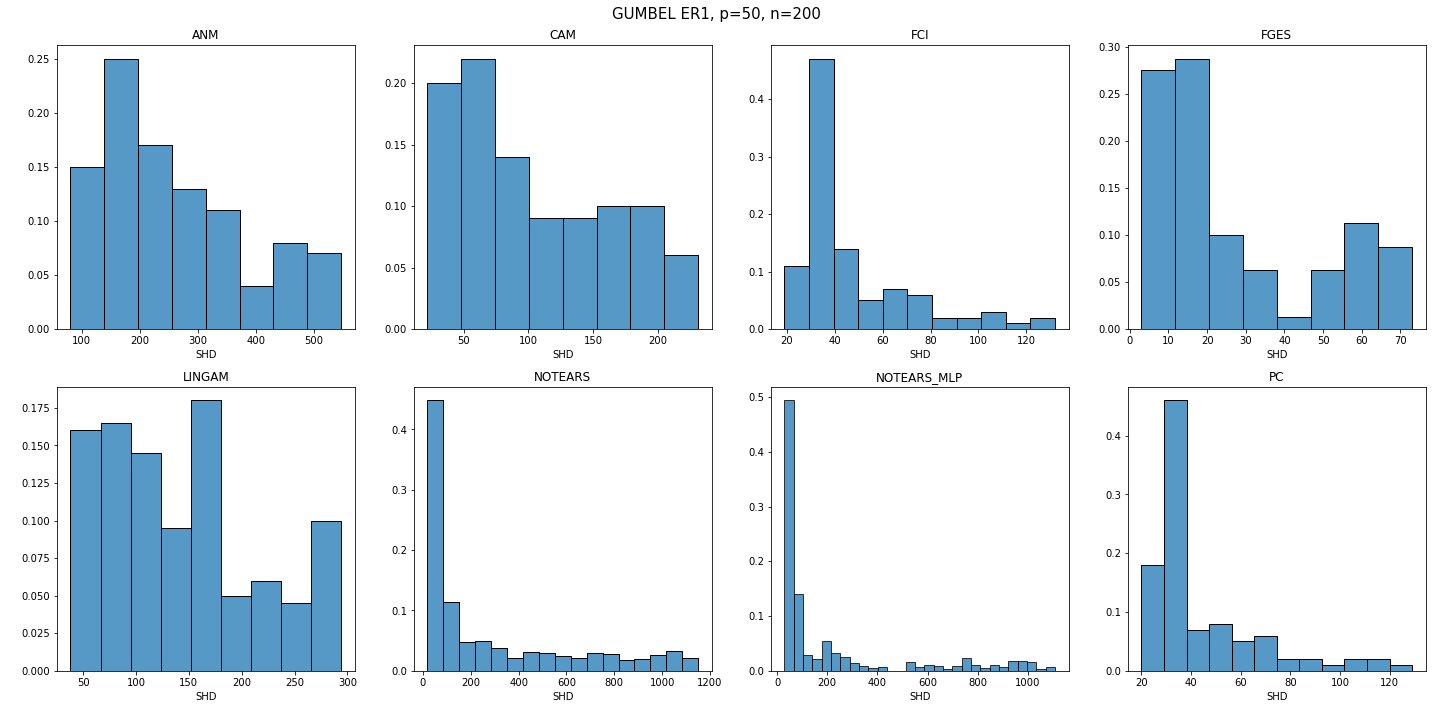

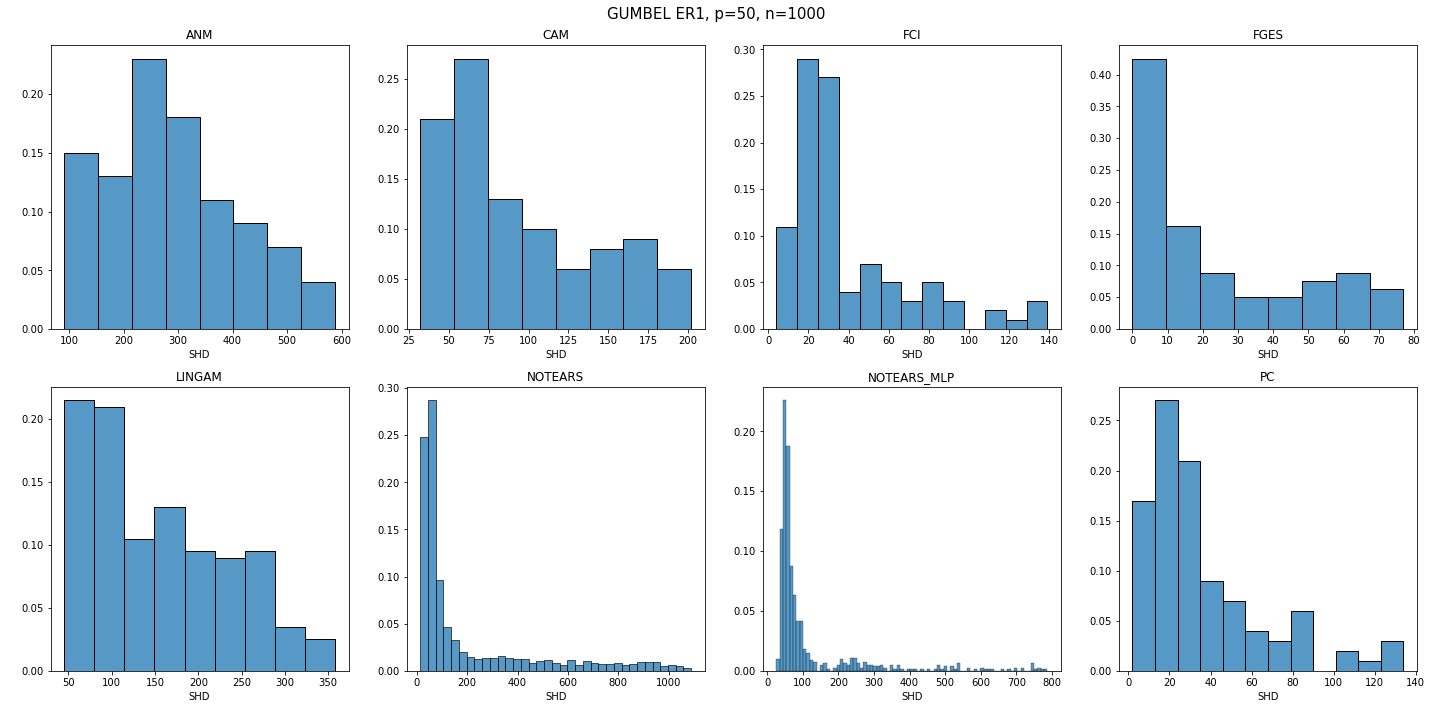

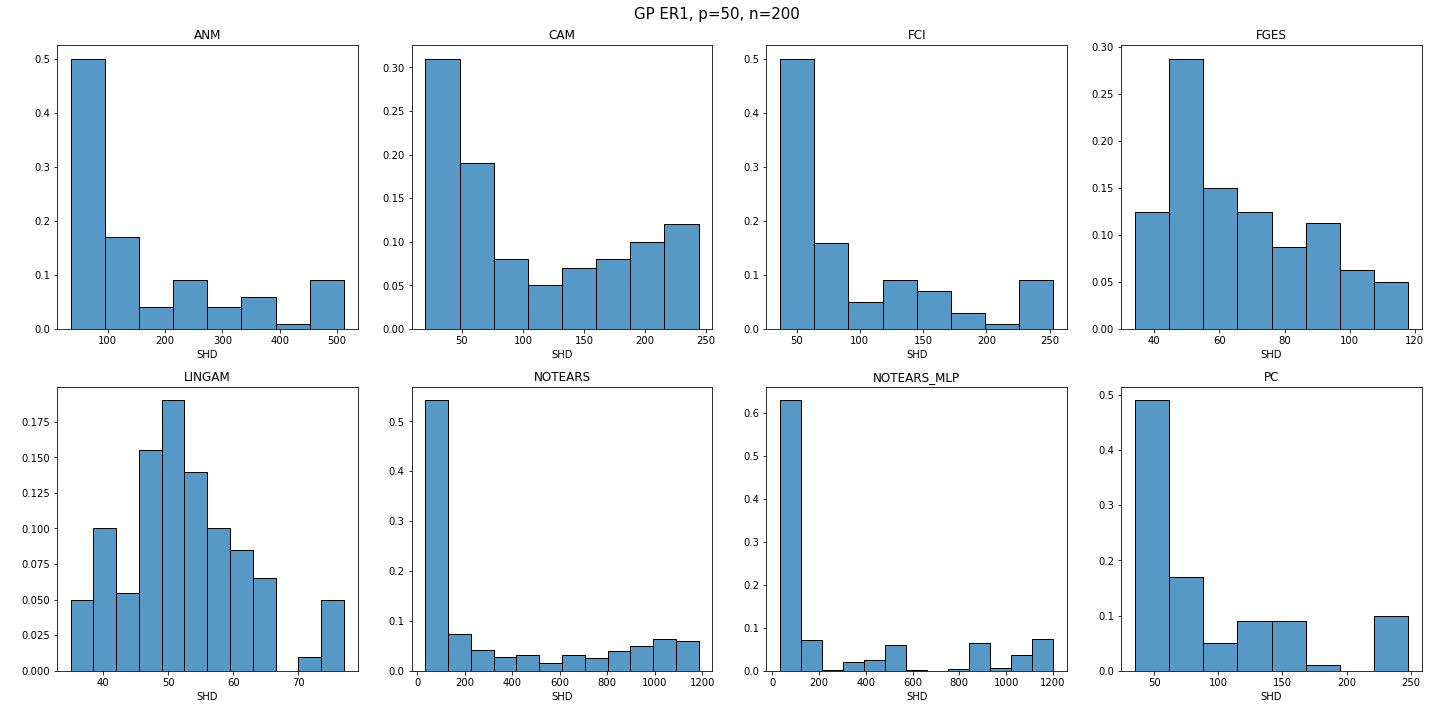

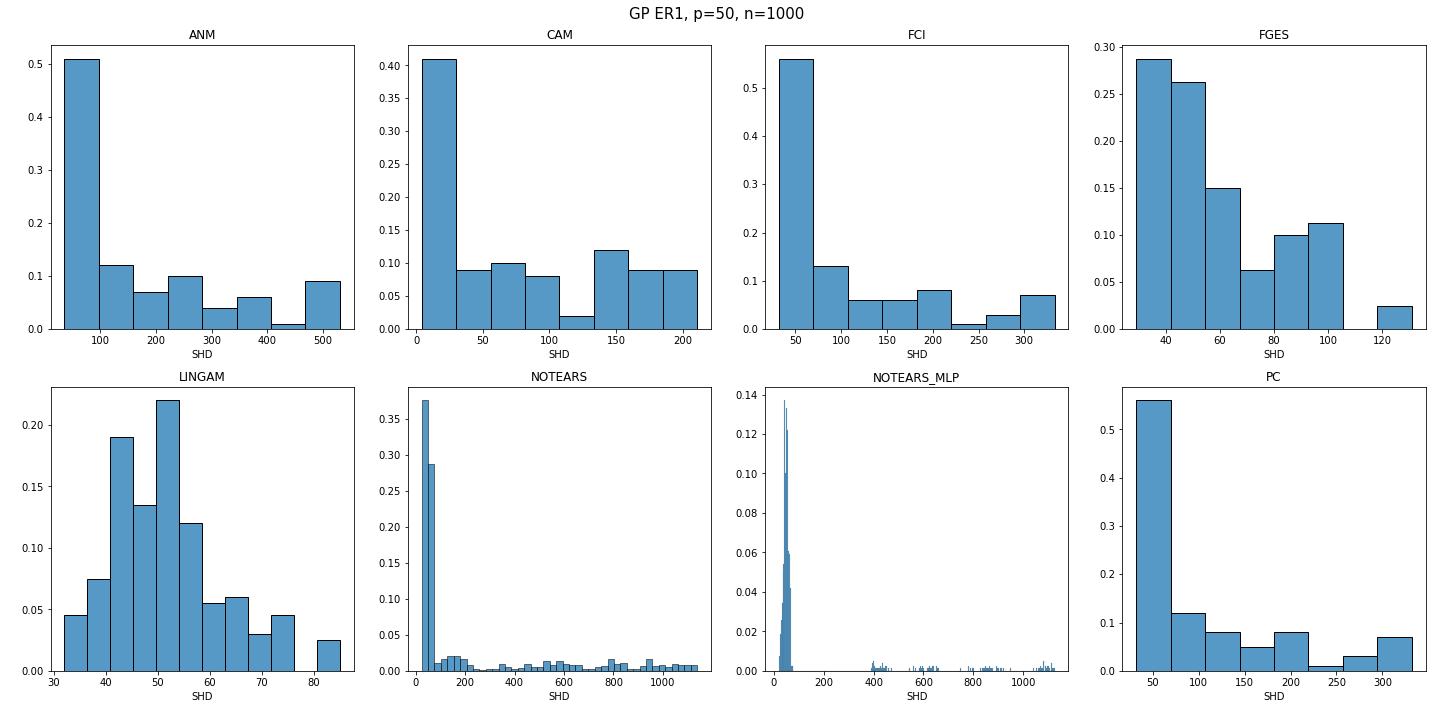

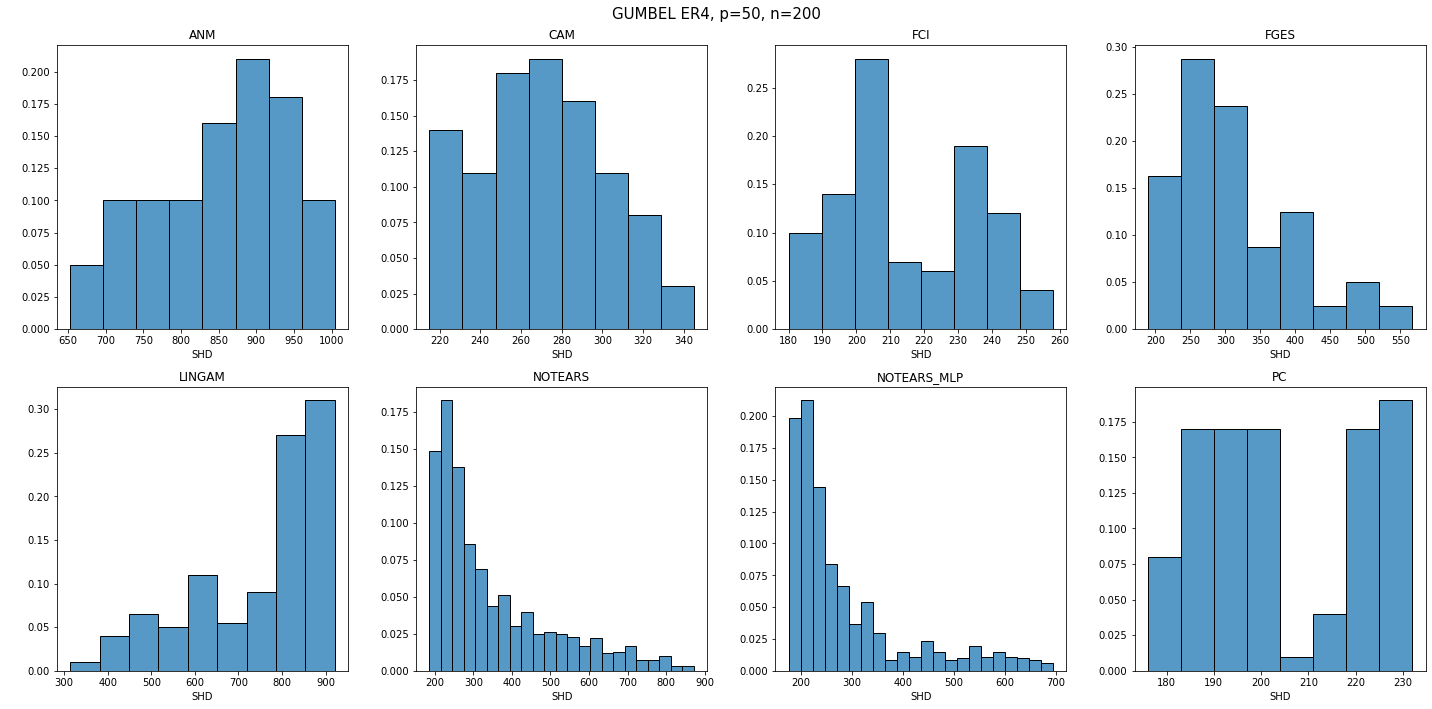

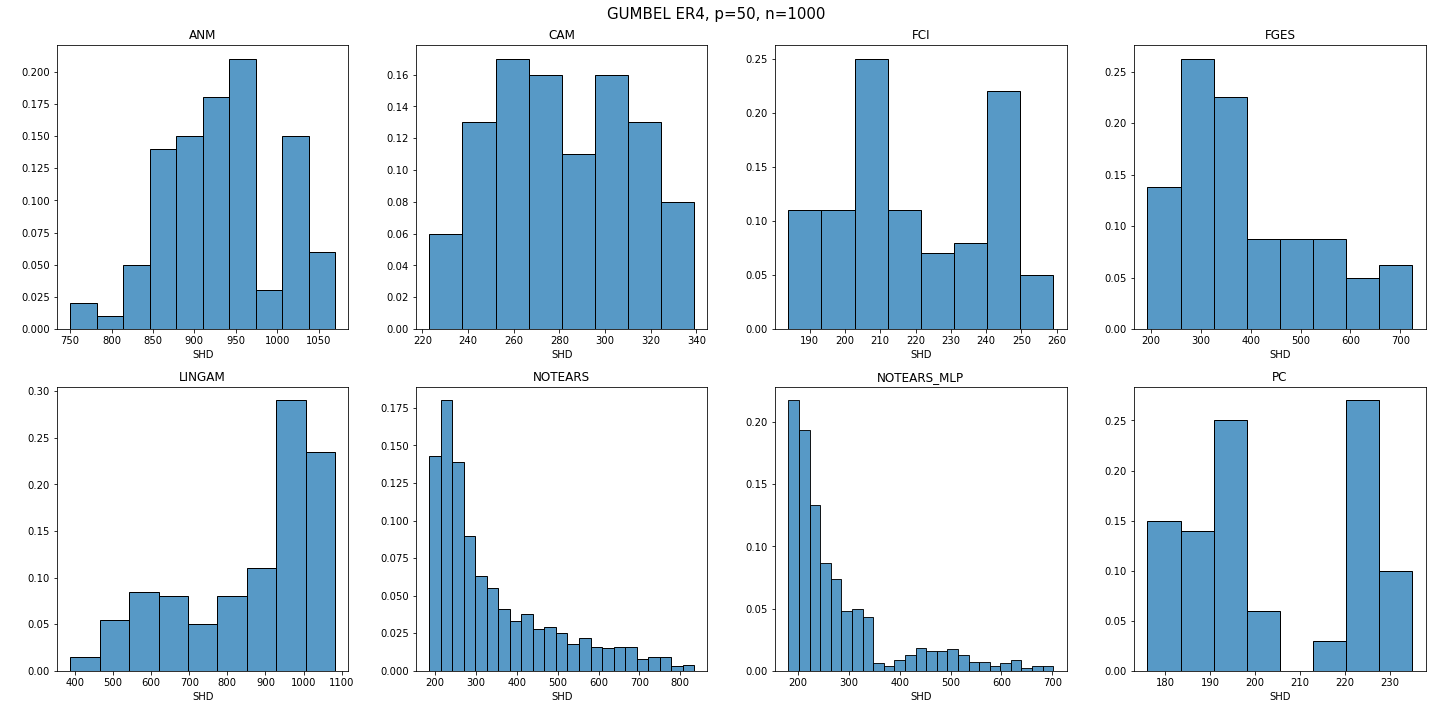

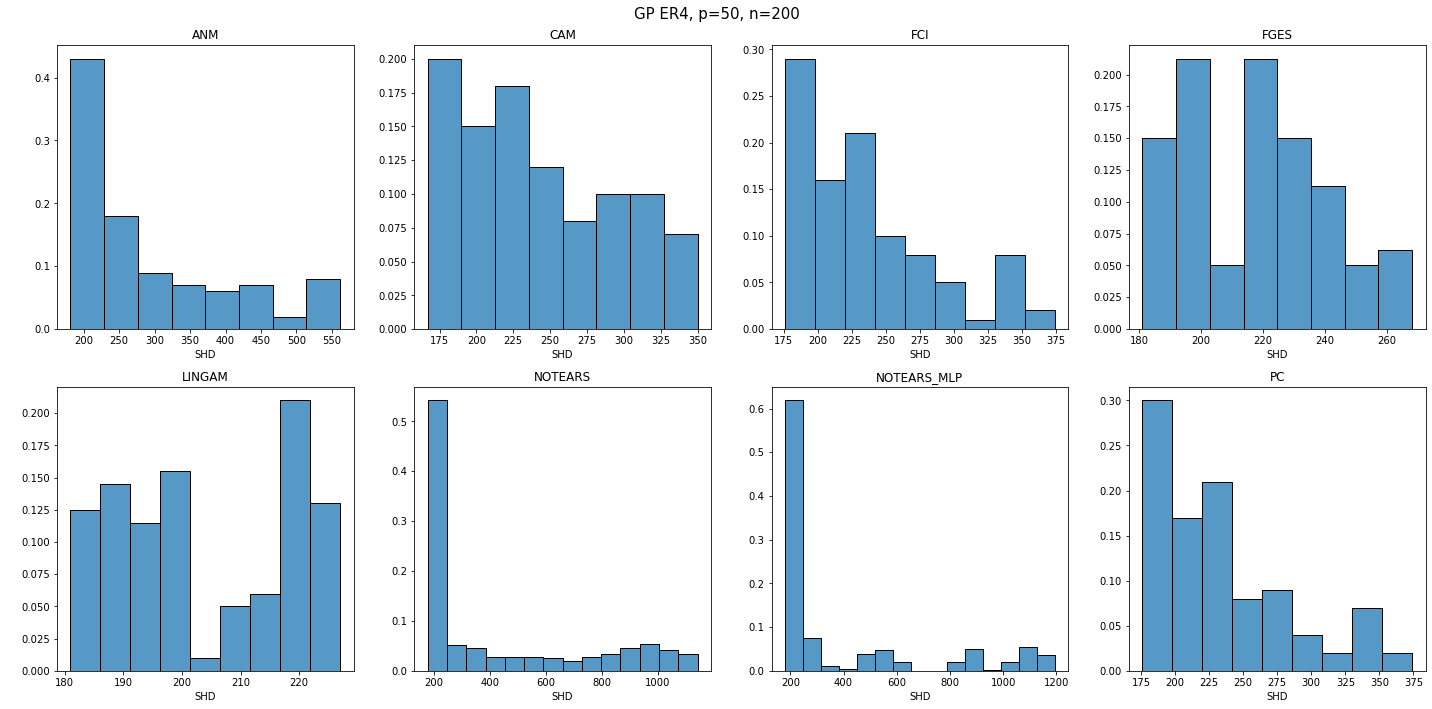

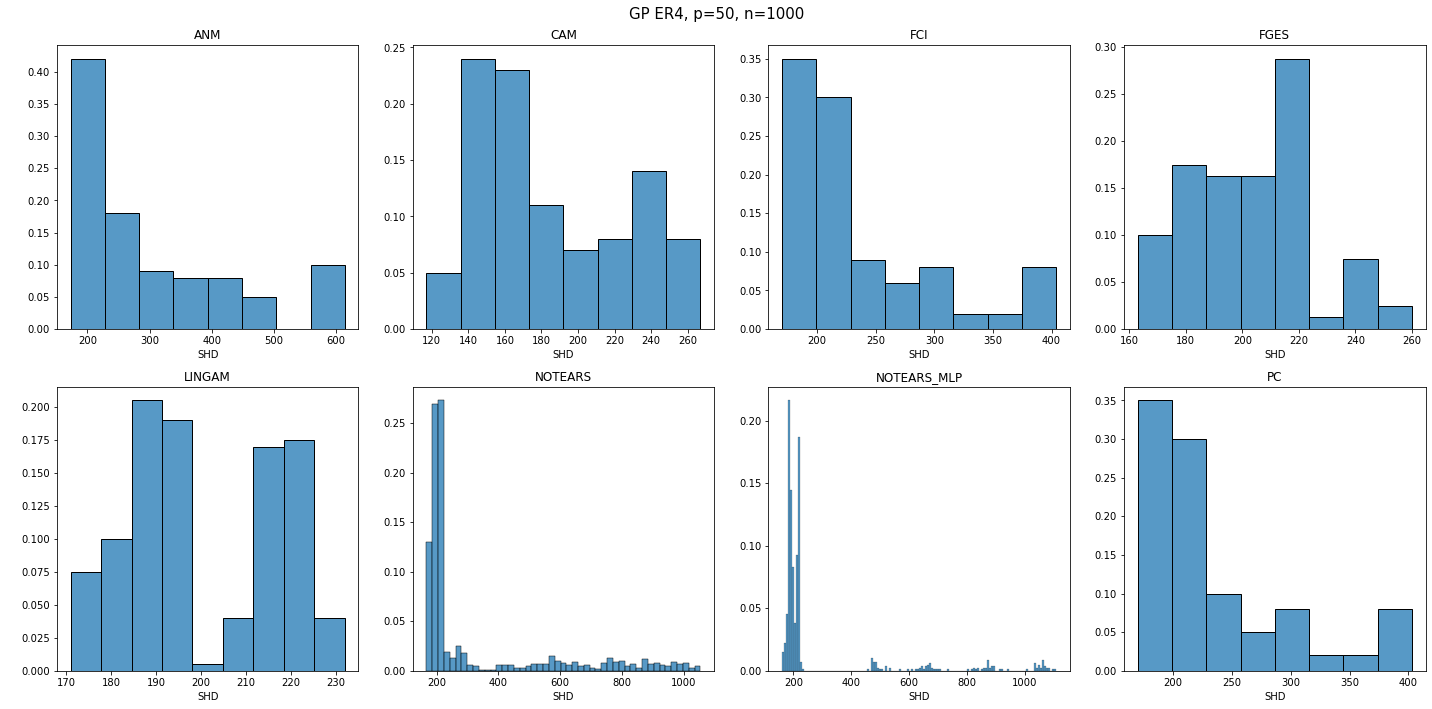

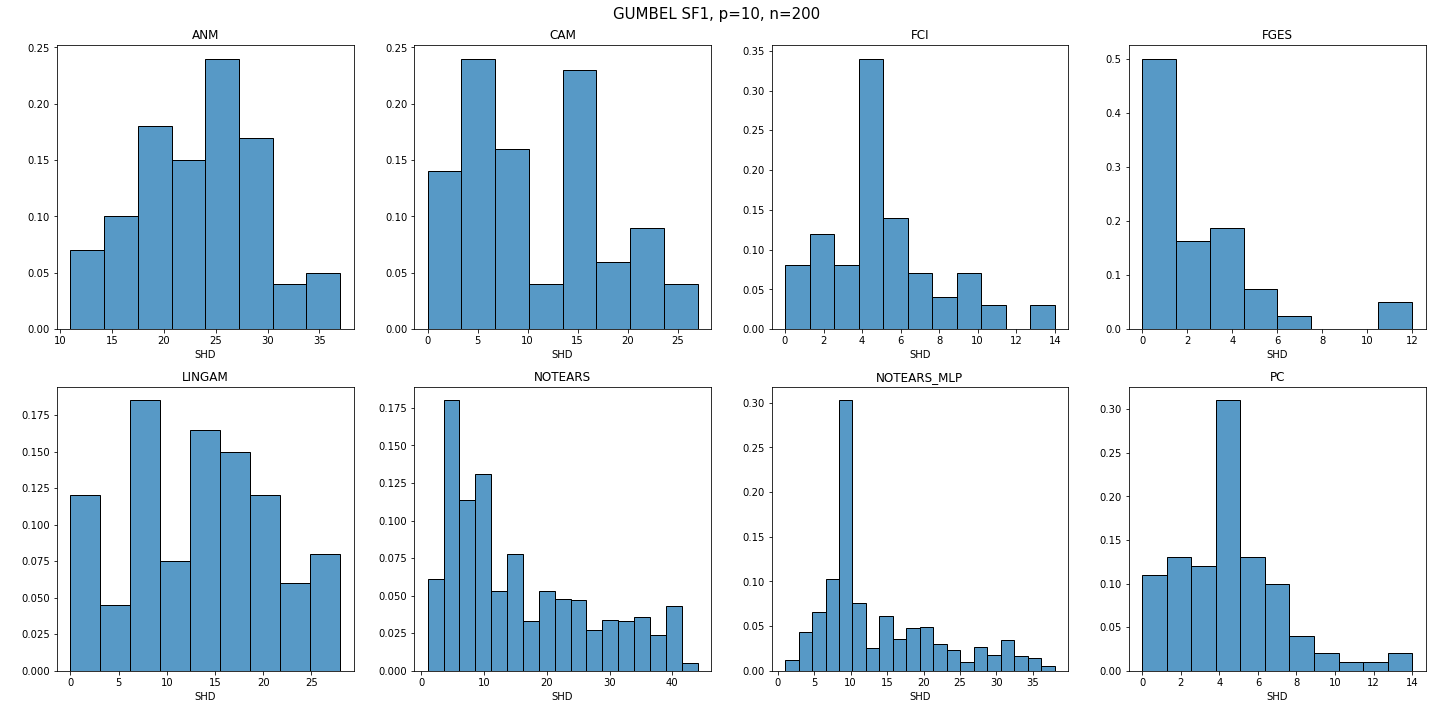

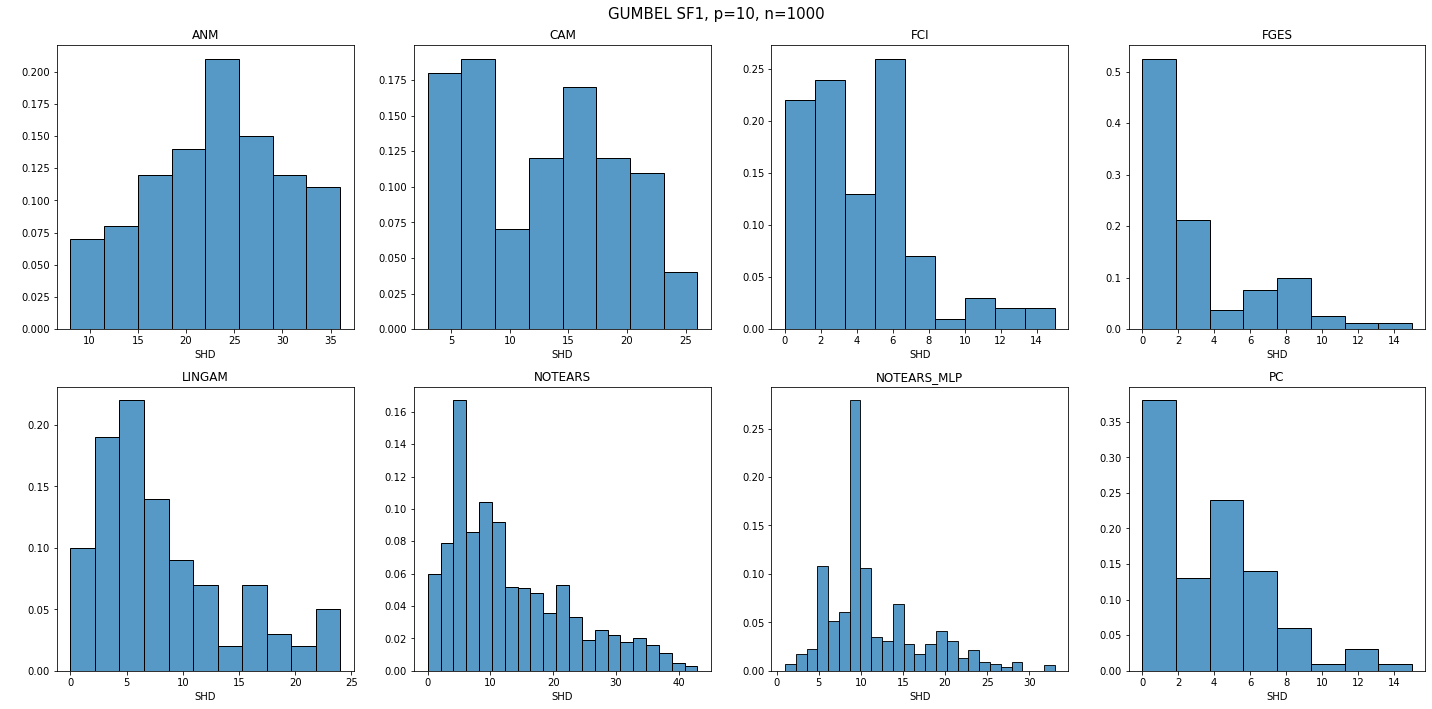

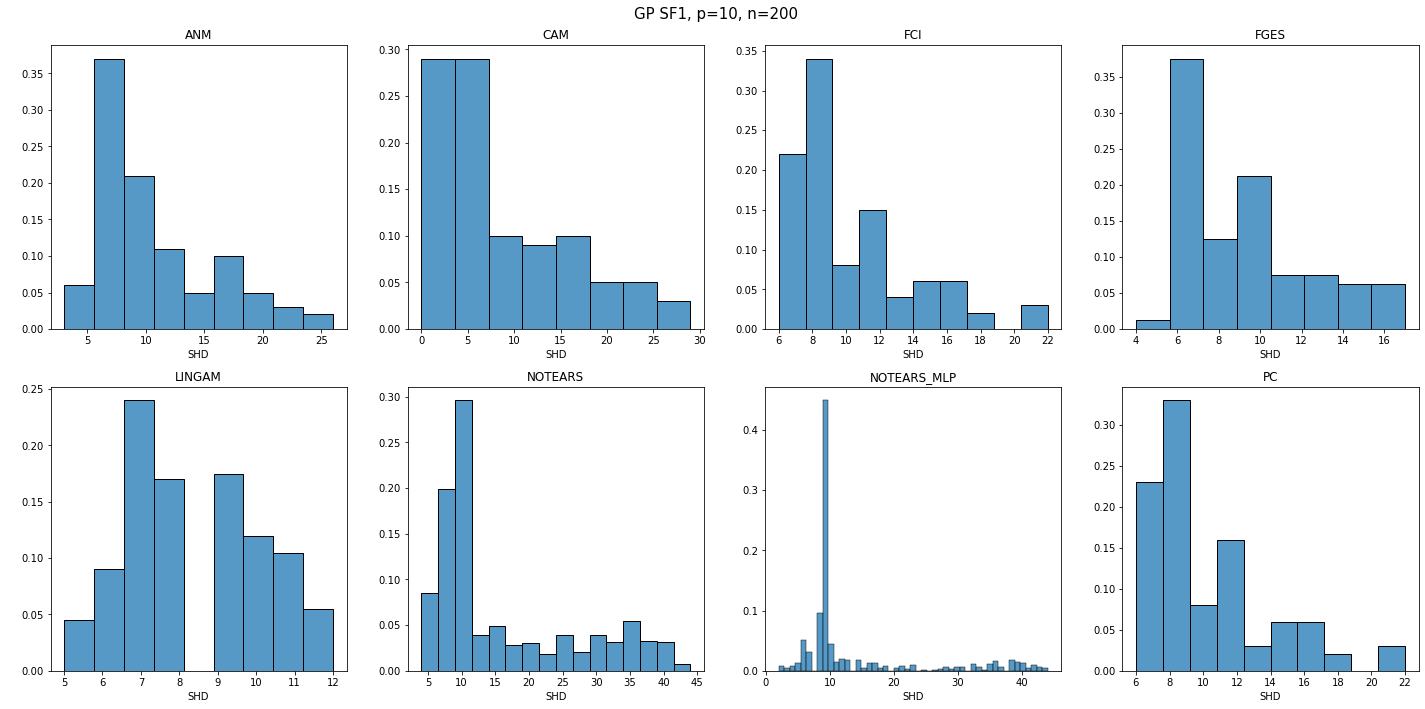

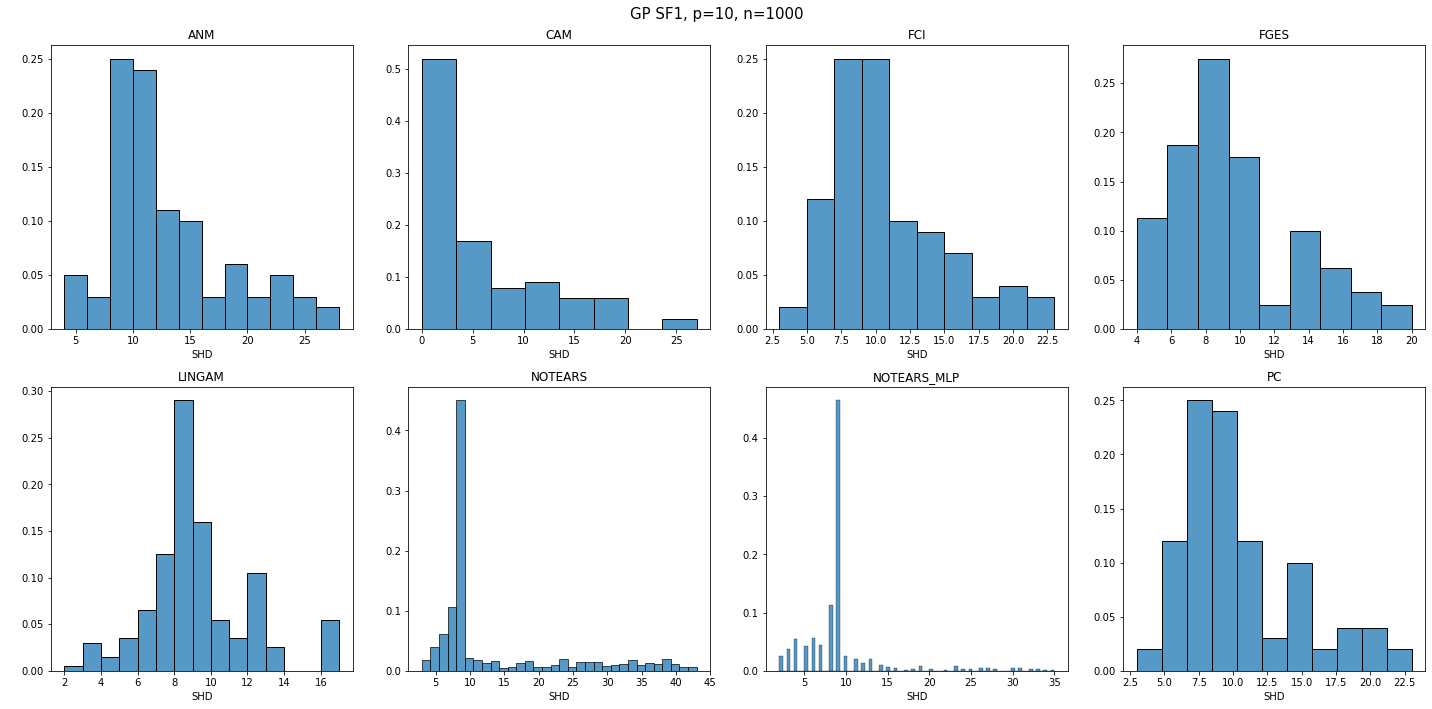

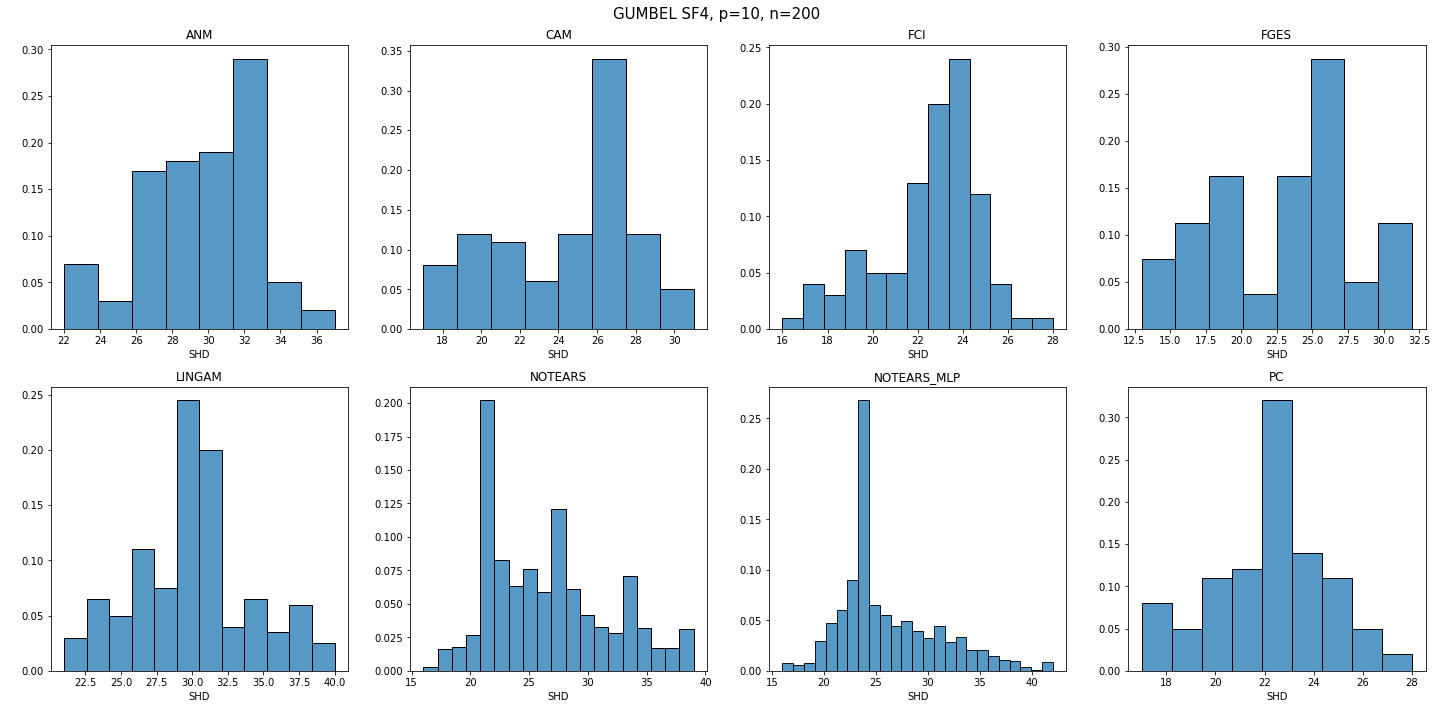

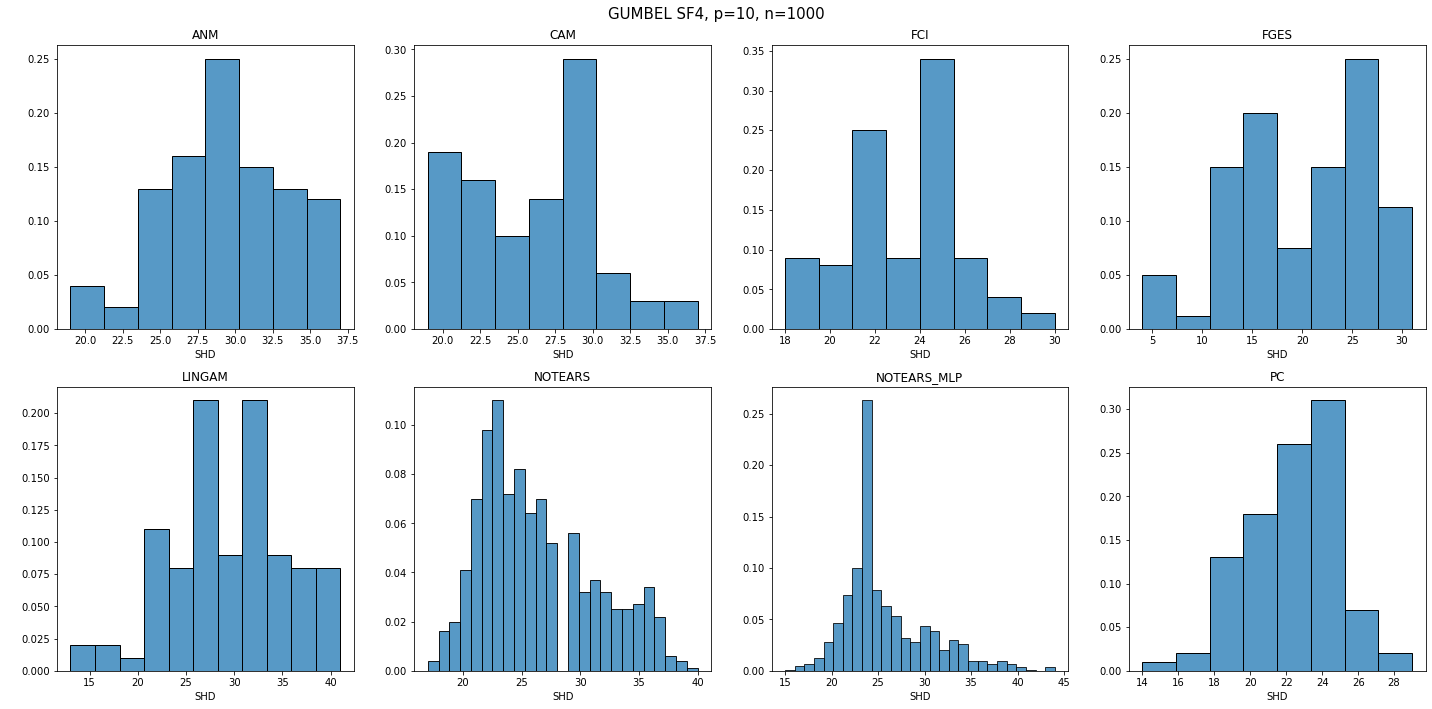

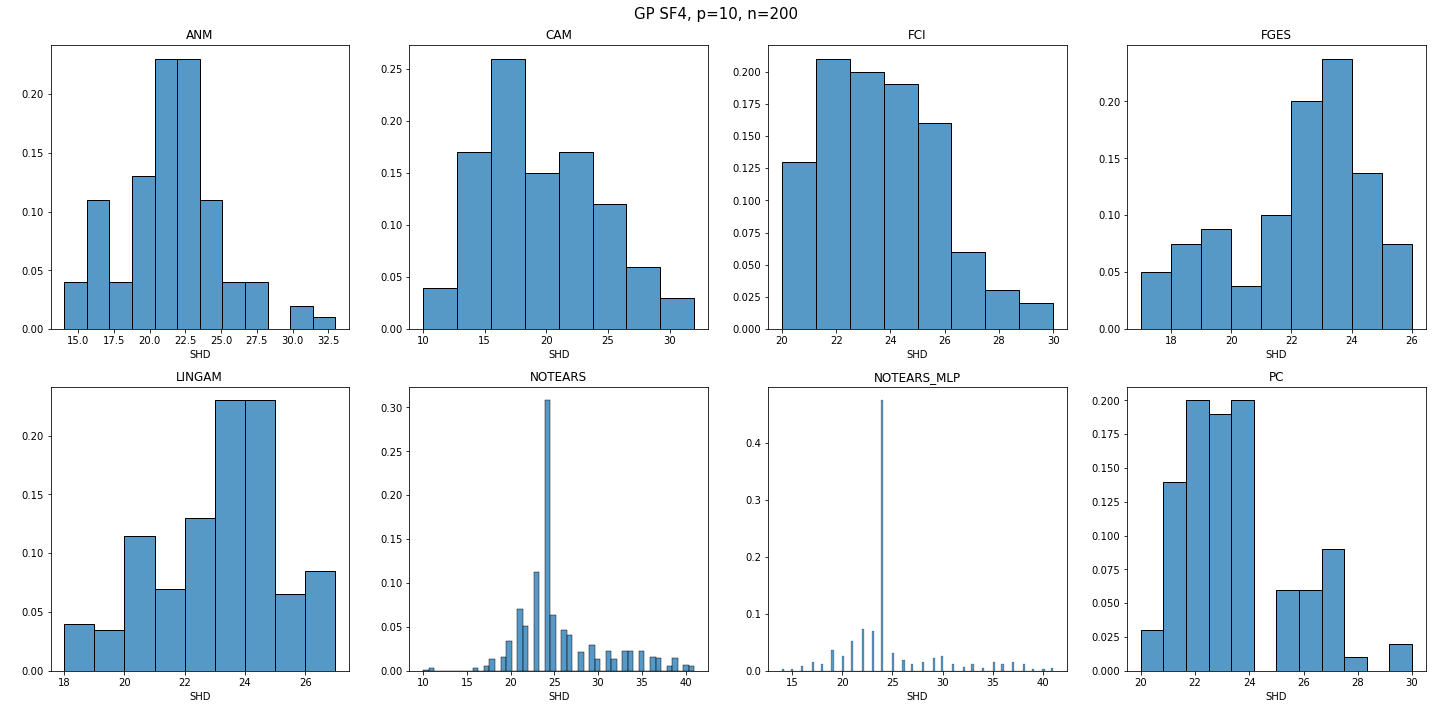

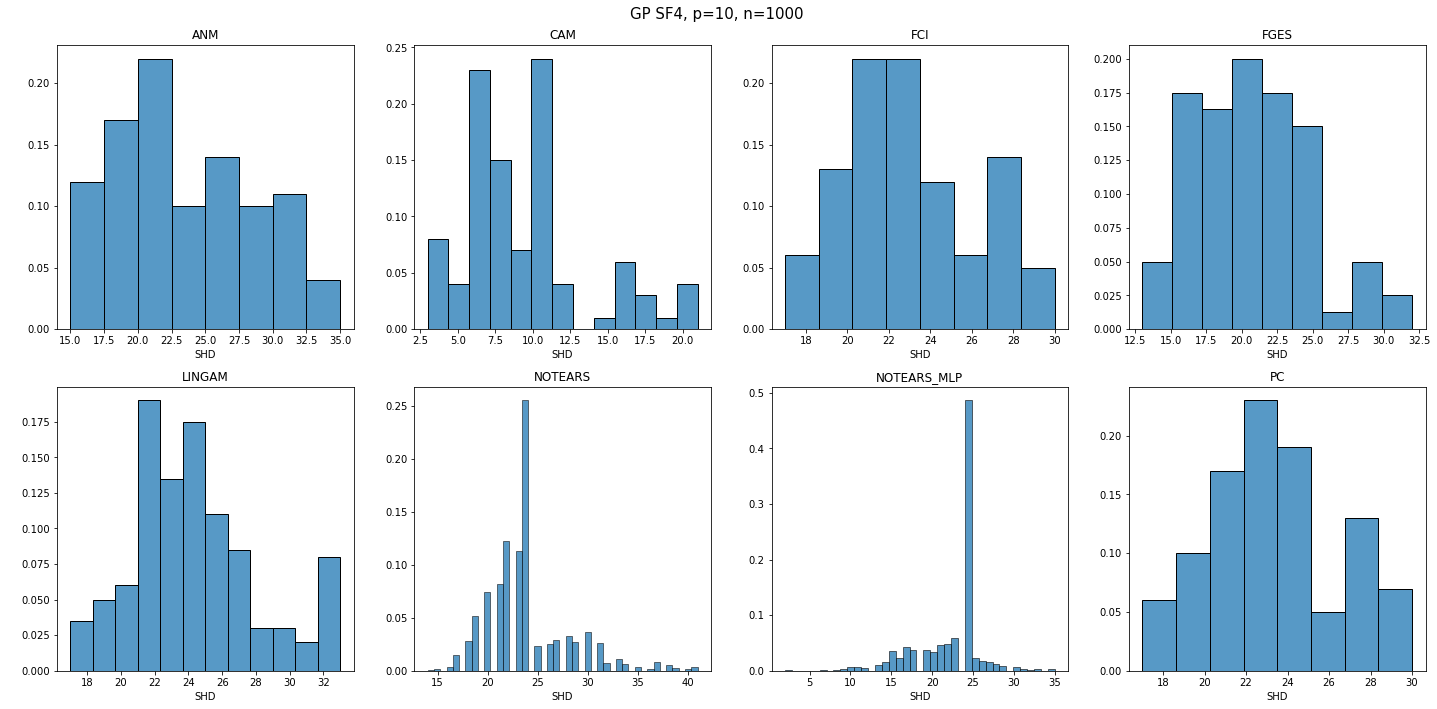

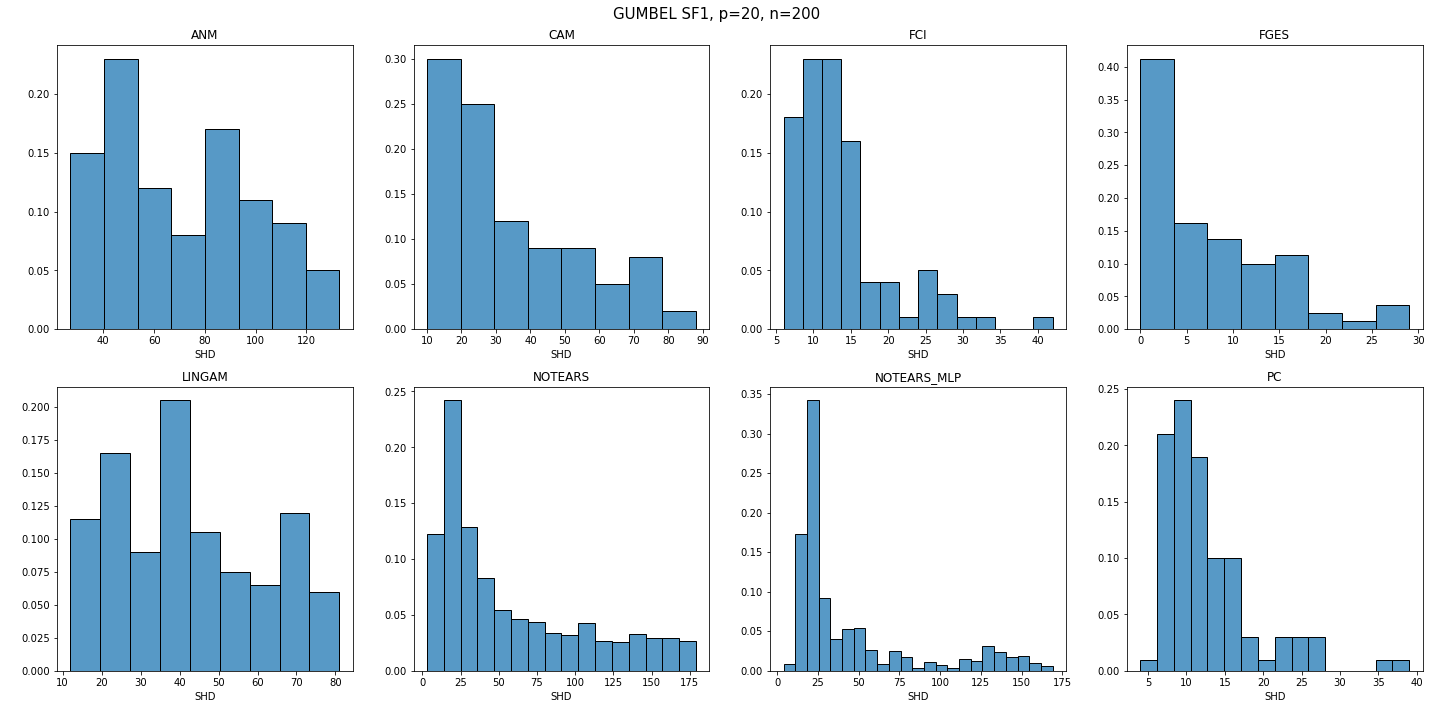

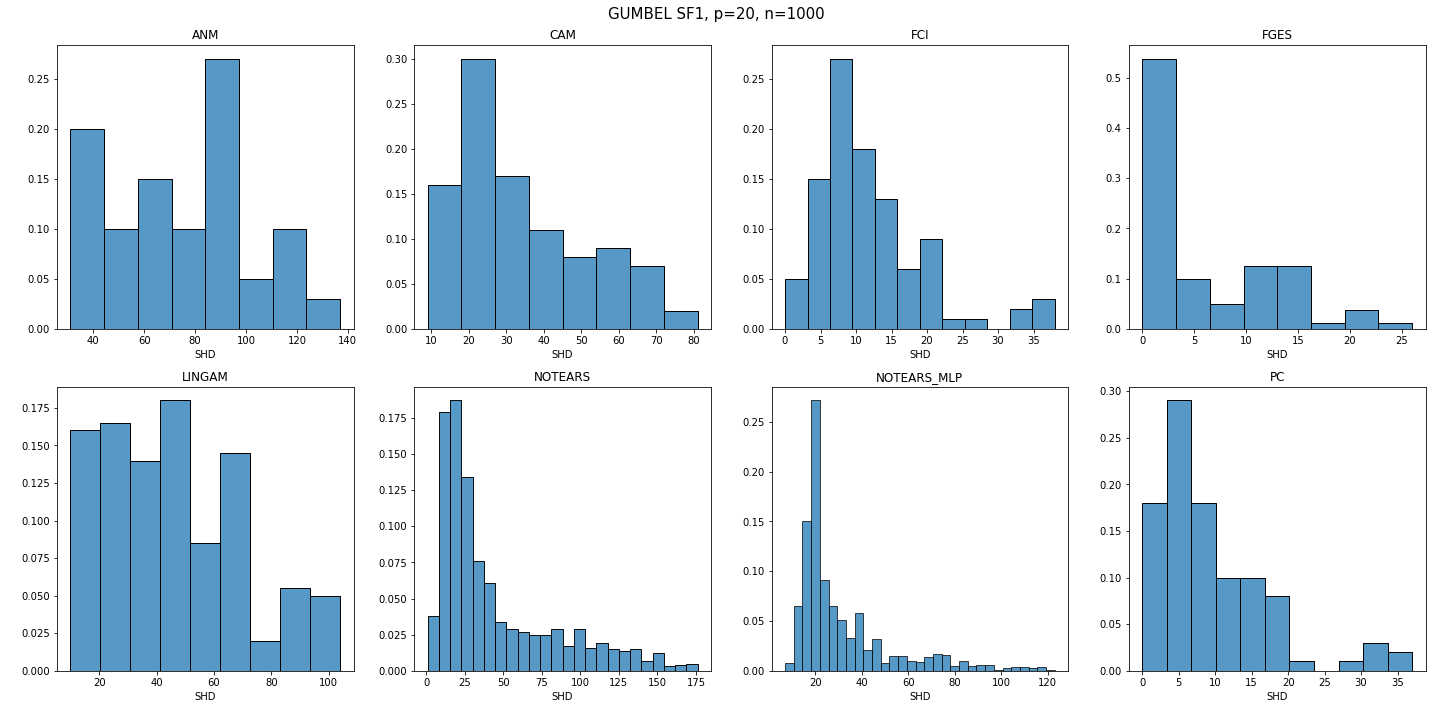

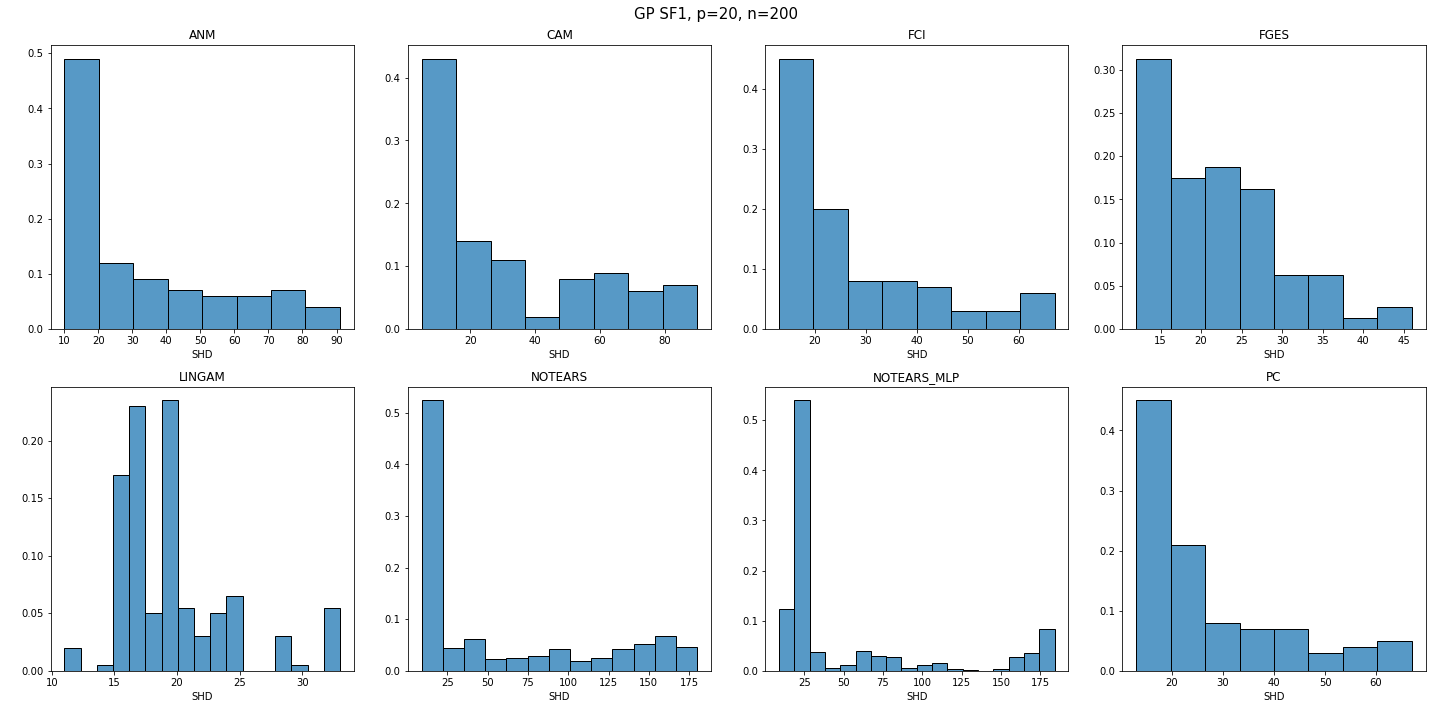

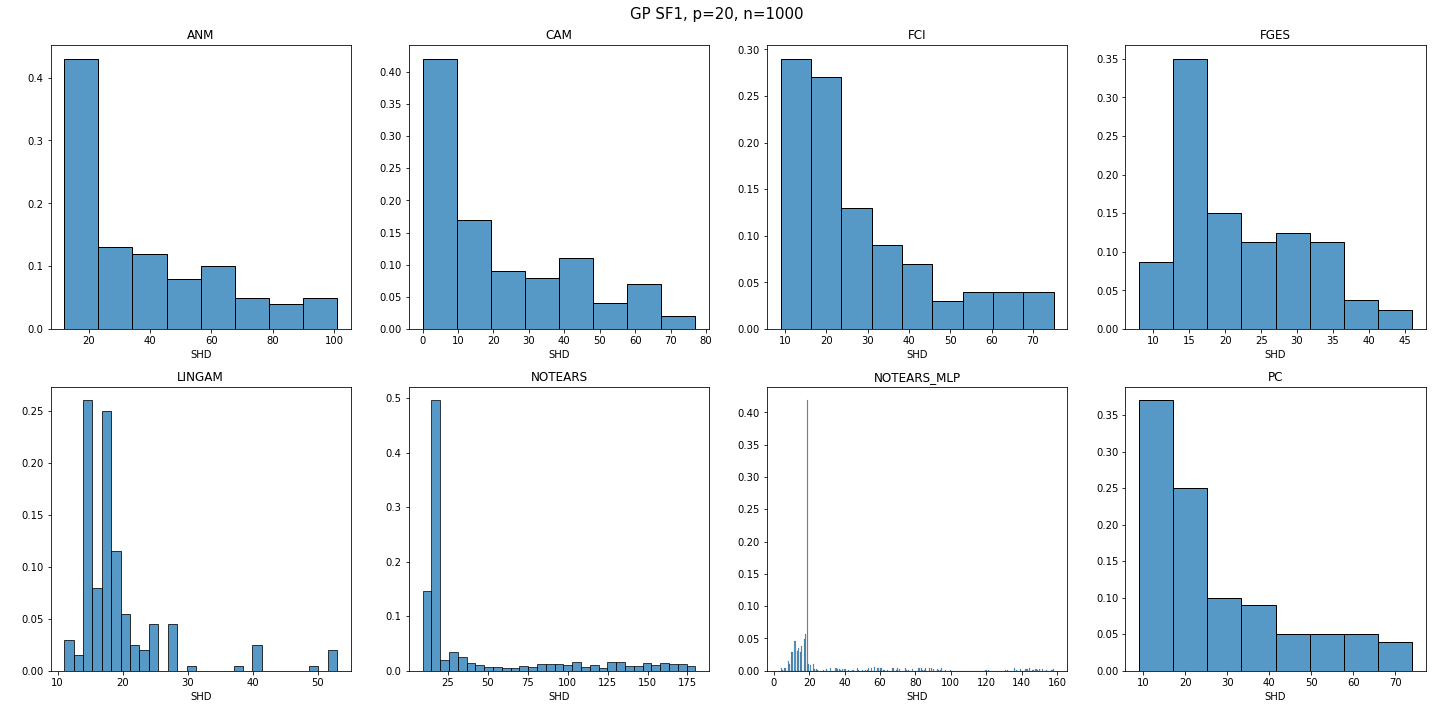

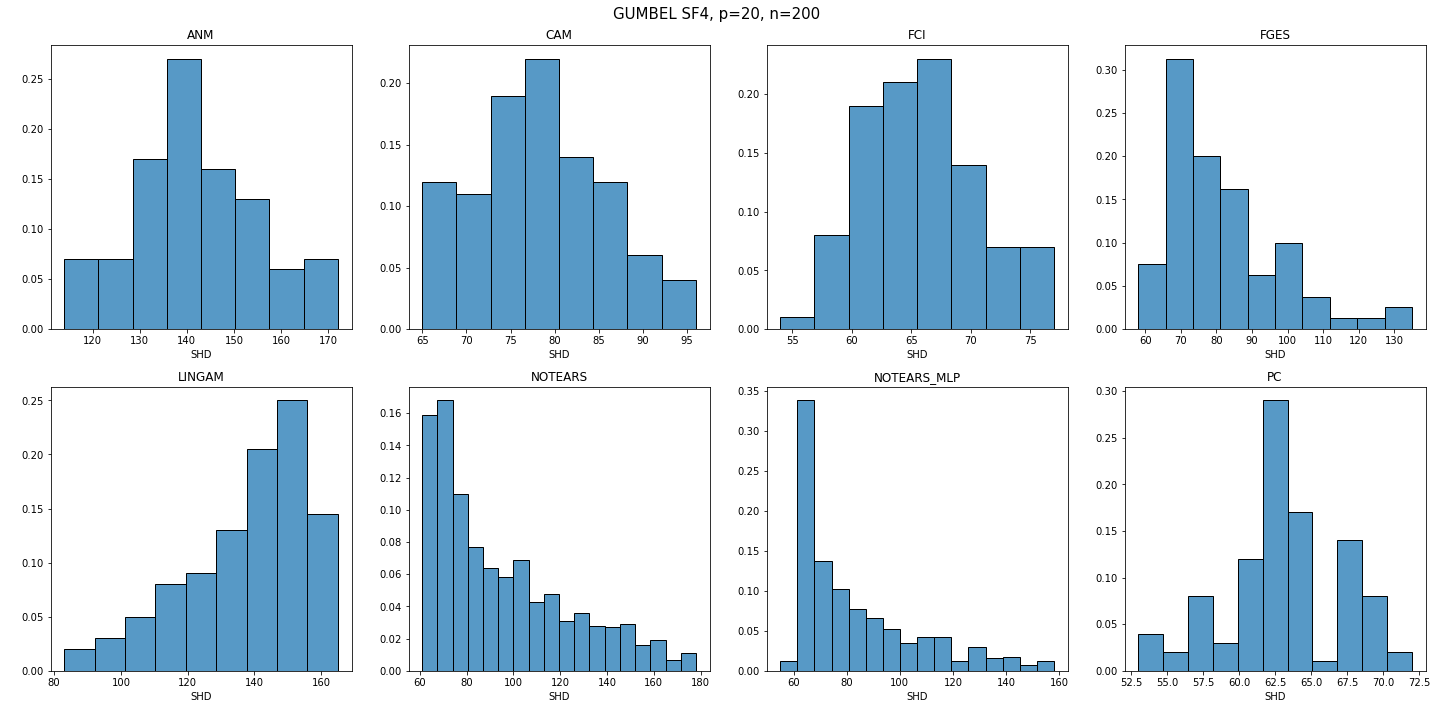

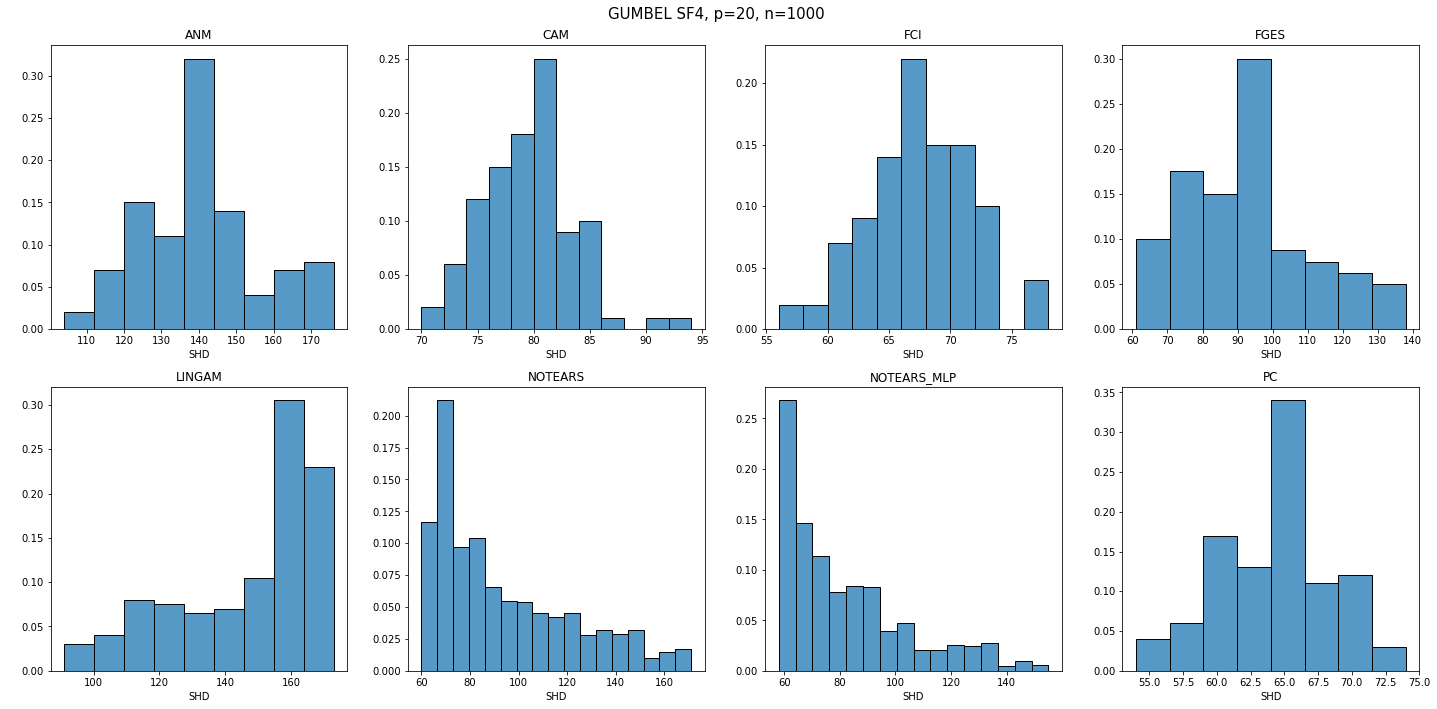

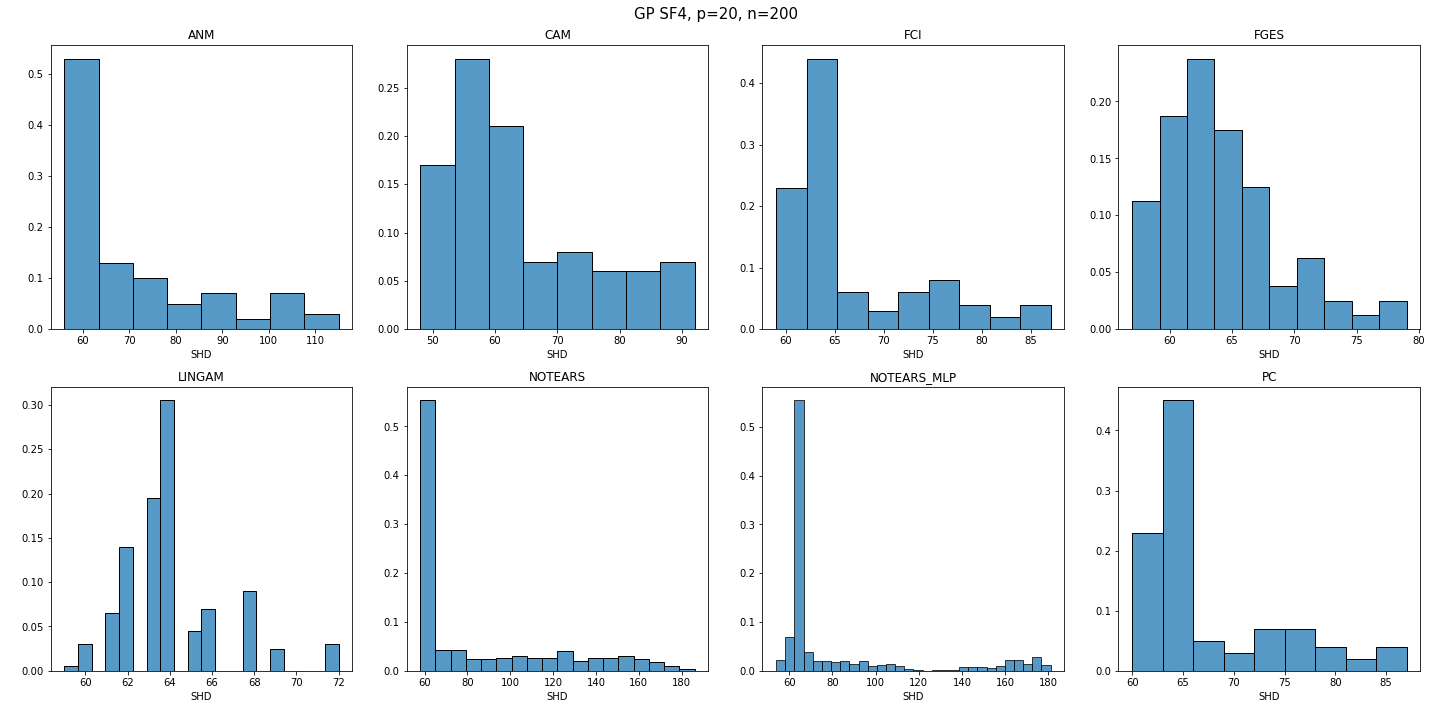

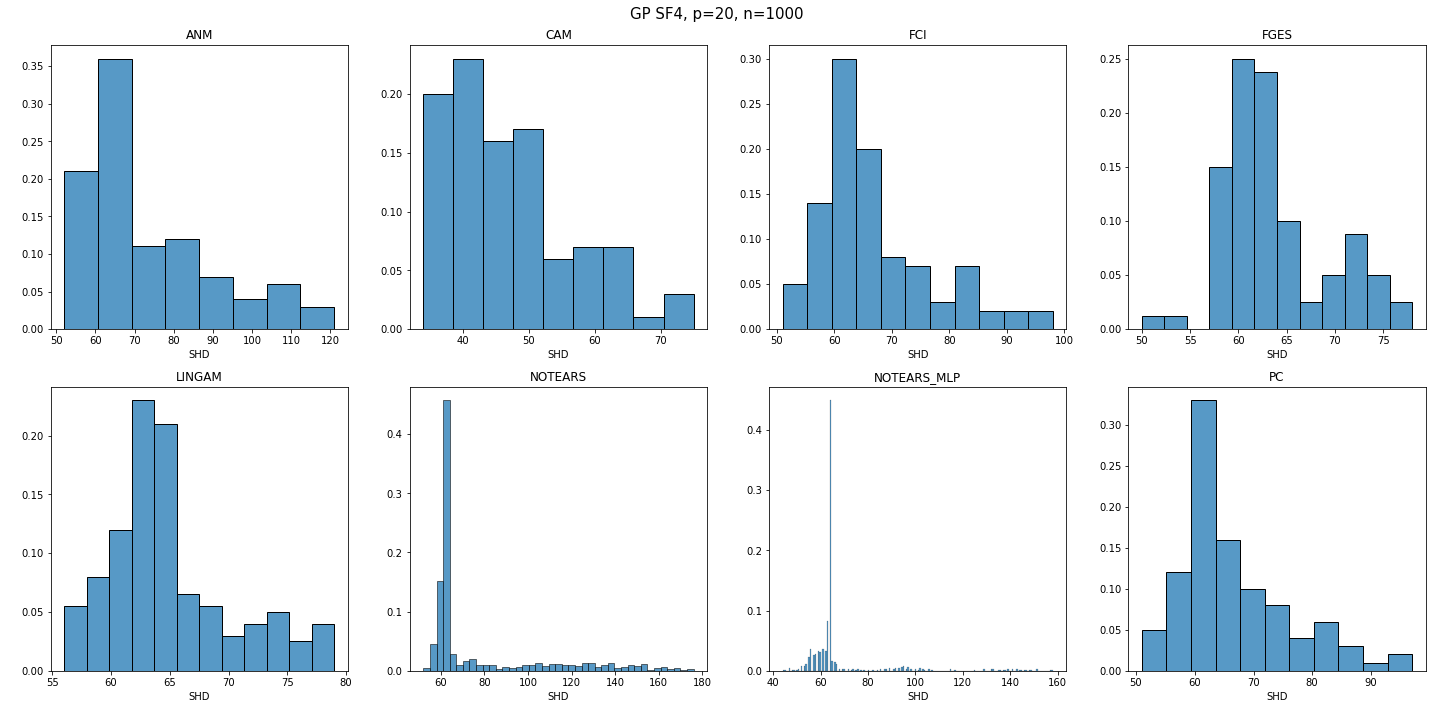

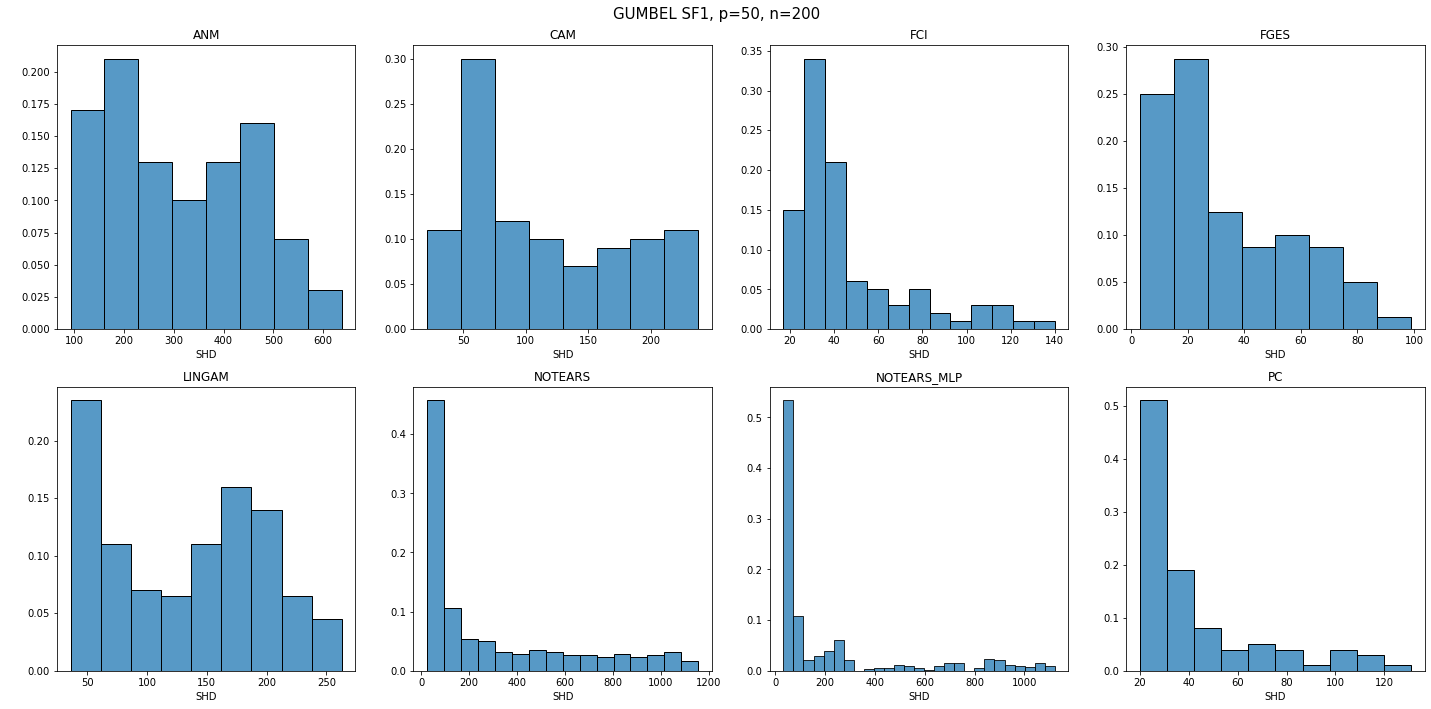

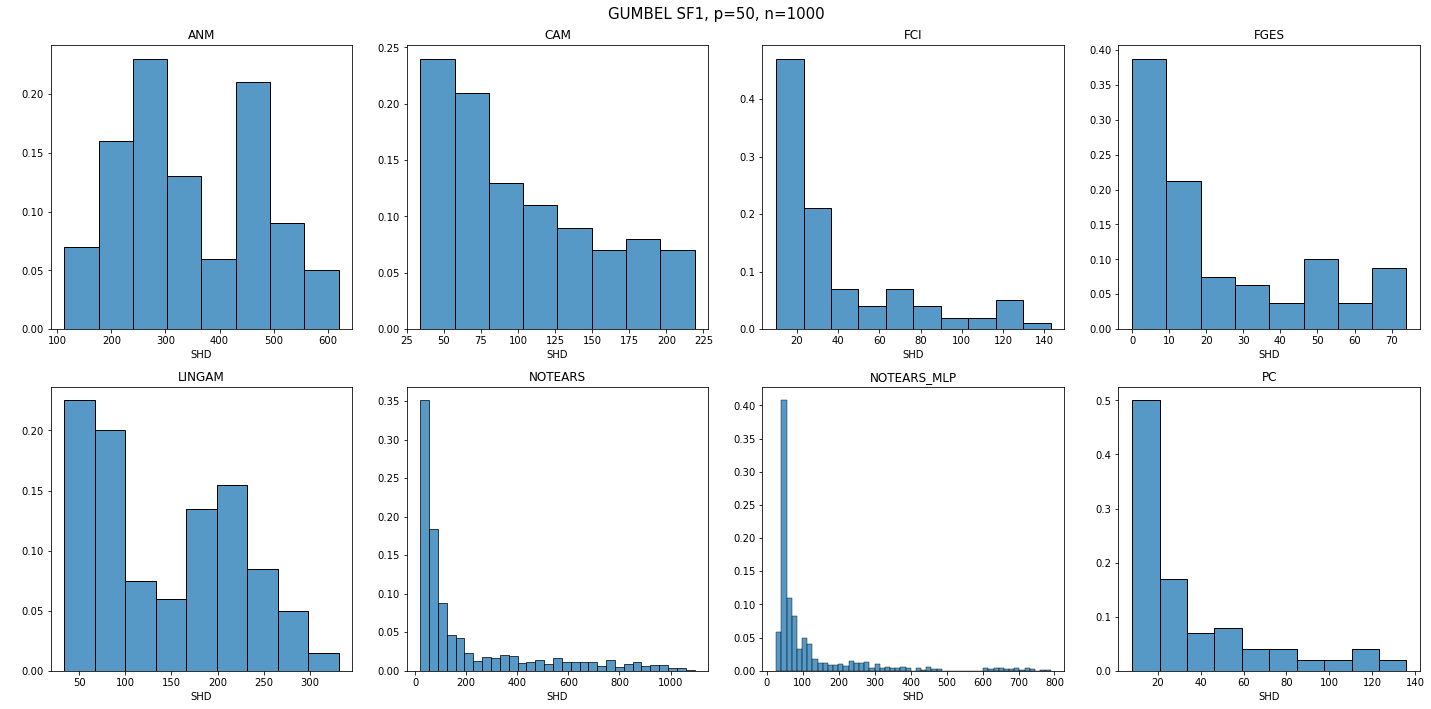

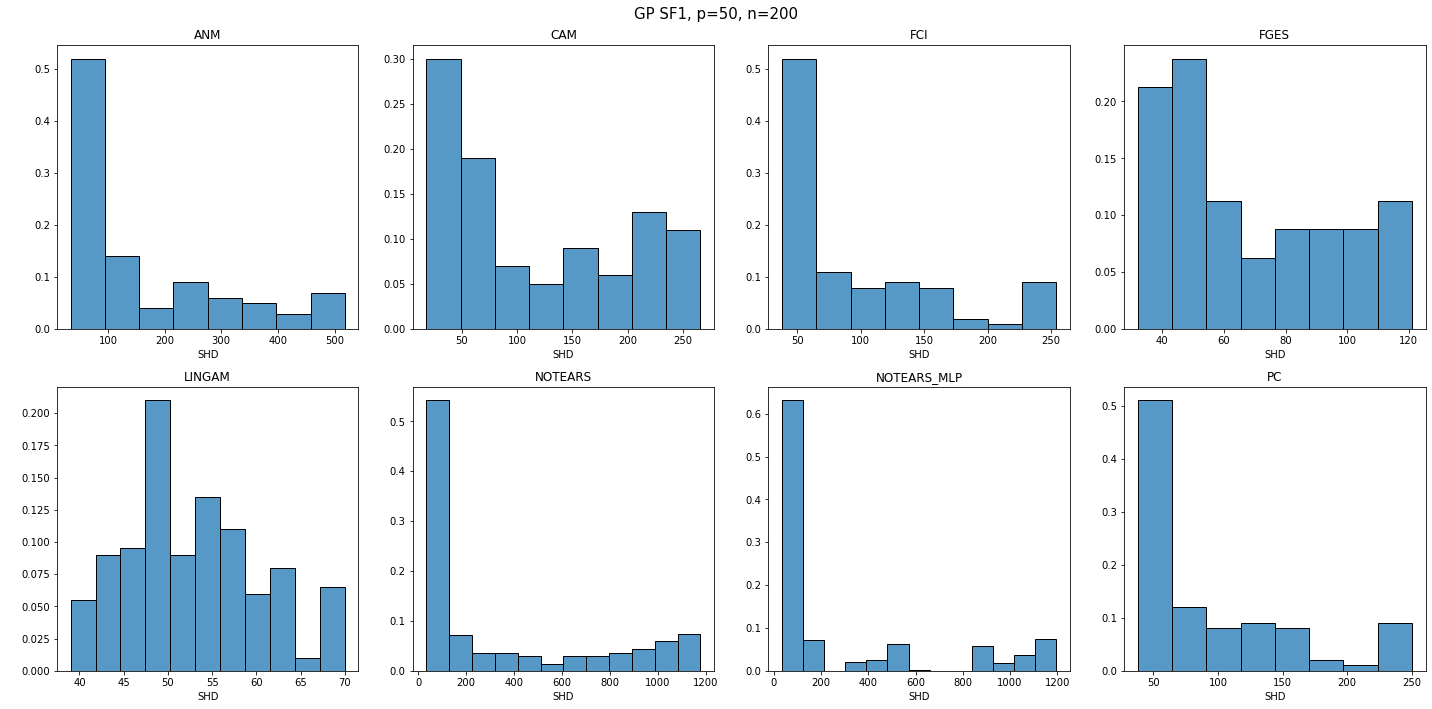

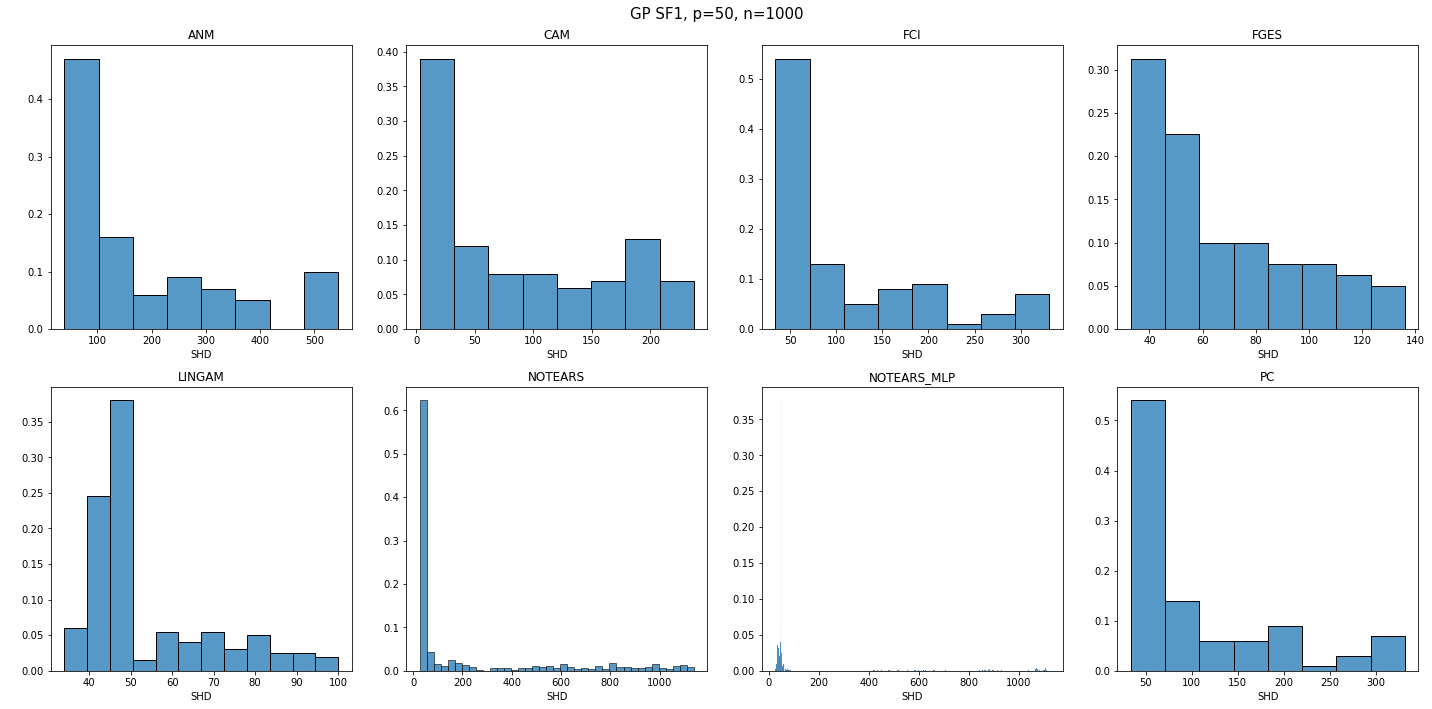

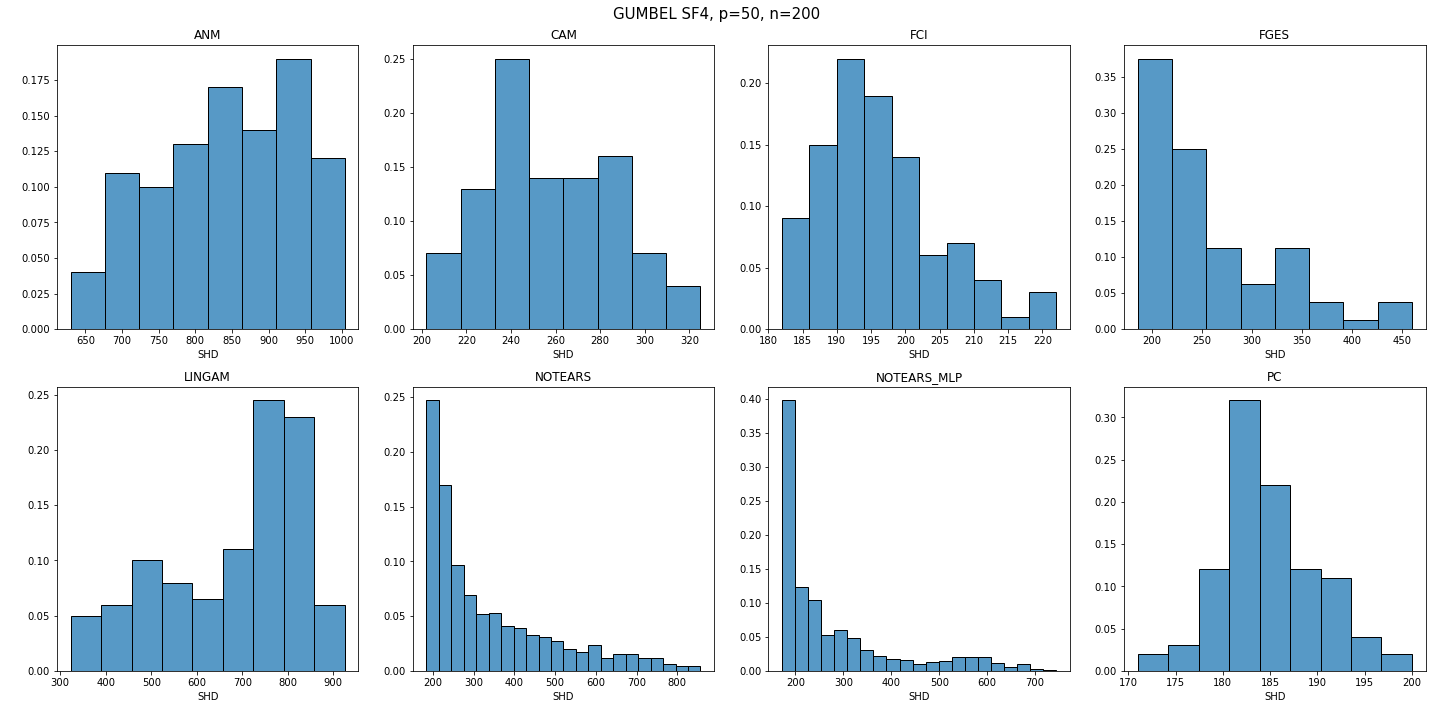

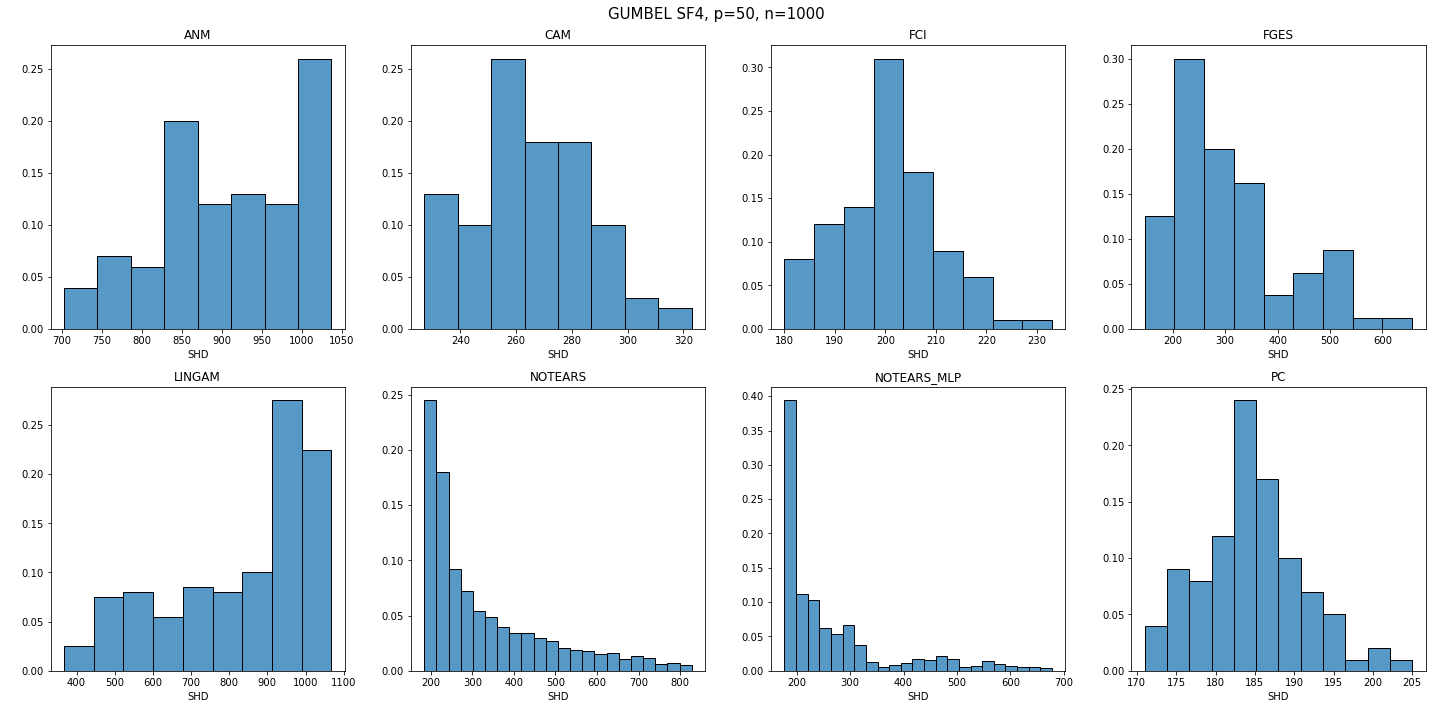

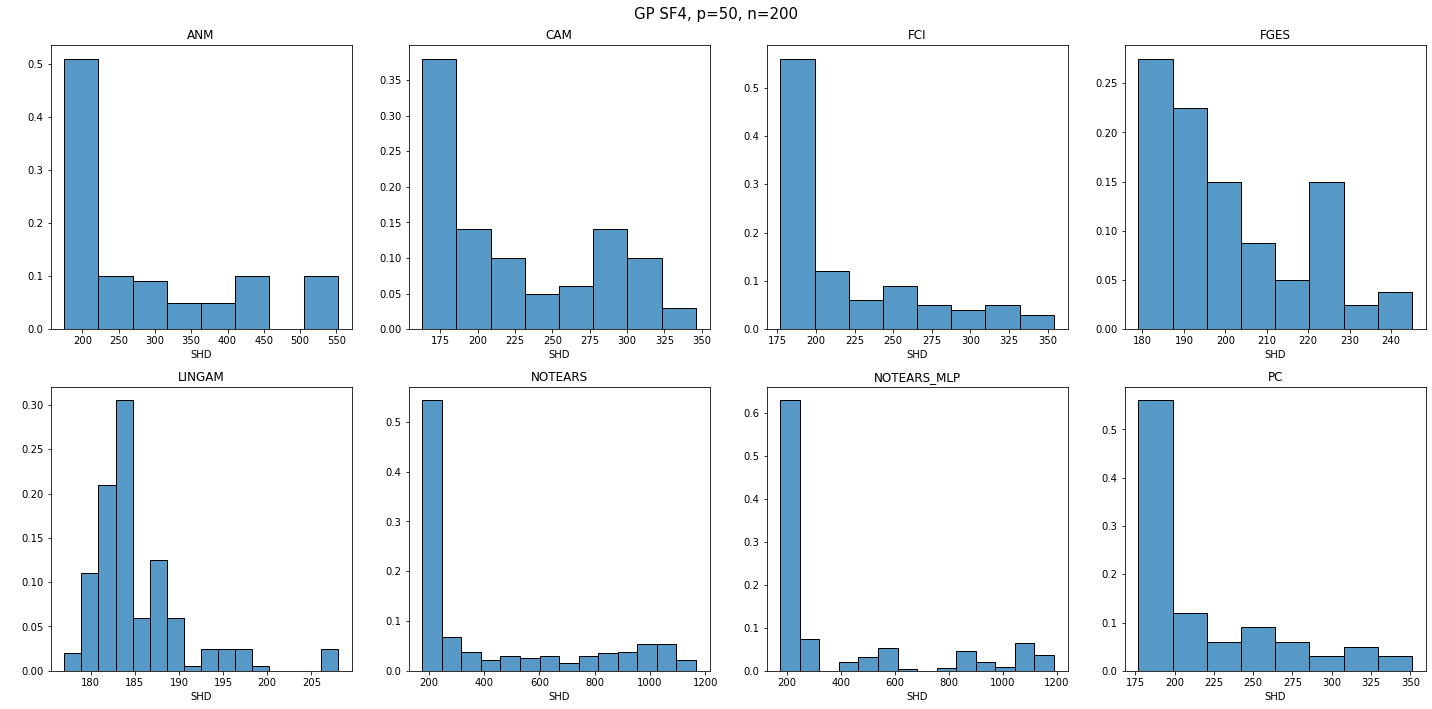

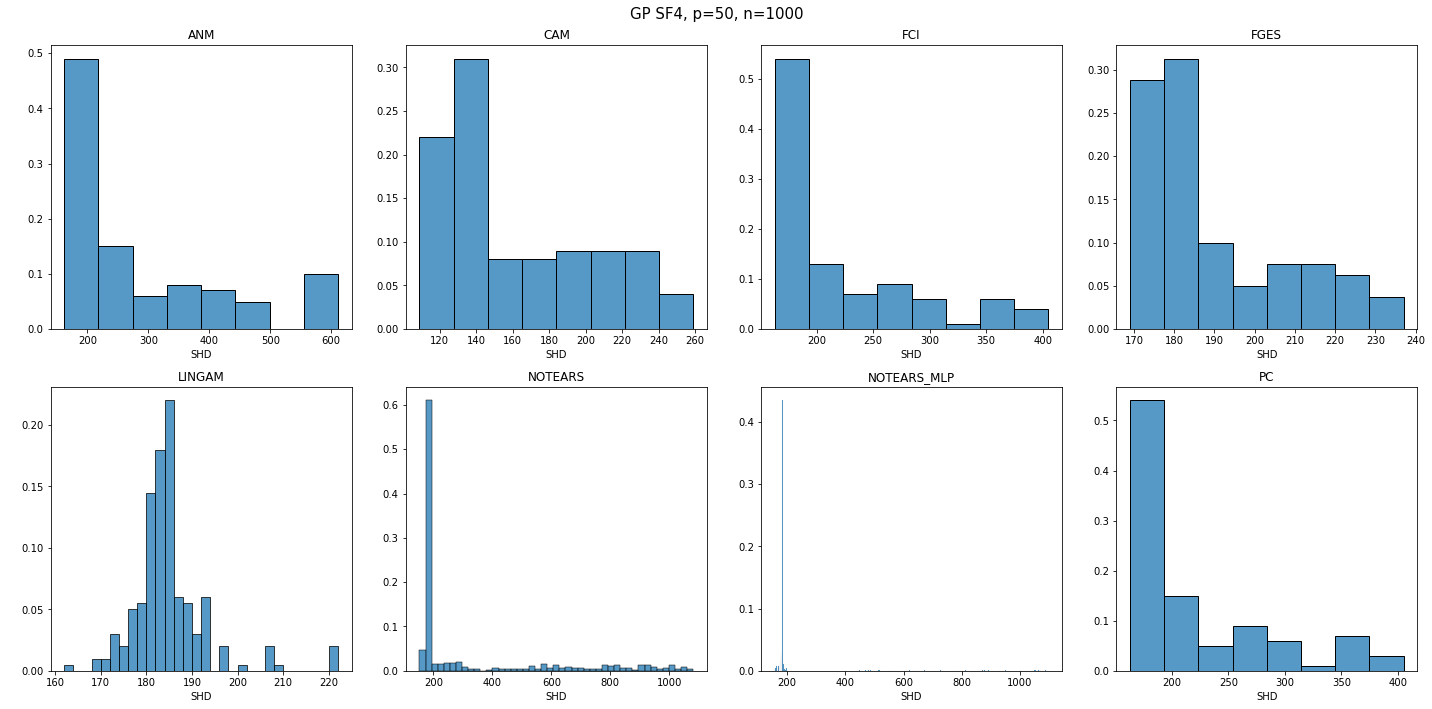

In [6]:
for gt in ['er', 'sf']:
    for p in [10, 20, 50]:
        for d in [1, 4]:
            for sem in ['gumbel', 'gp']:
                for n in [200, 1000]:
                    plot_general(gt, p, d, sem, n)

## Change

### n

/tmp/ipykernel_733290/3090102906.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(2, 4, figsize=(20, 10))


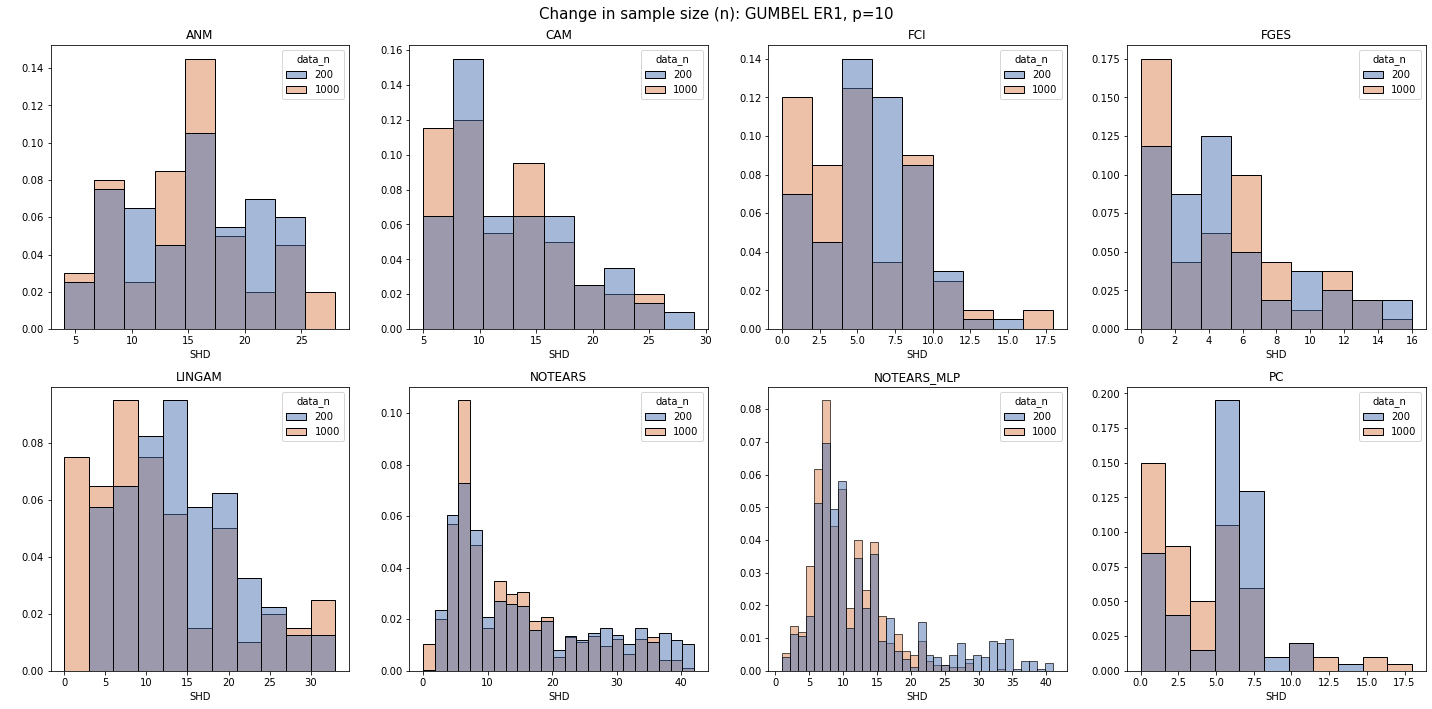

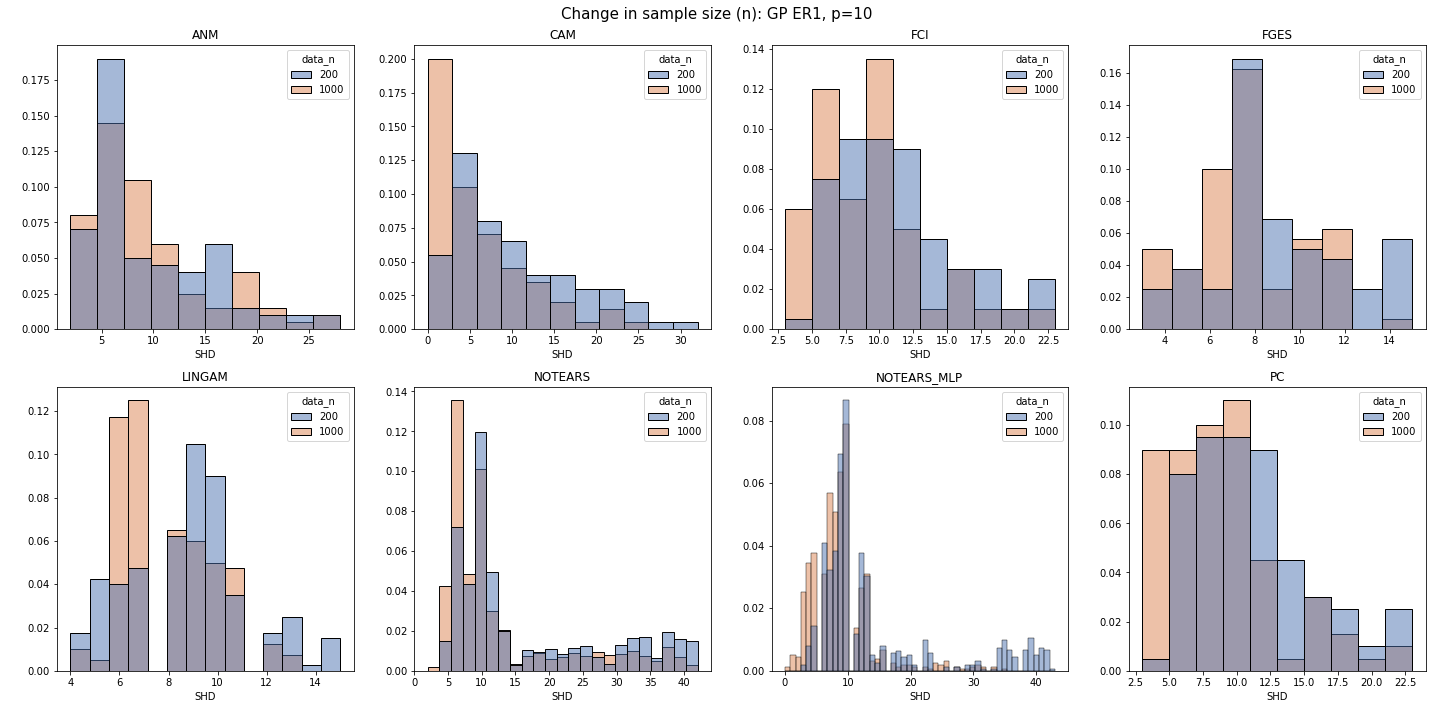

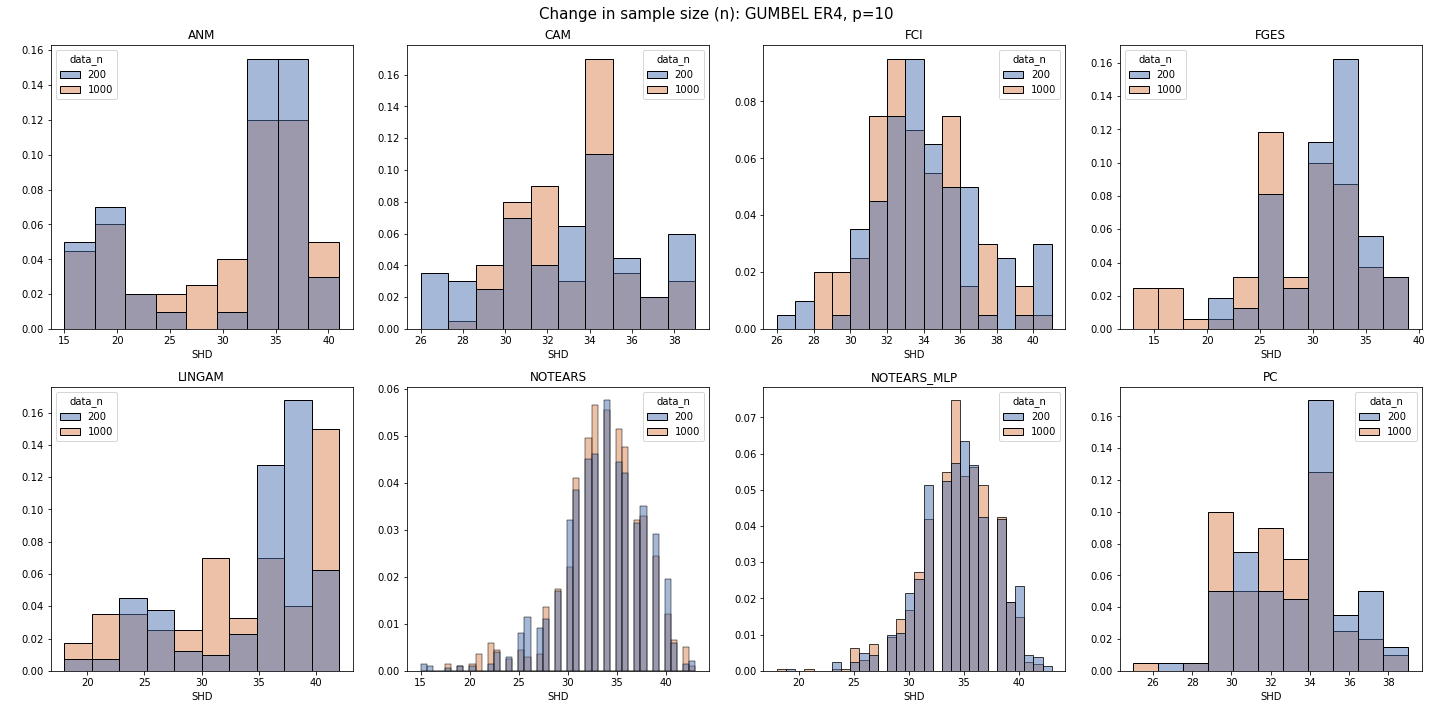

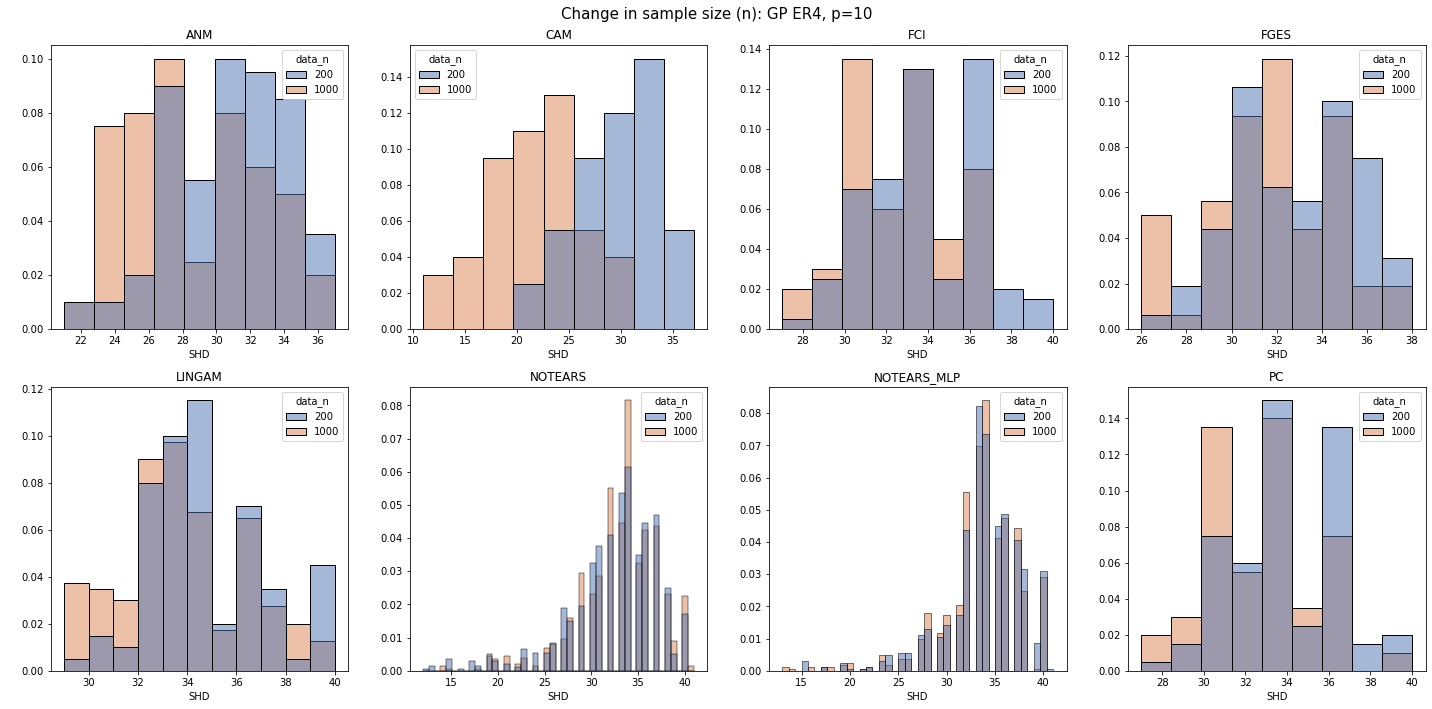

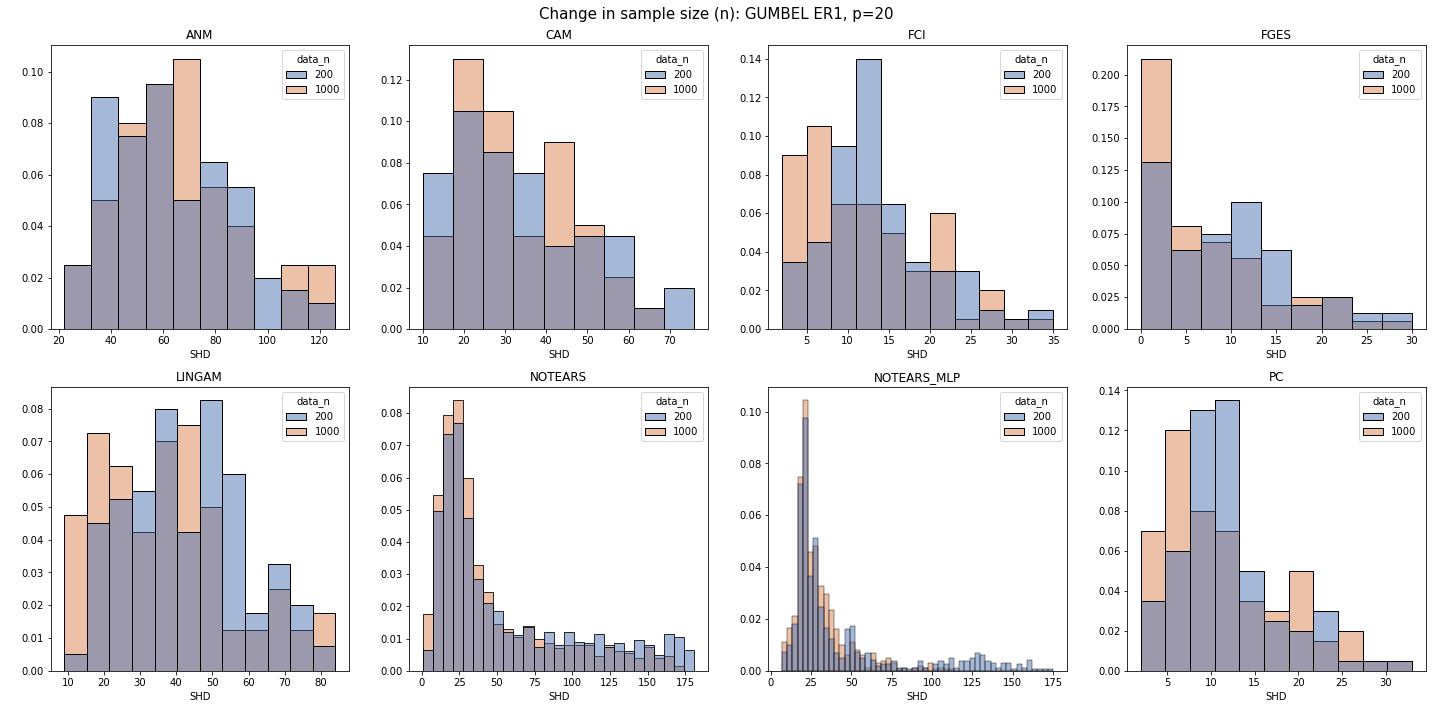

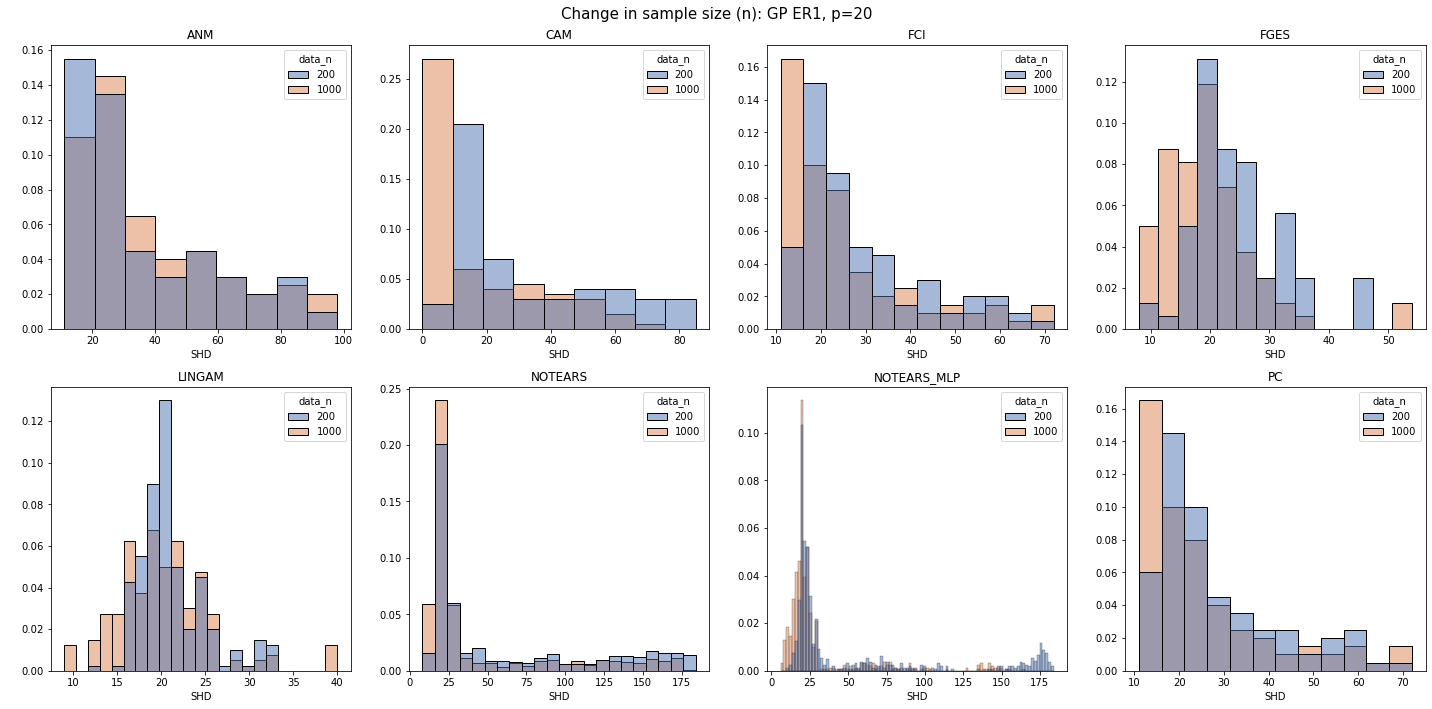

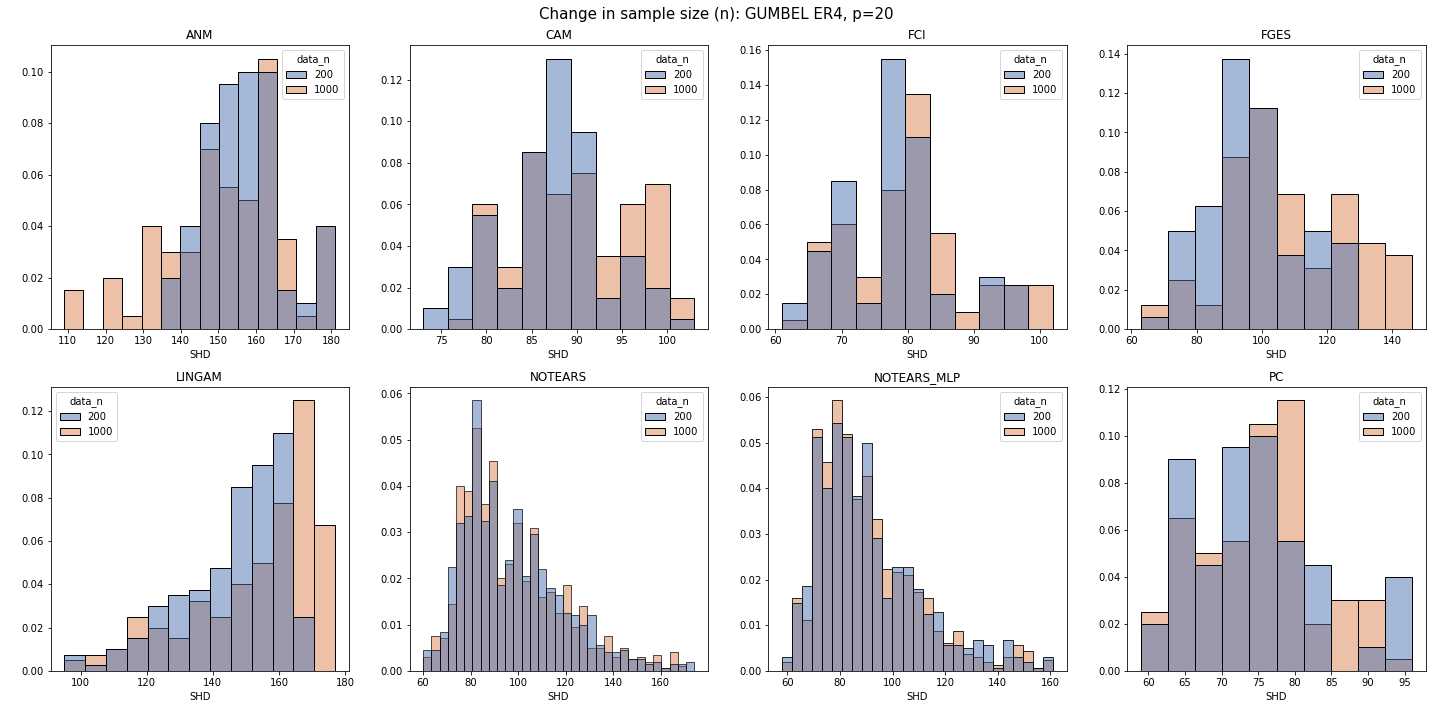

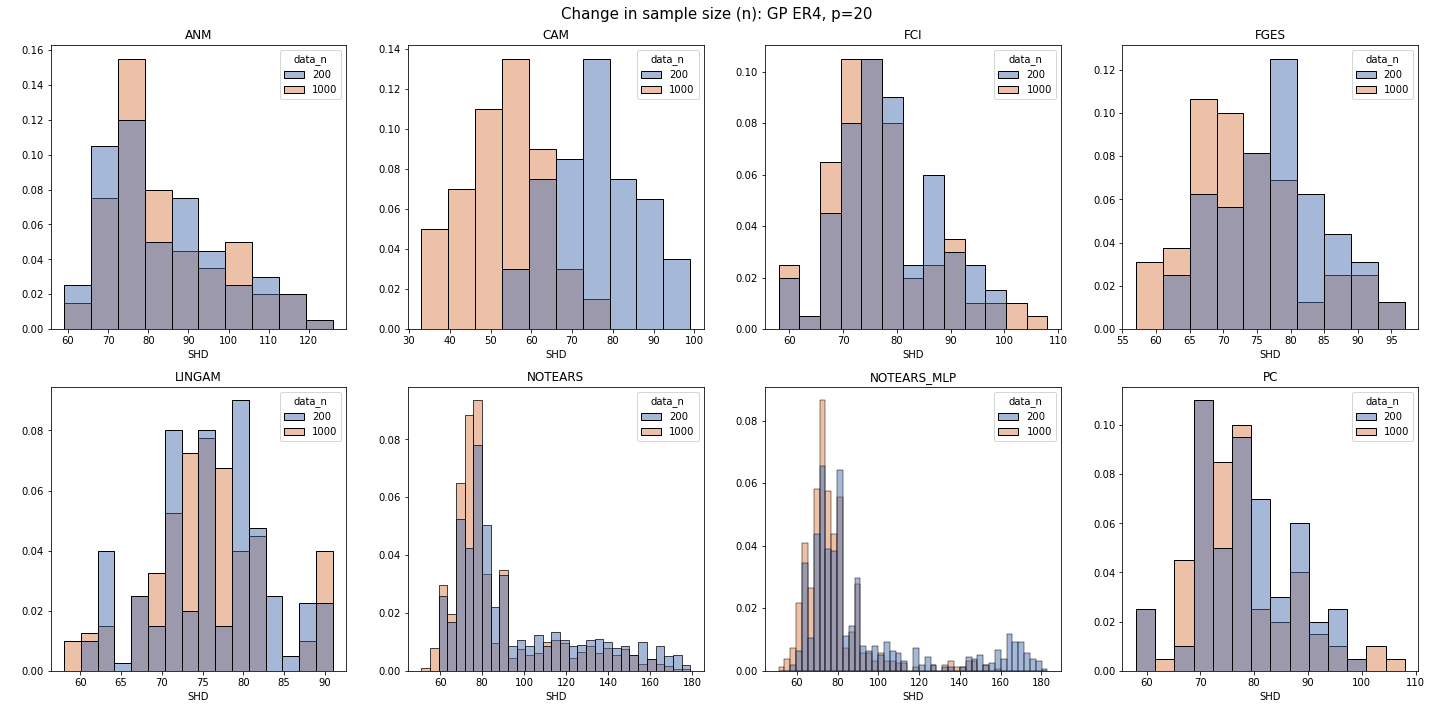

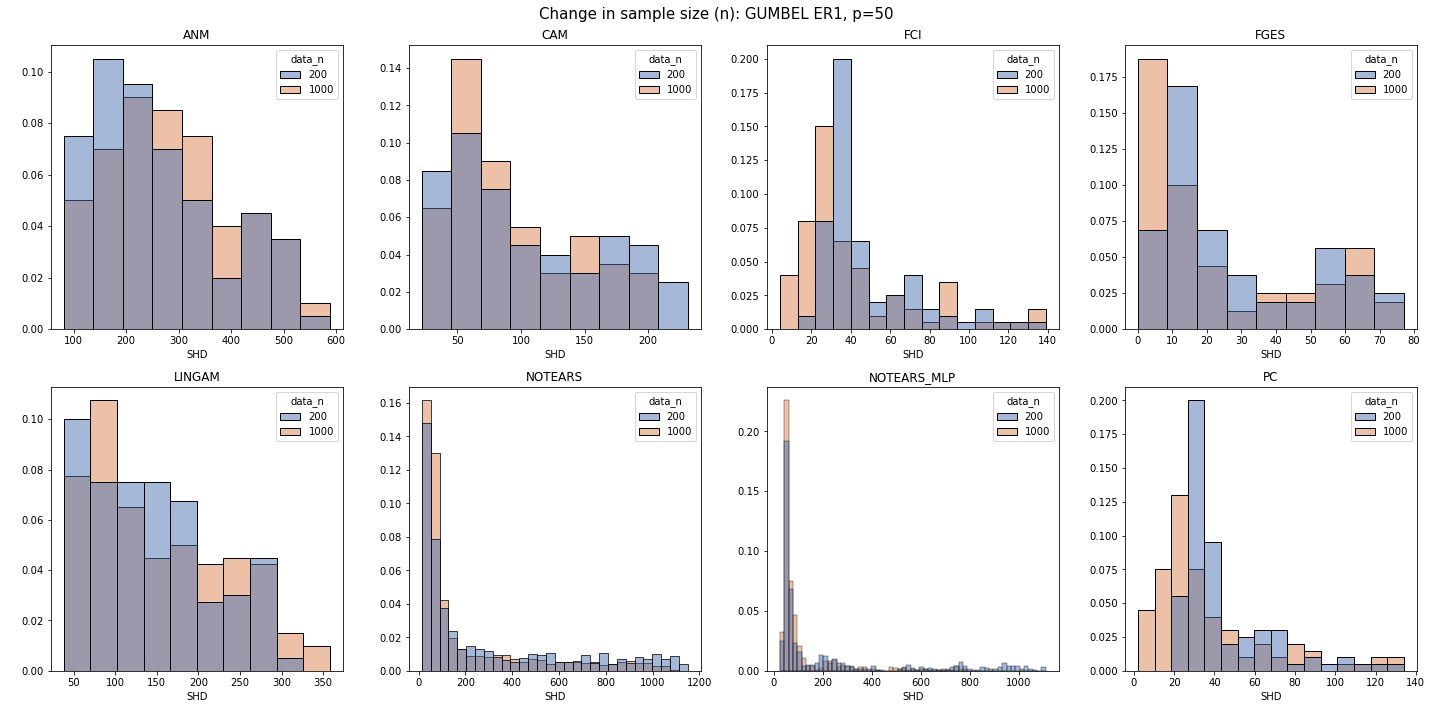

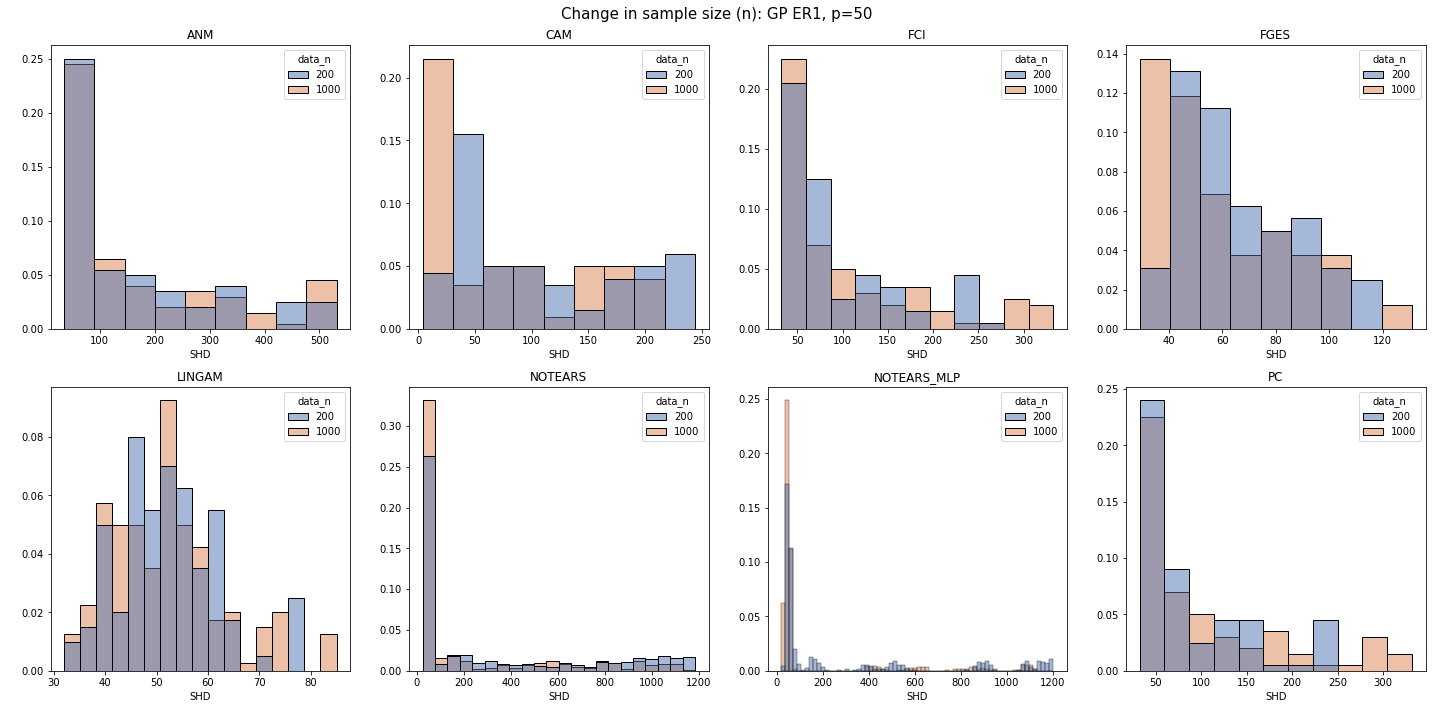

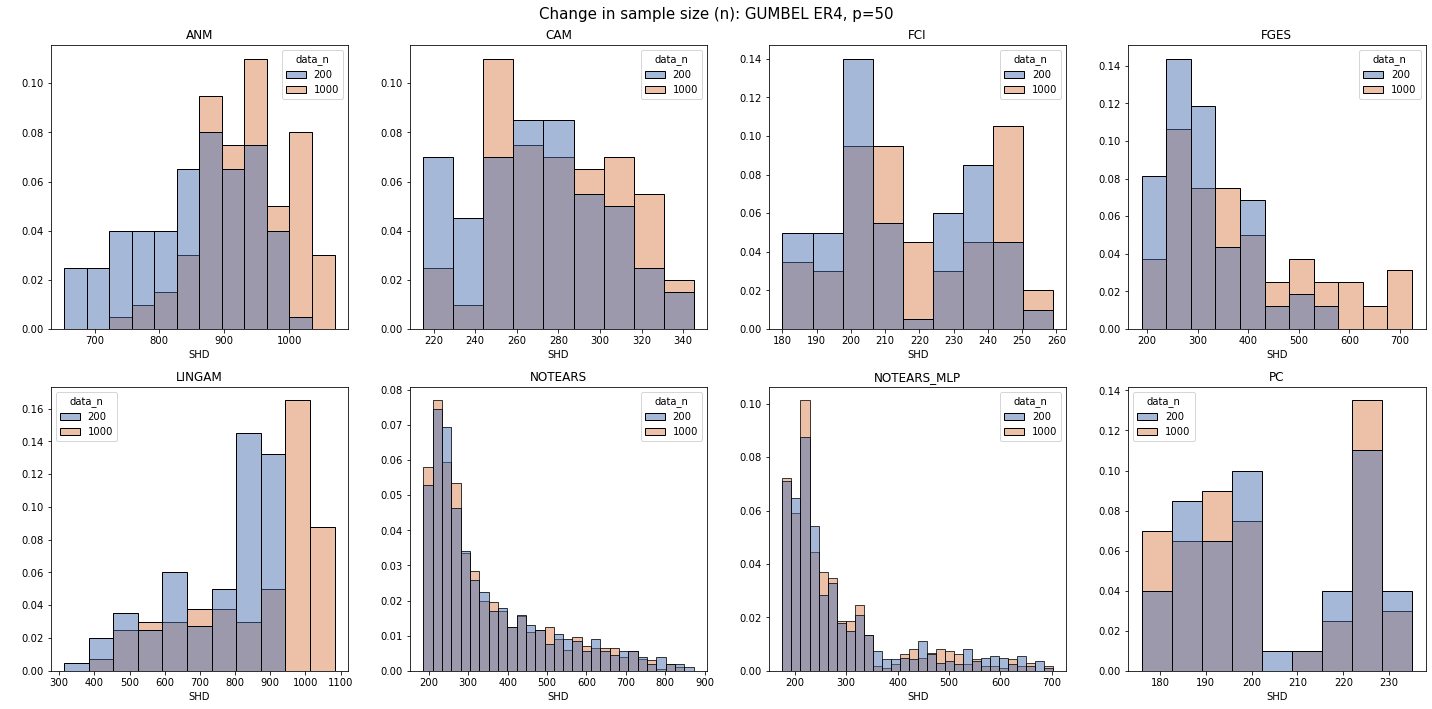

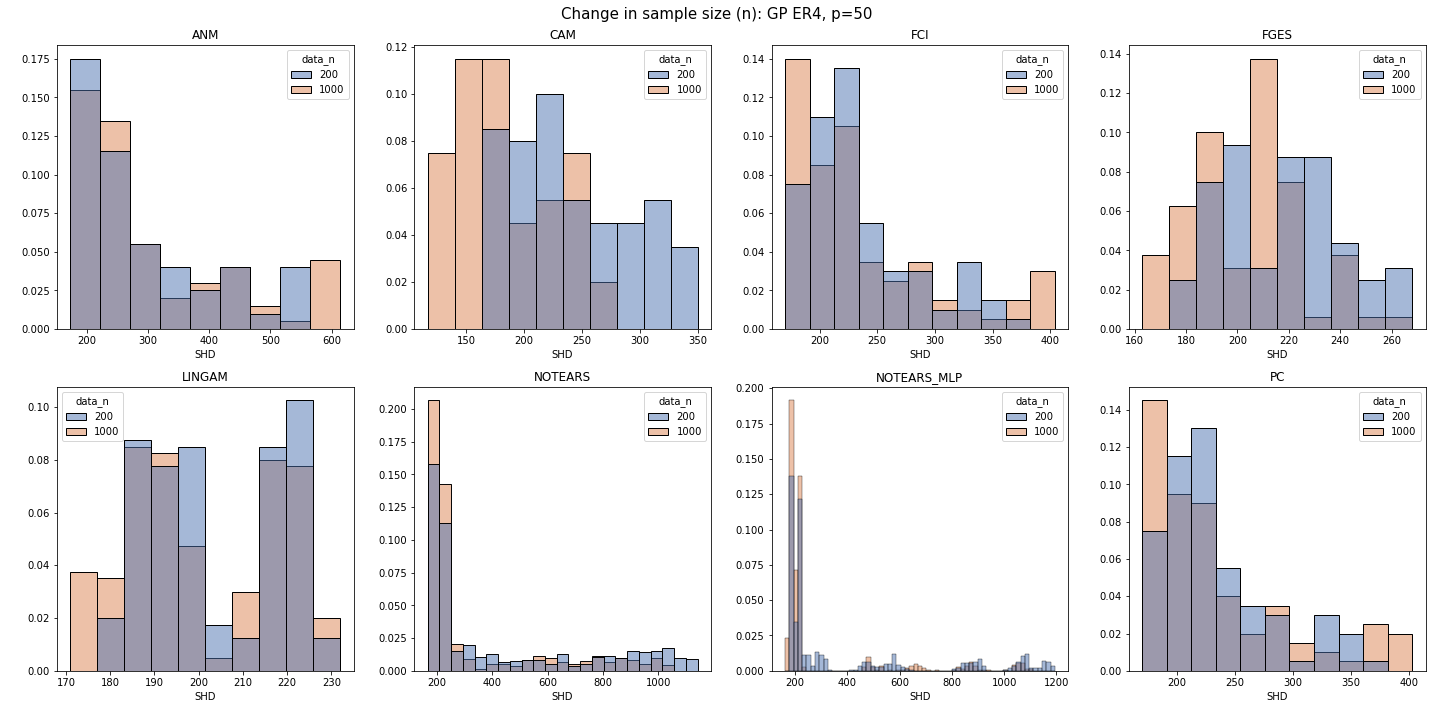

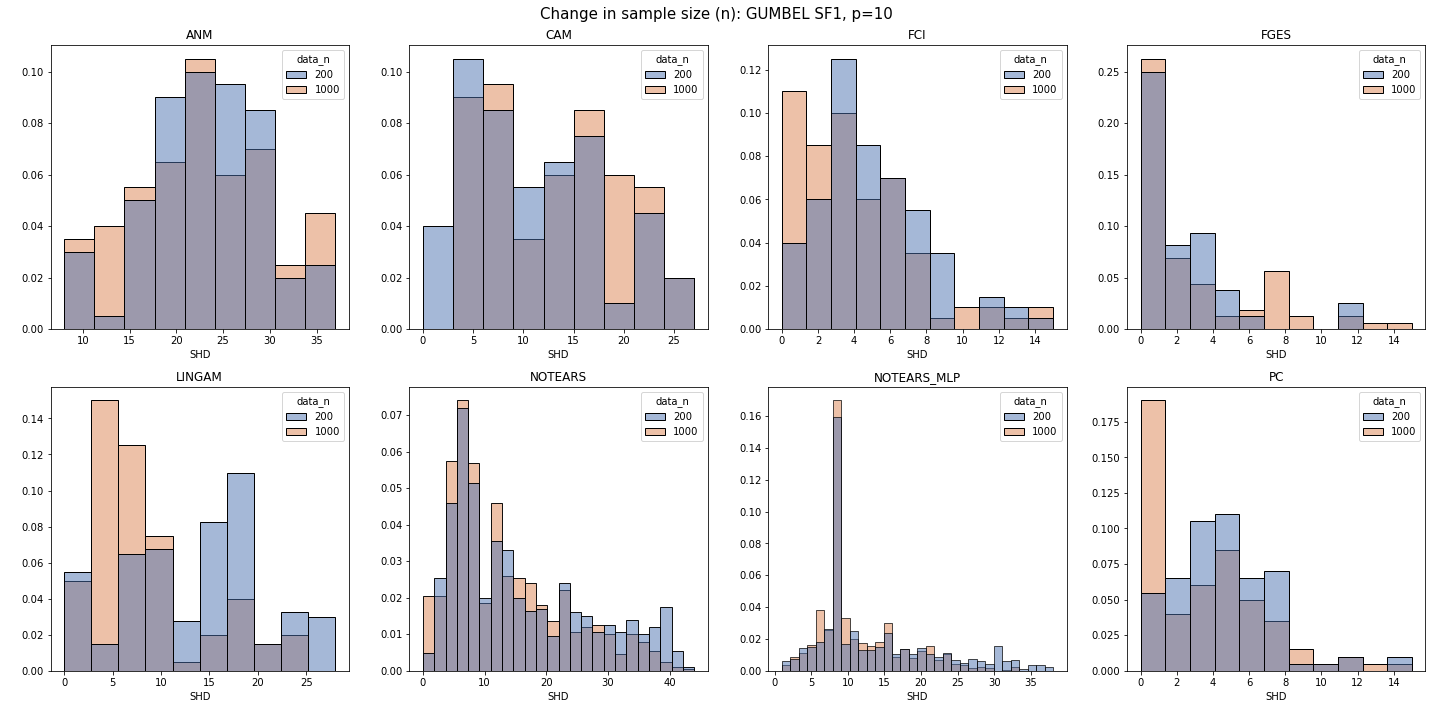

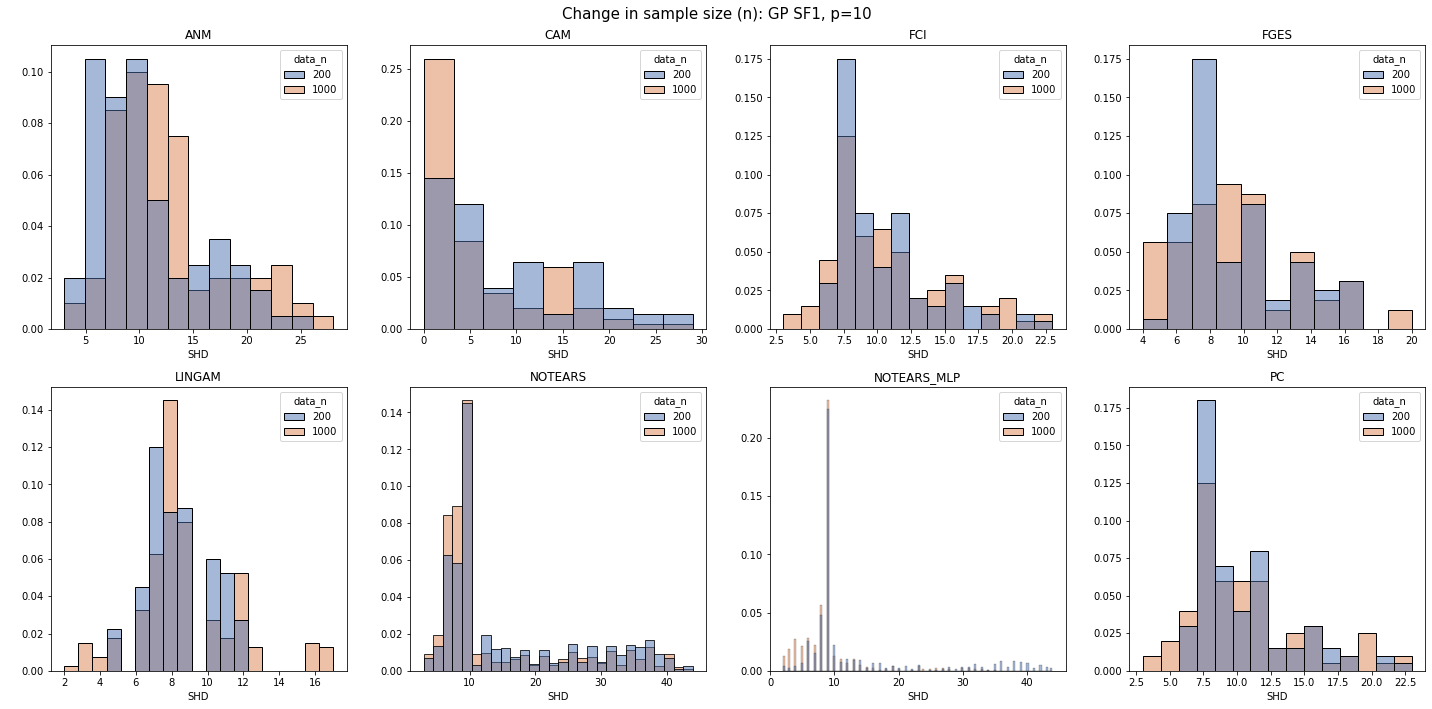

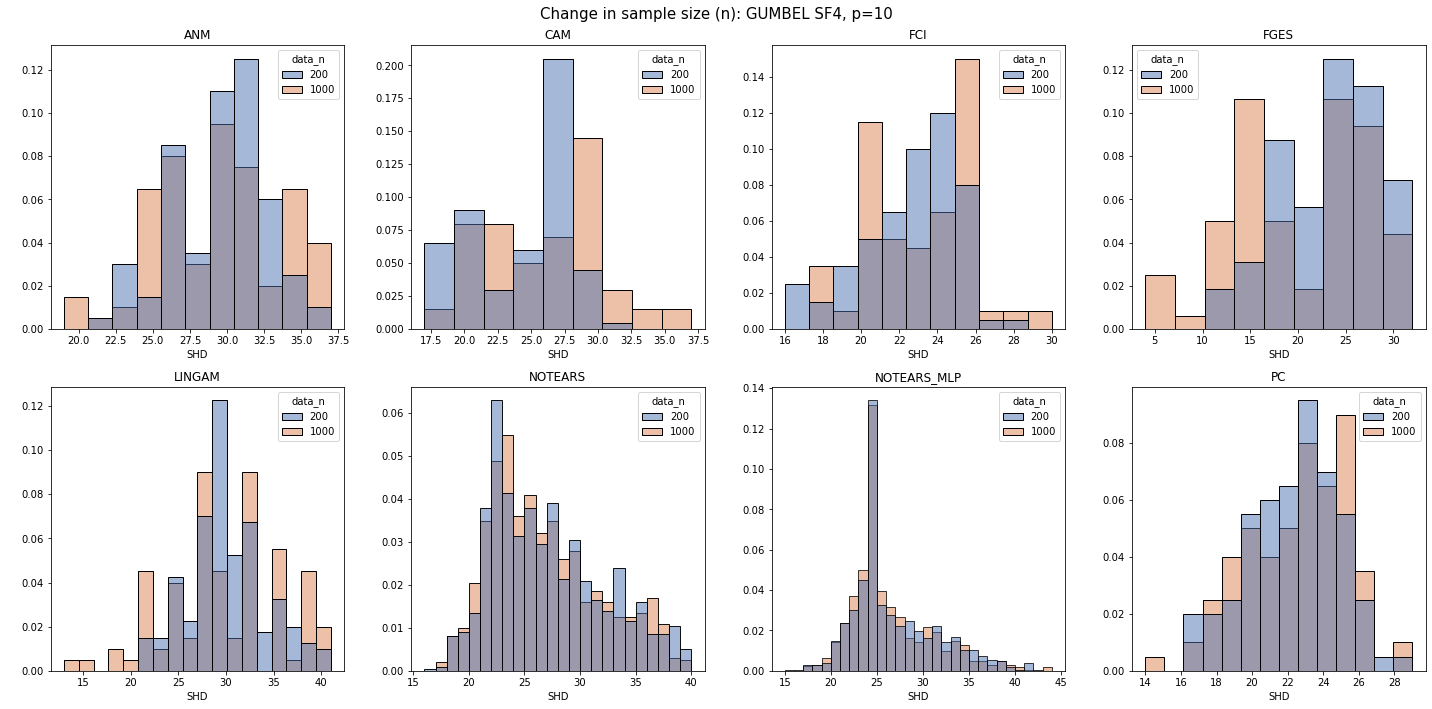

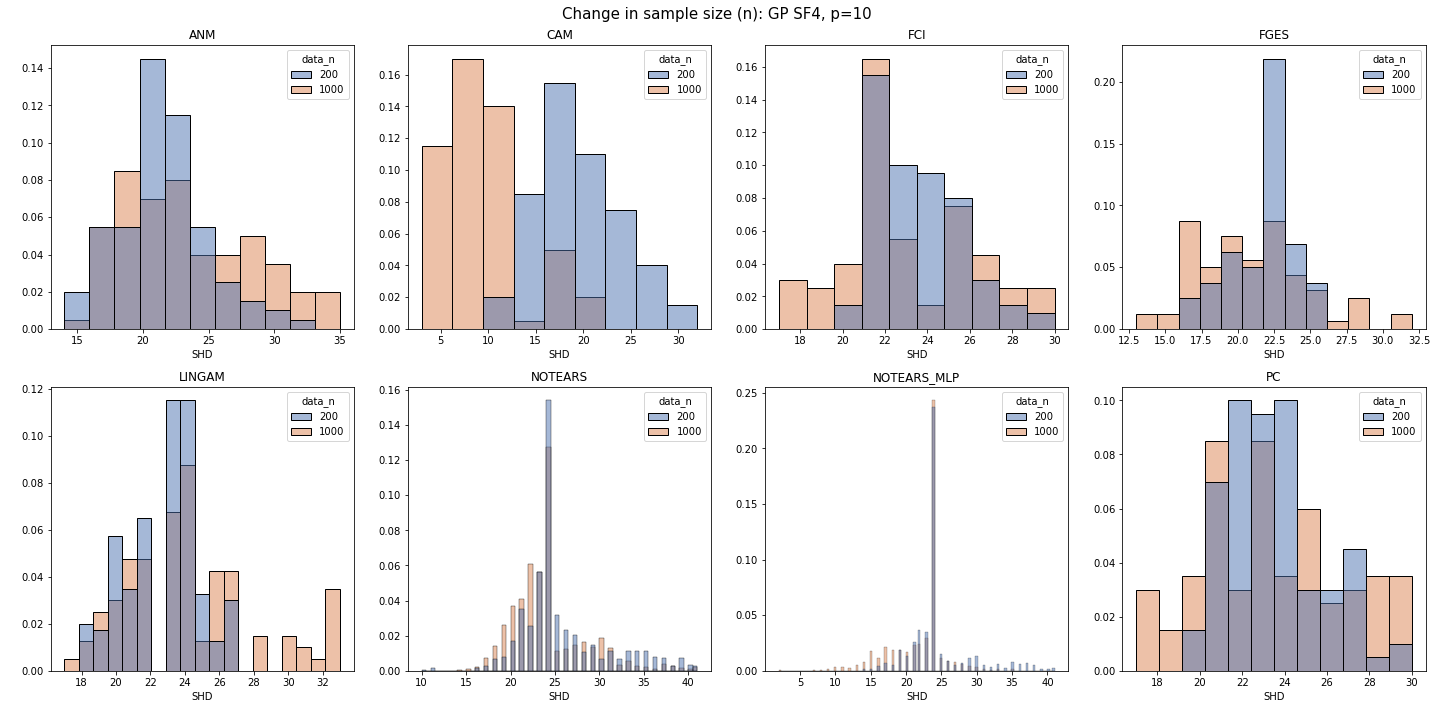

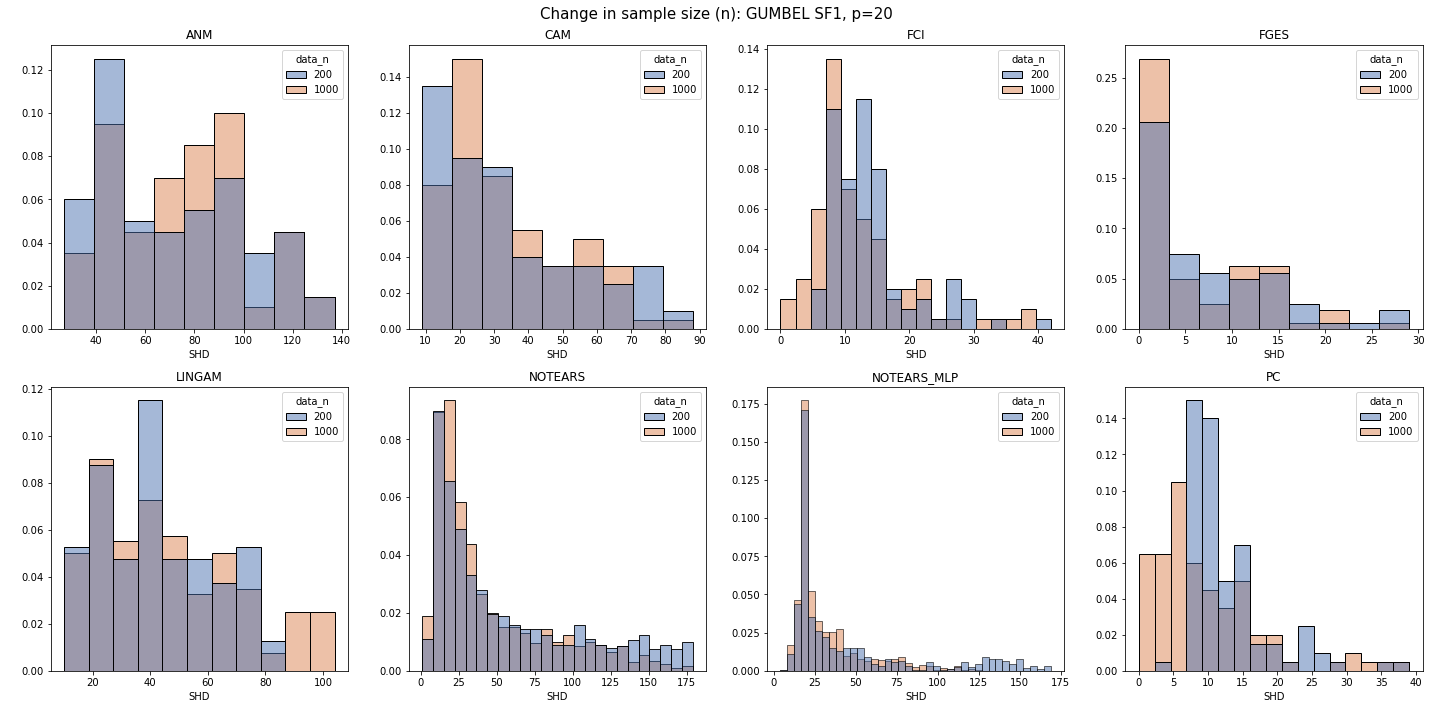

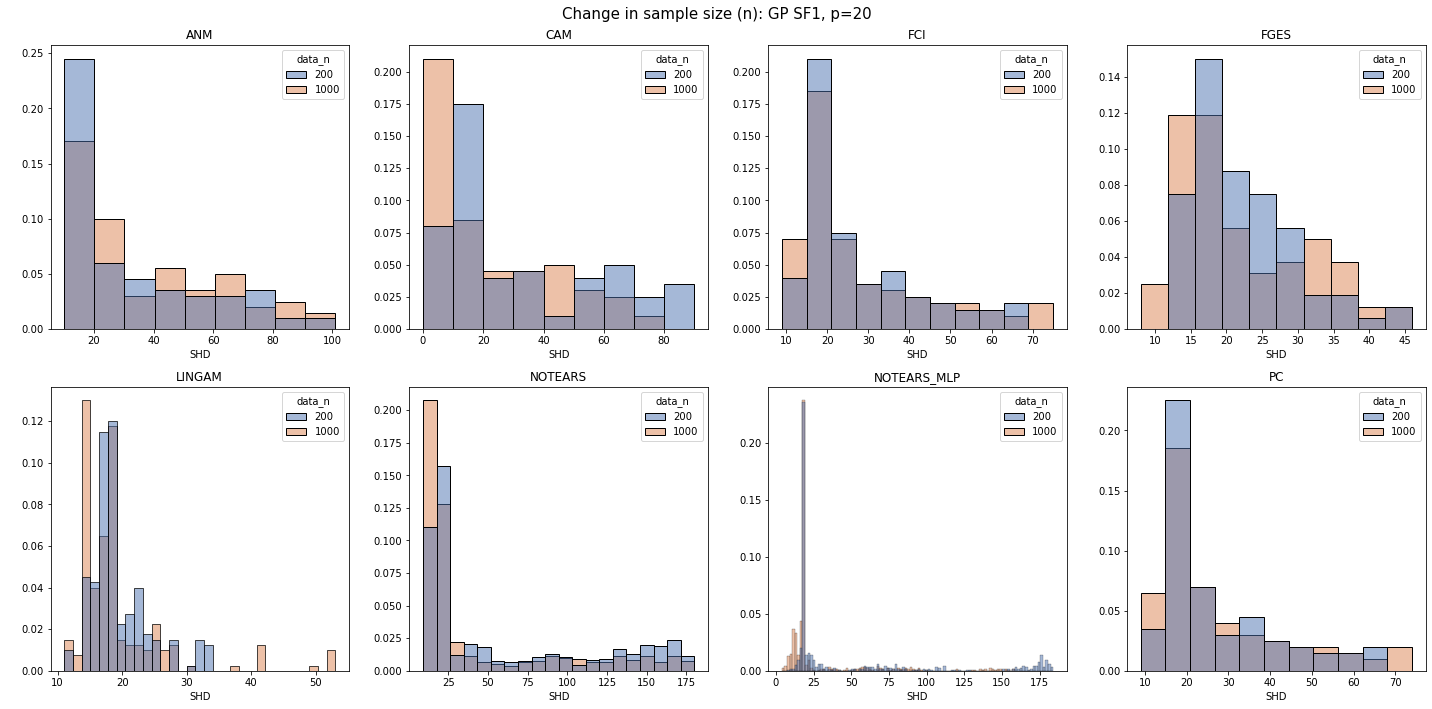

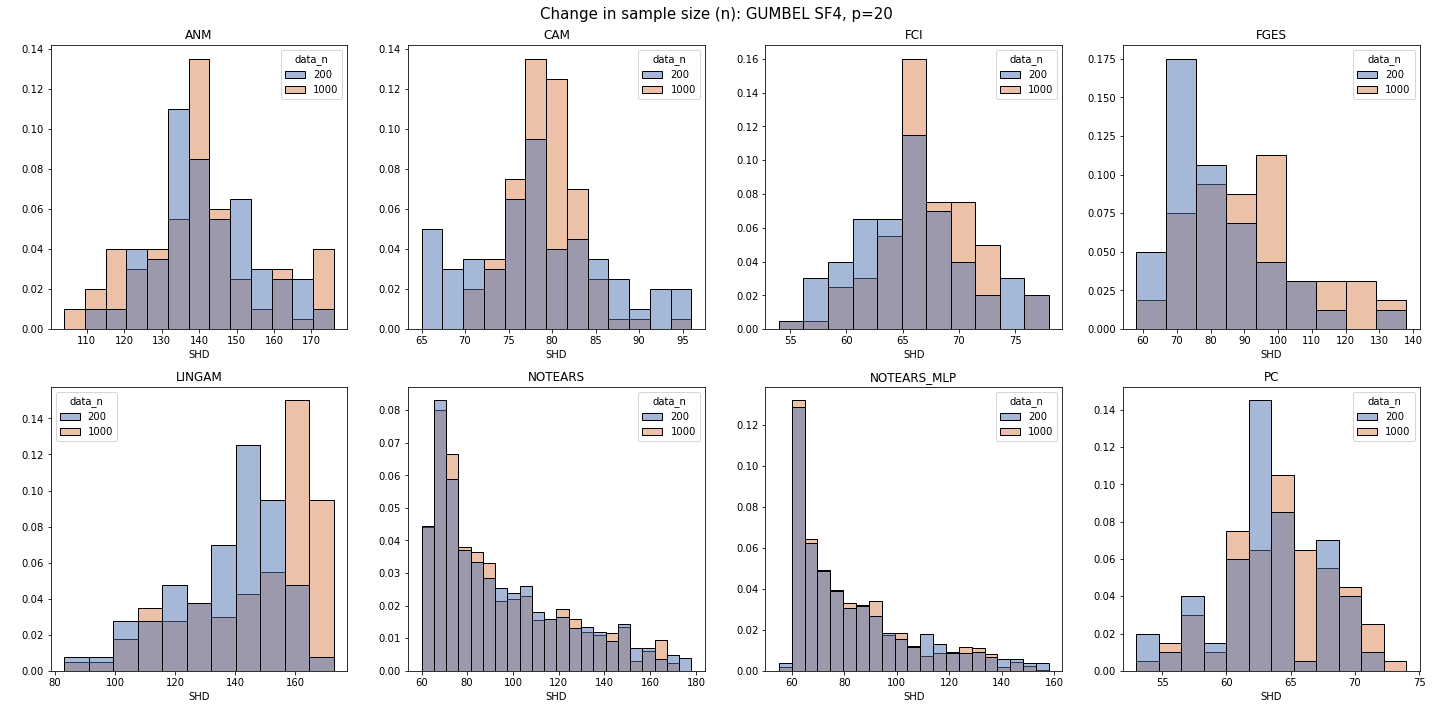

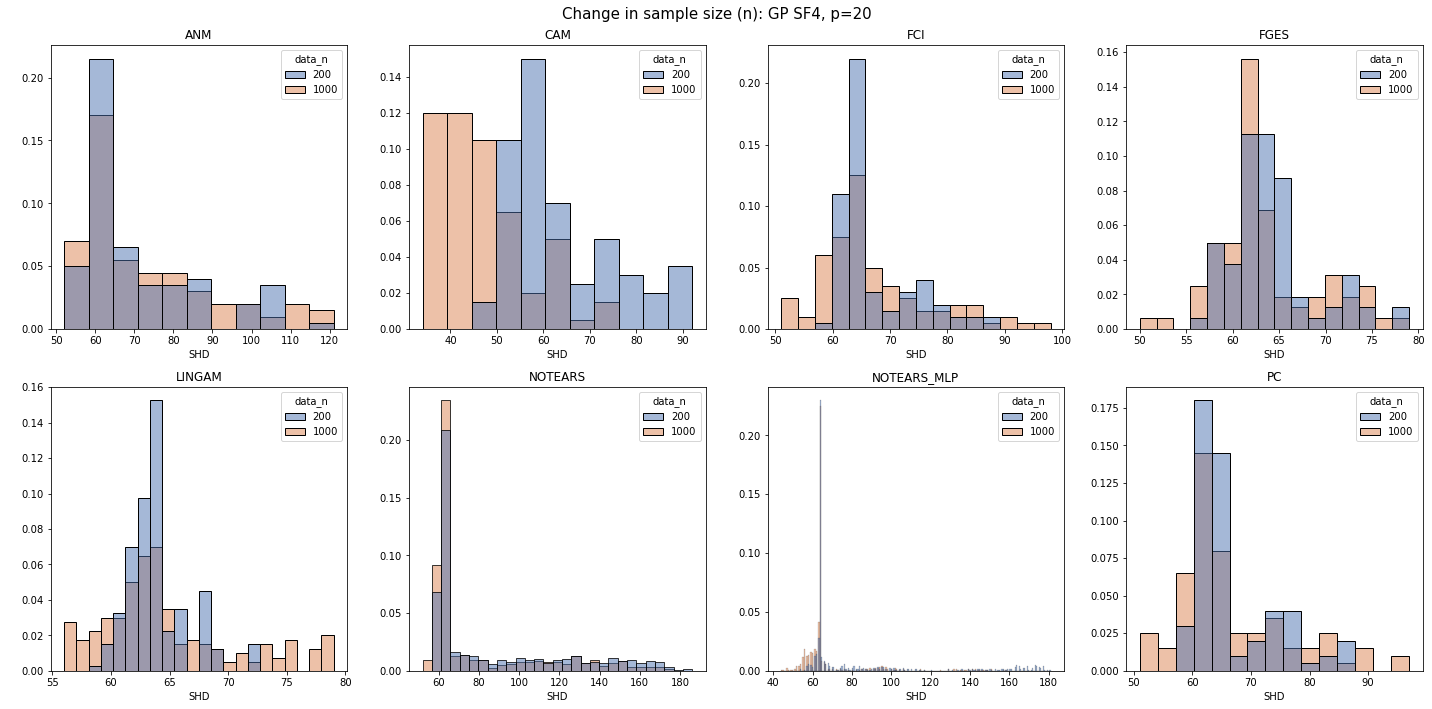

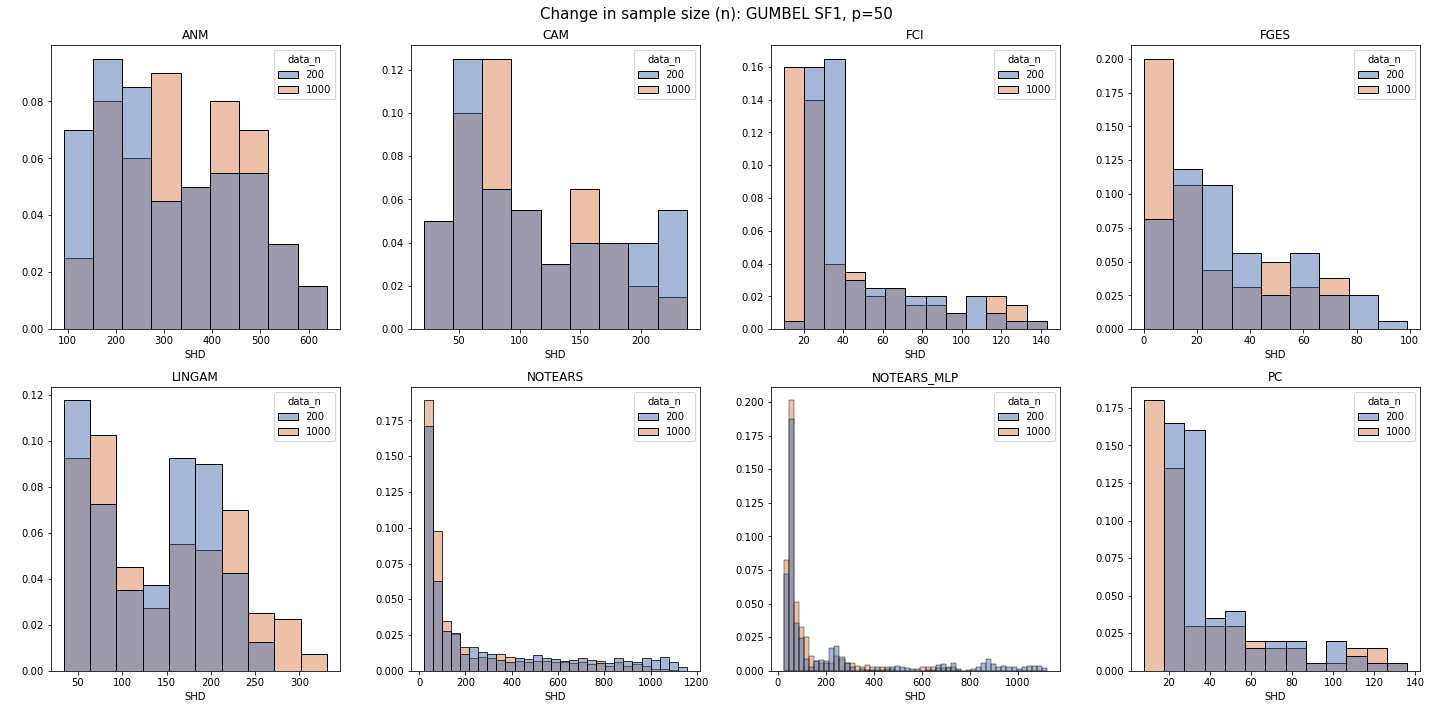

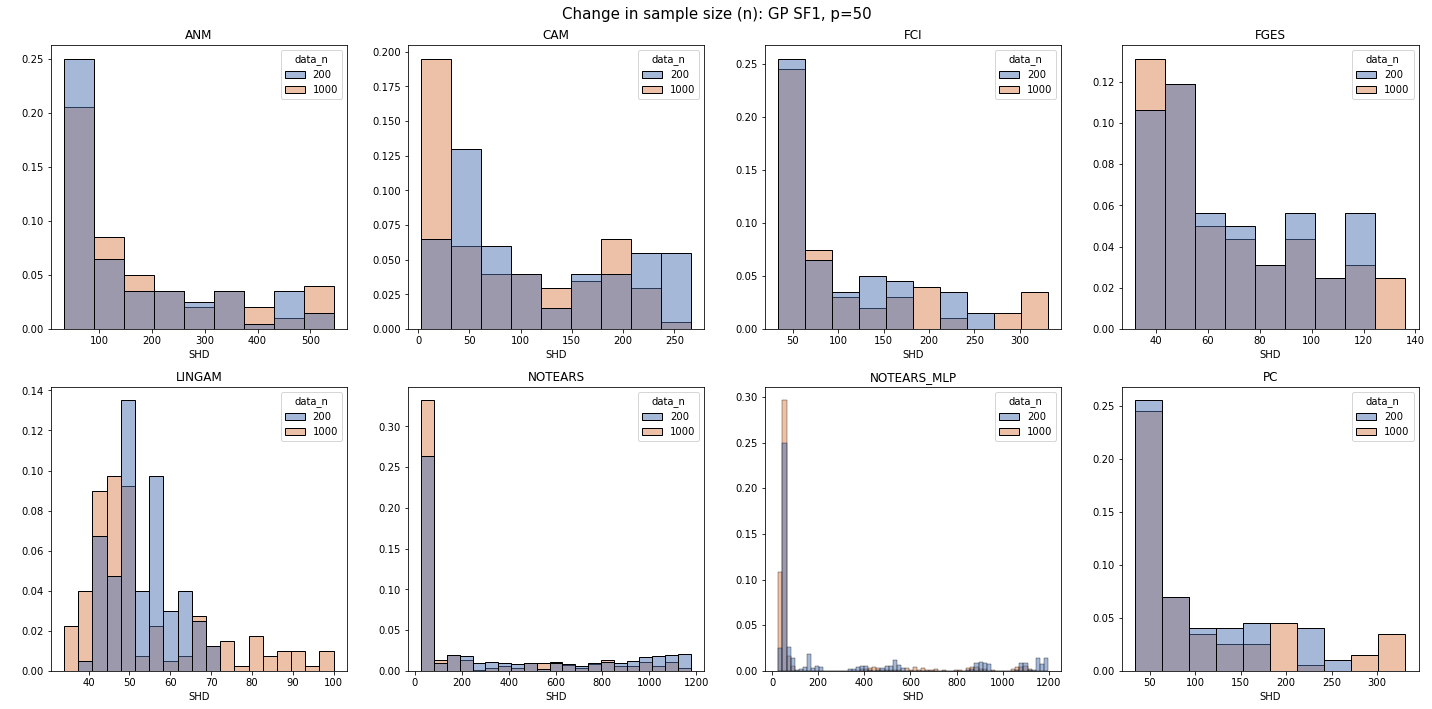

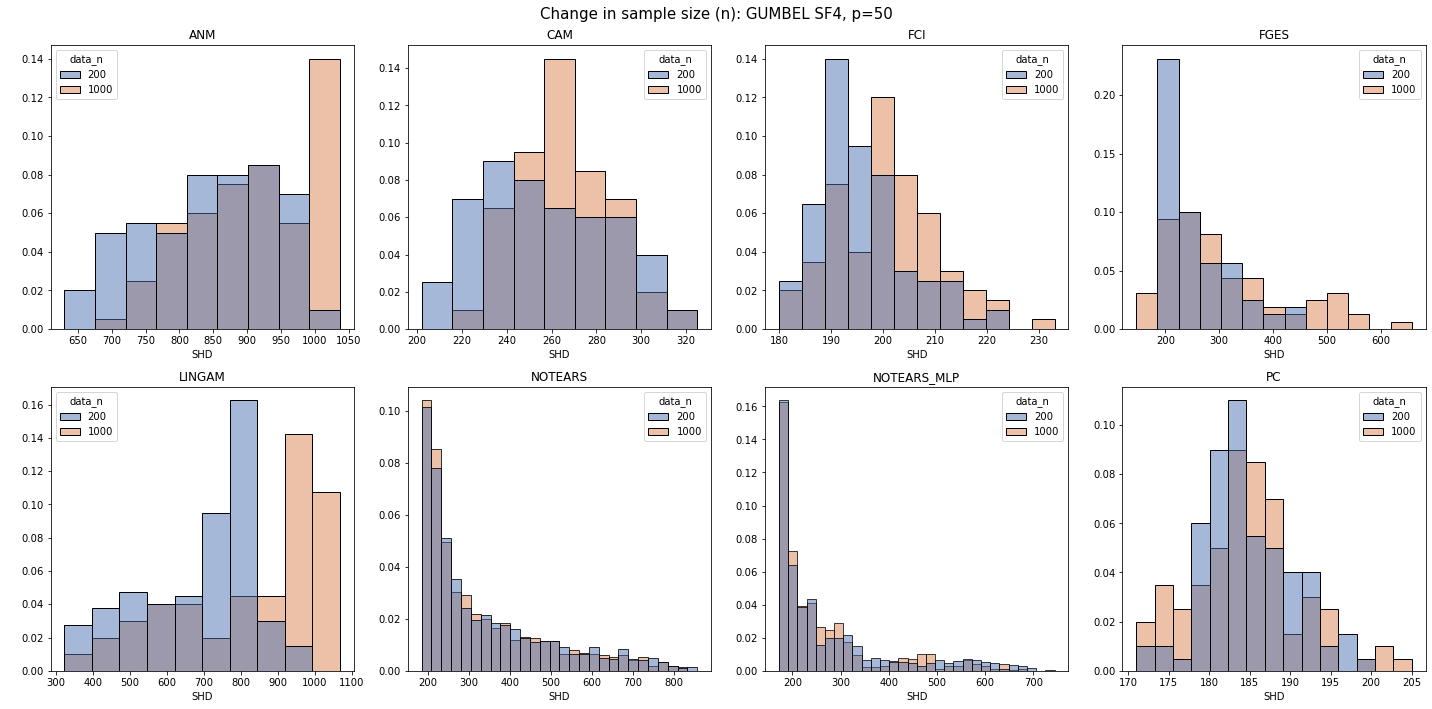

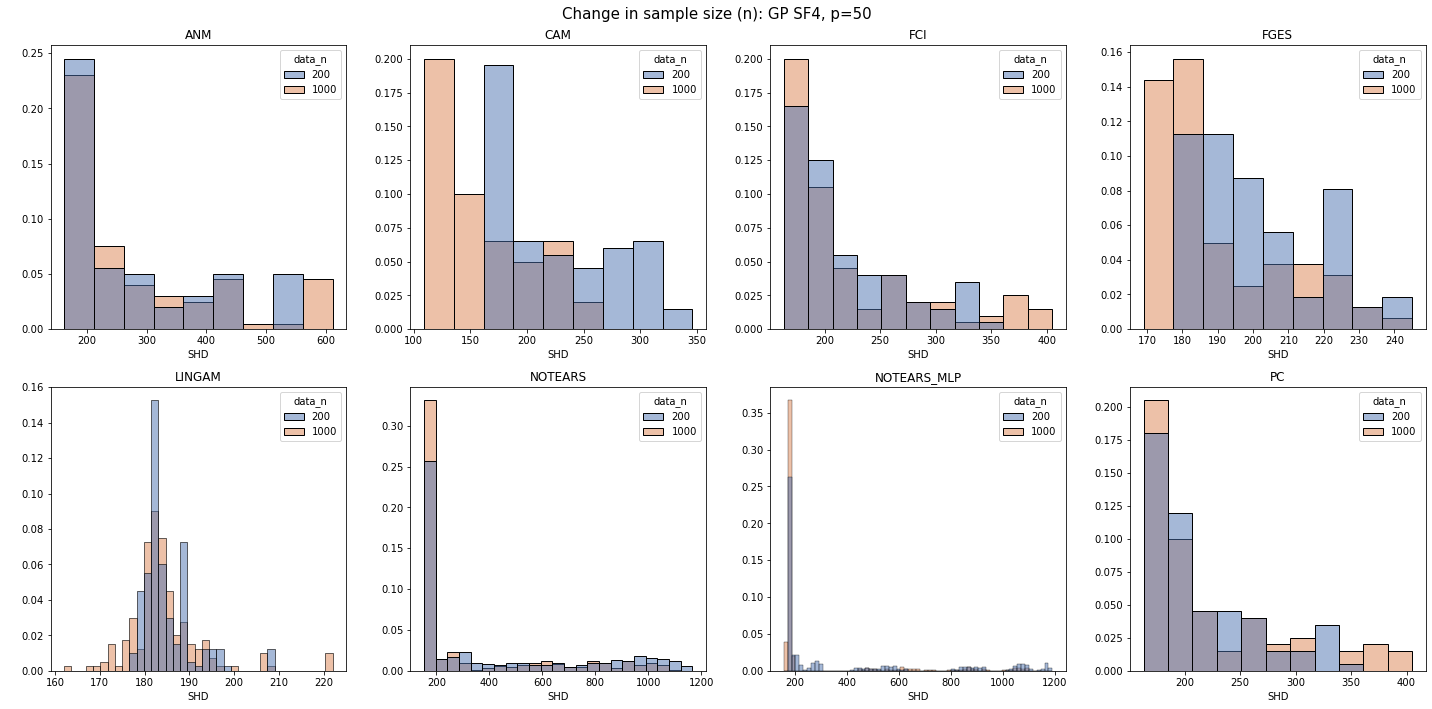

In [12]:
for gt in ['er', 'sf']:
    for p in [10, 20, 50]:
        for d in [1, 4]:
            for sem in ['gumbel', 'gp']:
                plot_n(gt, p, d, sem)

### p

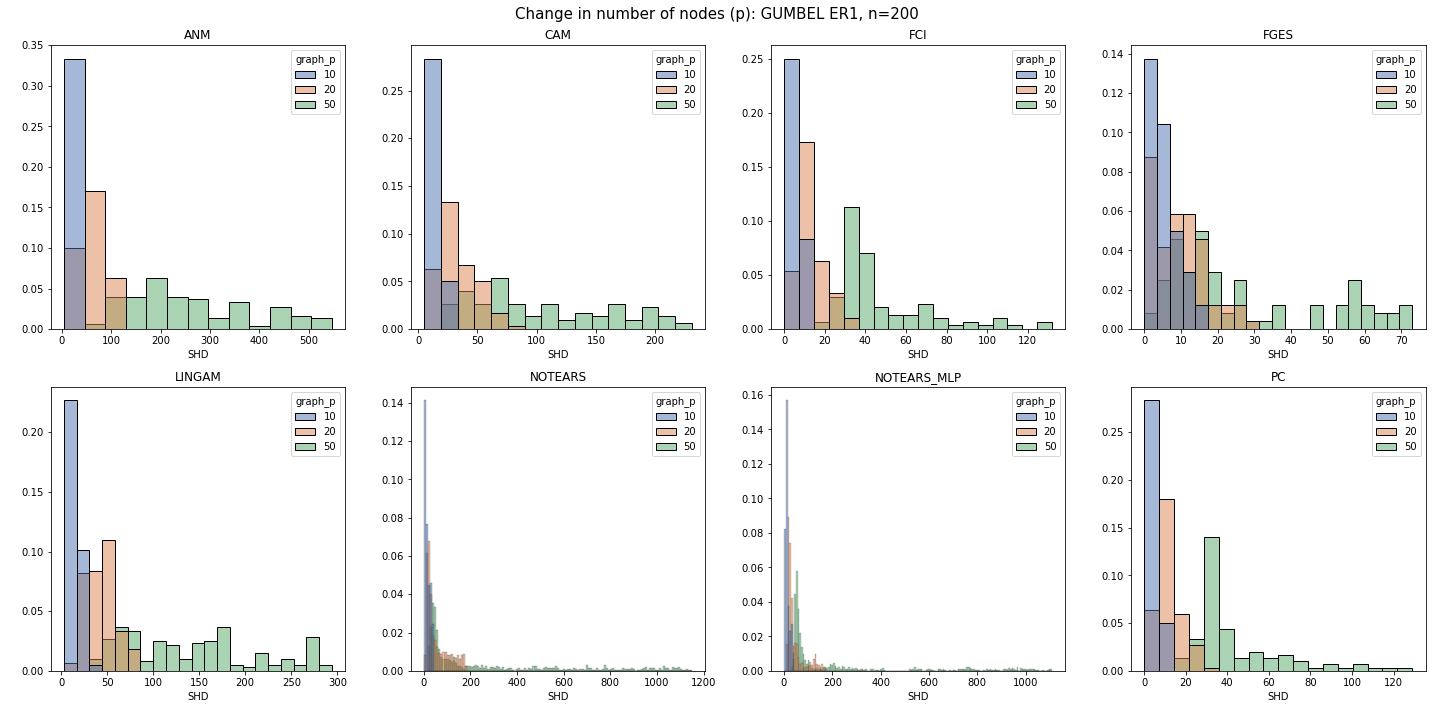

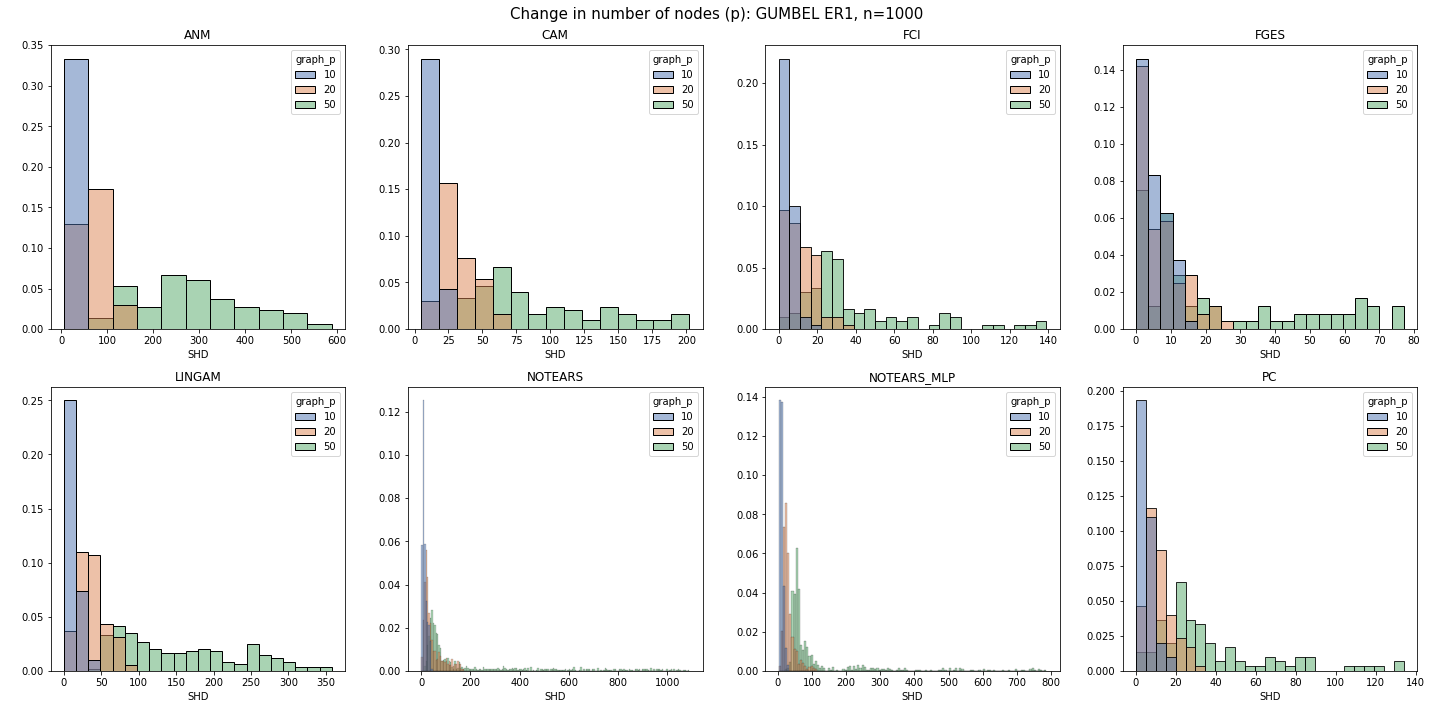

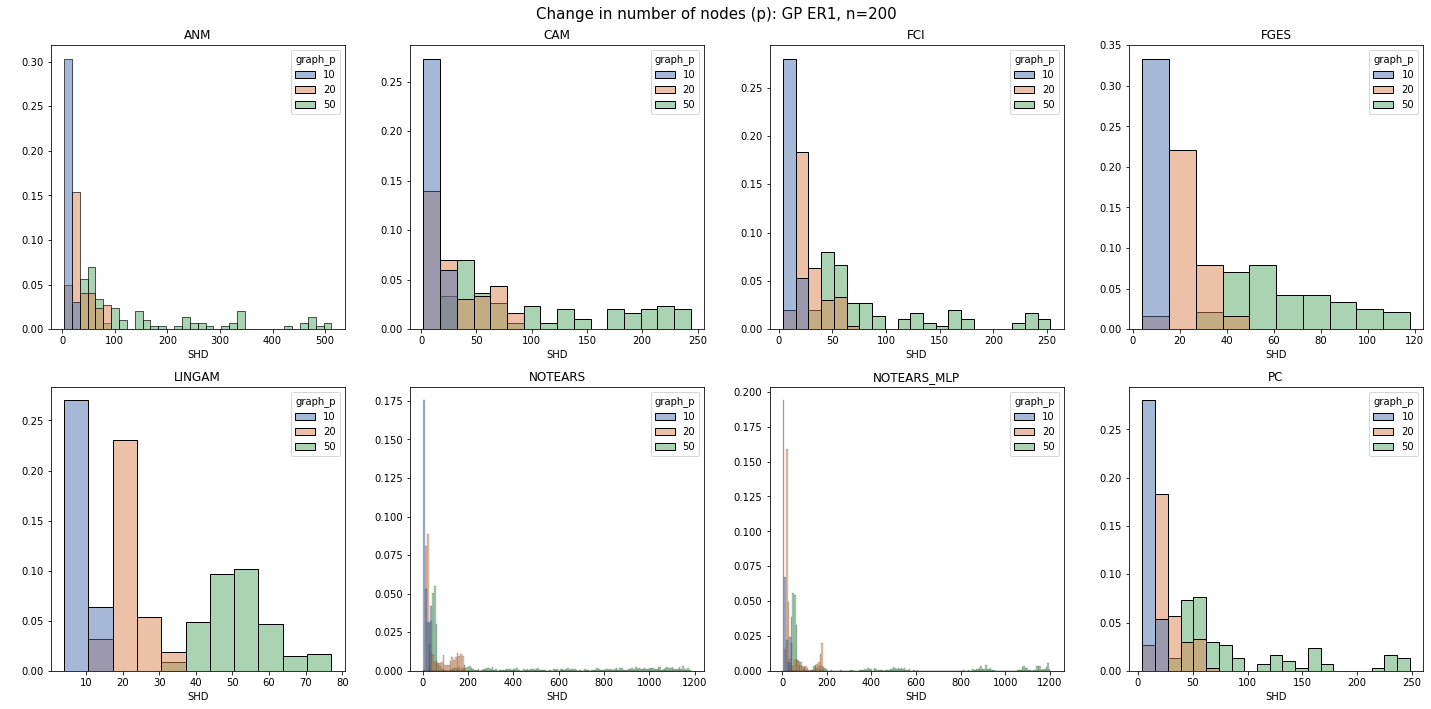

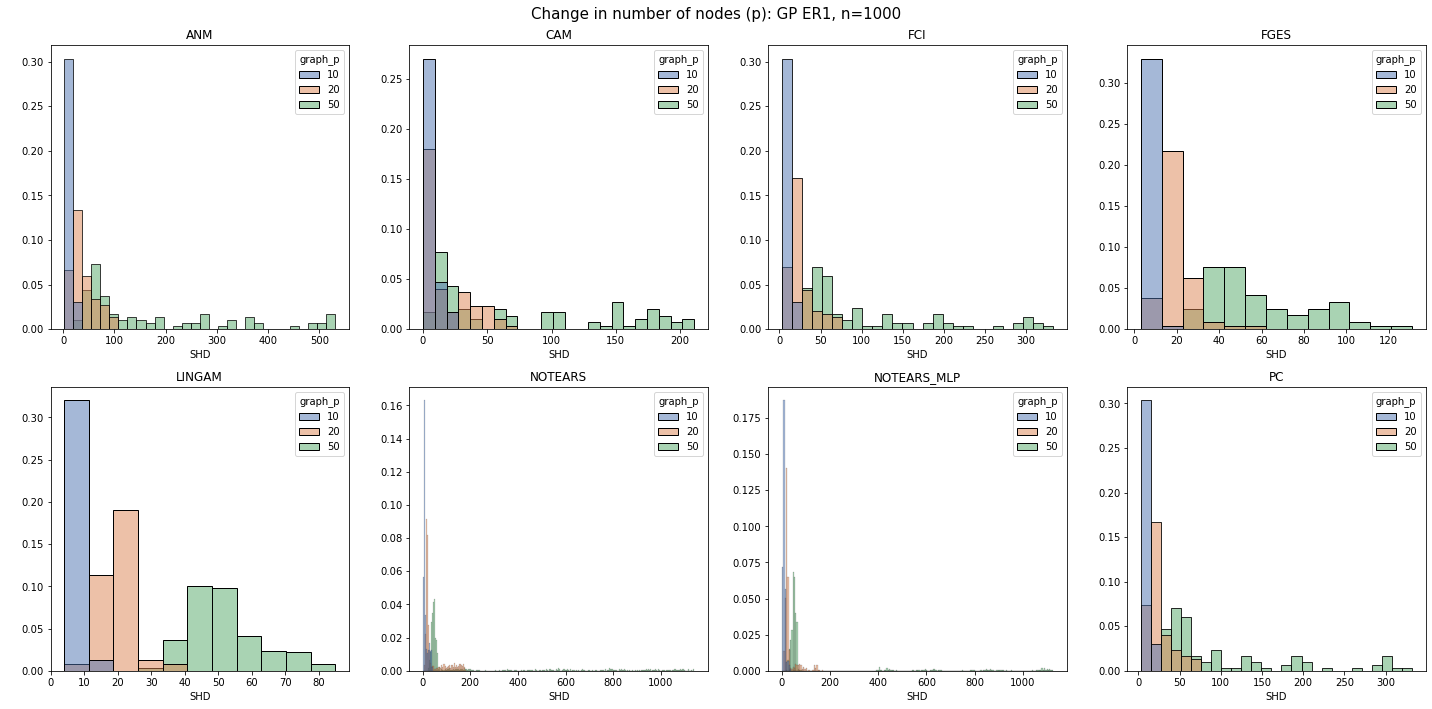

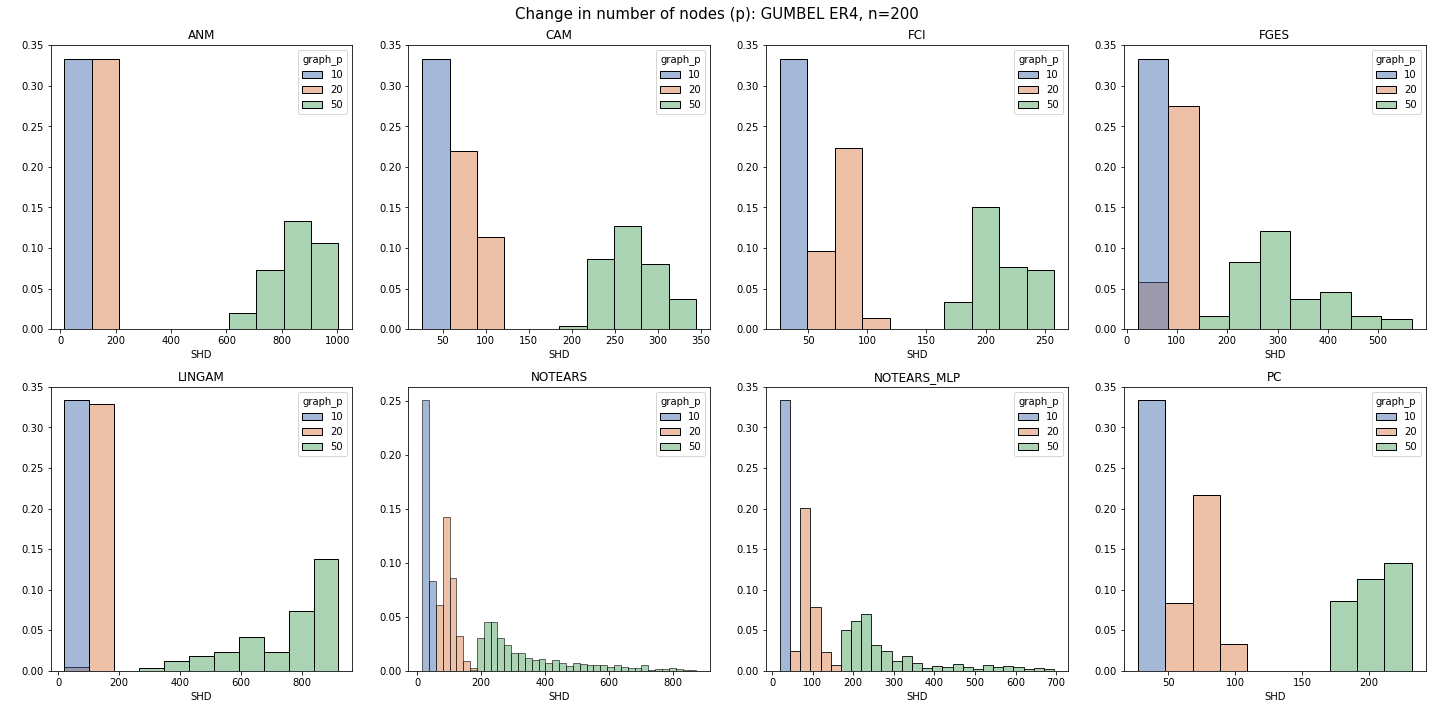

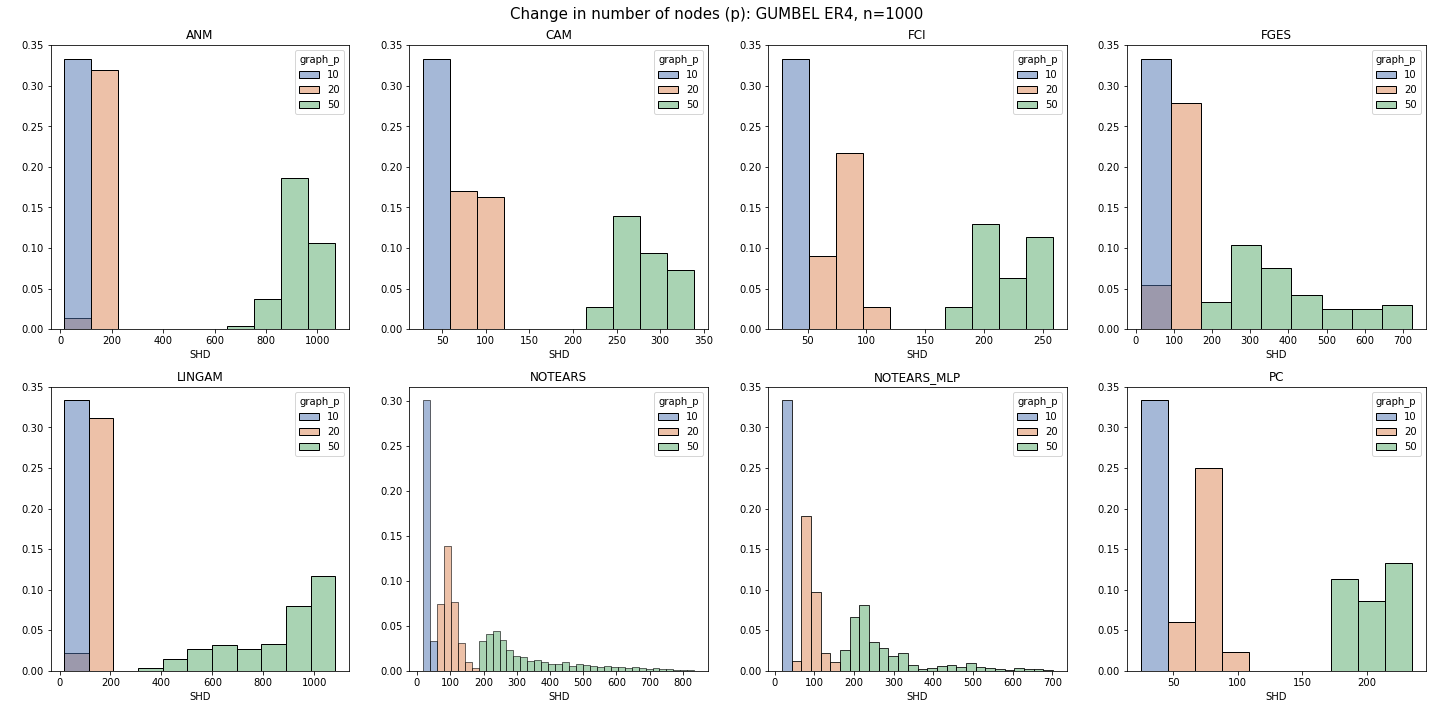

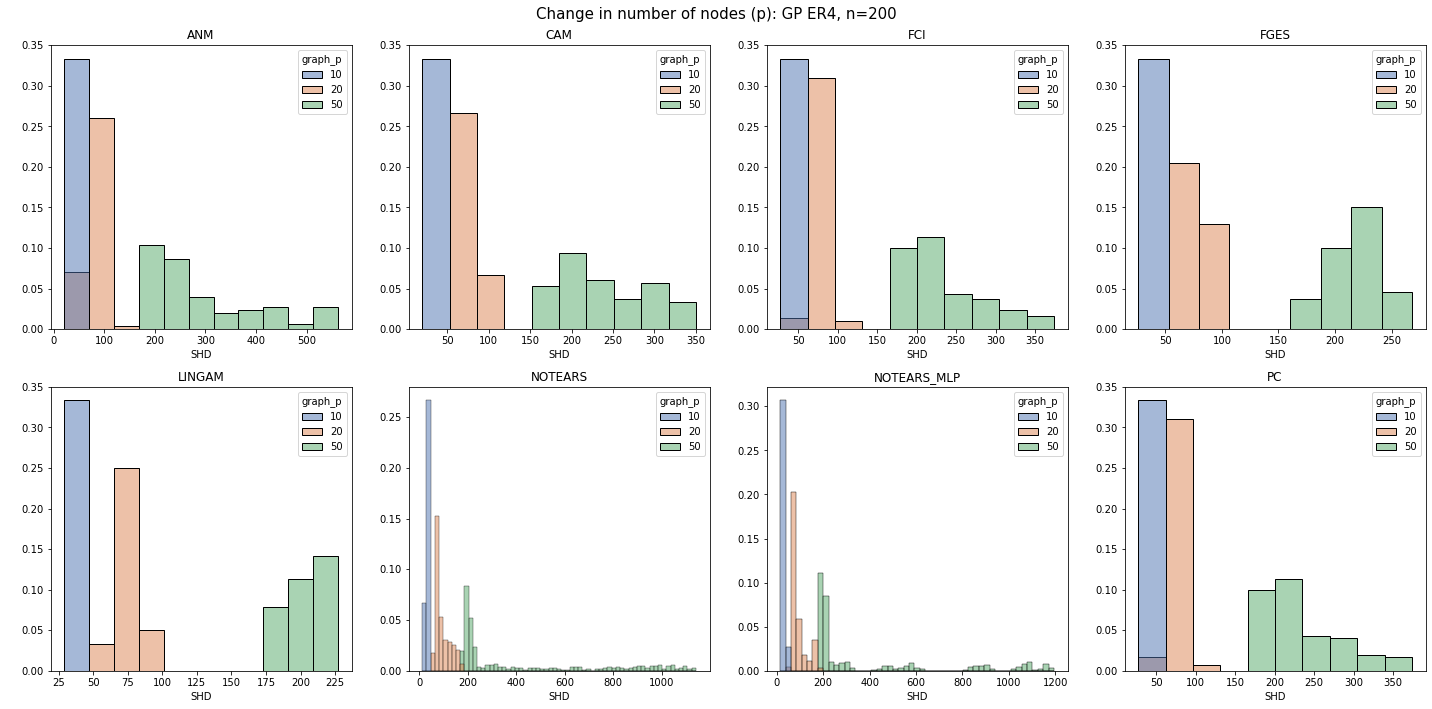

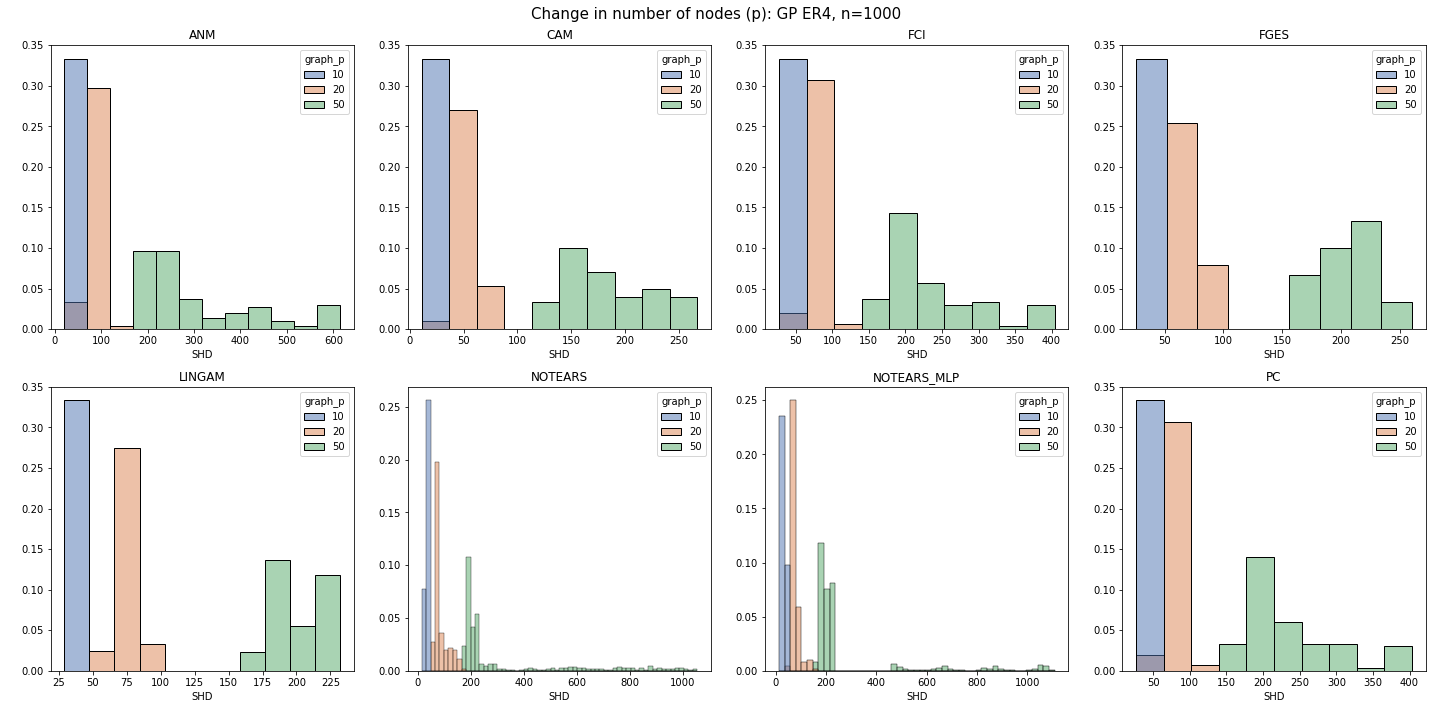

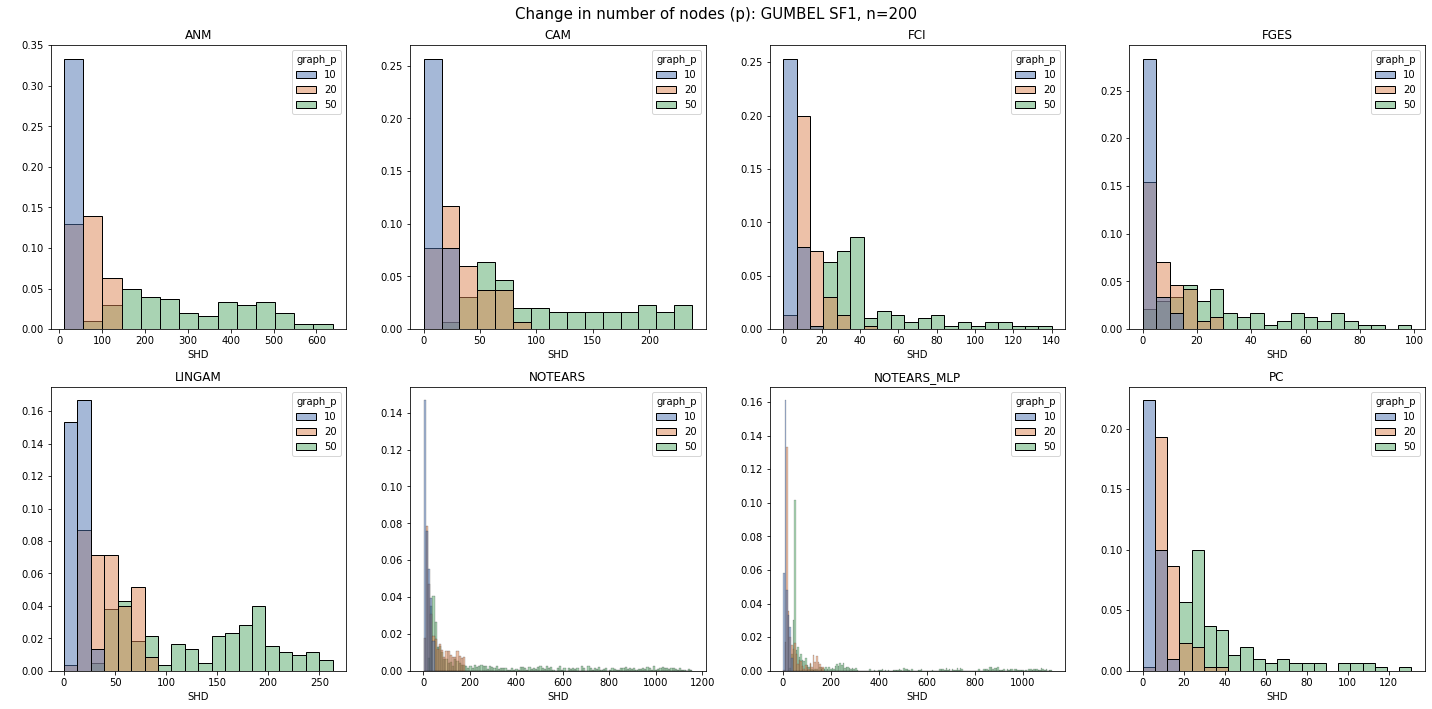

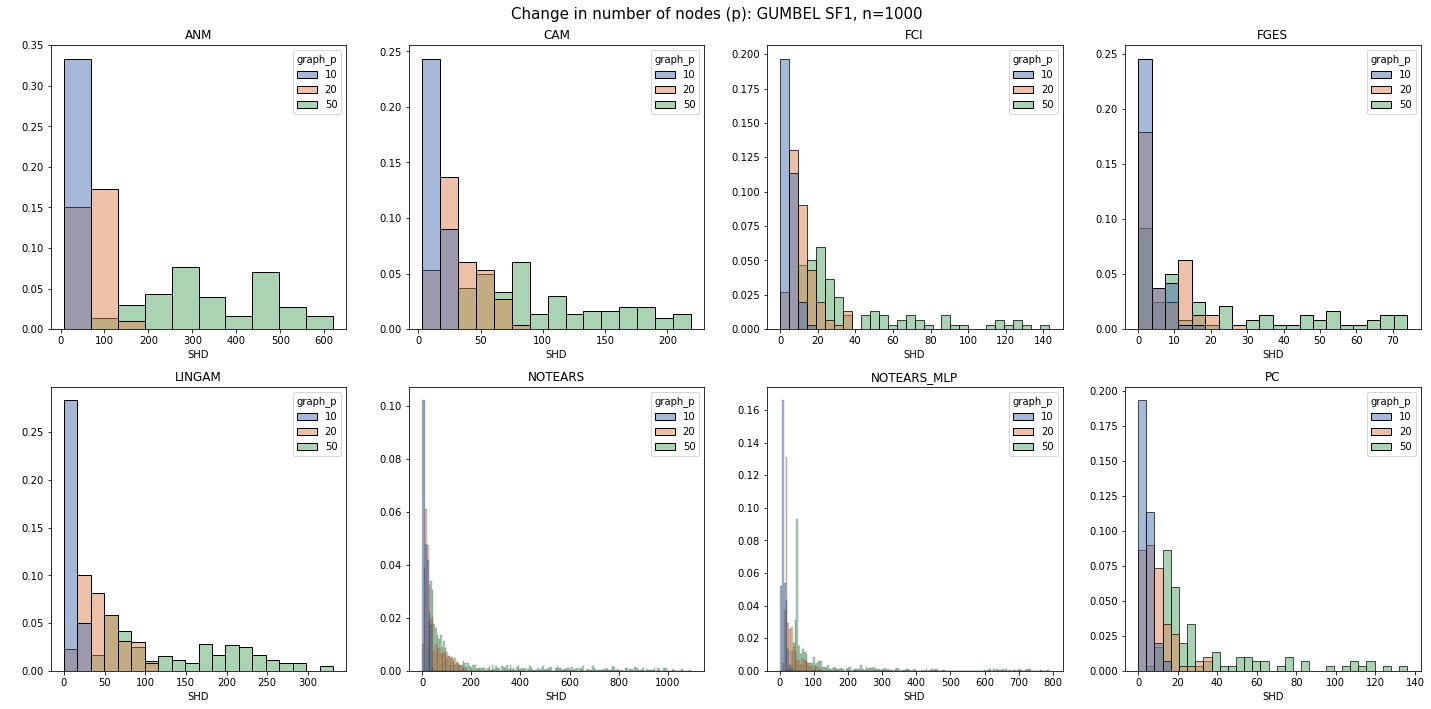

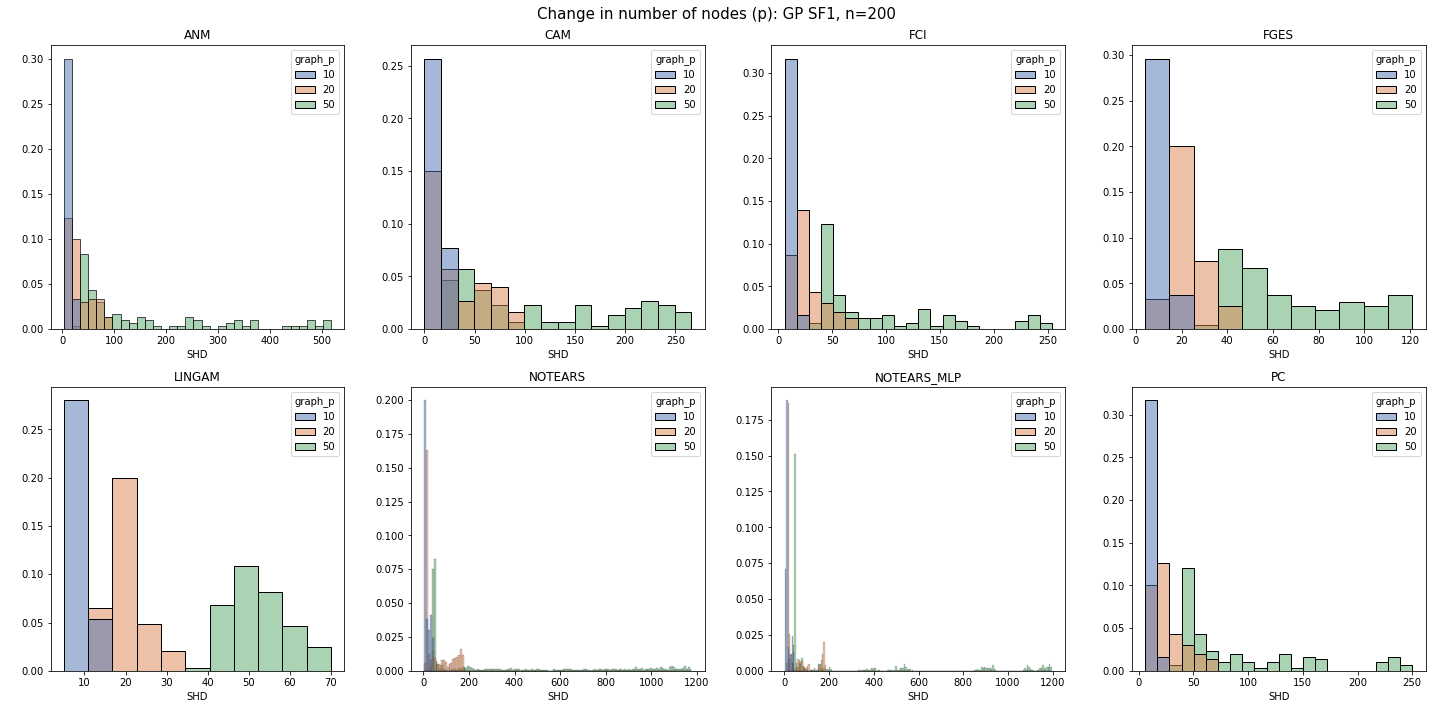

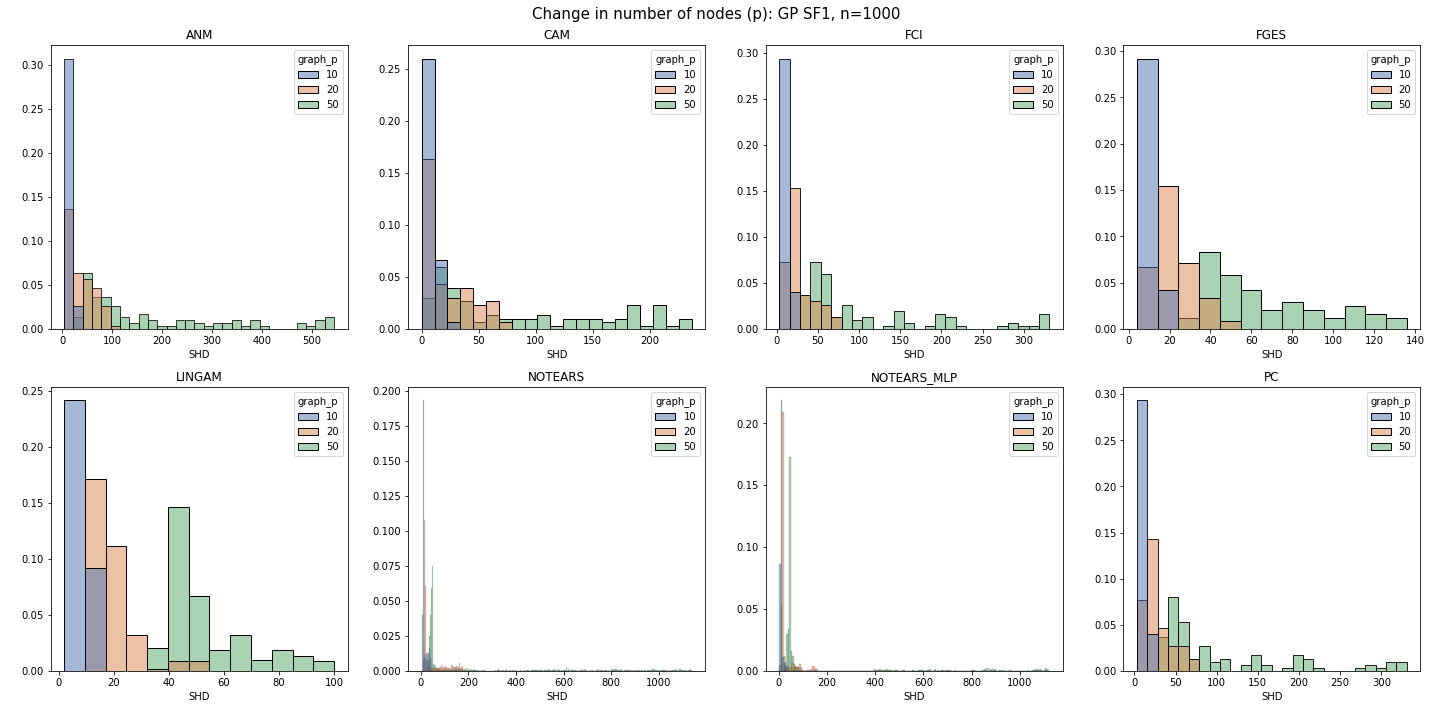

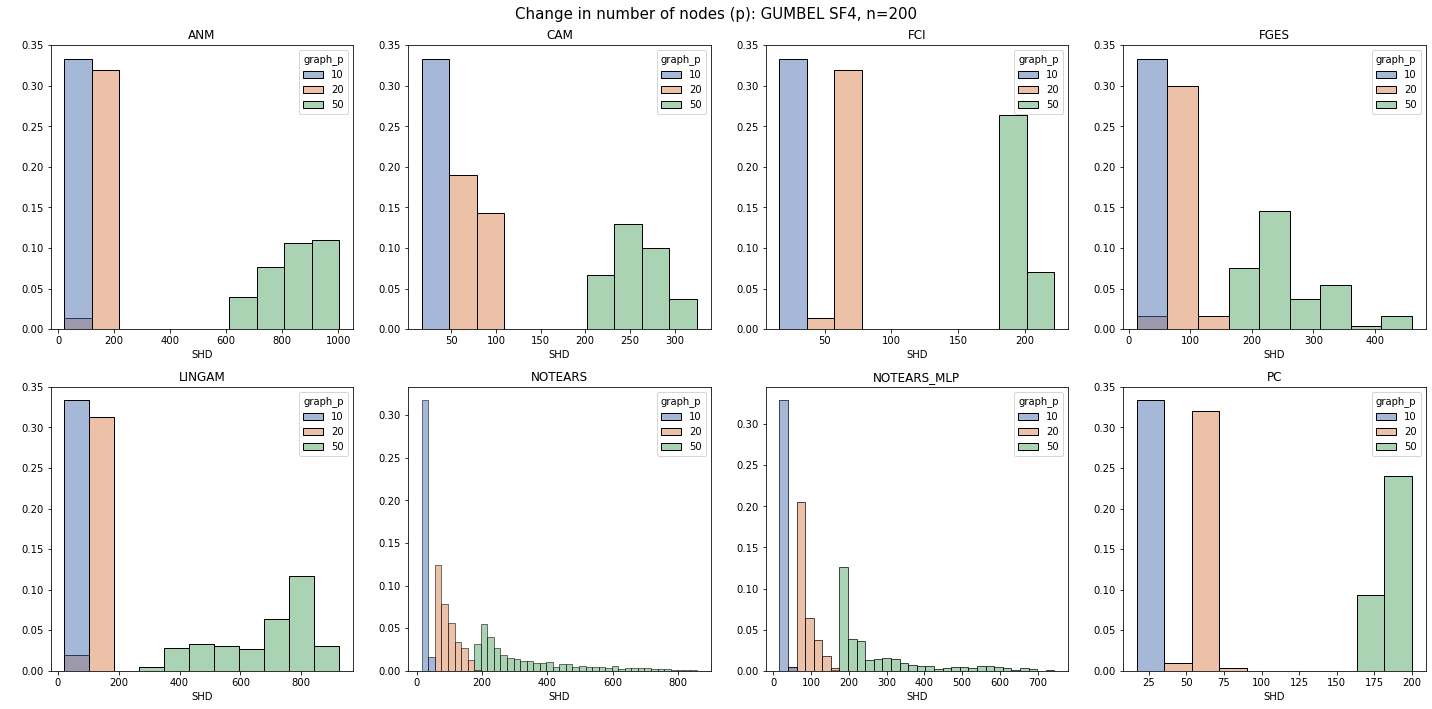

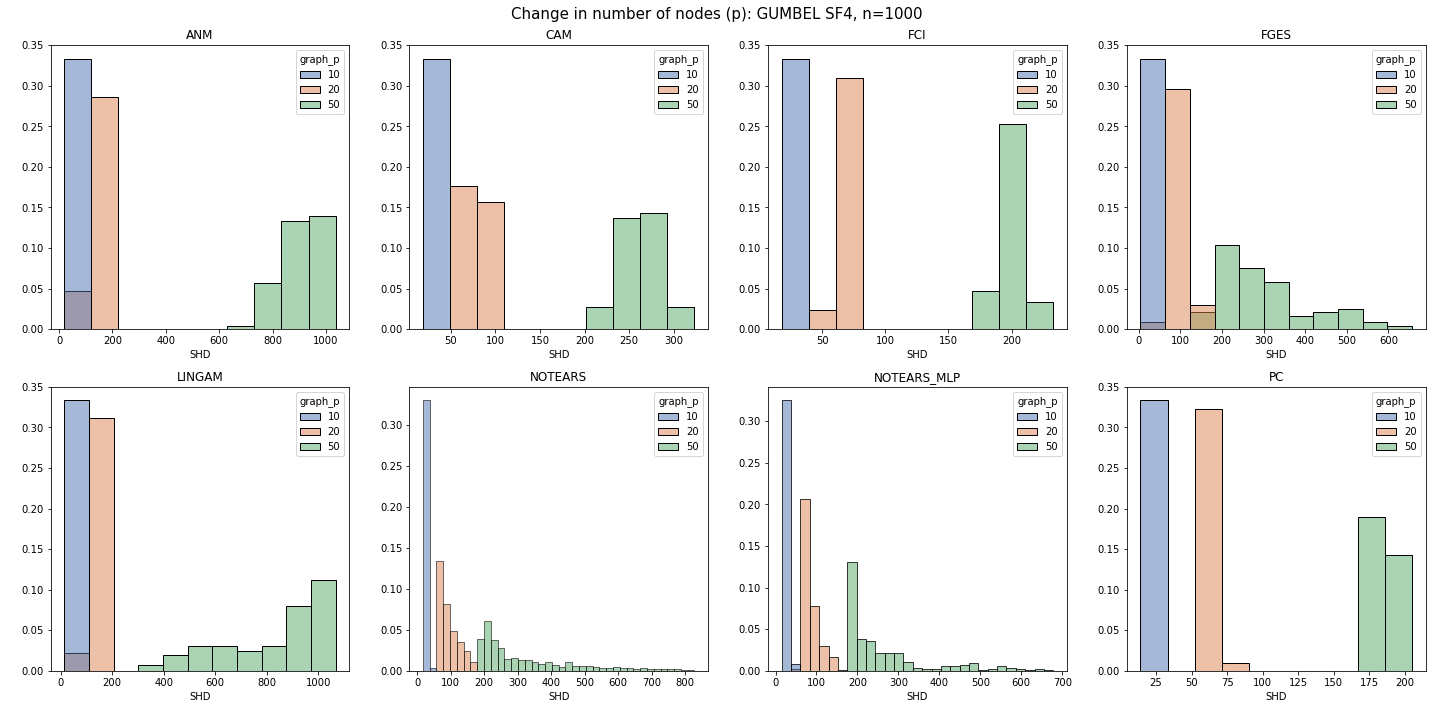

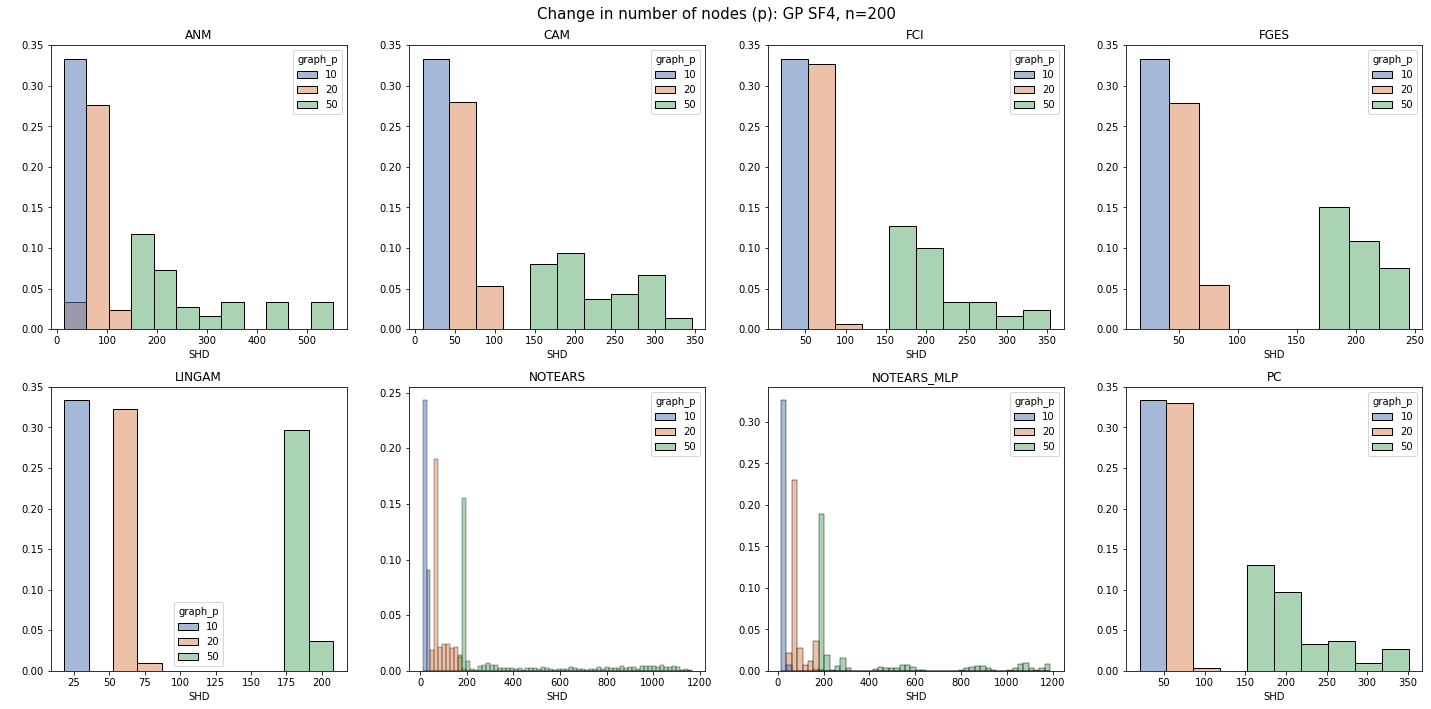

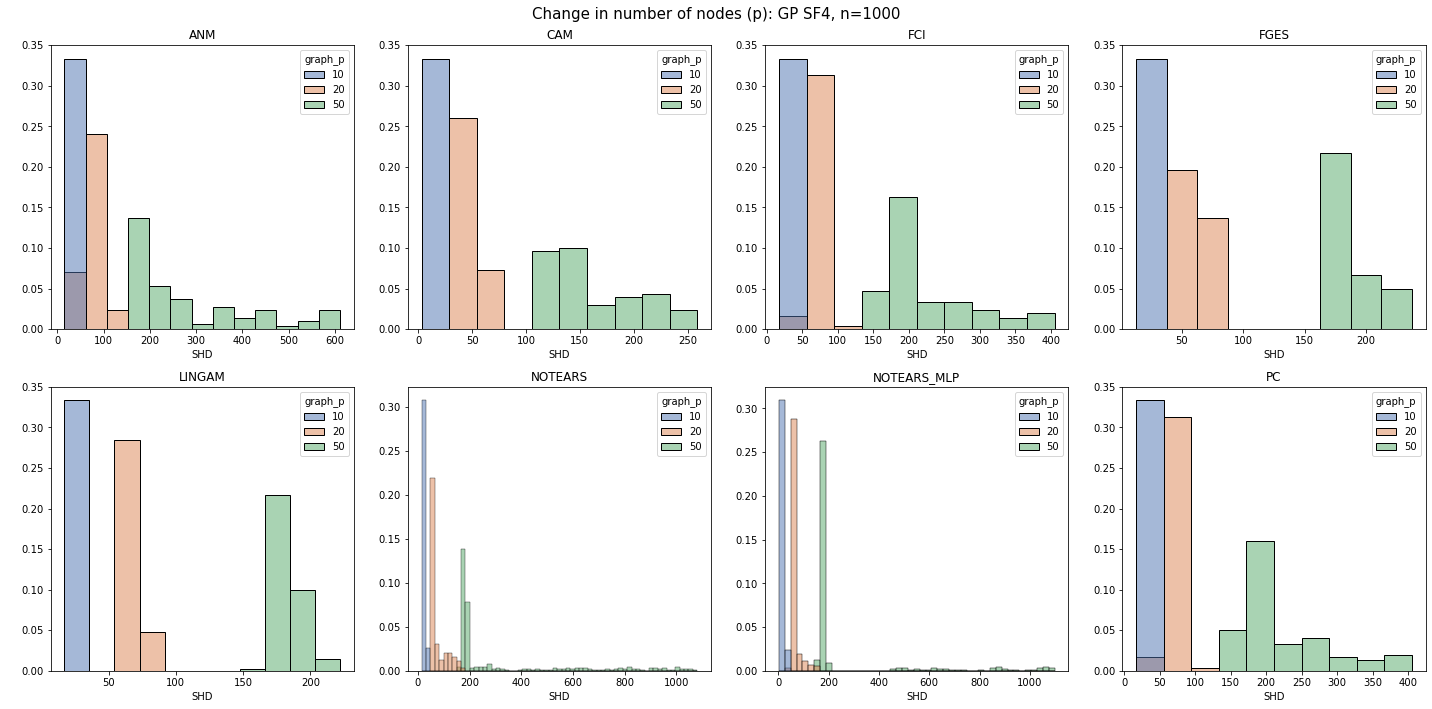

In [11]:
for gt in ['er', 'sf']:
    for d in [1, 4]:
        for sem in ['gumbel', 'gp']:
            for n in [200, 1000]:
                plot_p(gt, d, sem, n)

### d

/tmp/ipykernel_733290/3090102906.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(2, 4, figsize=(20, 10))


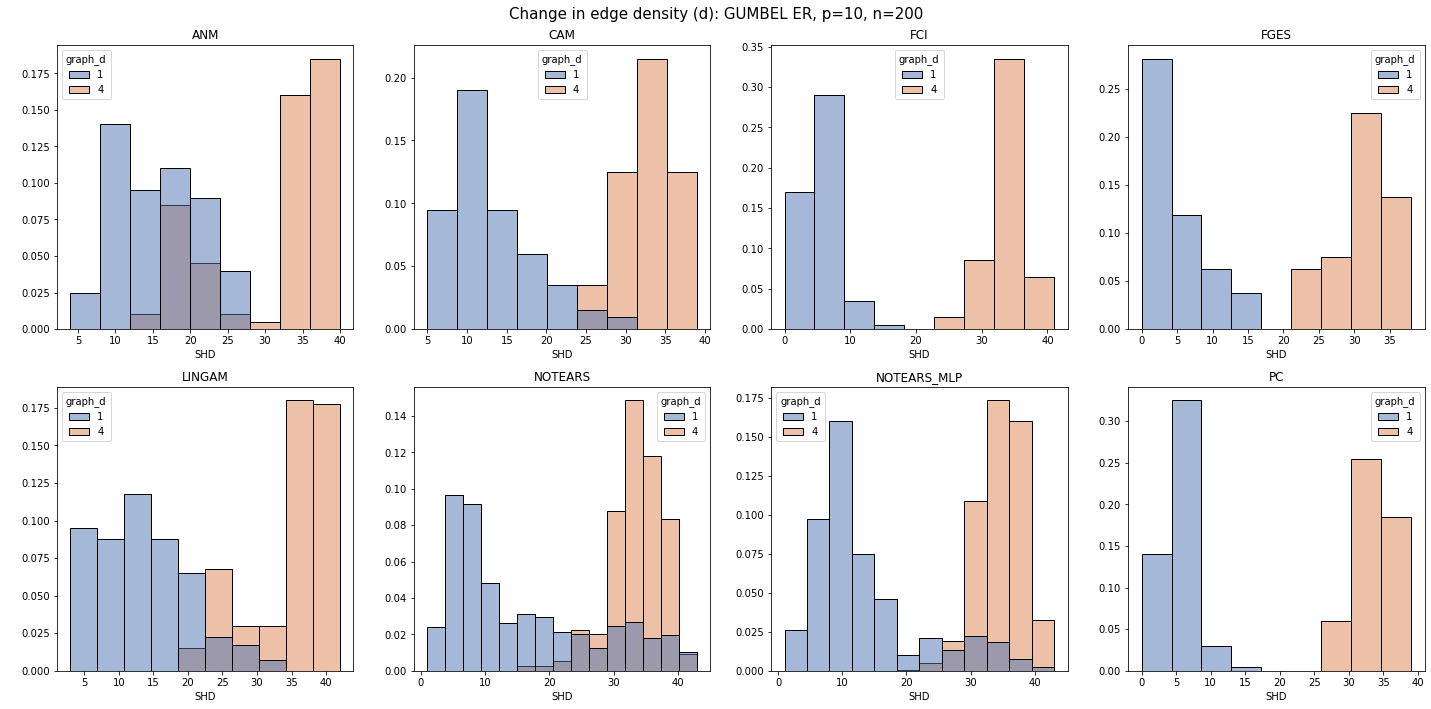

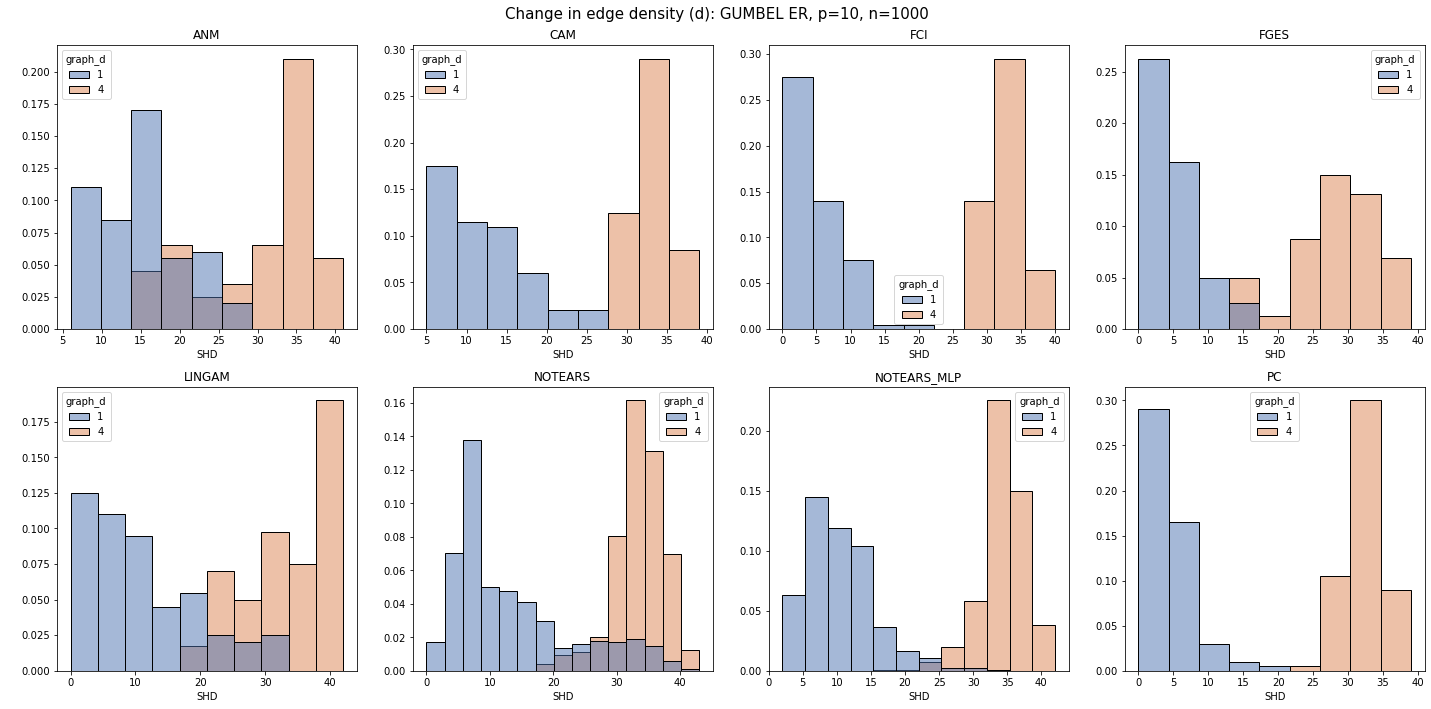

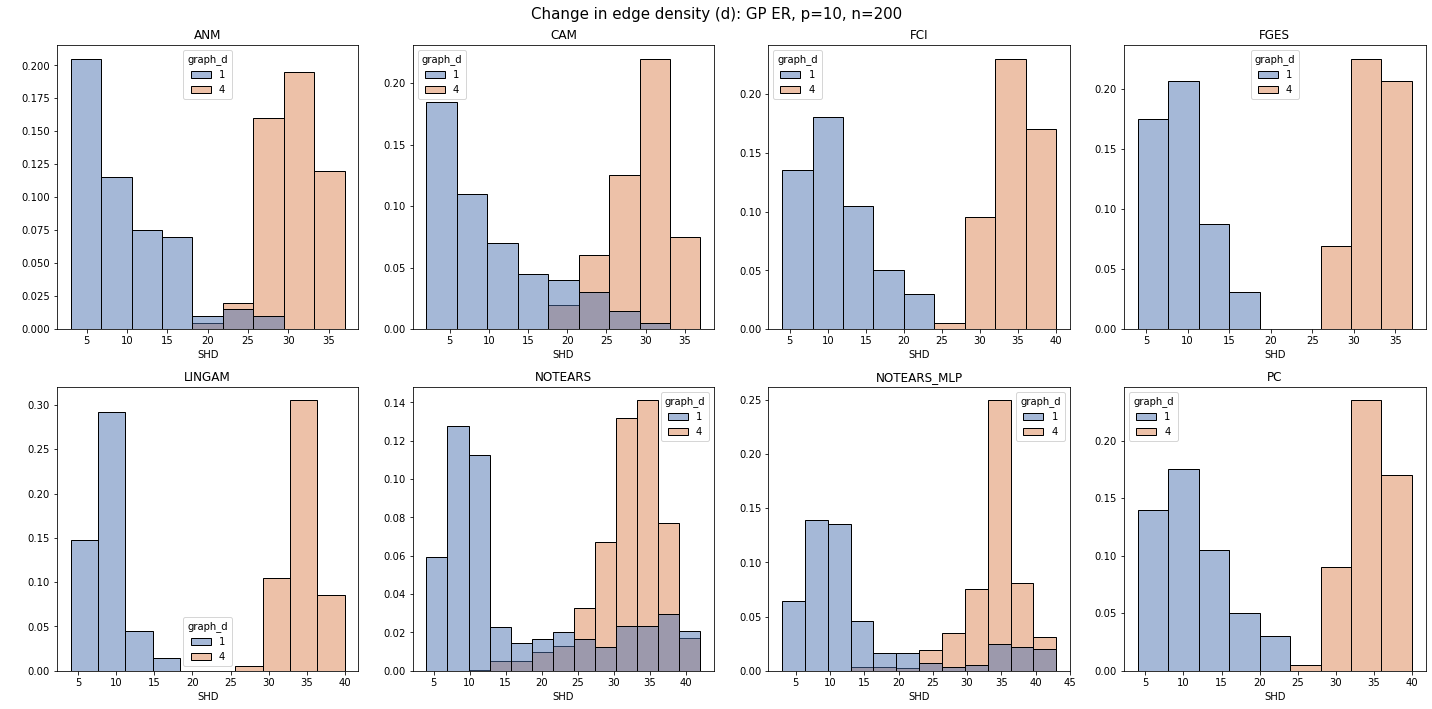

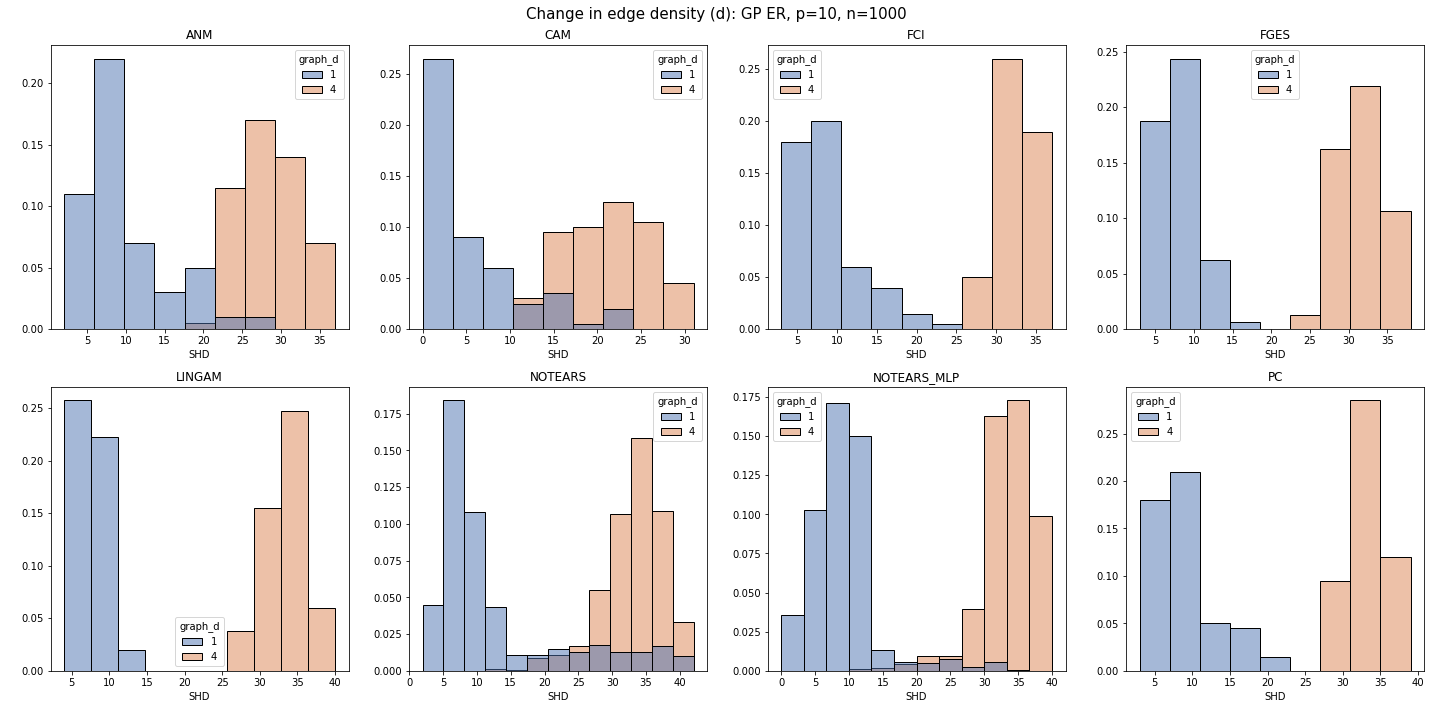

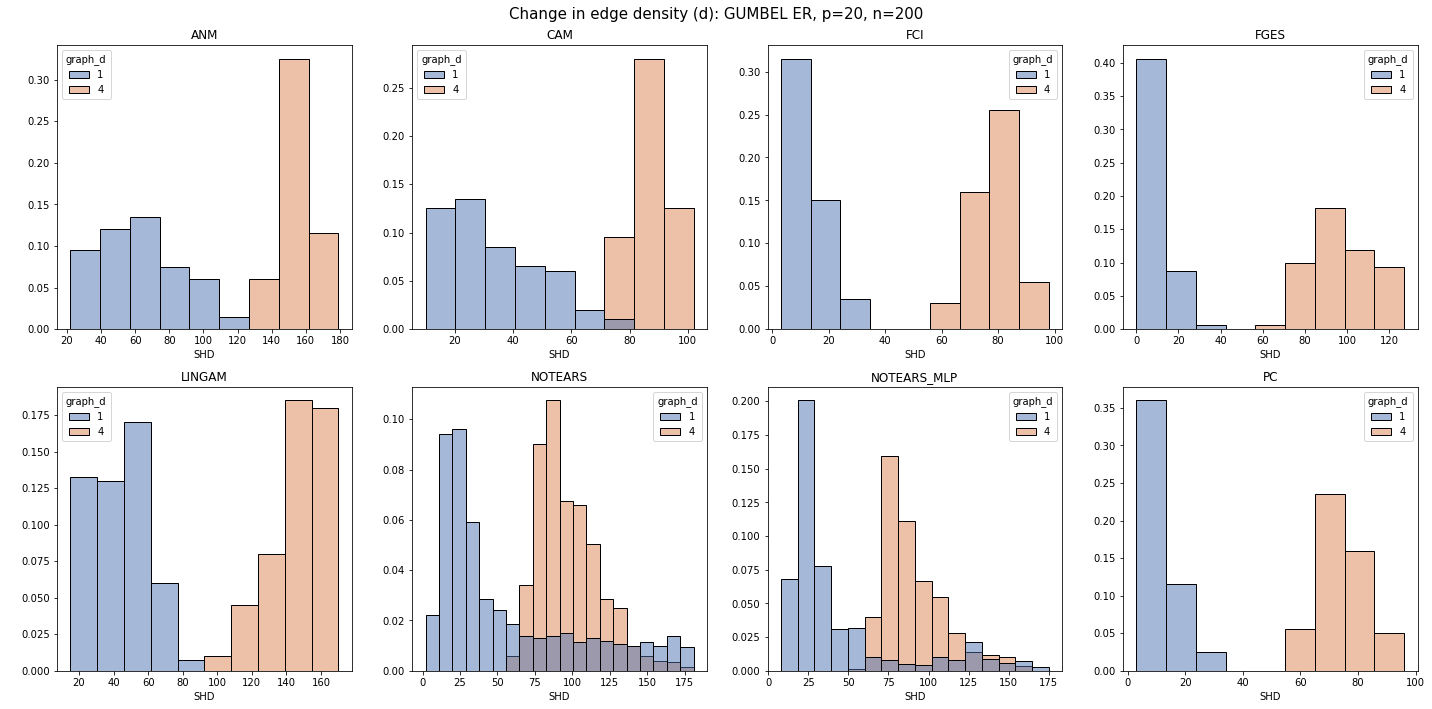

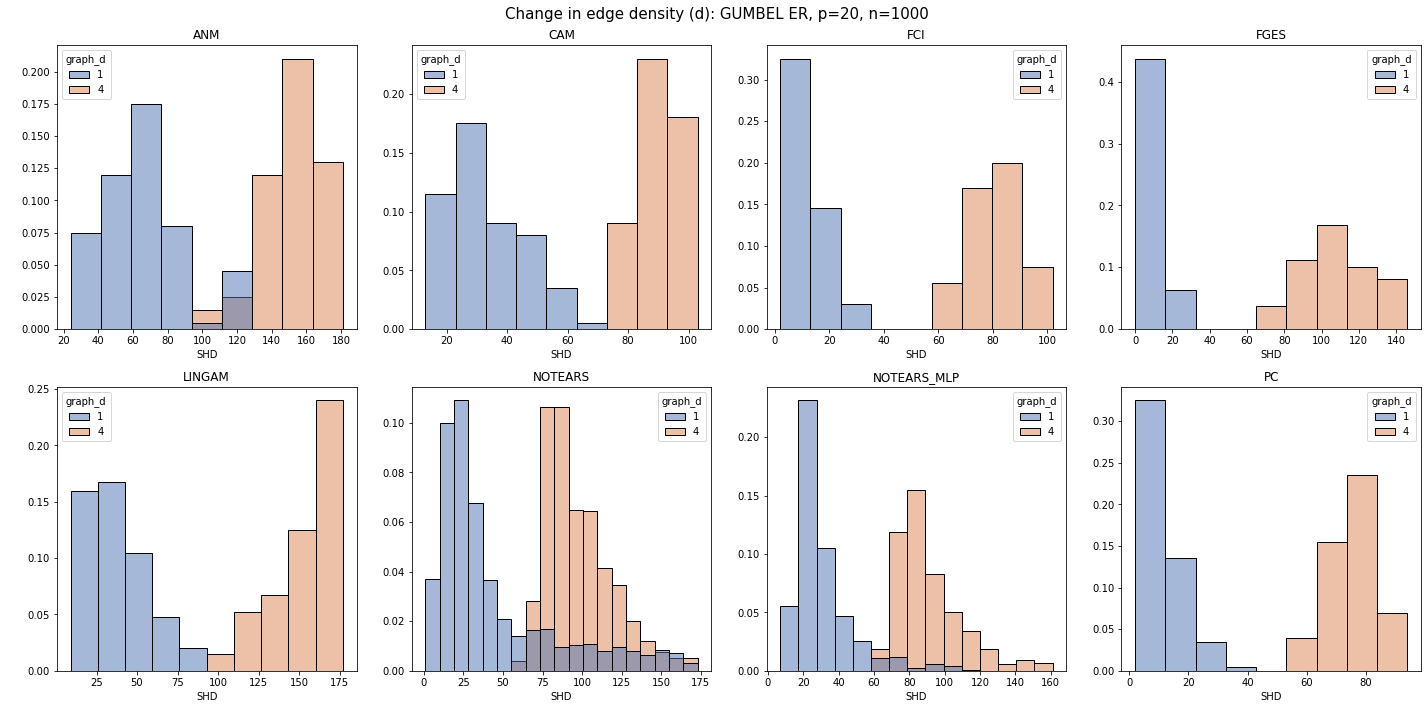

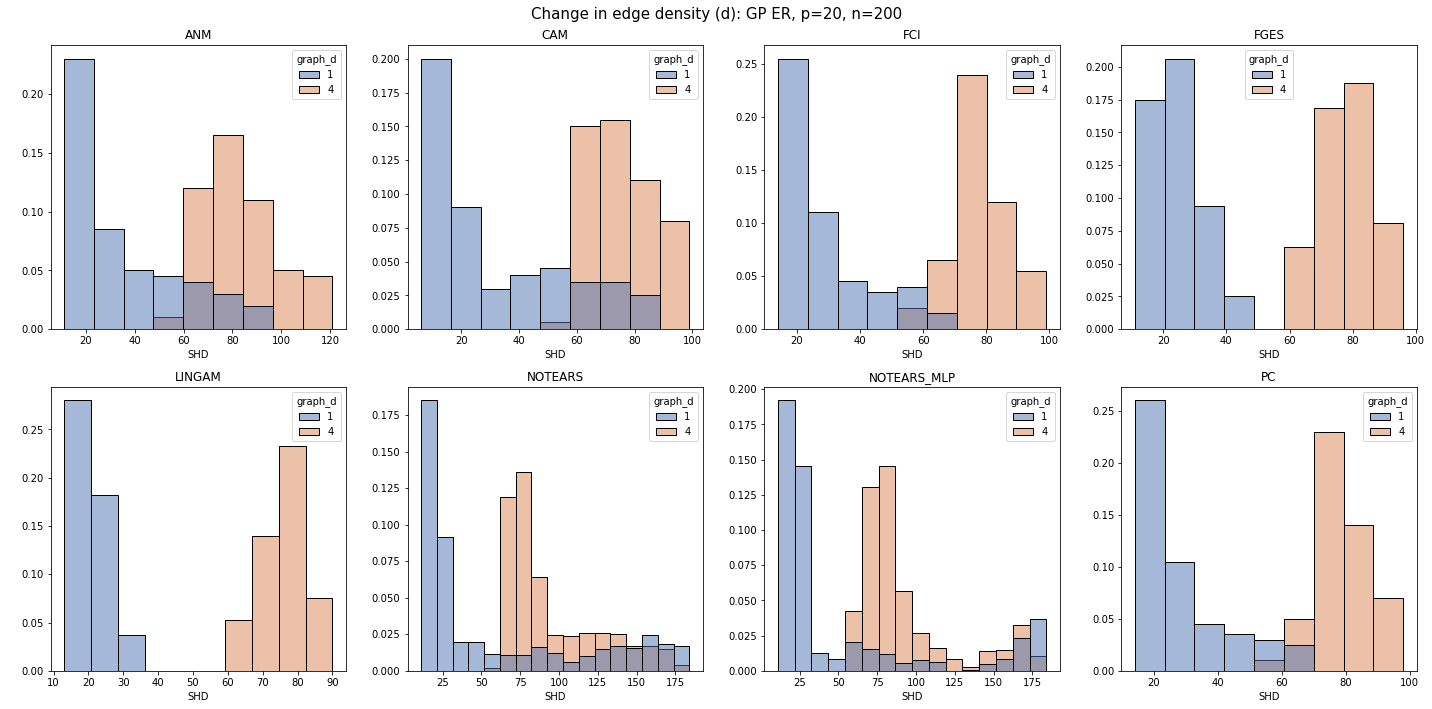

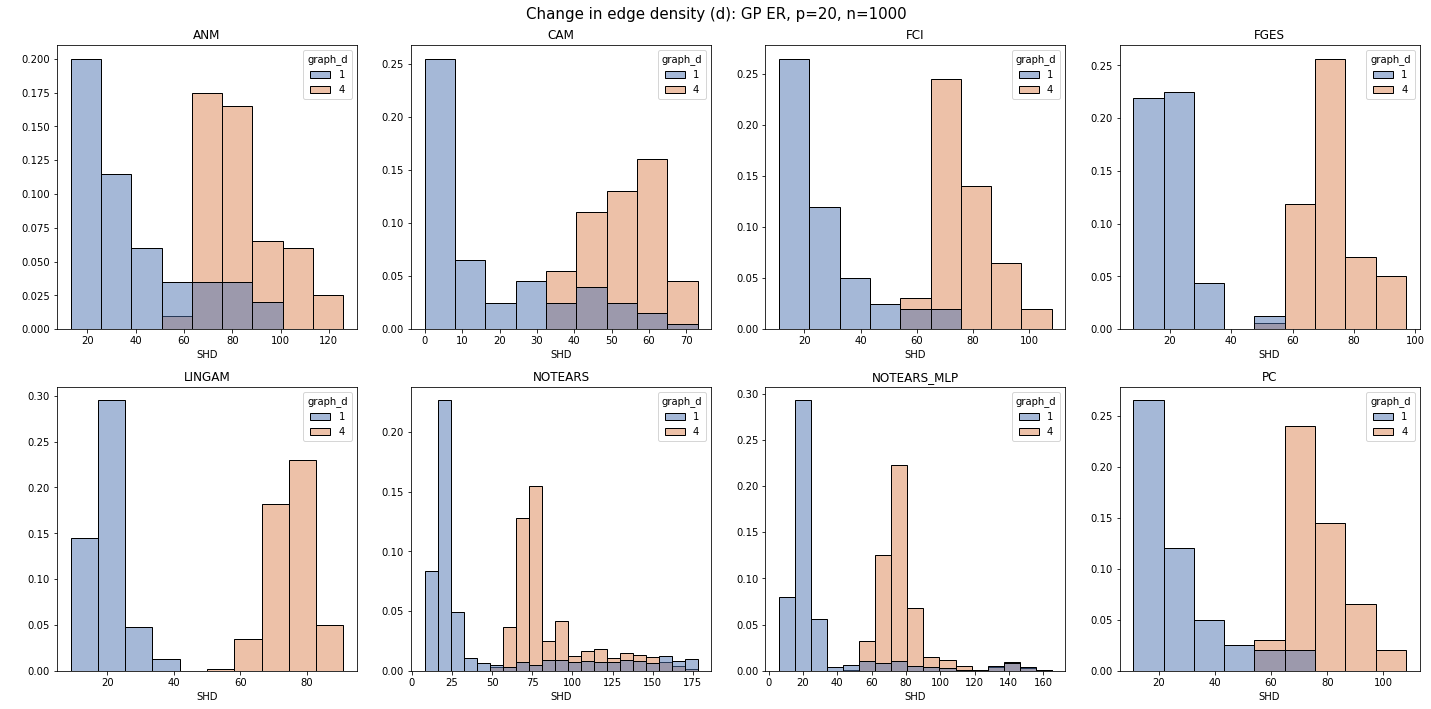

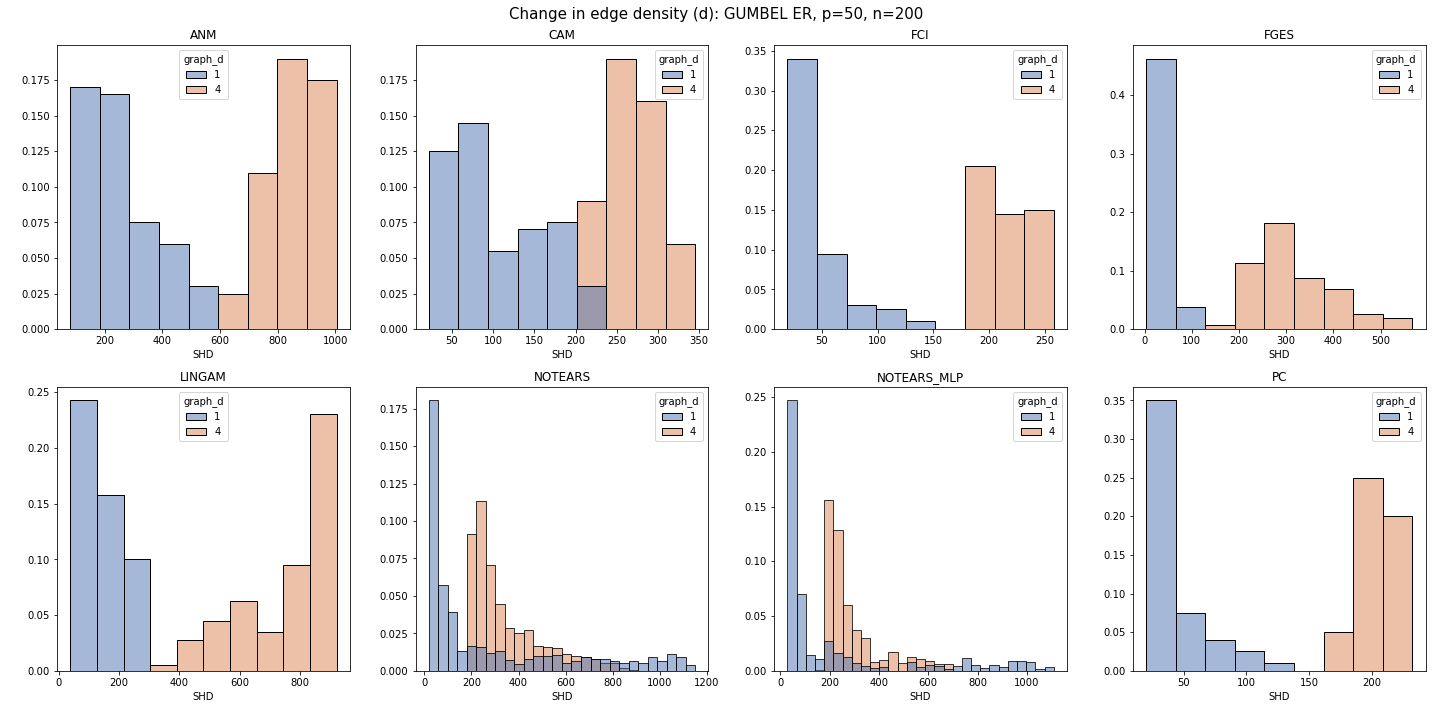

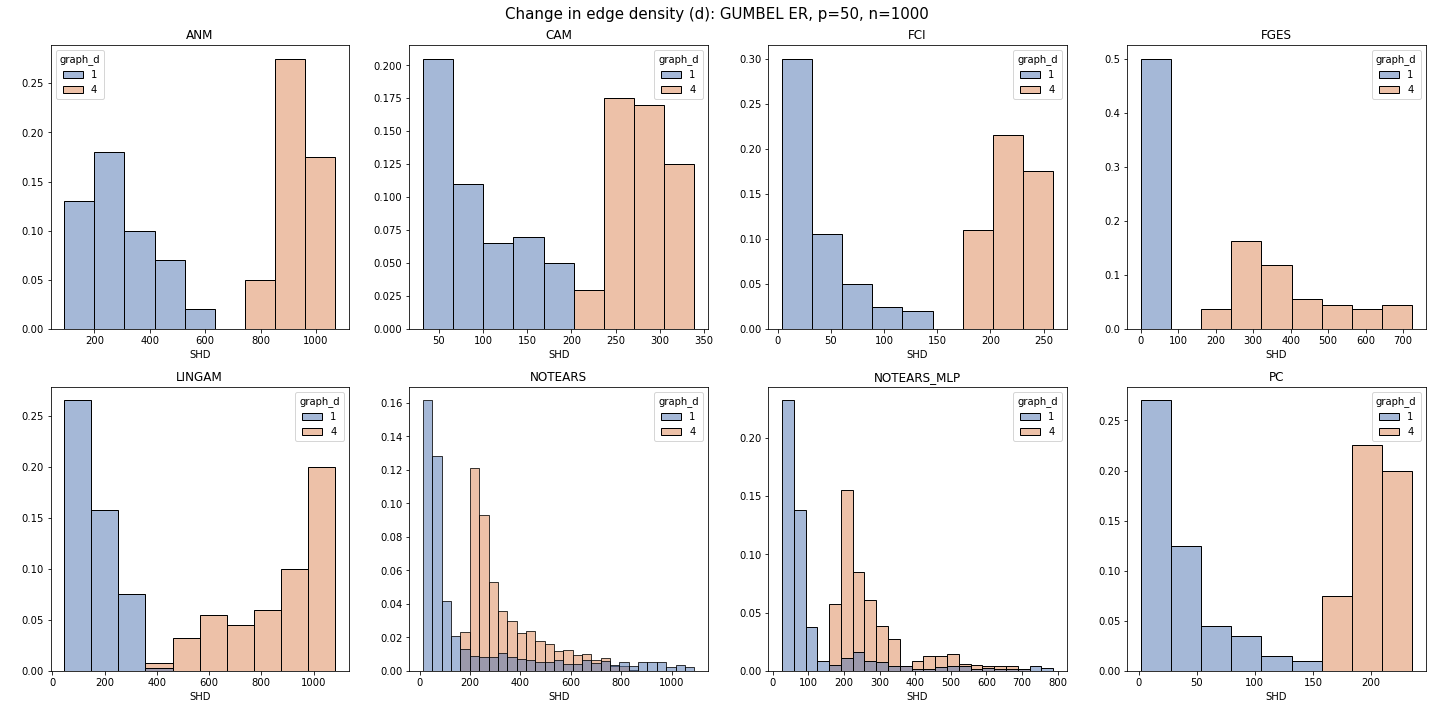

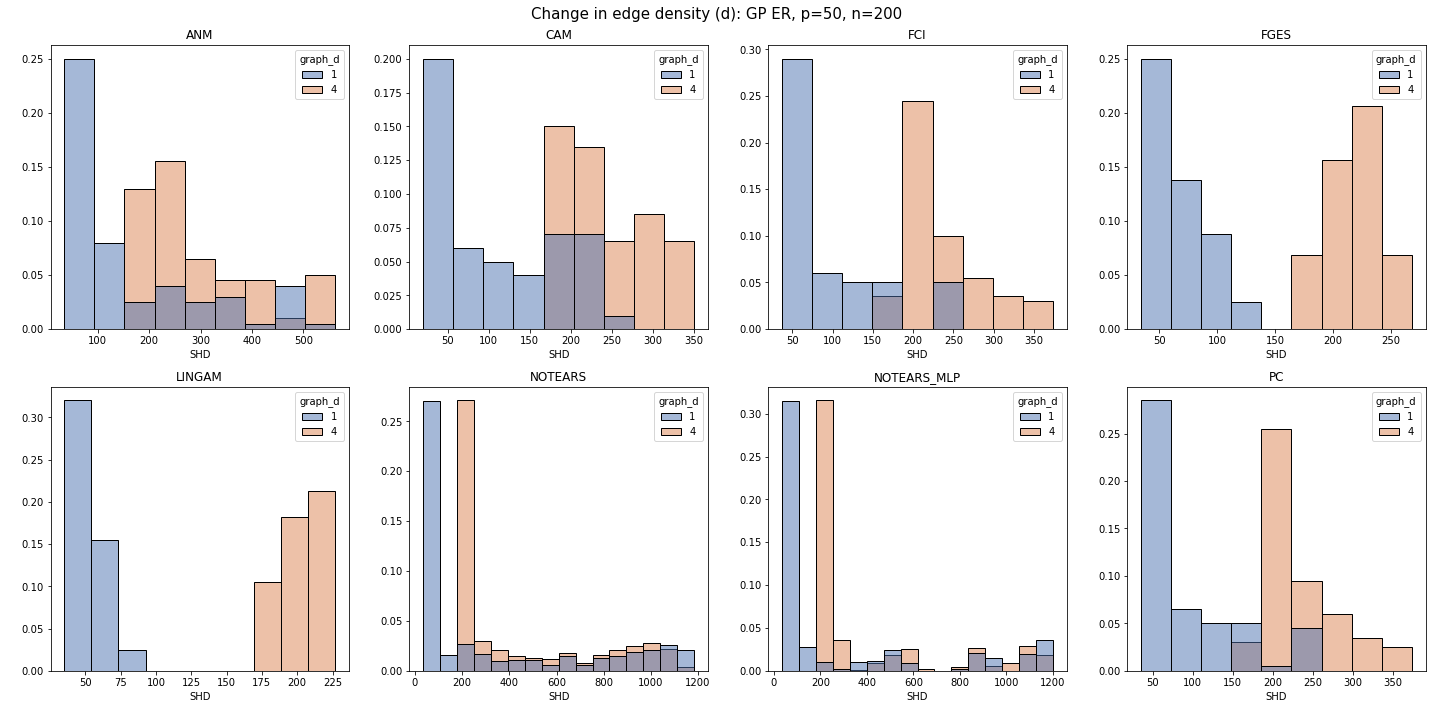

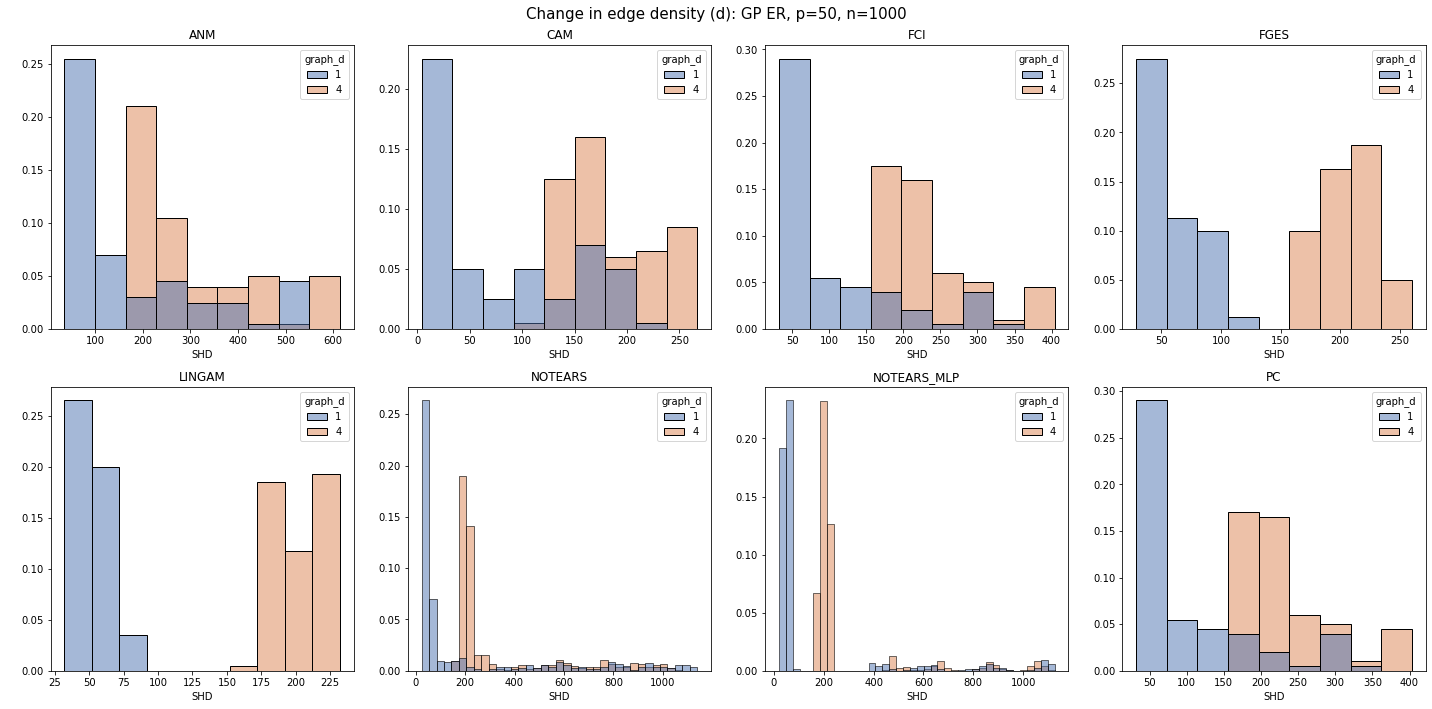

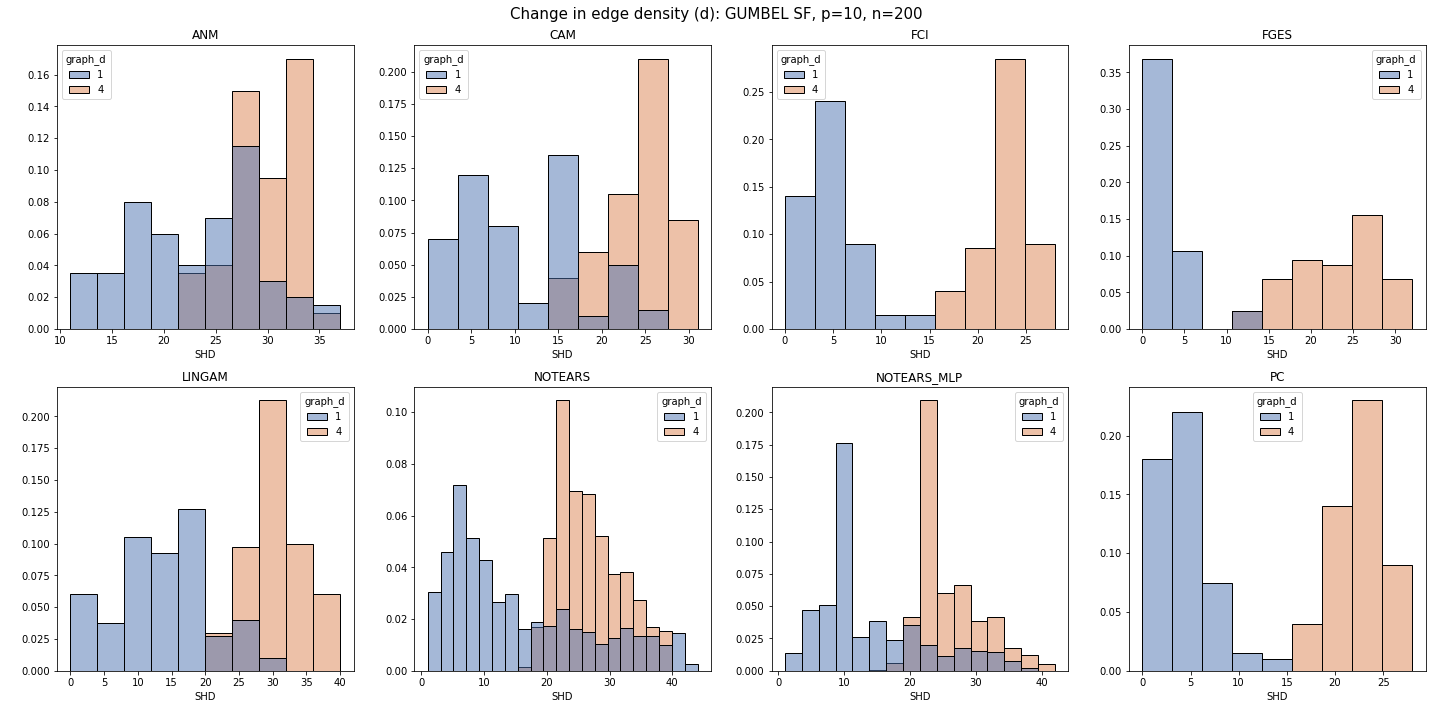

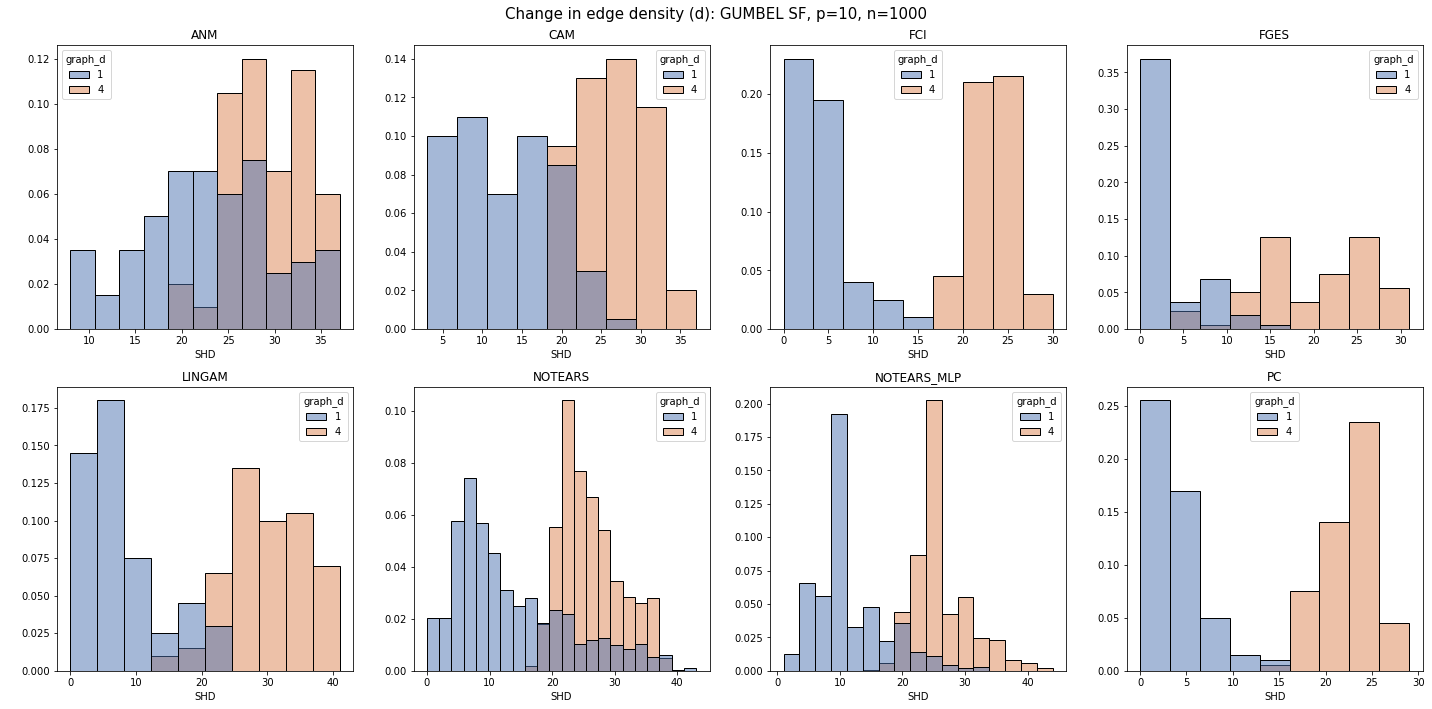

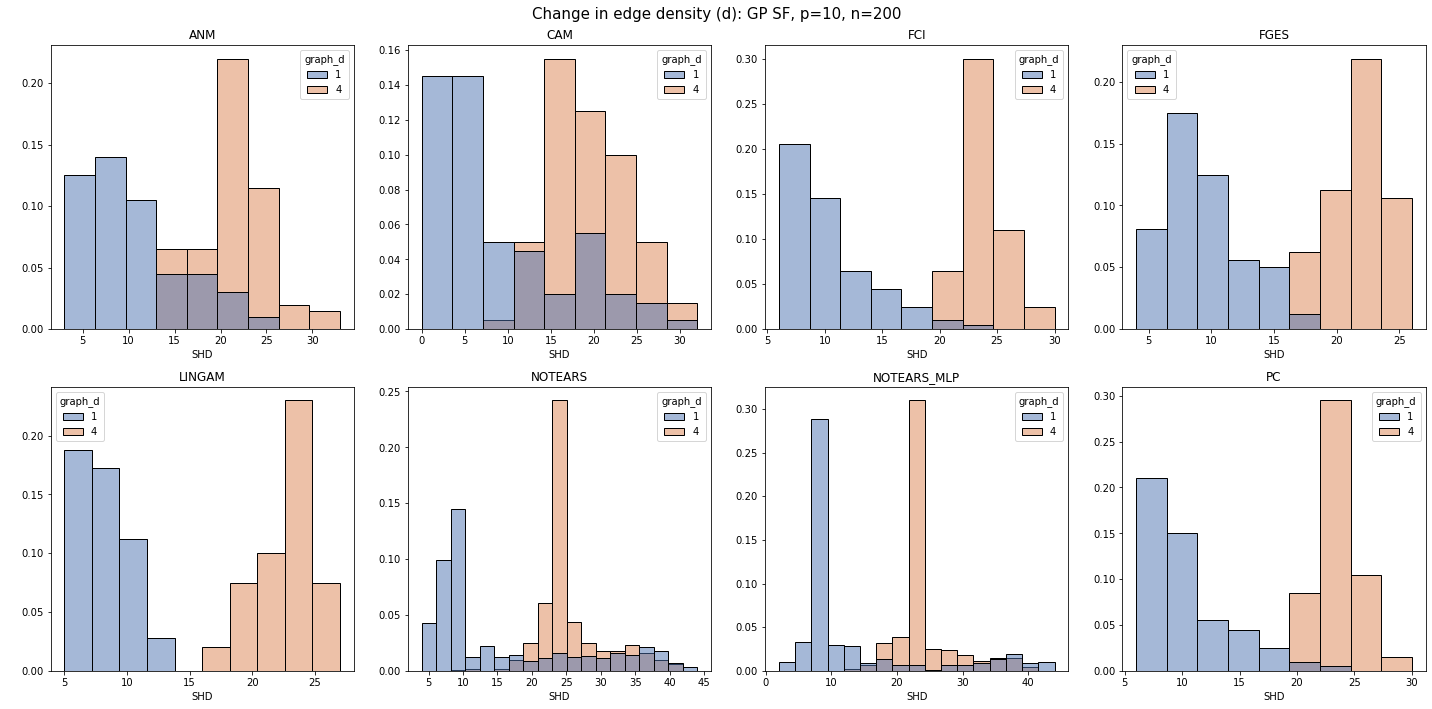

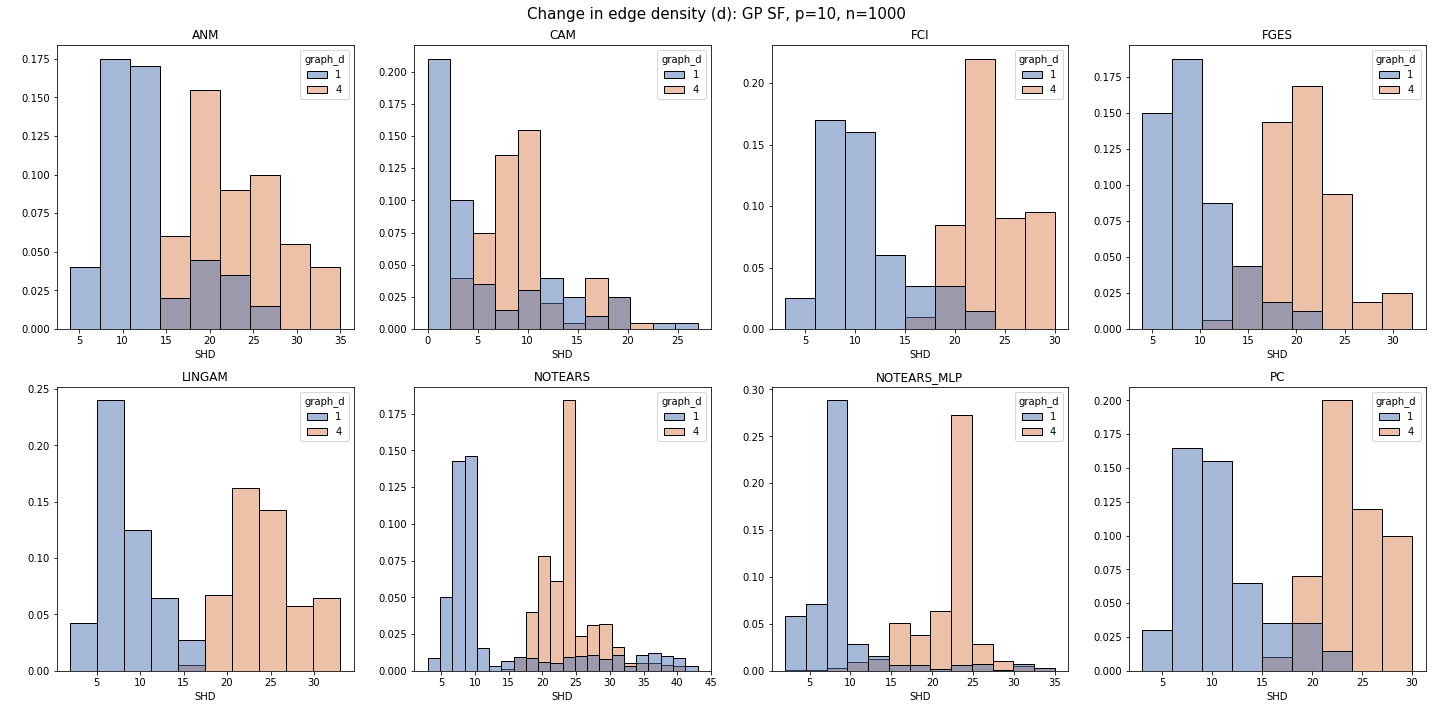

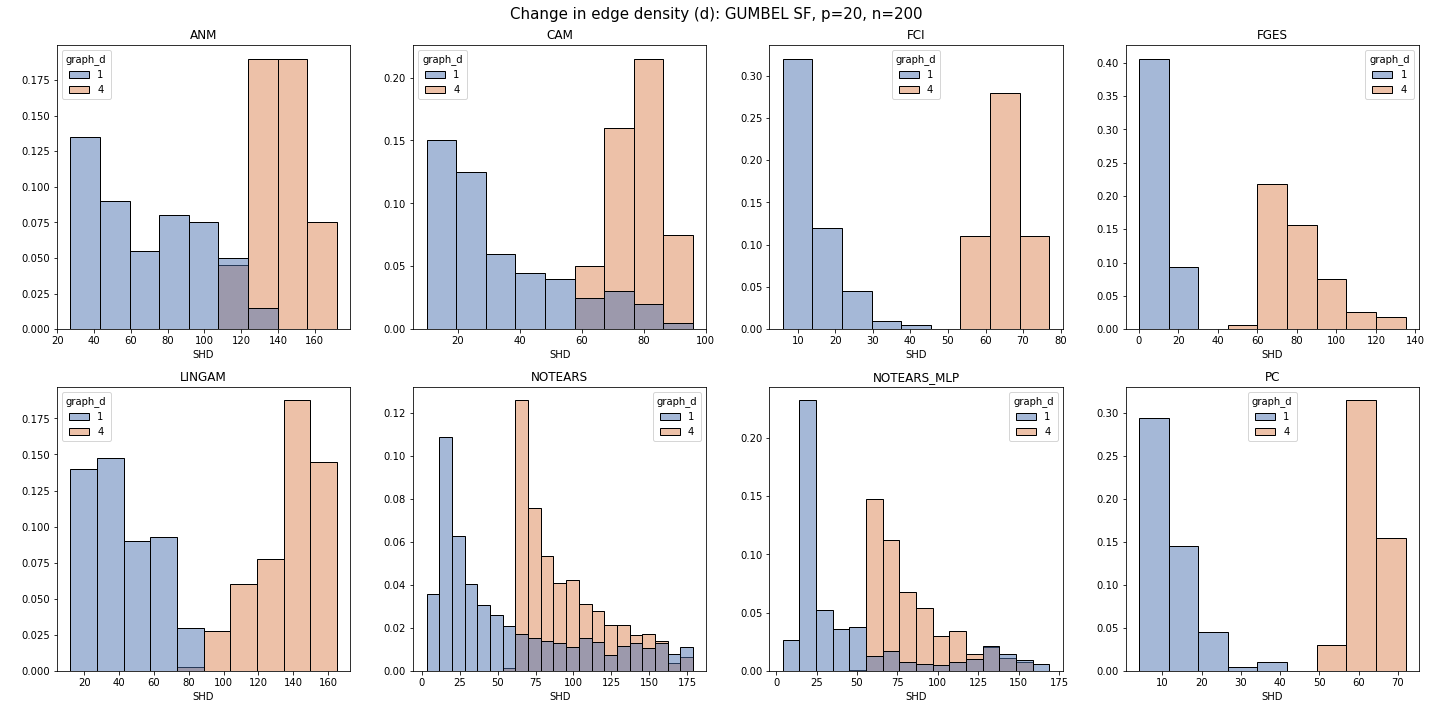

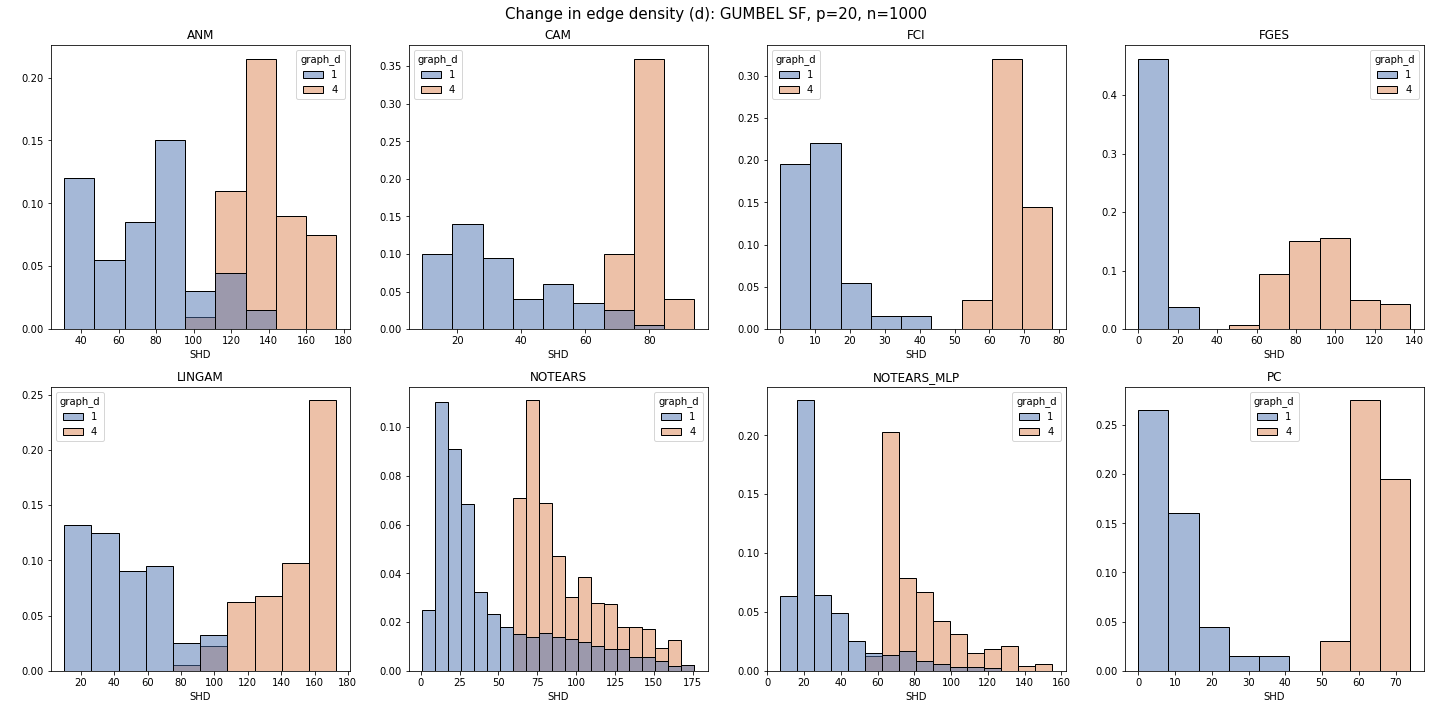

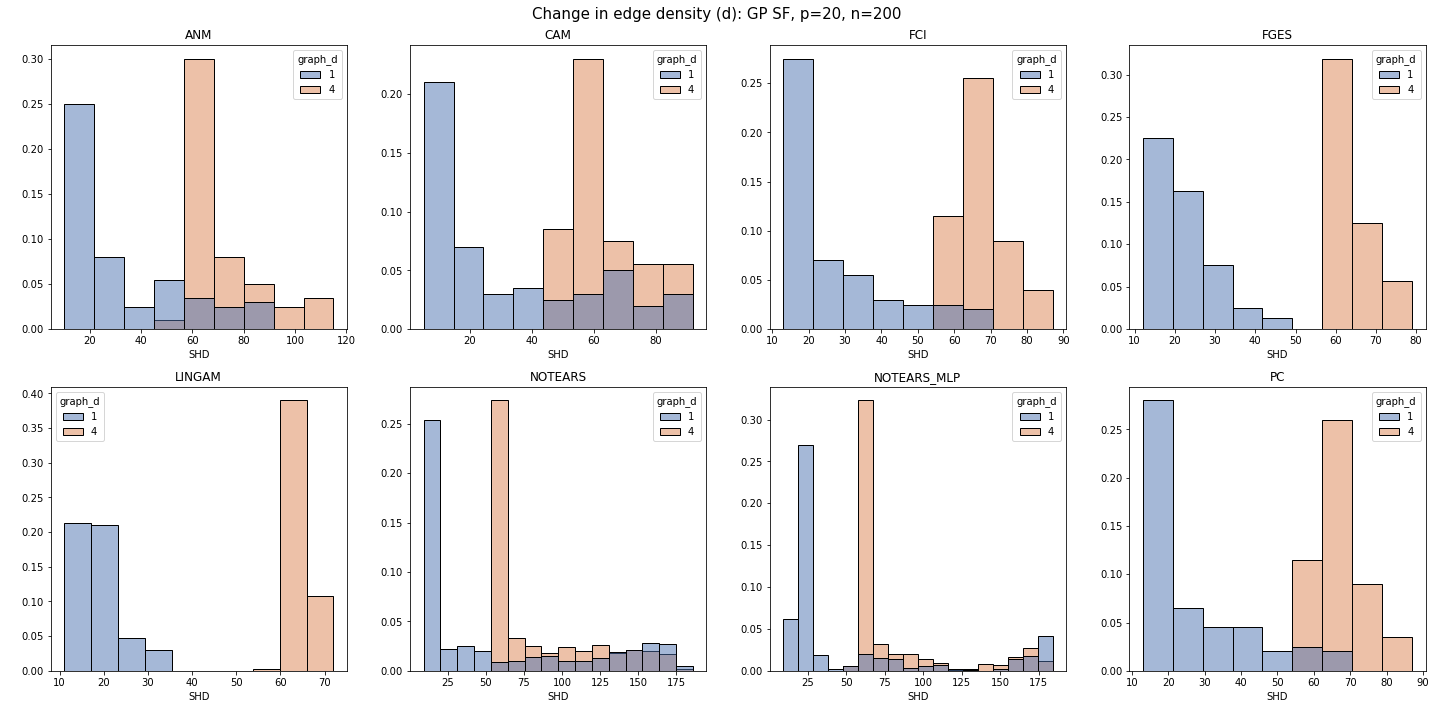

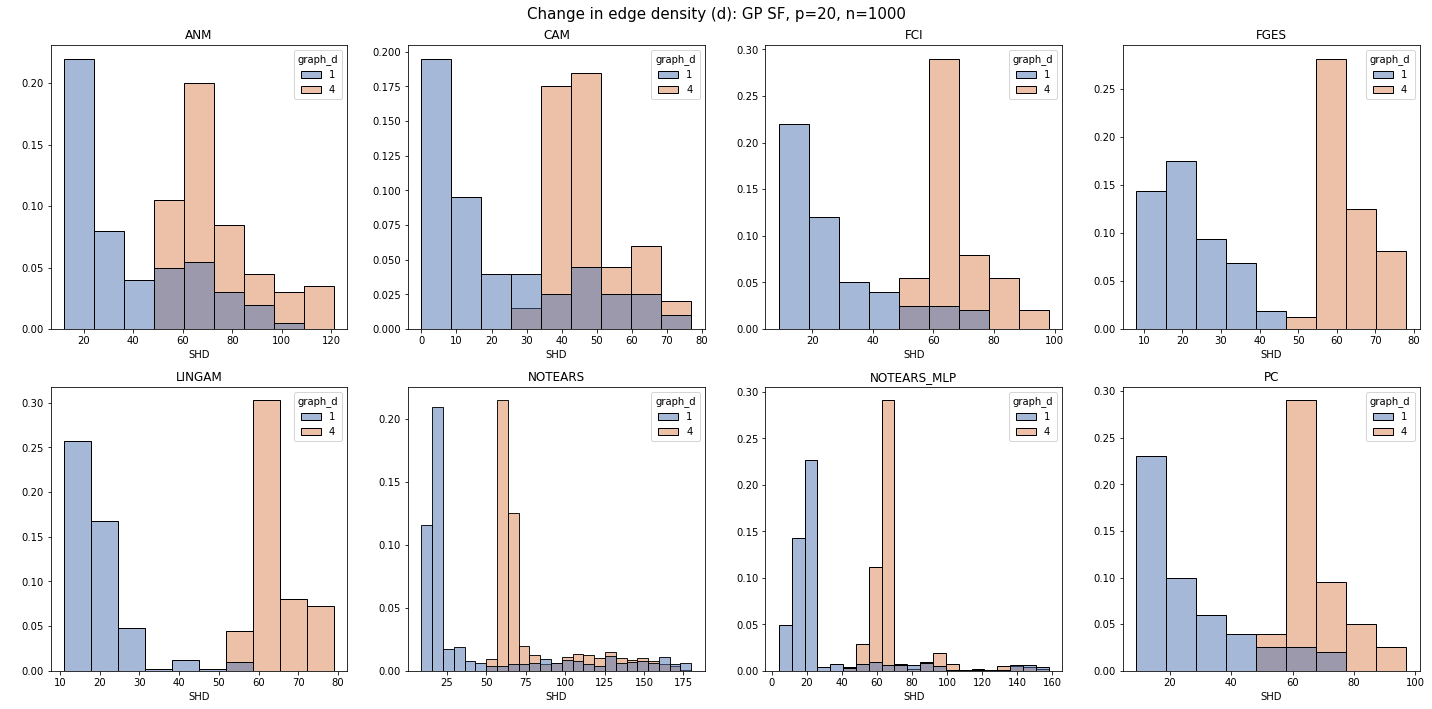

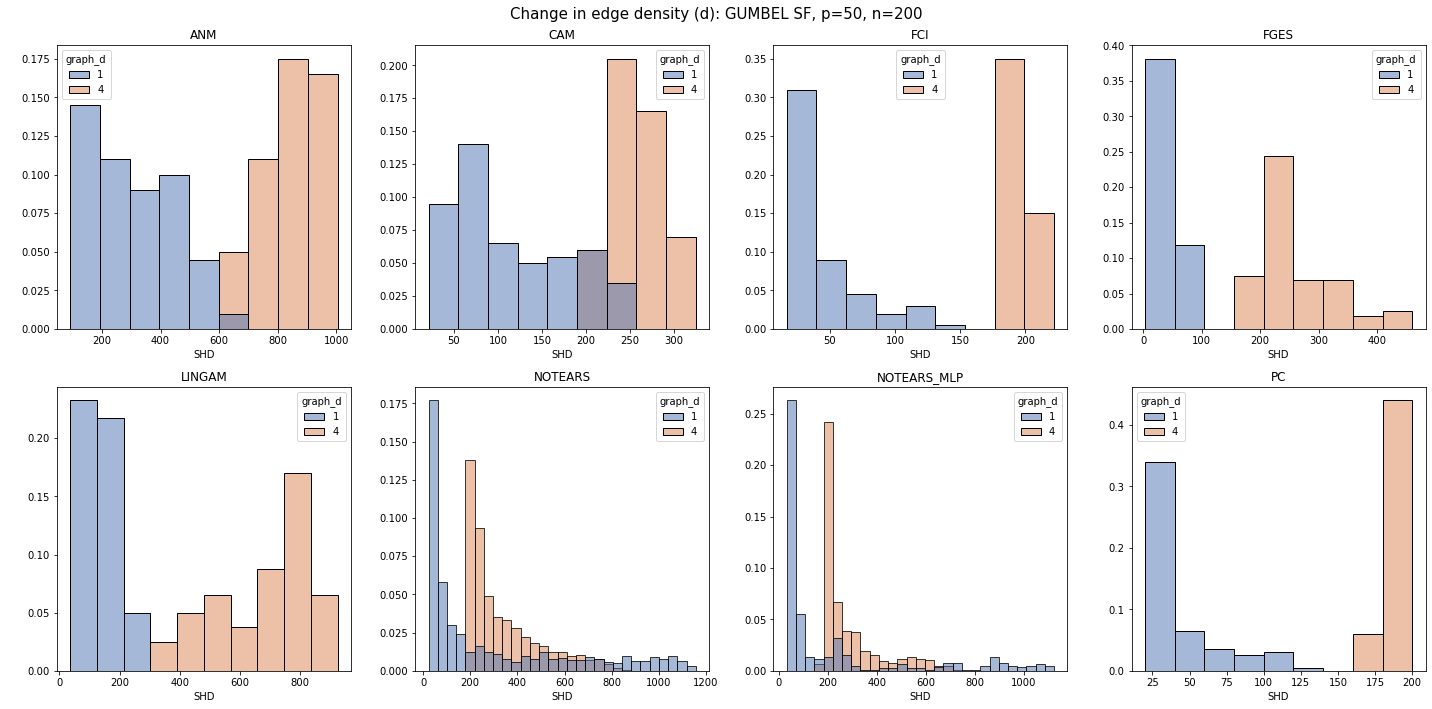

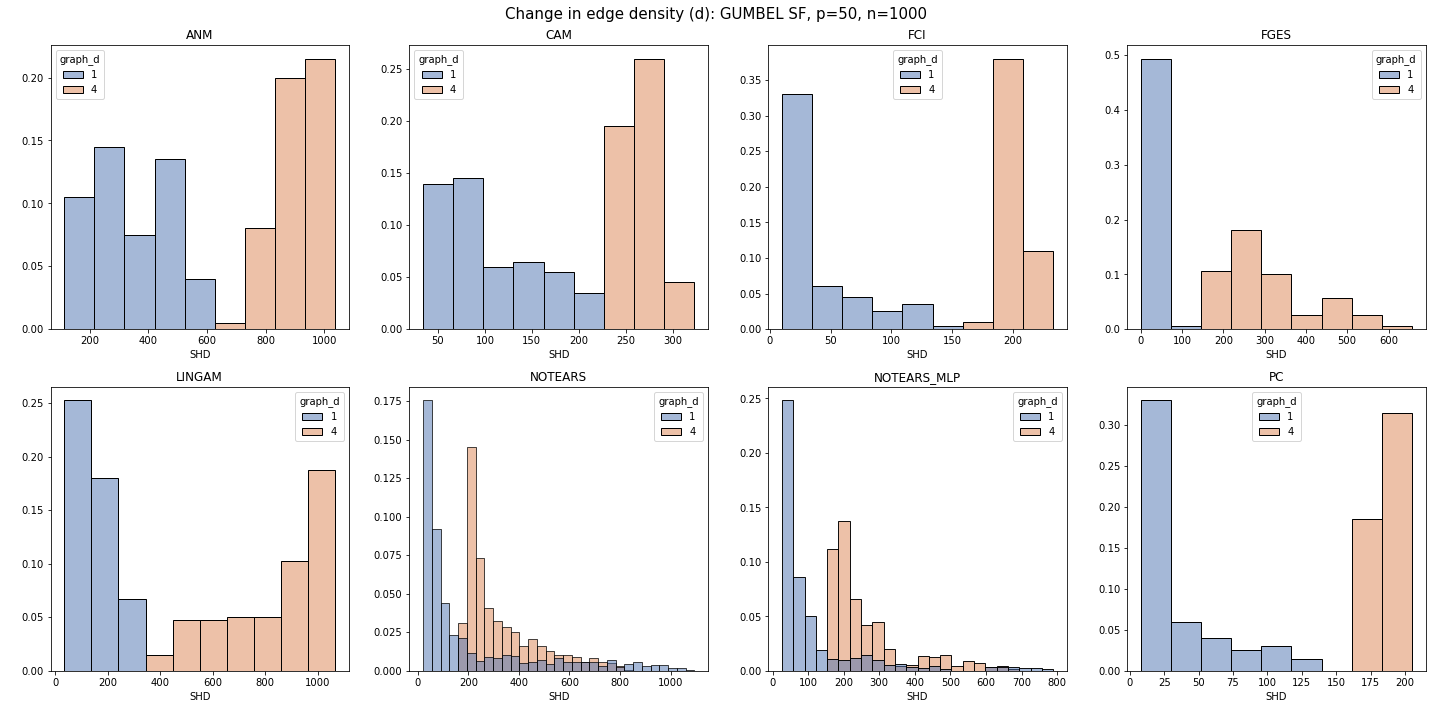

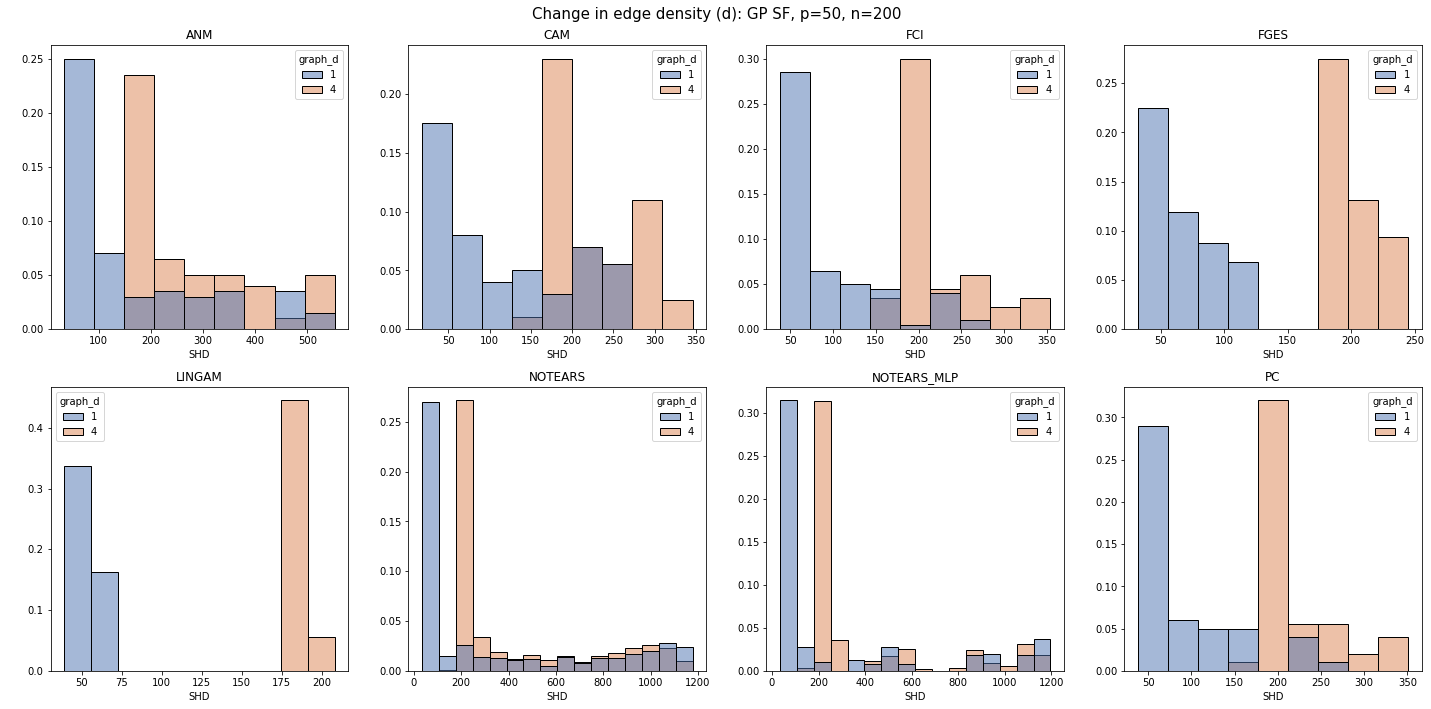

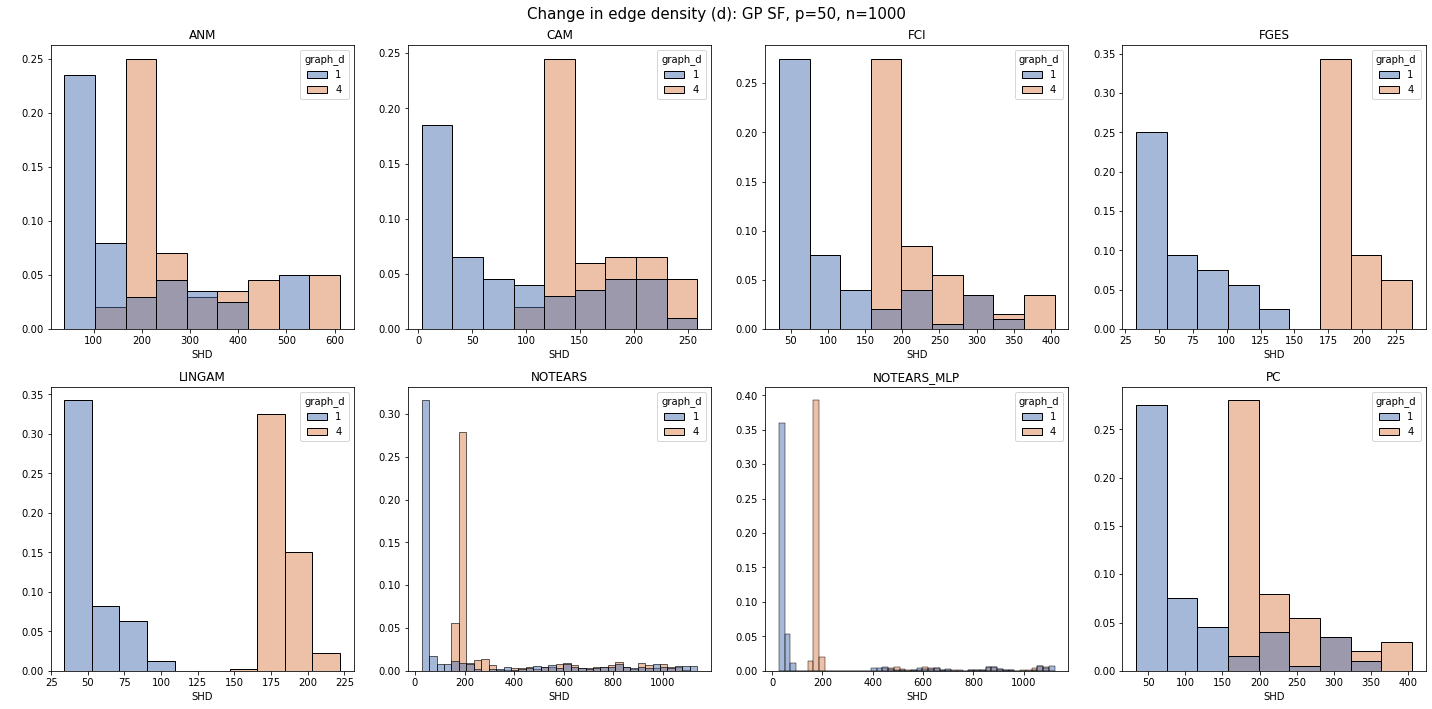

In [10]:
for gt in ['er', 'sf']:
    for p in [10, 20, 50]:
        for sem in ['gumbel', 'gp']:
            for n in [200, 1000]:
                plot_d(gt, p, sem, n)

### sem

/tmp/ipykernel_733290/3090102906.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(2, 4, figsize=(20, 10))


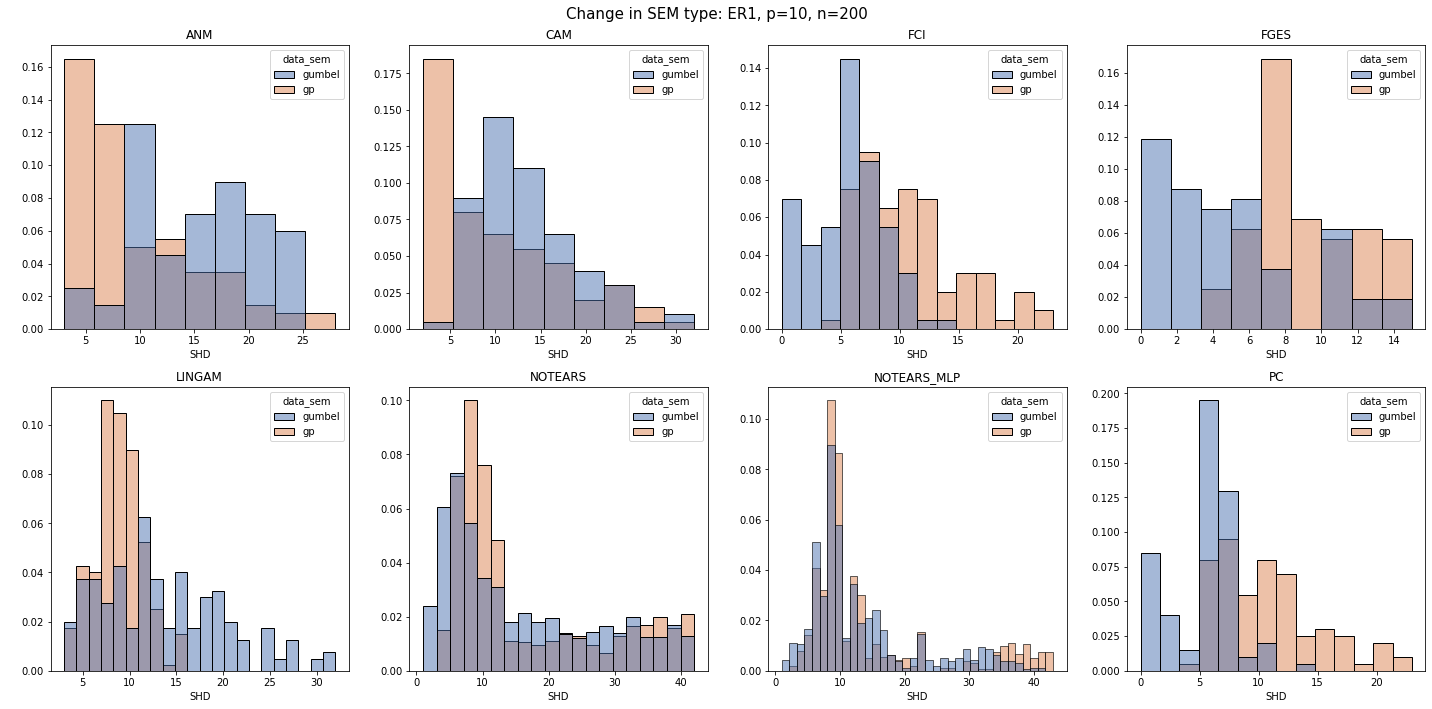

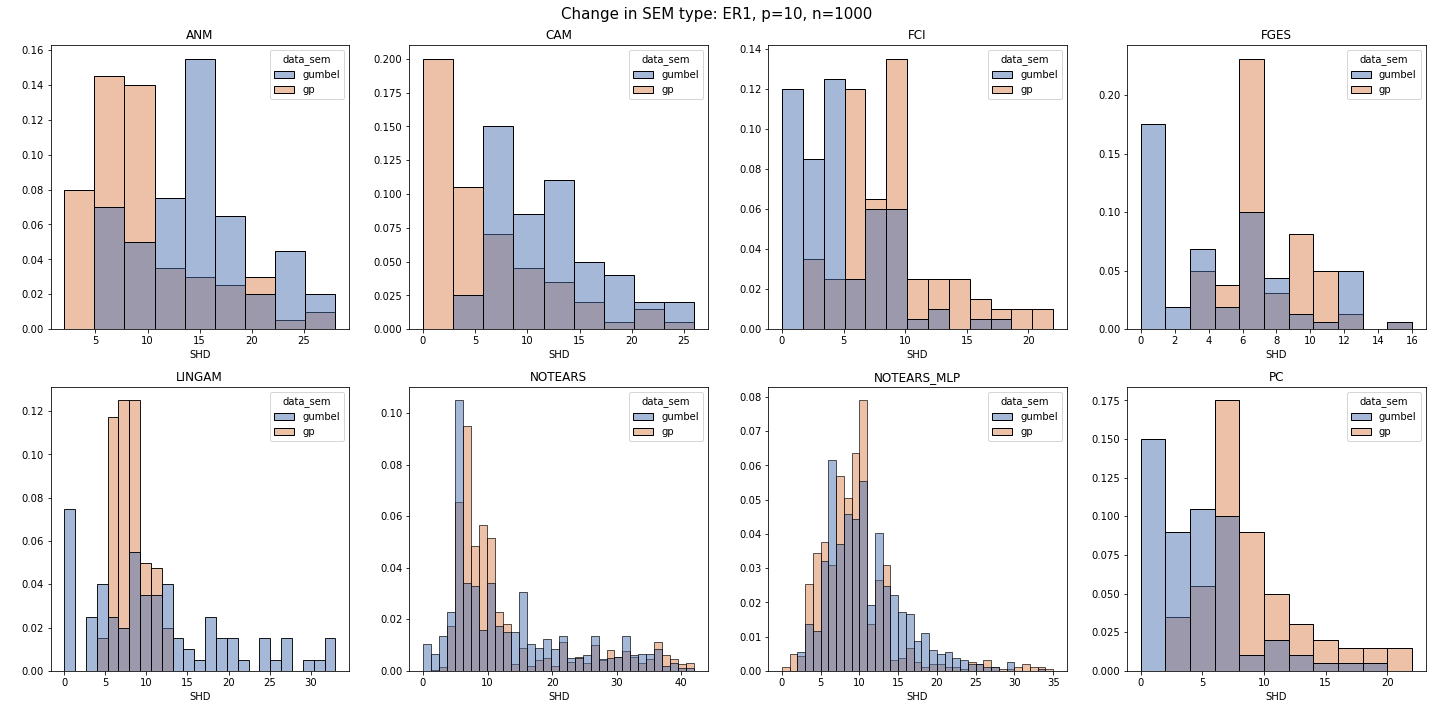

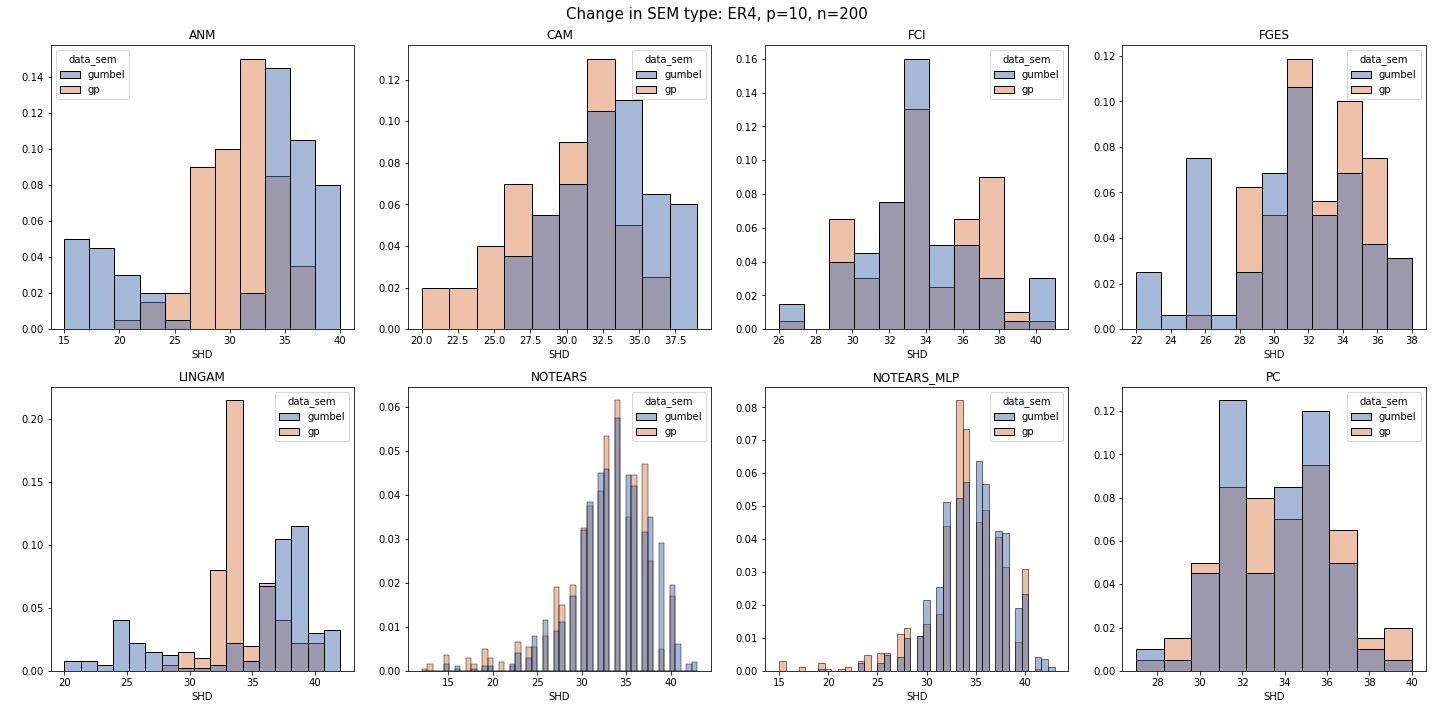

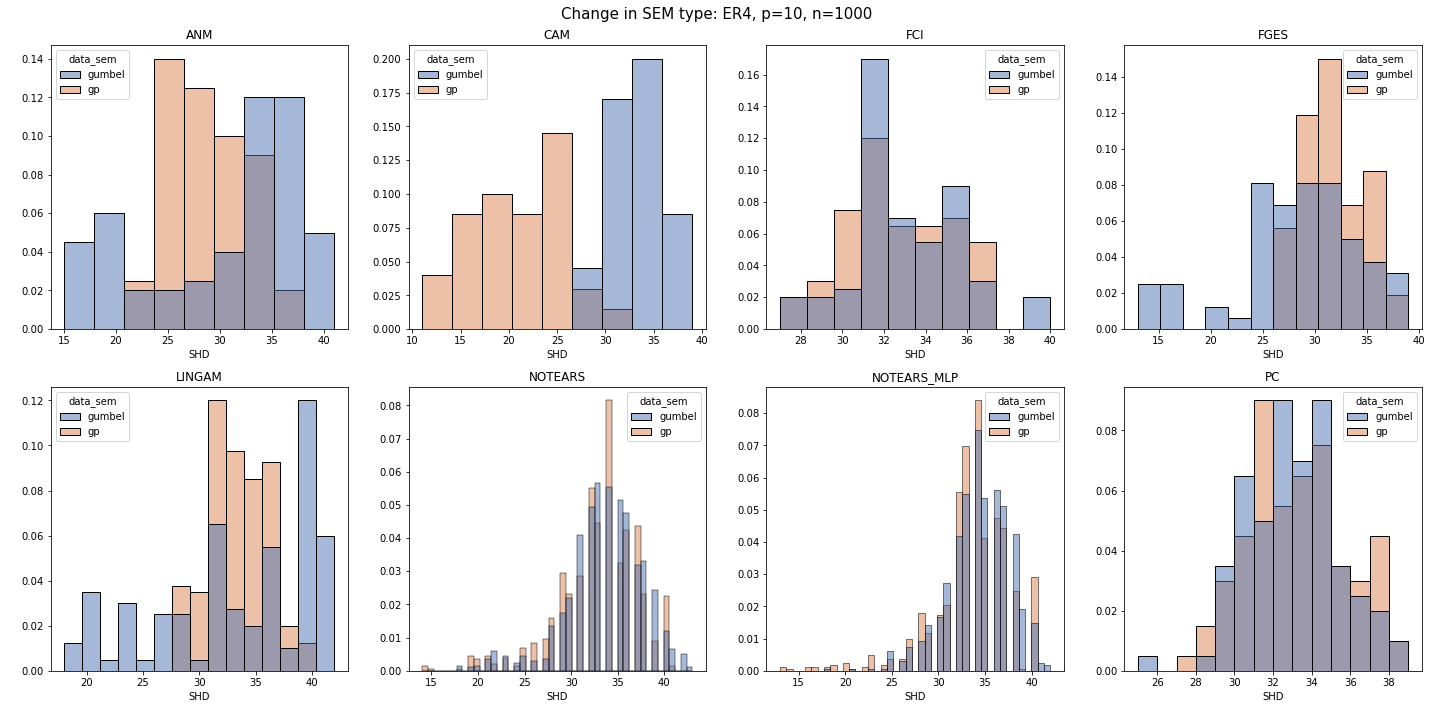

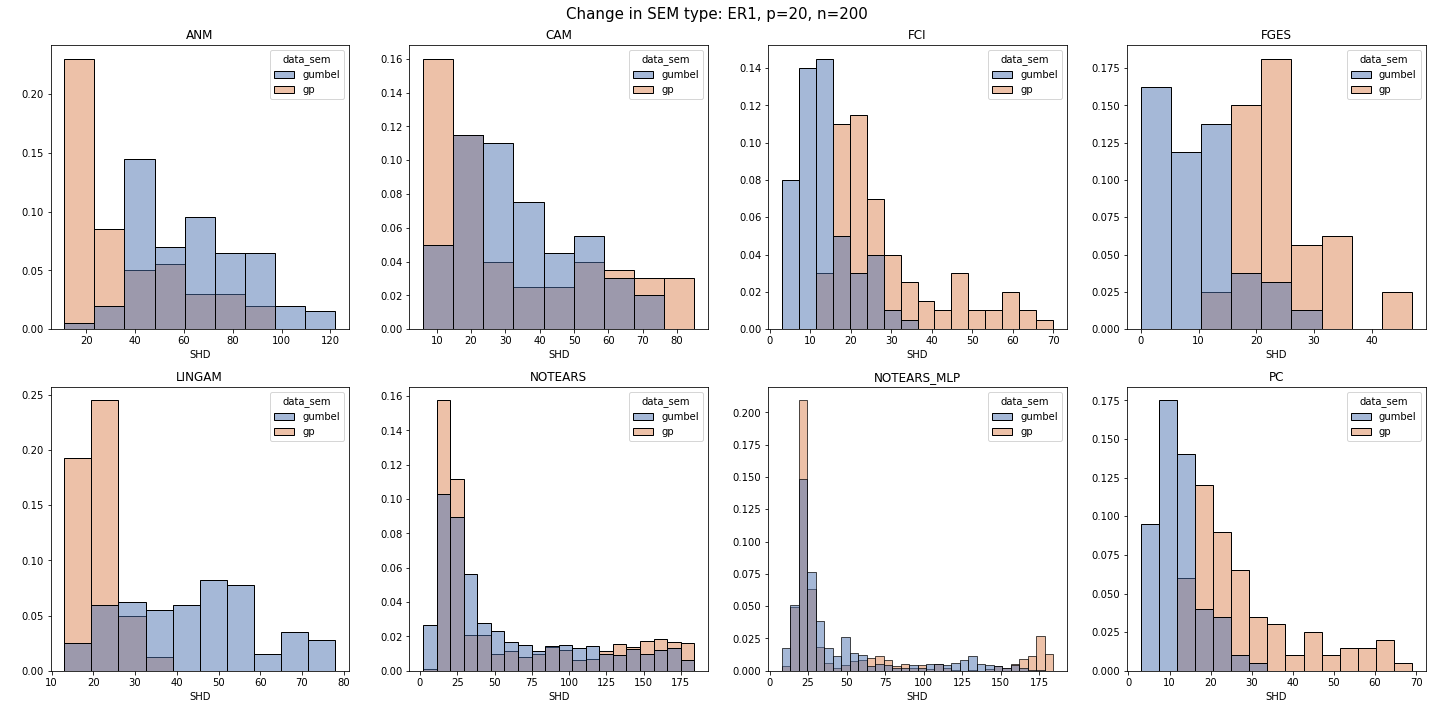

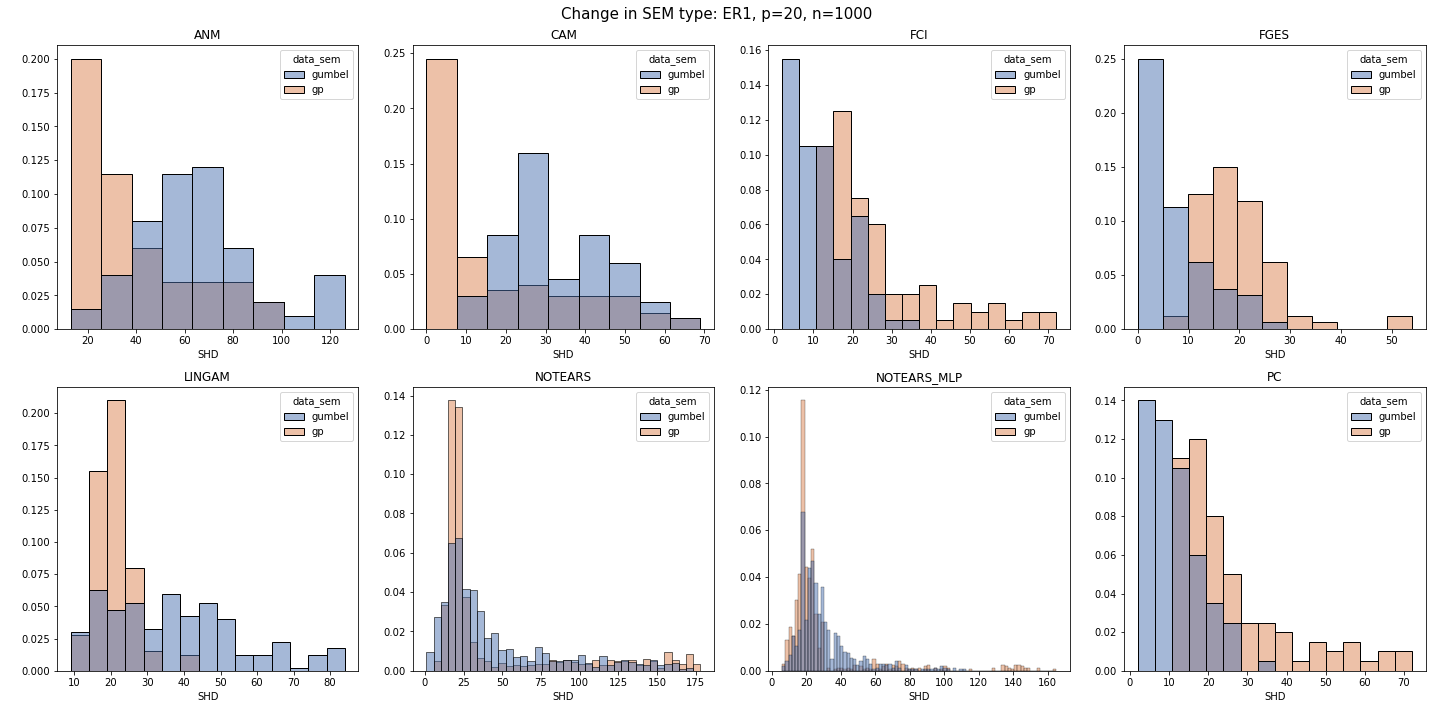

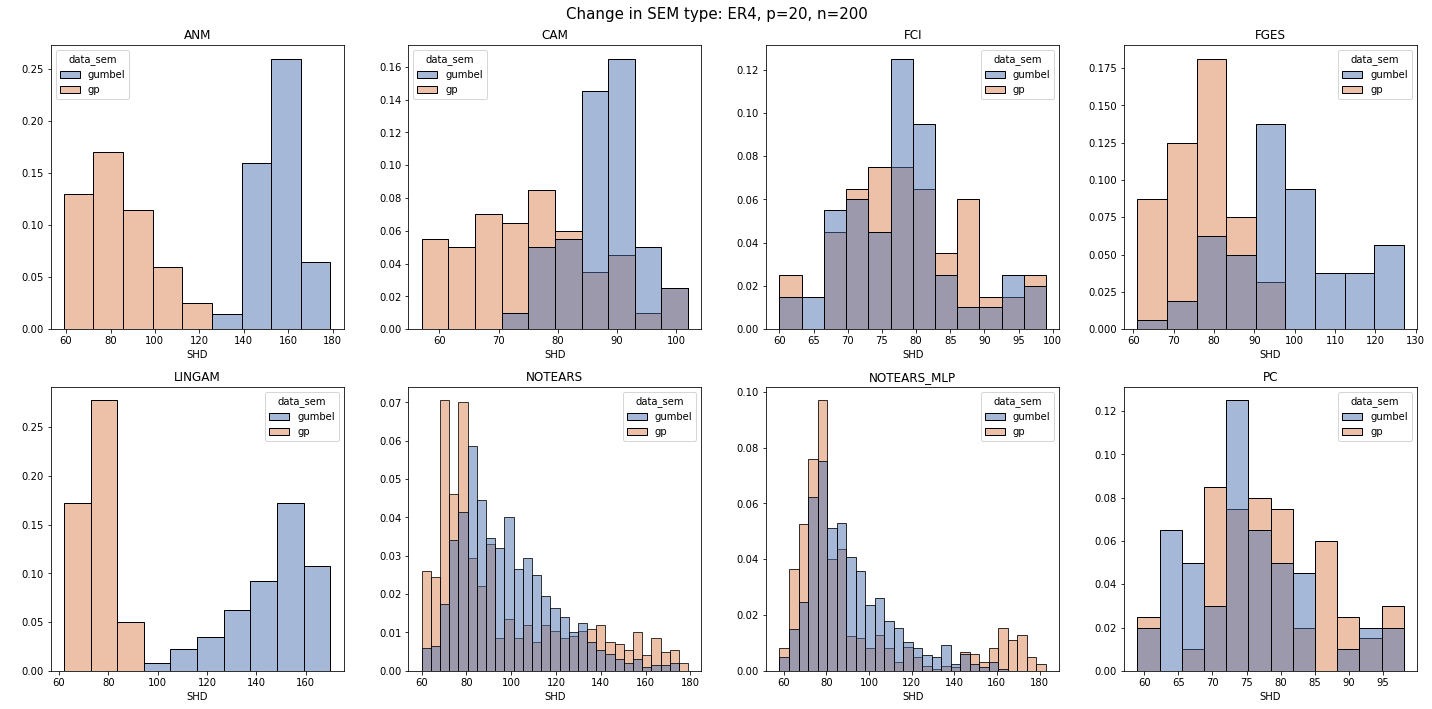

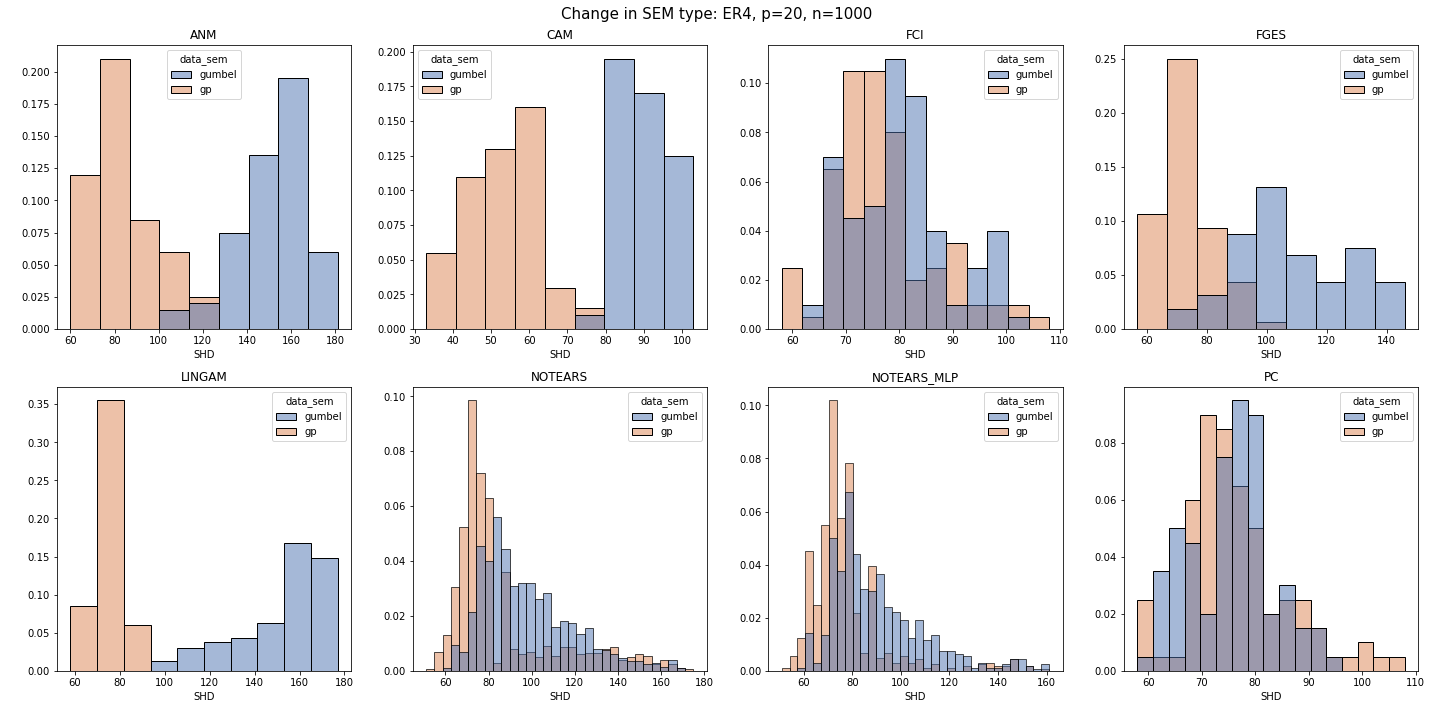

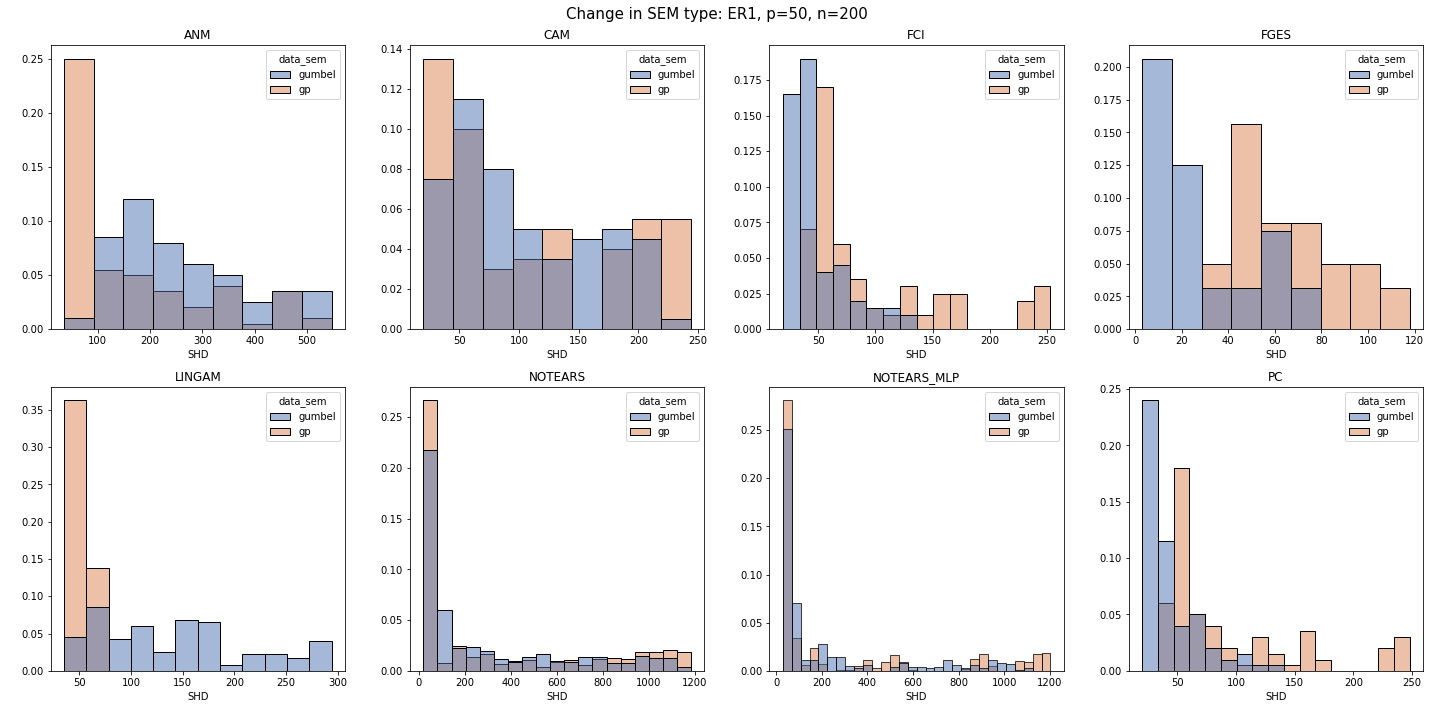

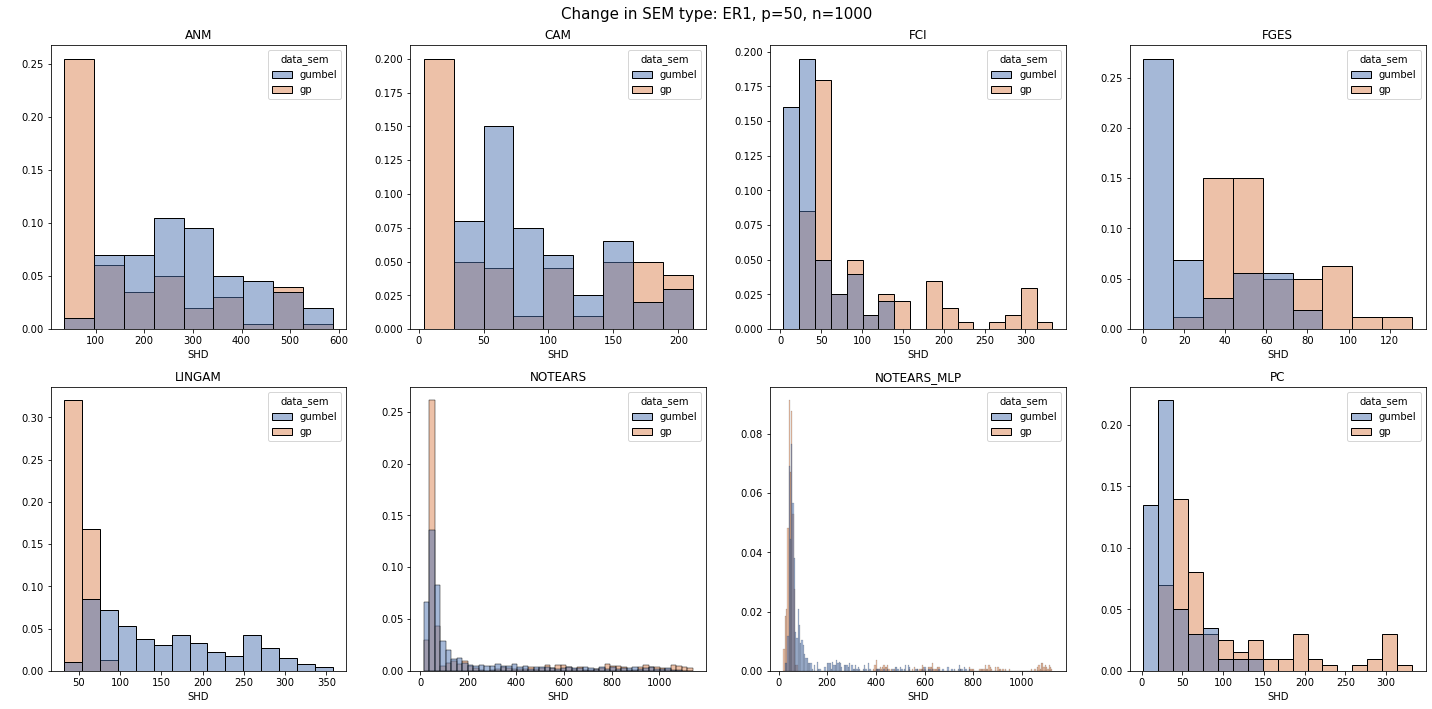

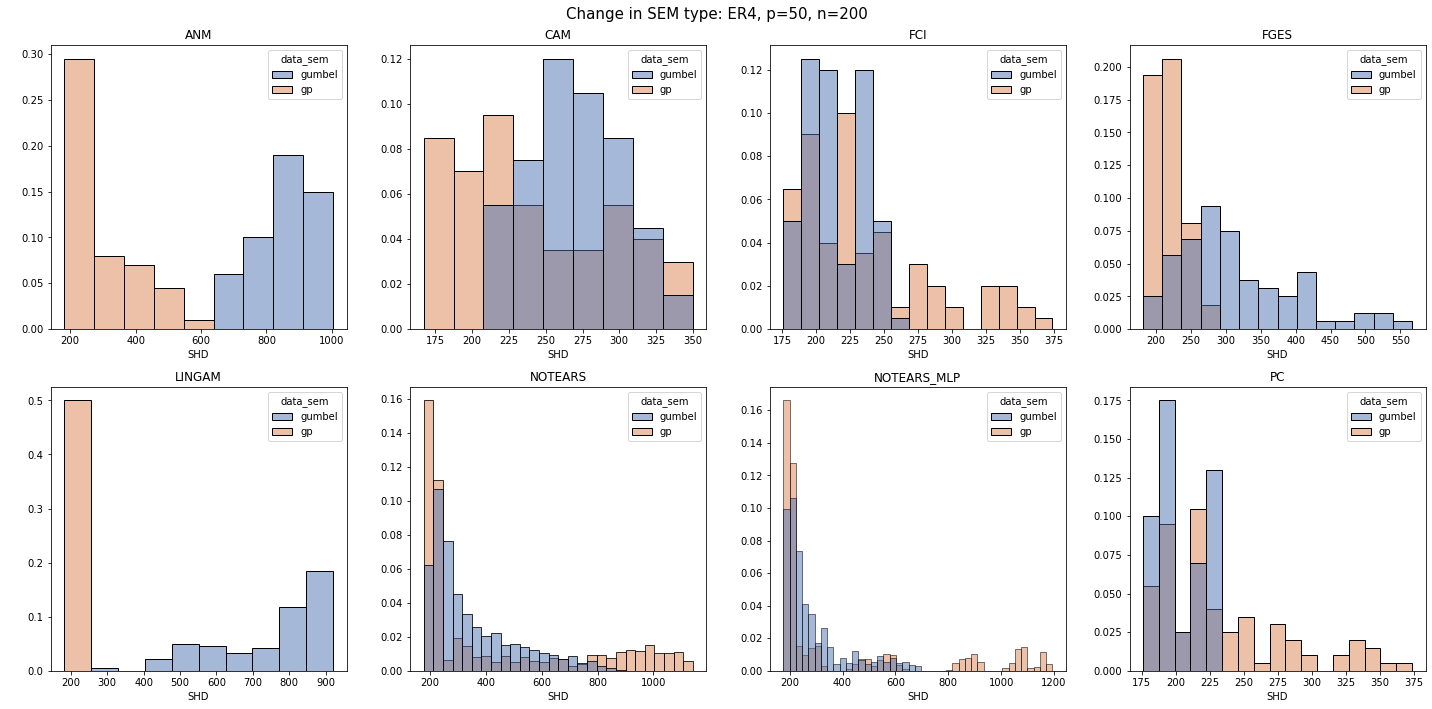

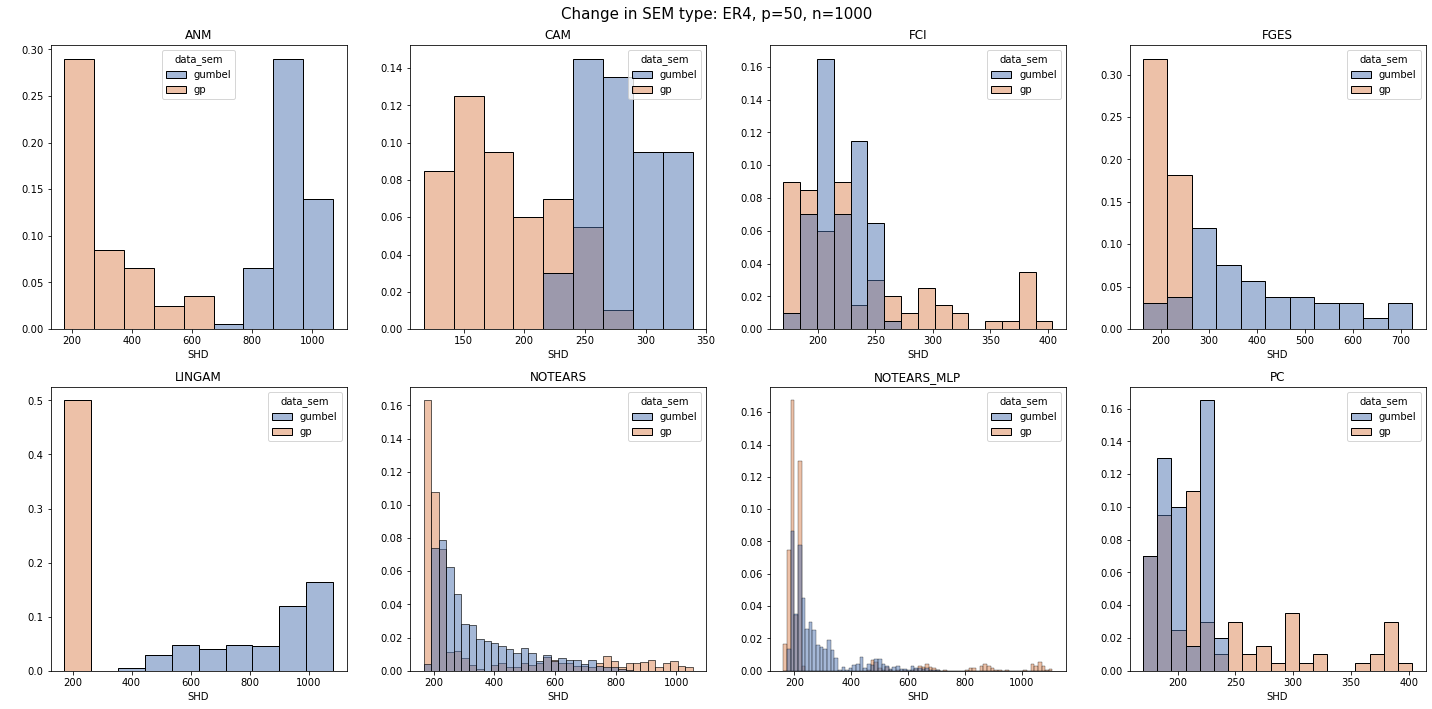

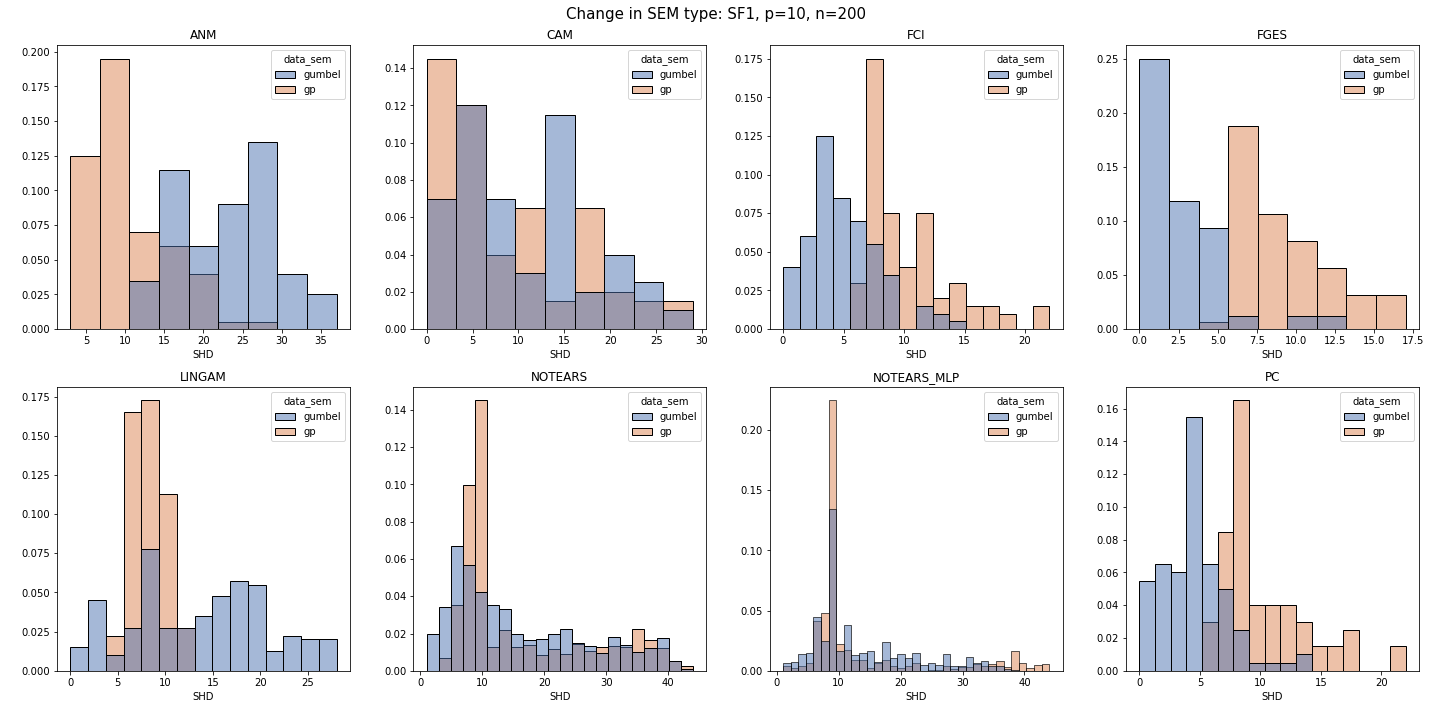

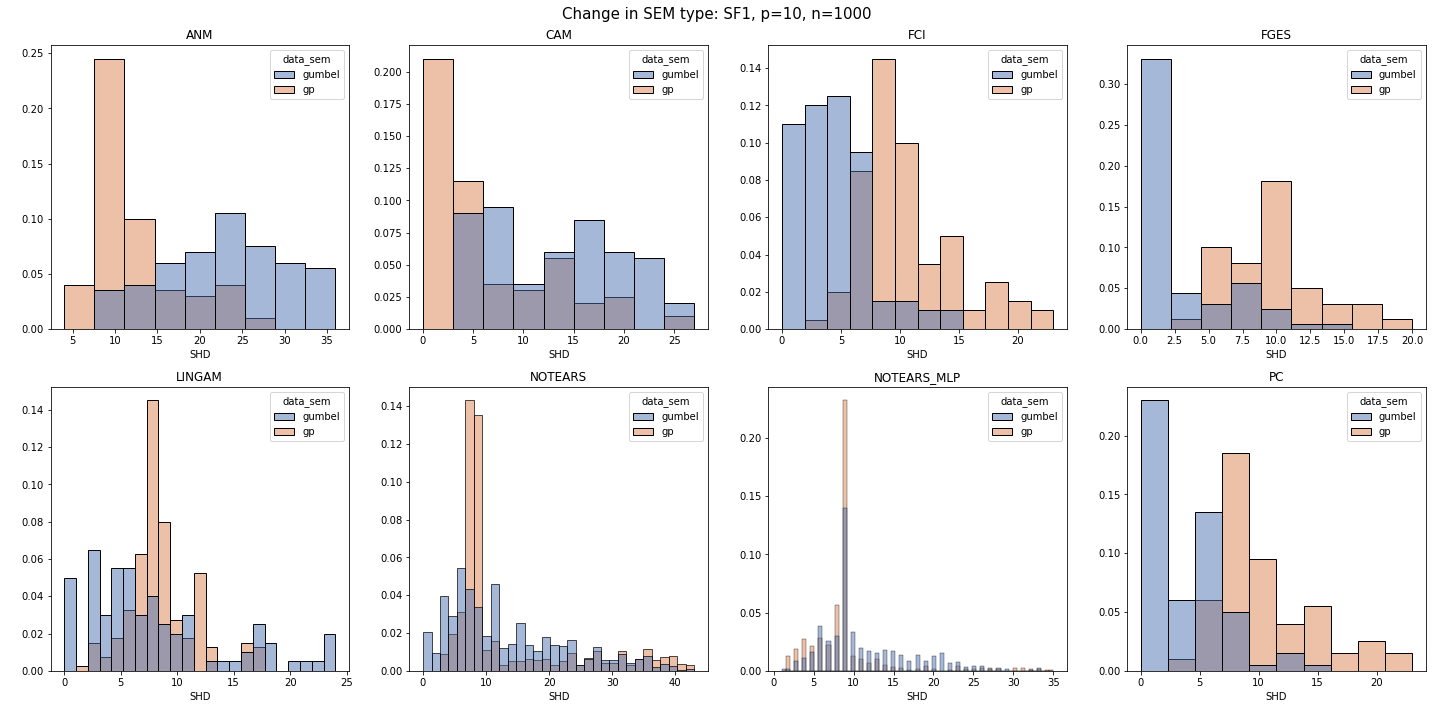

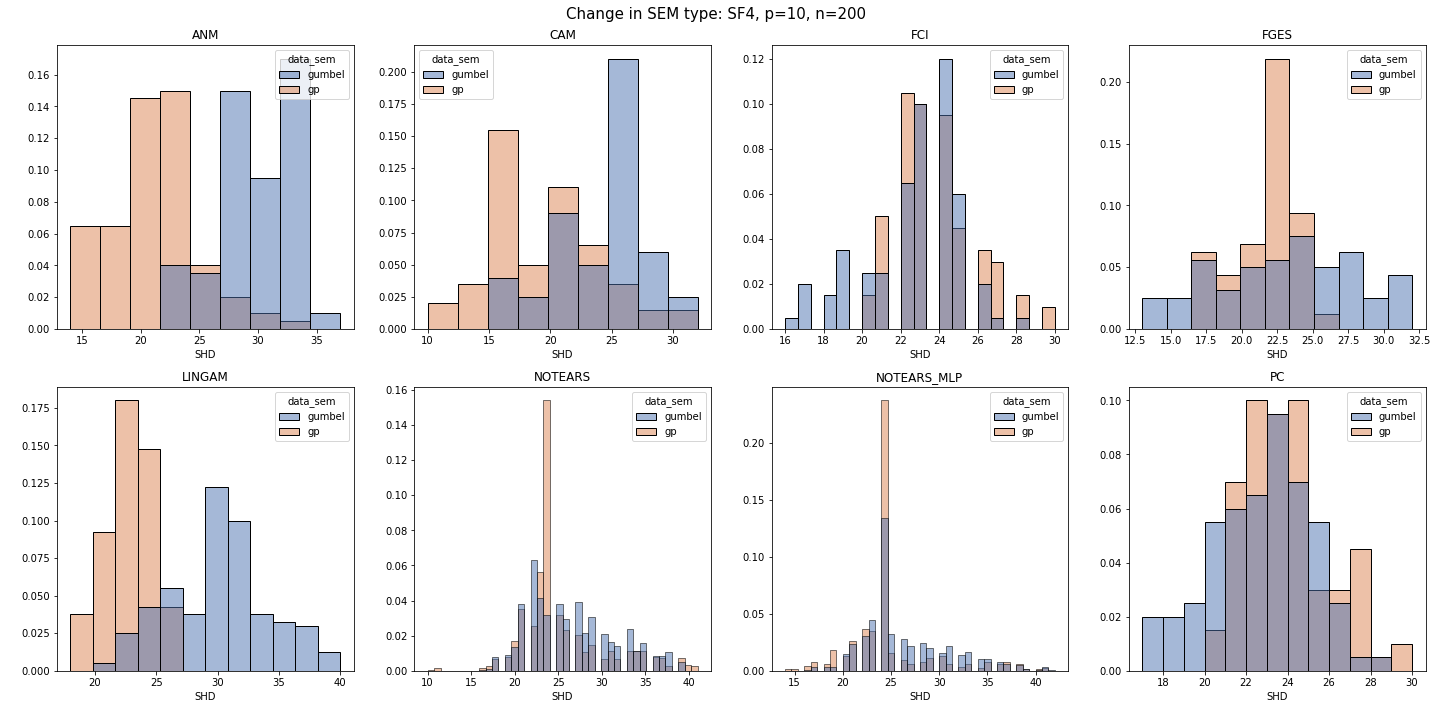

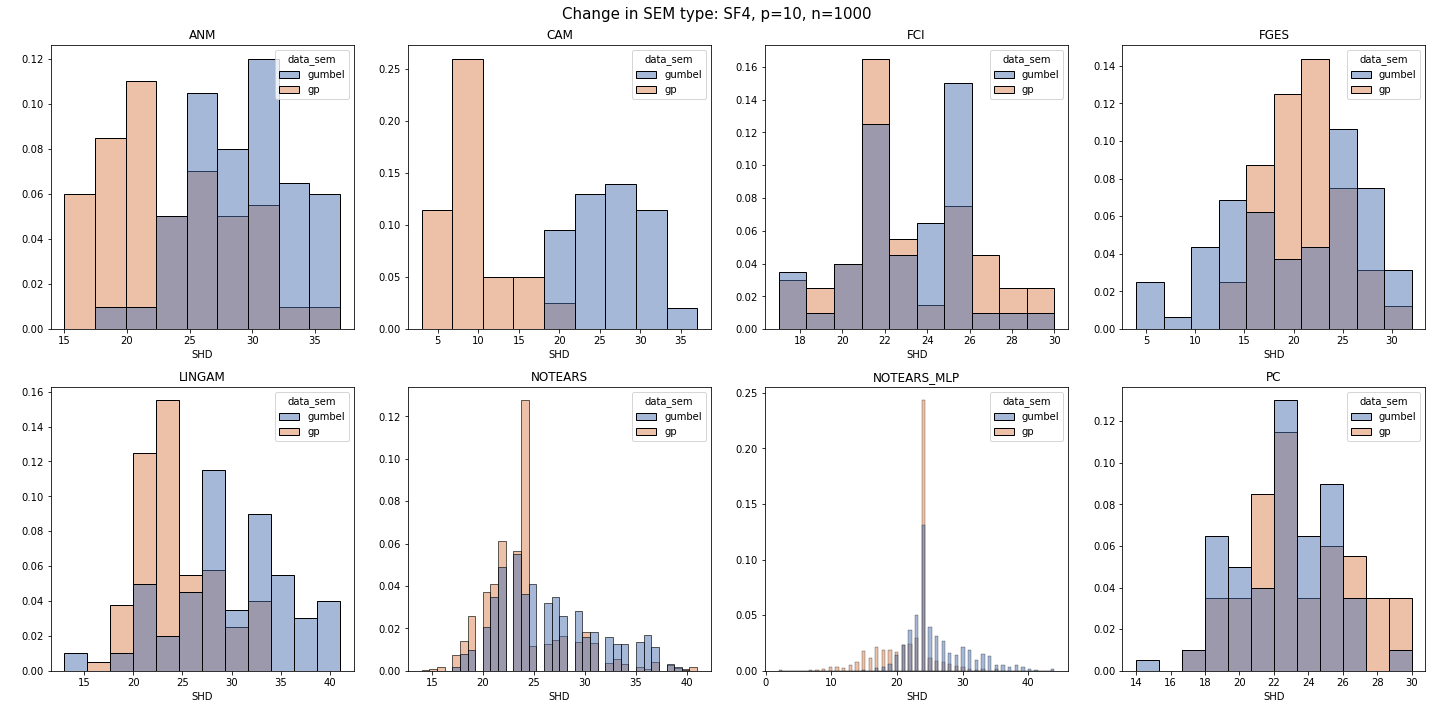

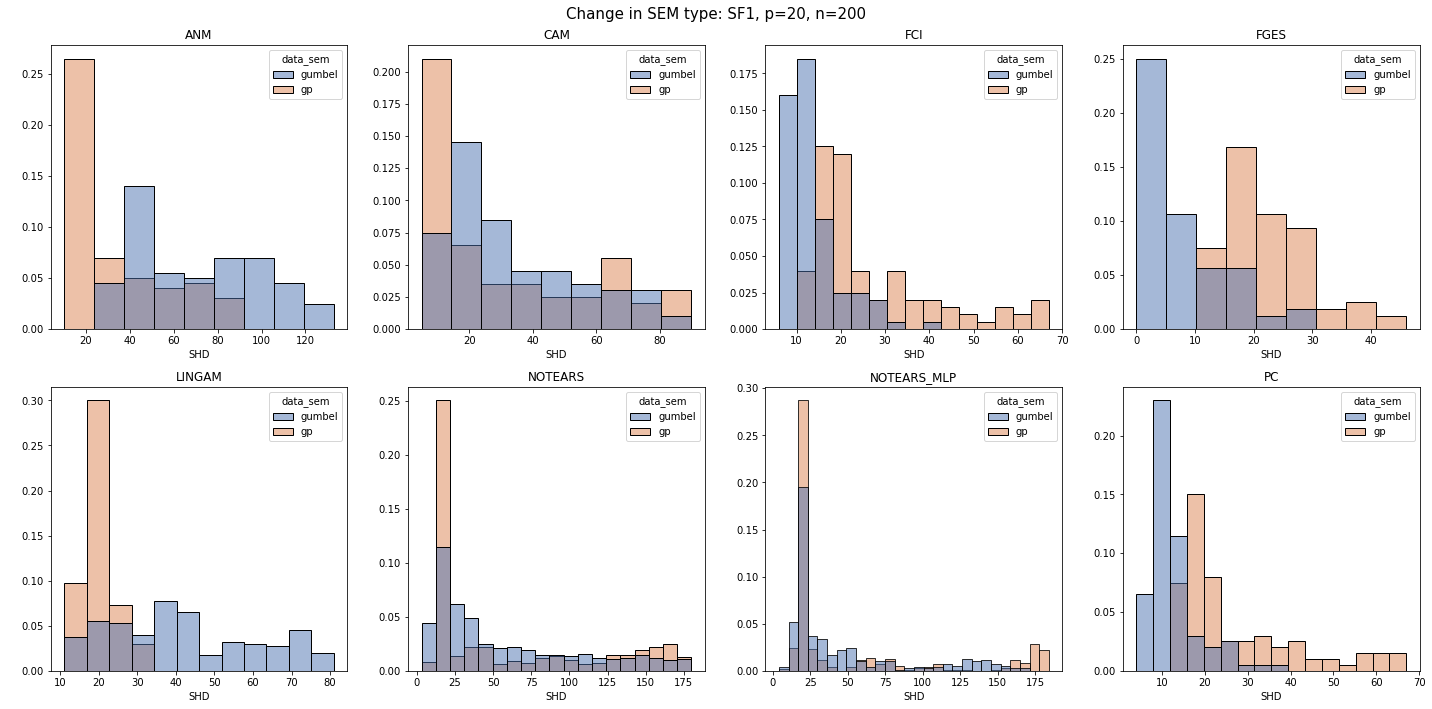

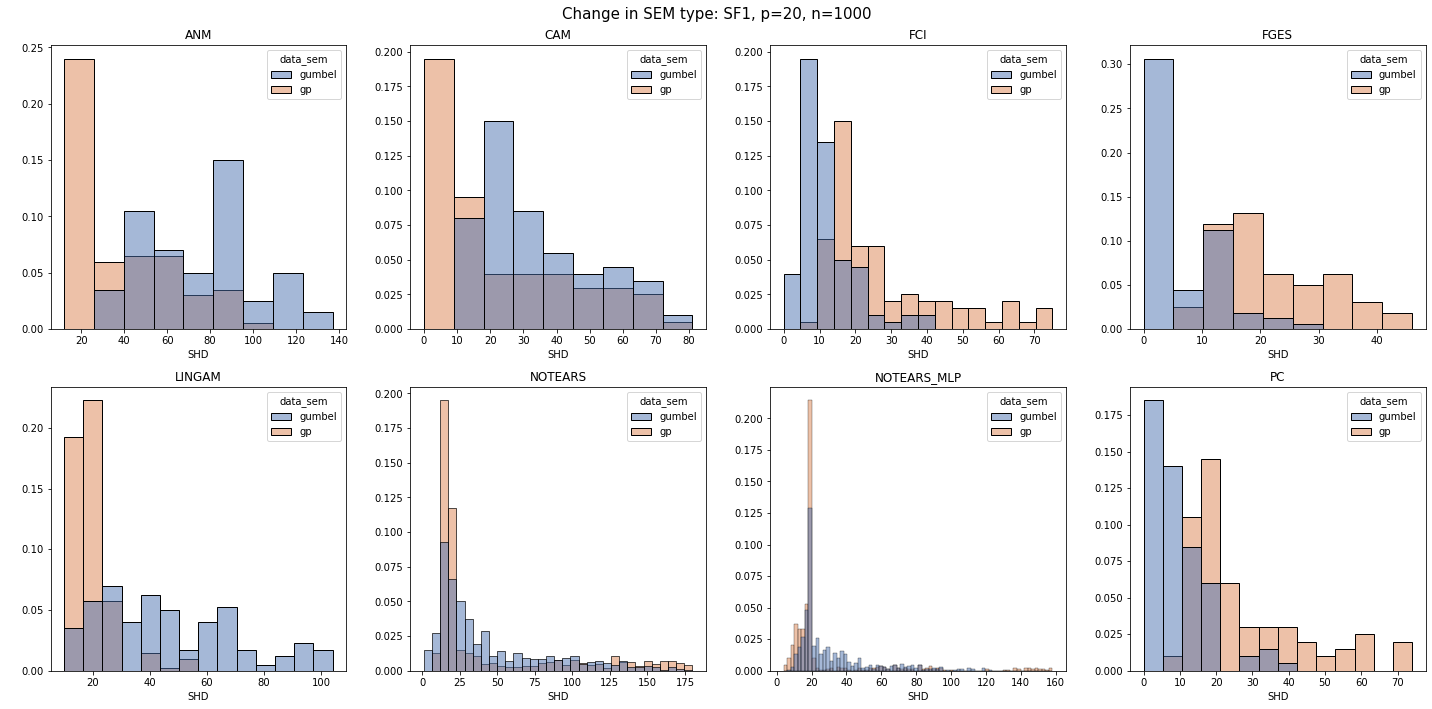

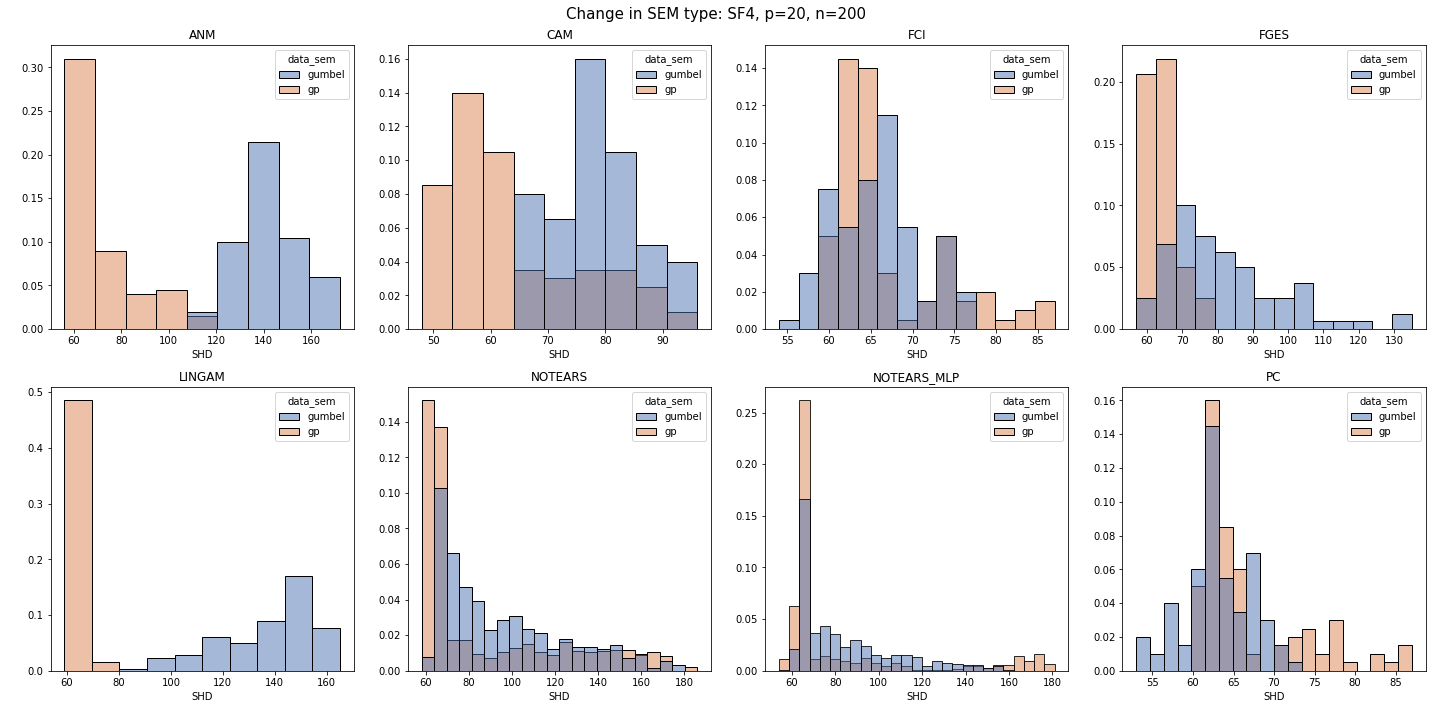

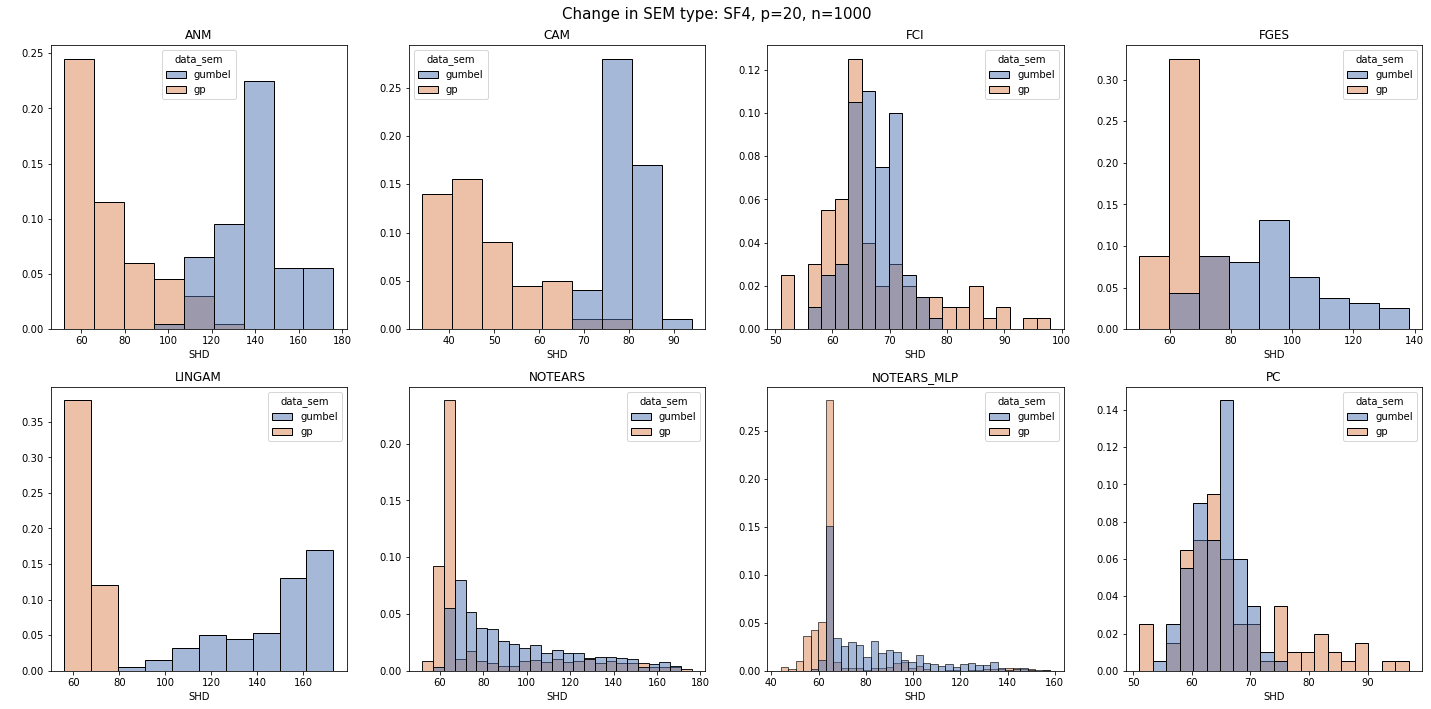

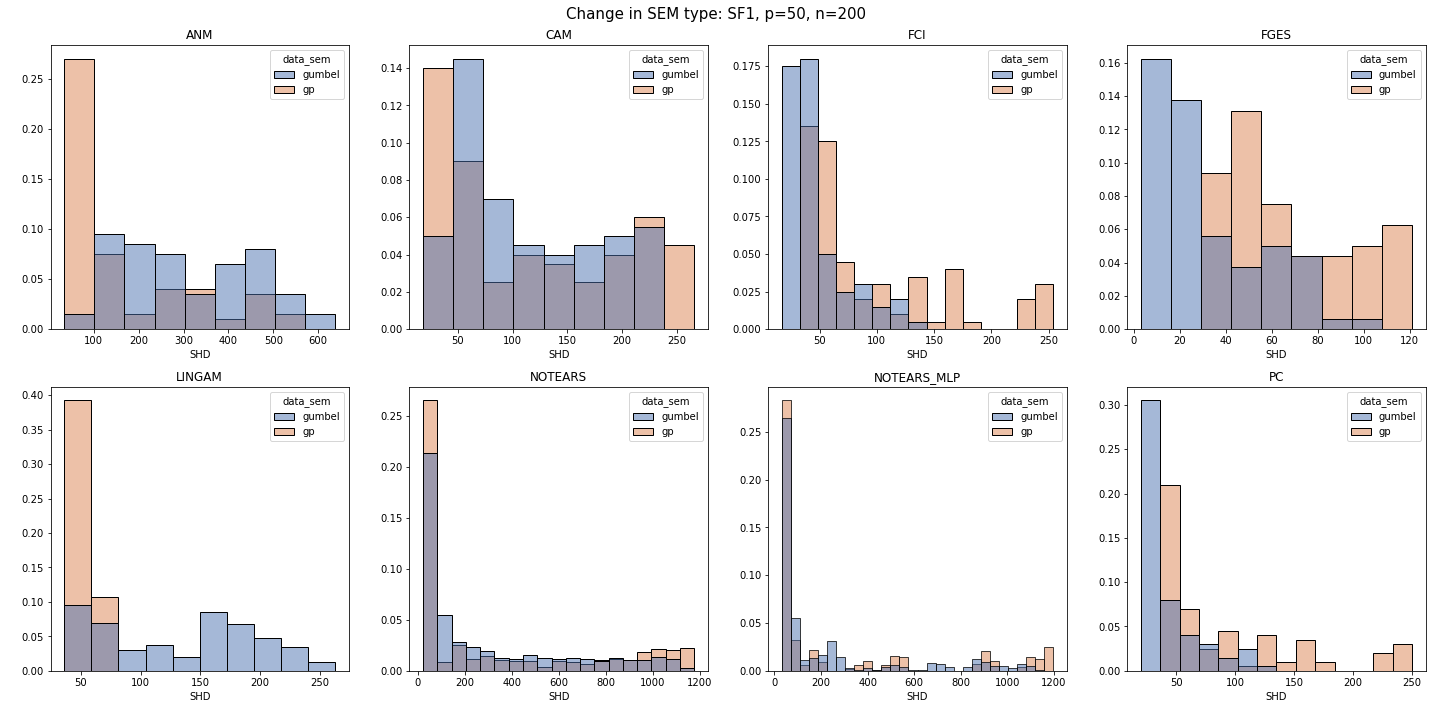

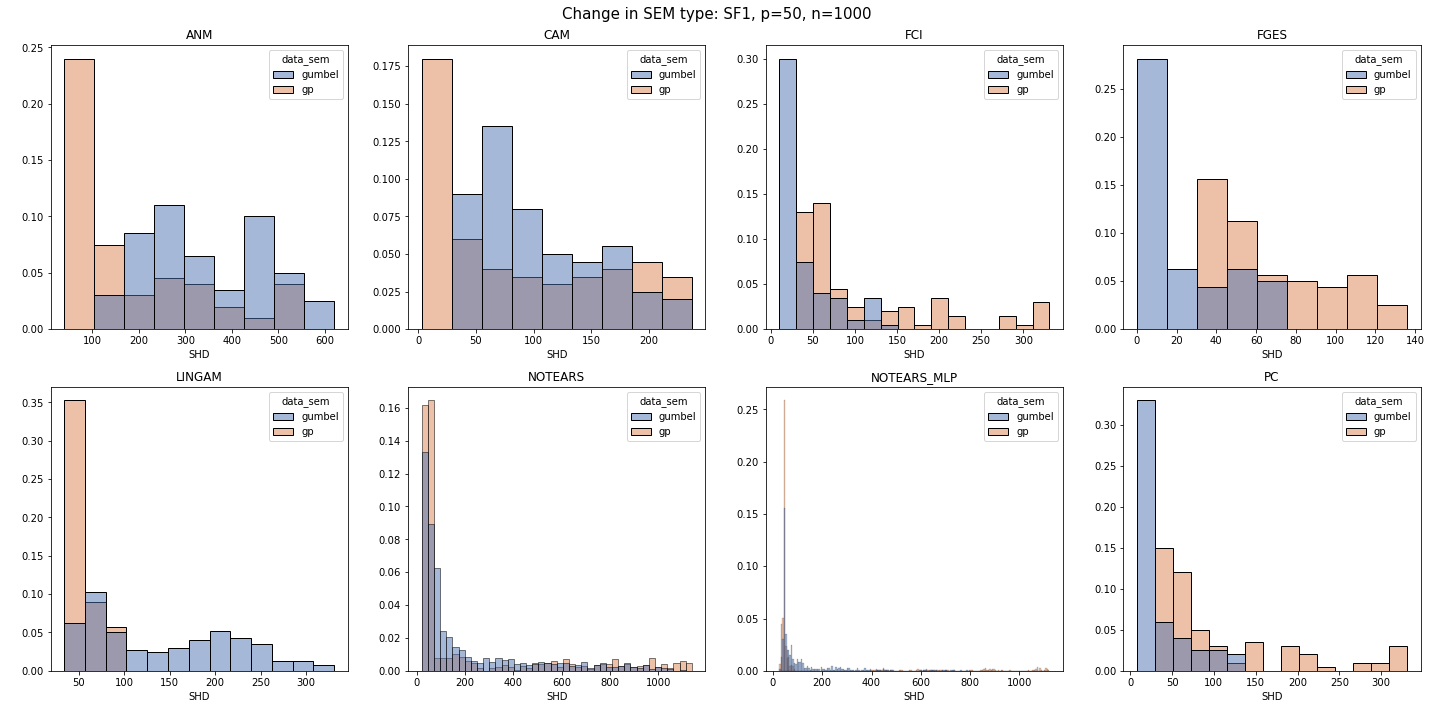

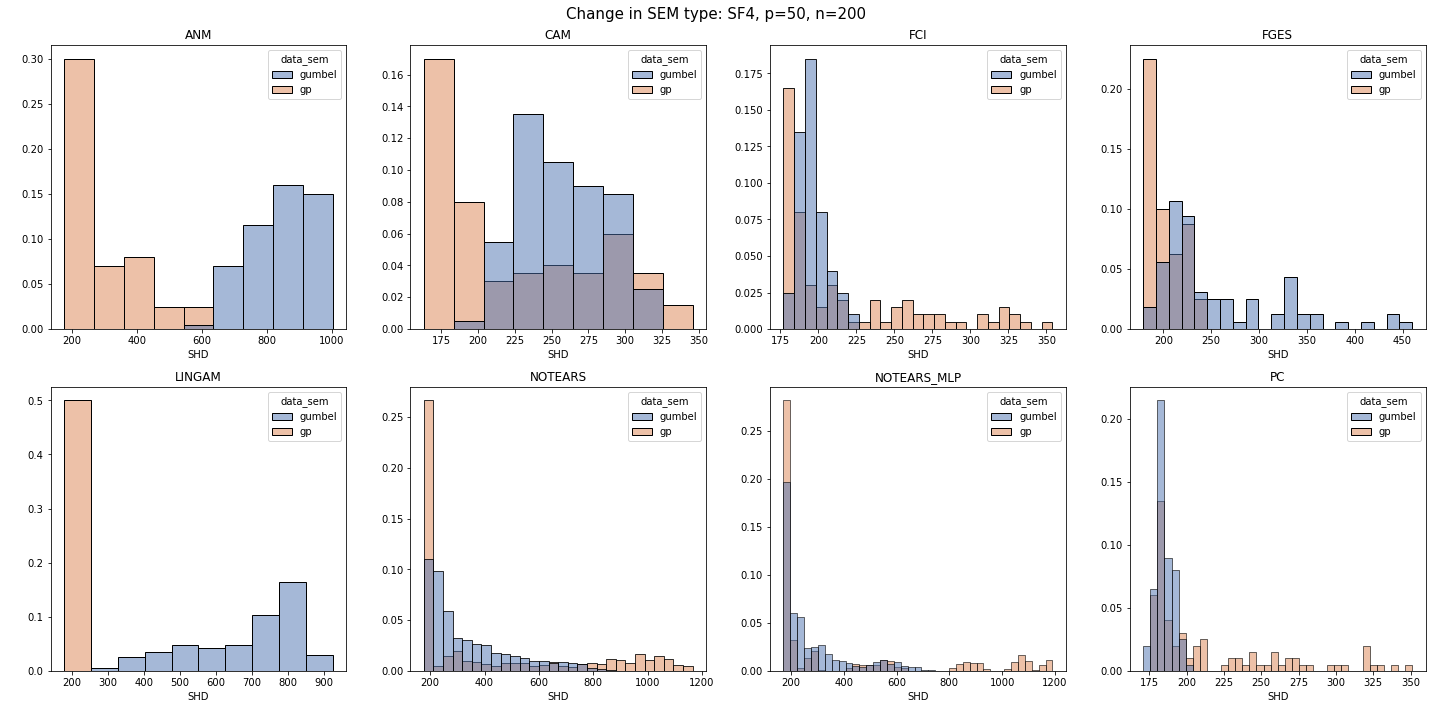

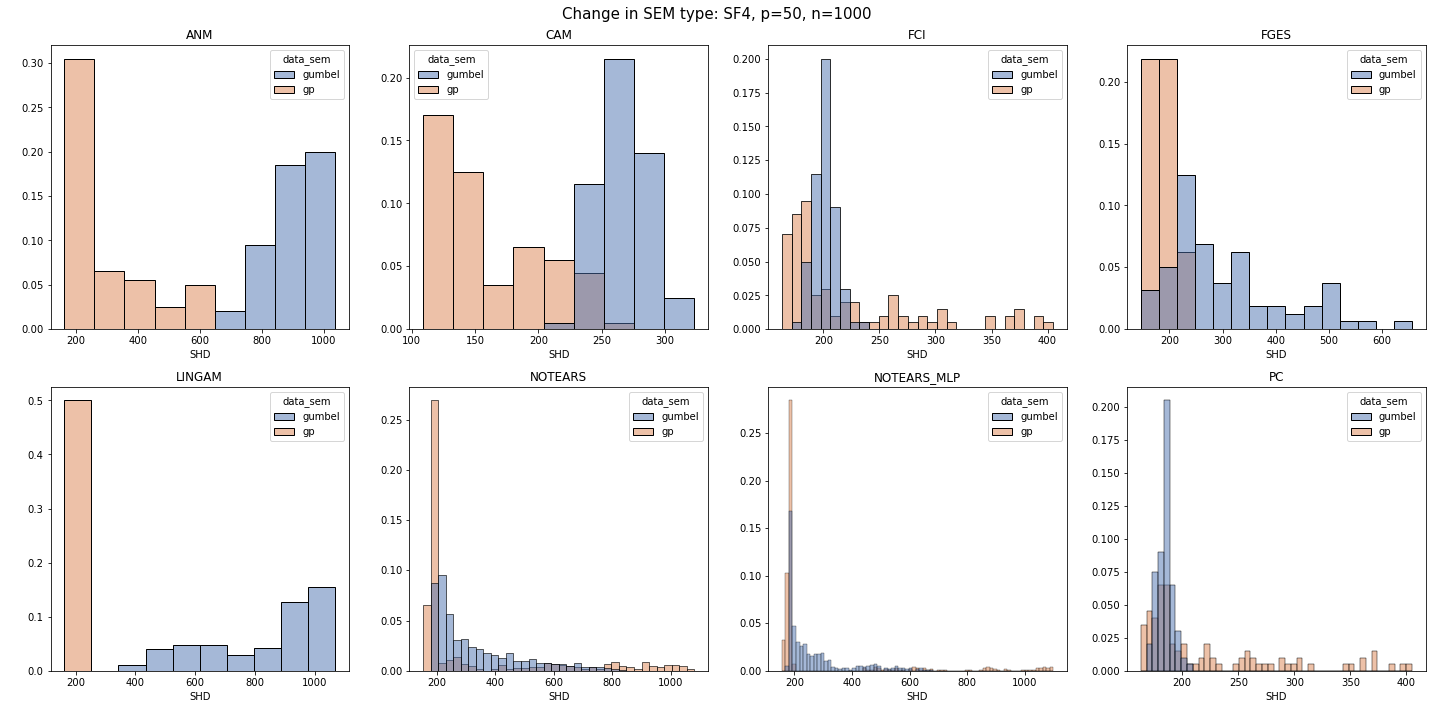

In [9]:
for gt in ['er', 'sf']:
    for p in [10, 20, 50]:
        for d in [1, 4]:
            for n in [200, 1000]:
                plot_sem(gt, p, d, n)

### gt

/tmp/ipykernel_733290/3090102906.py:82: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(2, 4, figsize=(20, 10))


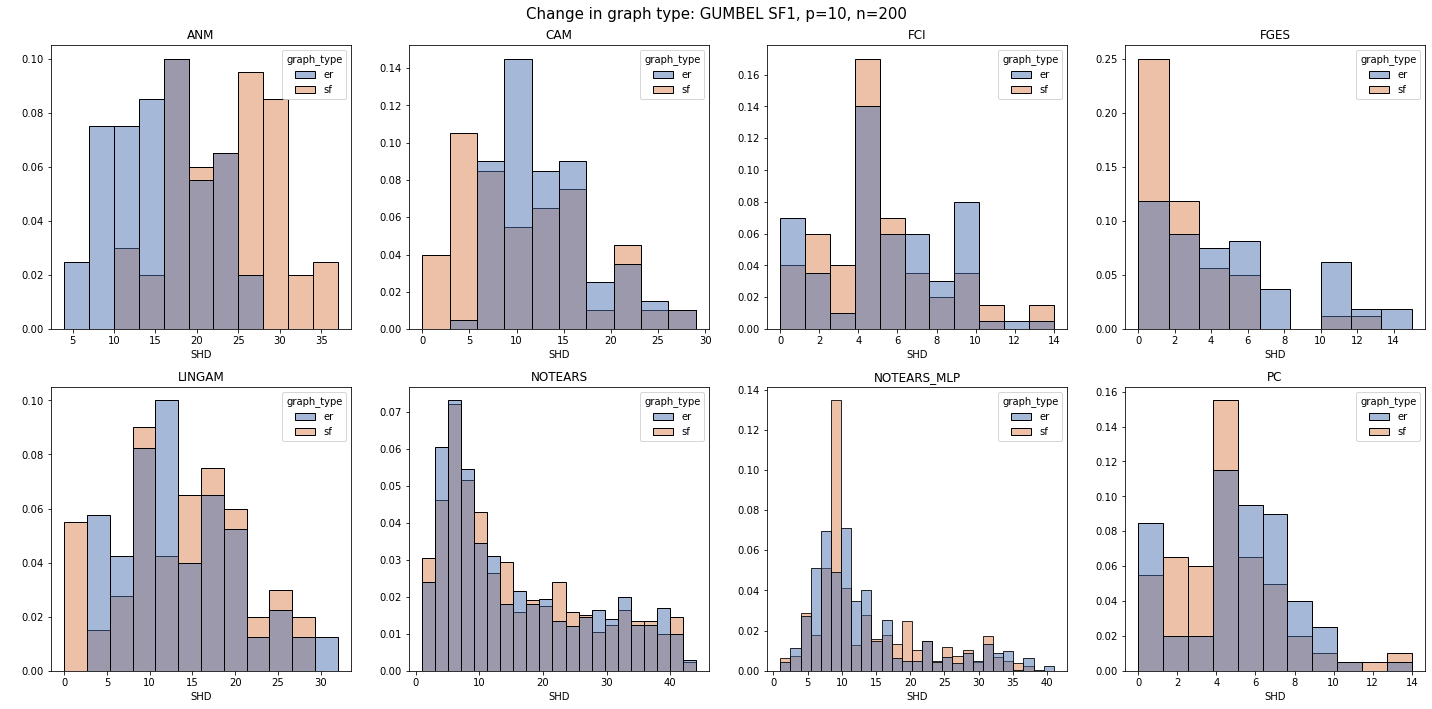

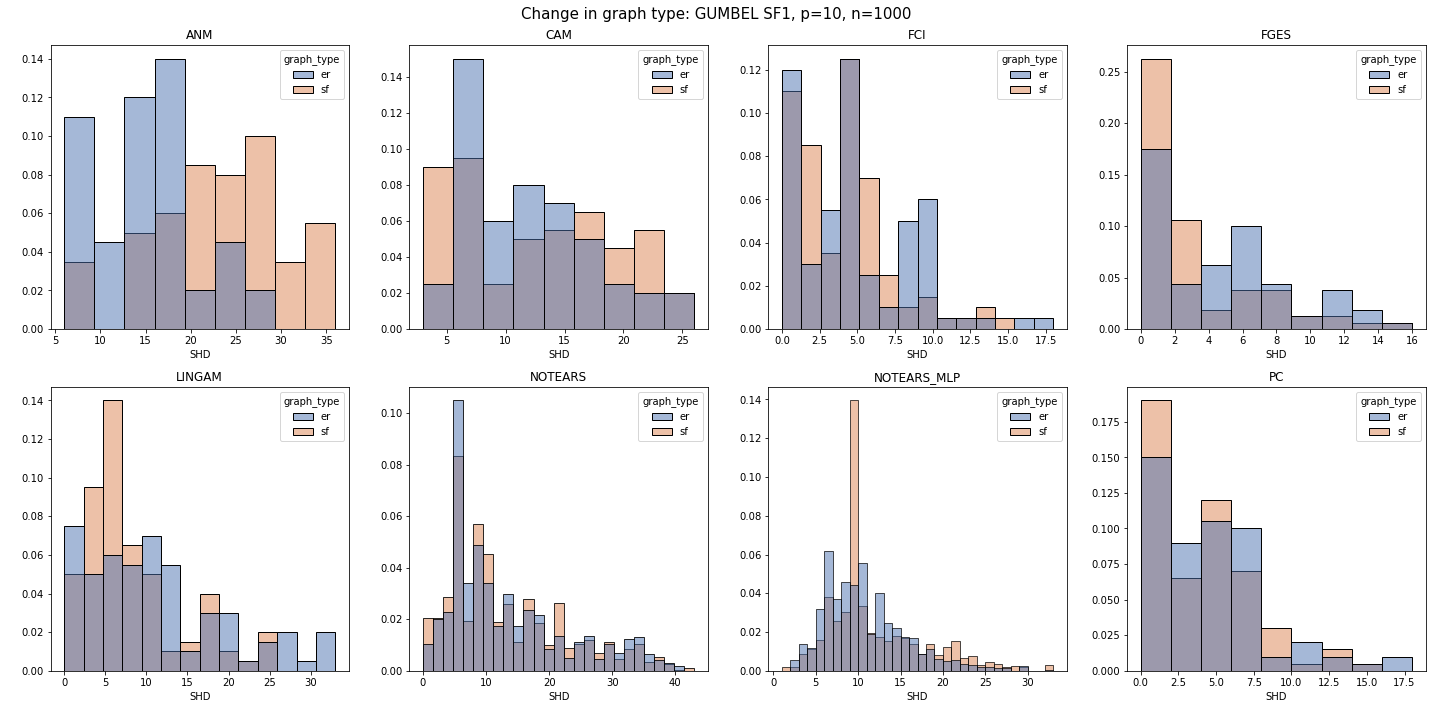

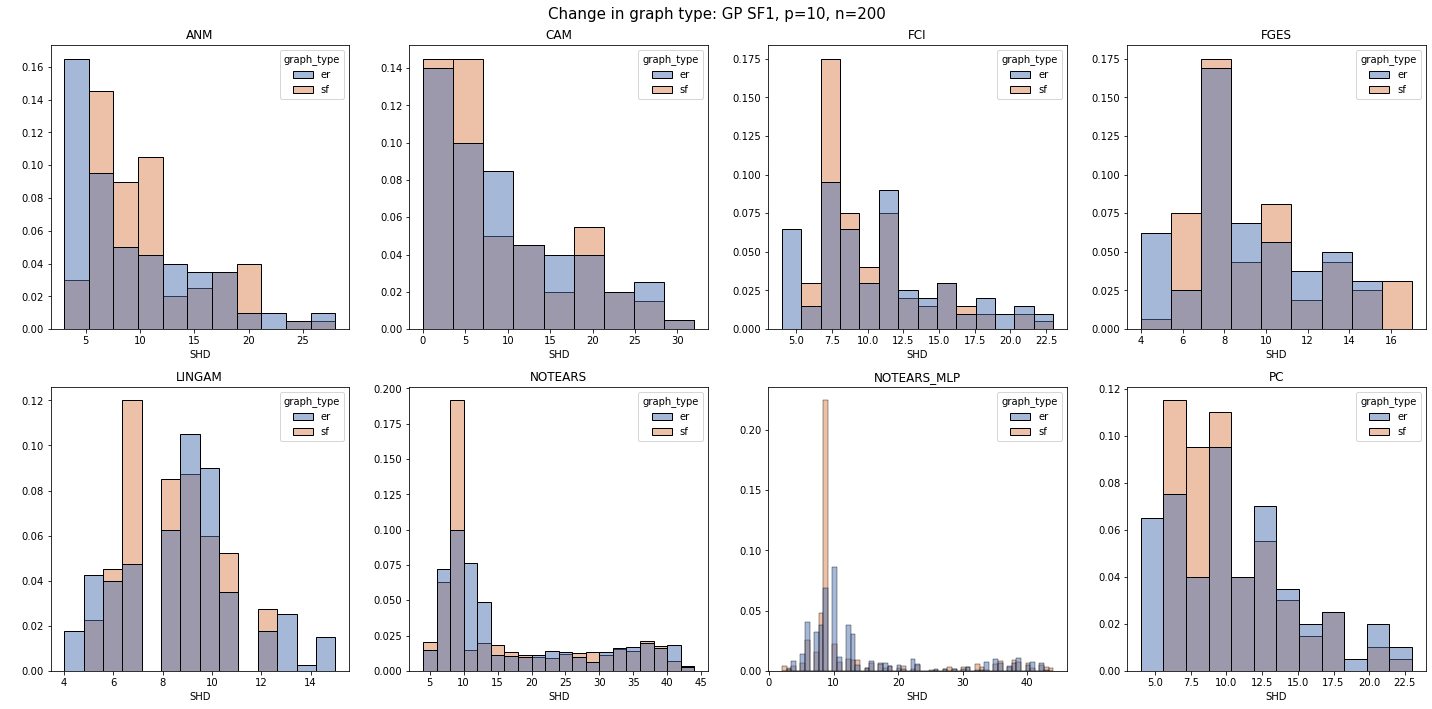

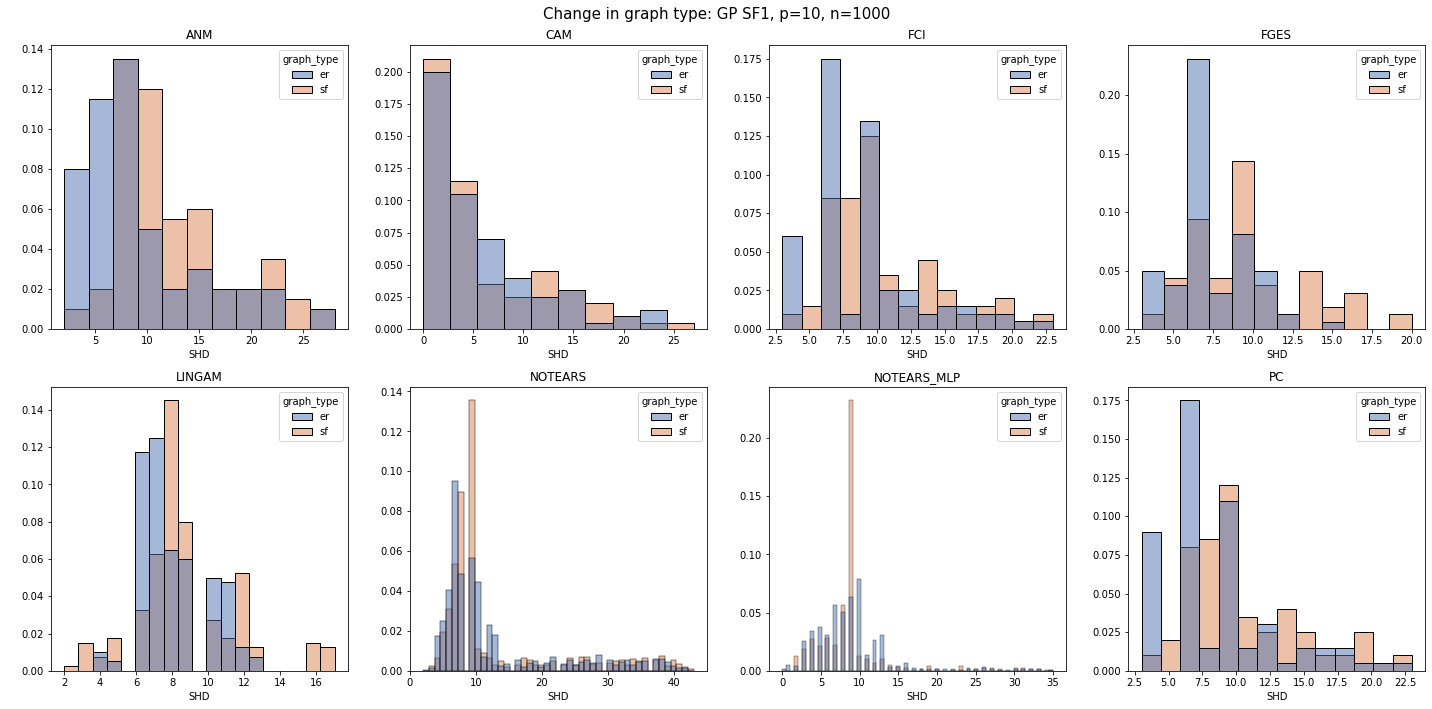

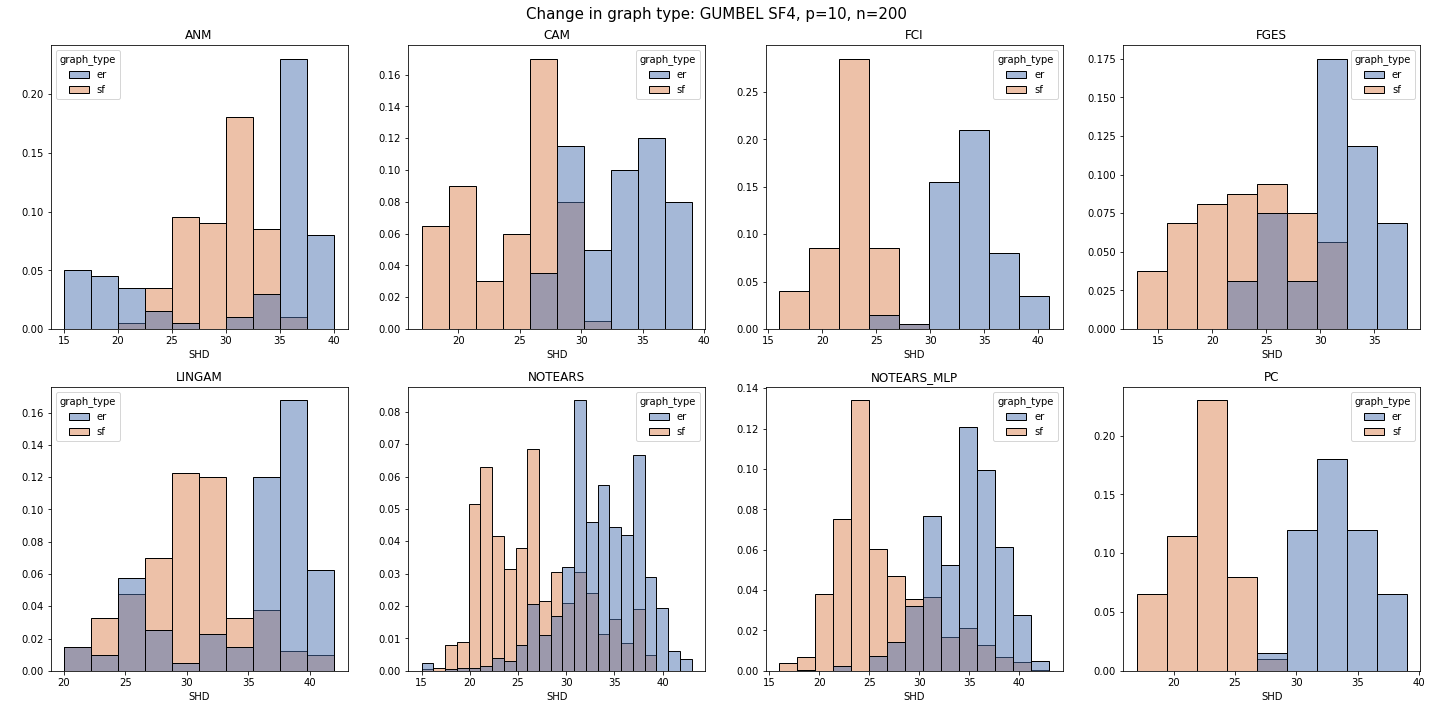

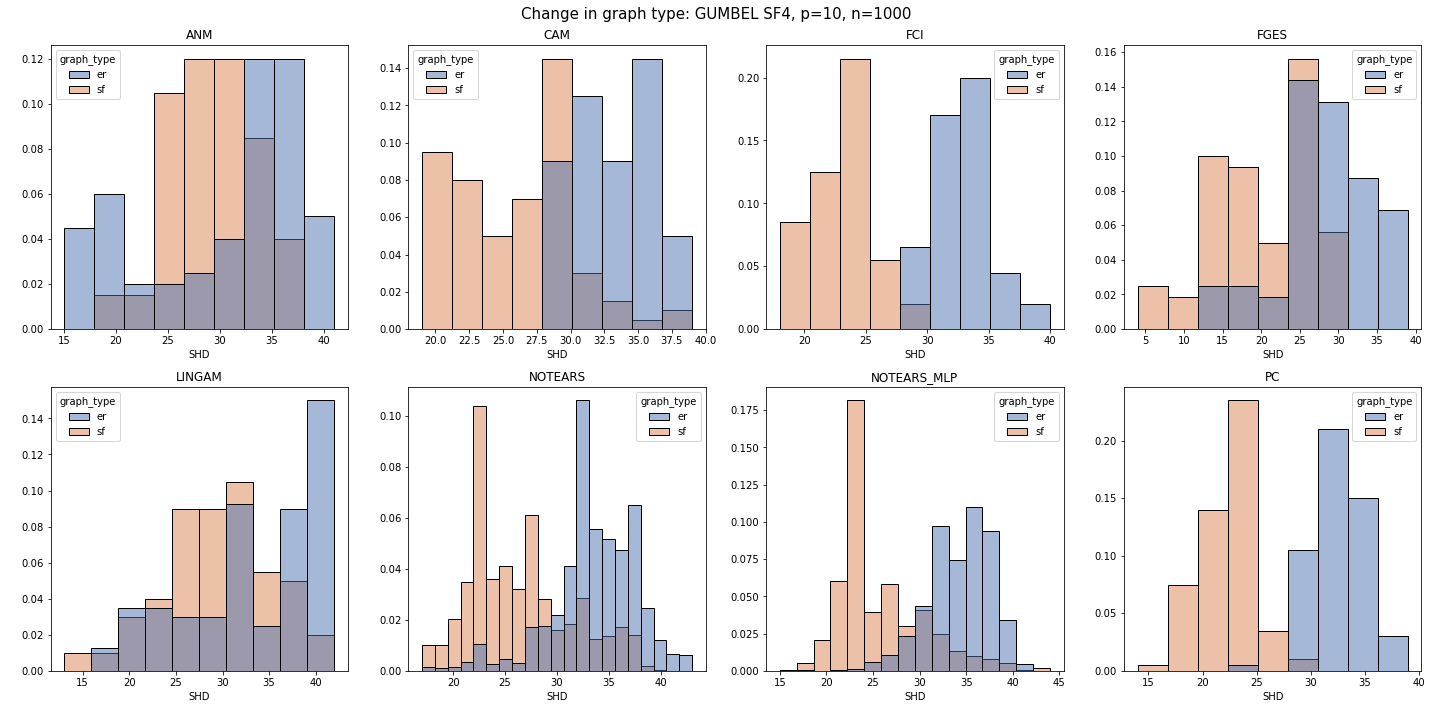

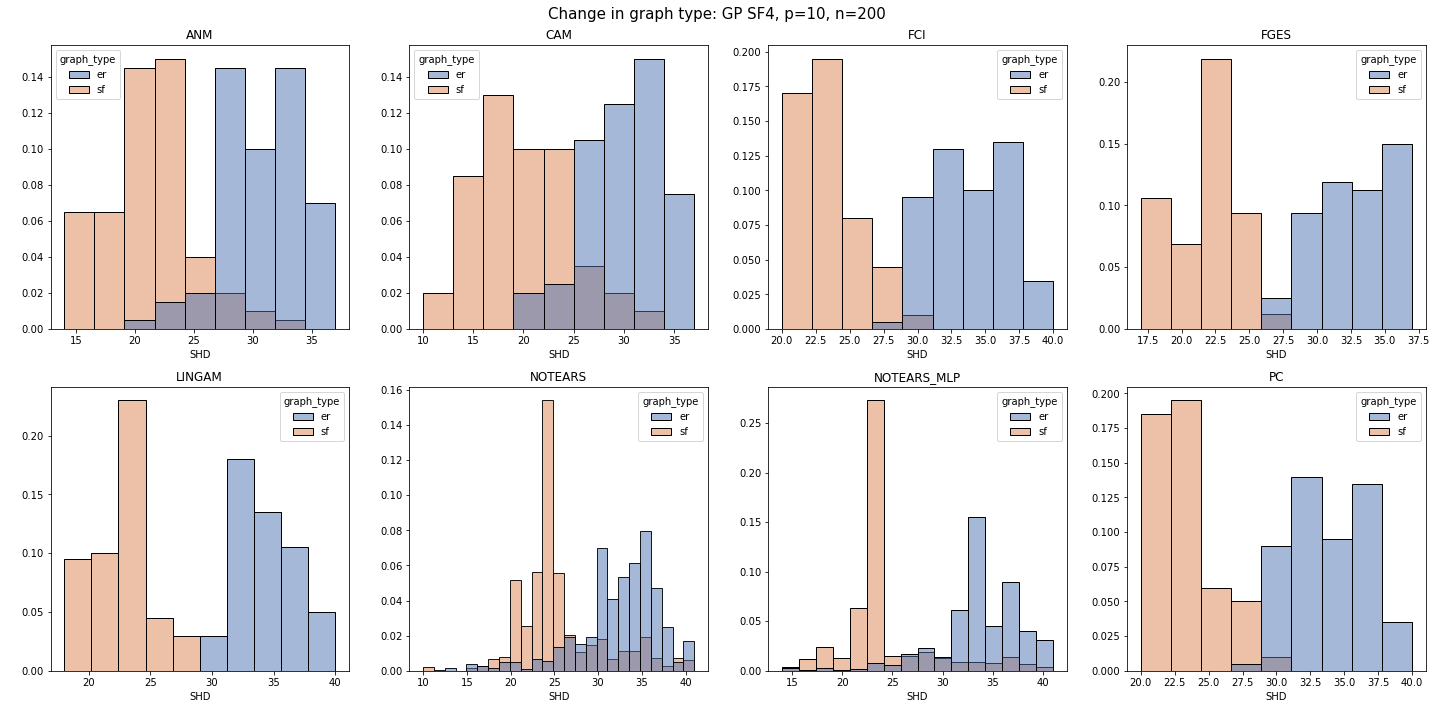

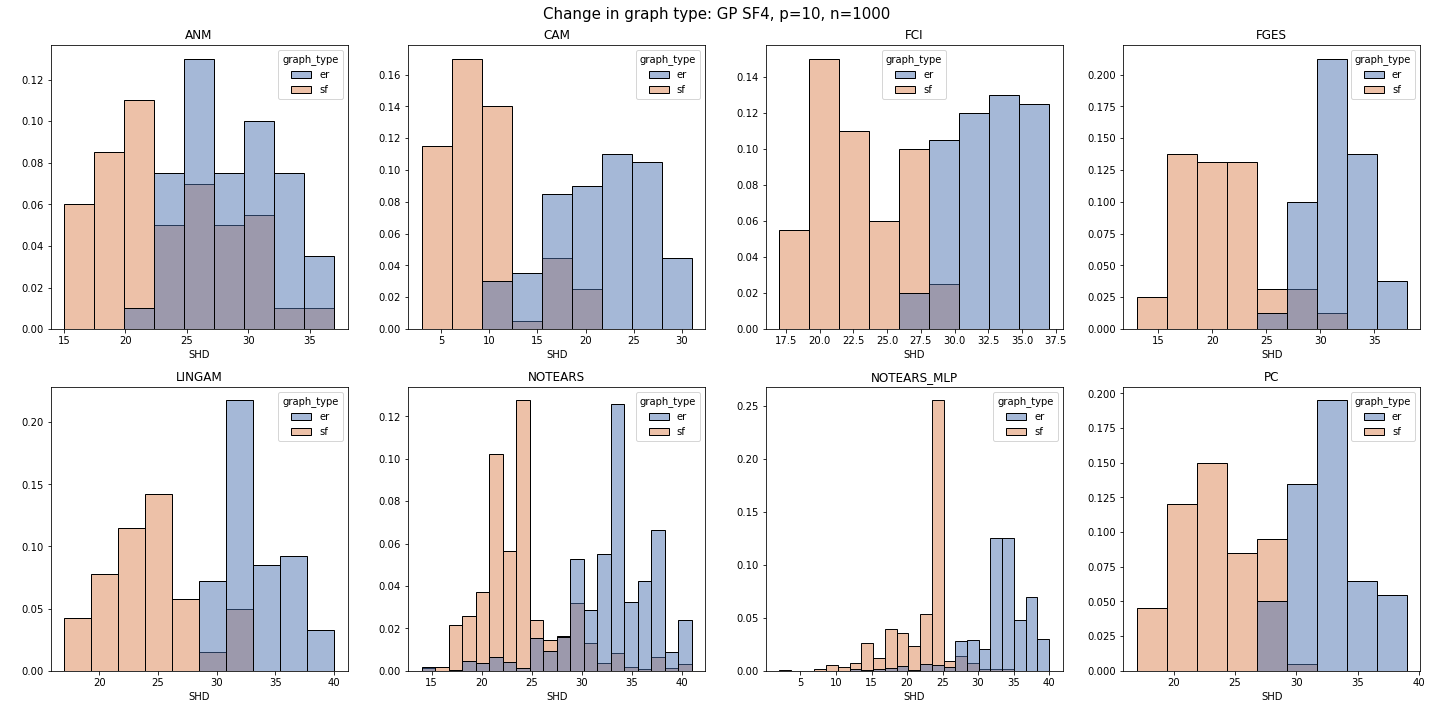

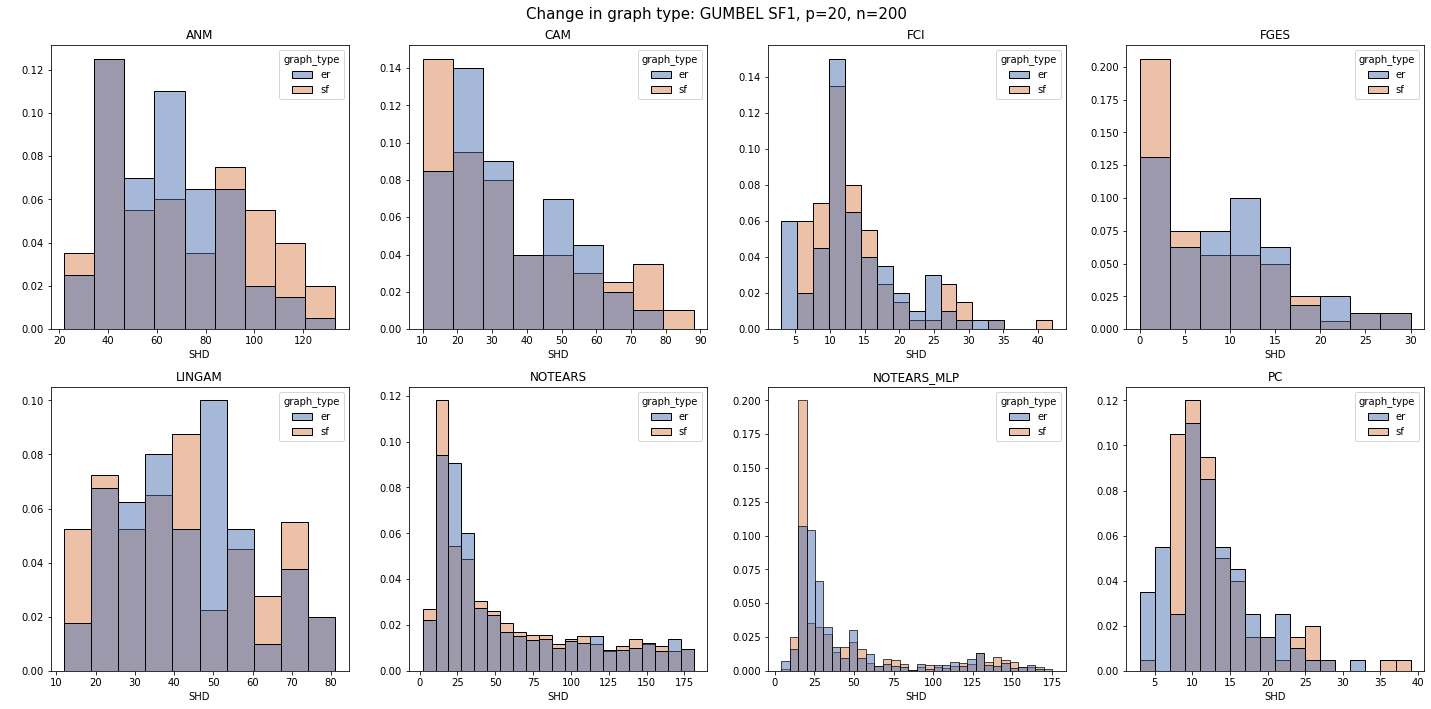

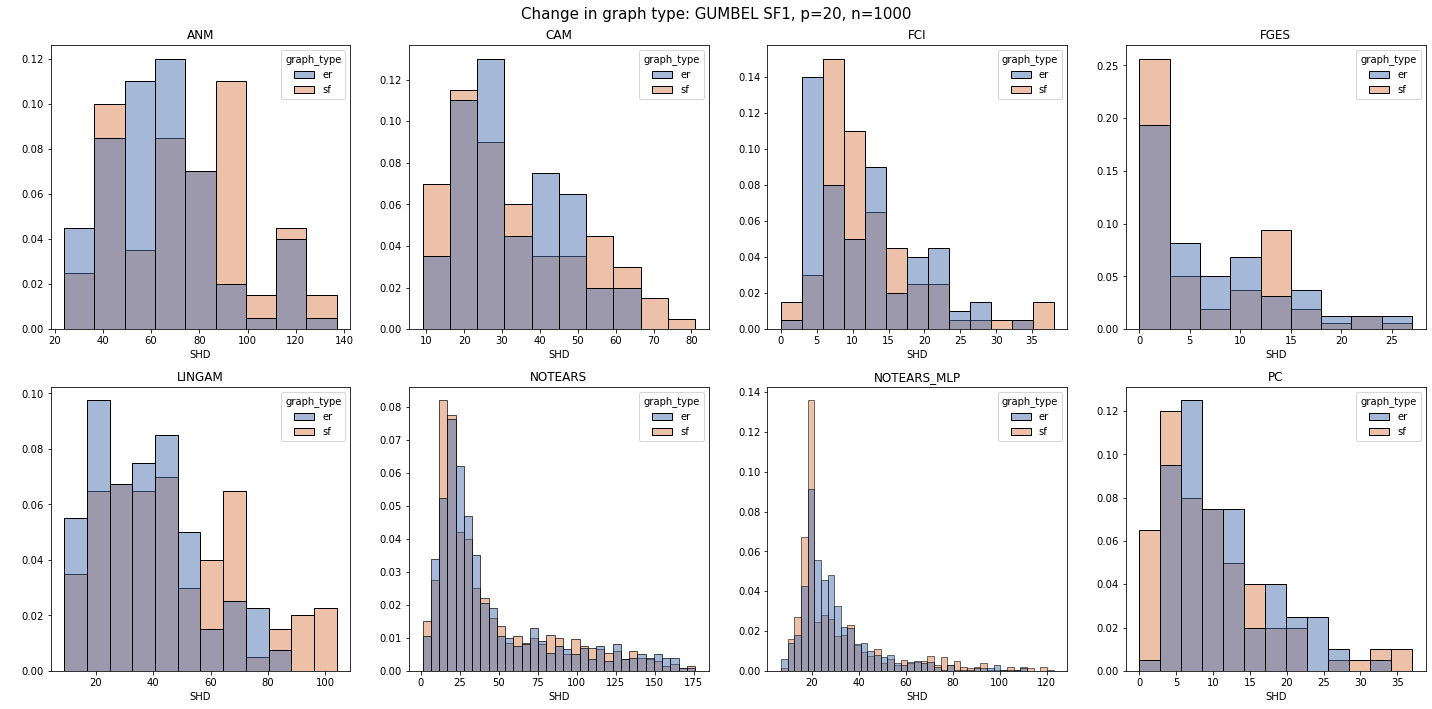

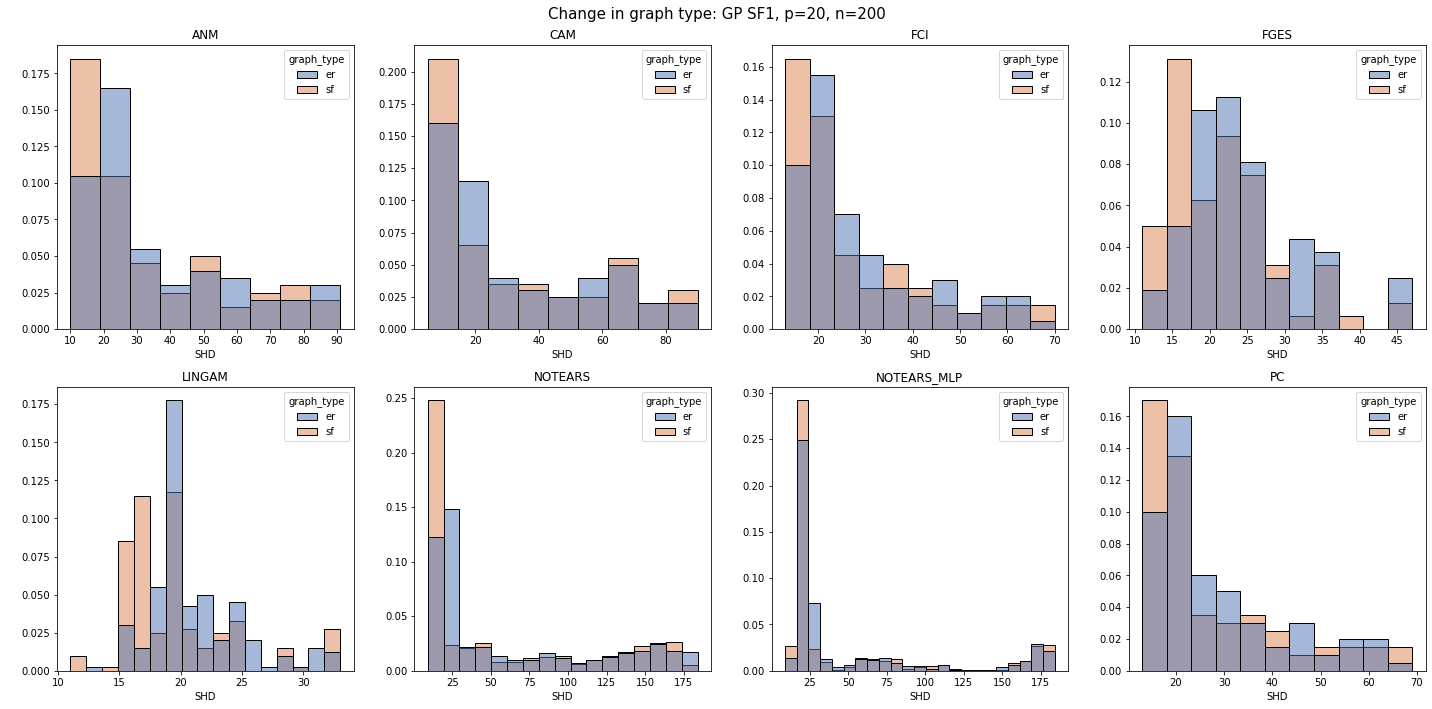

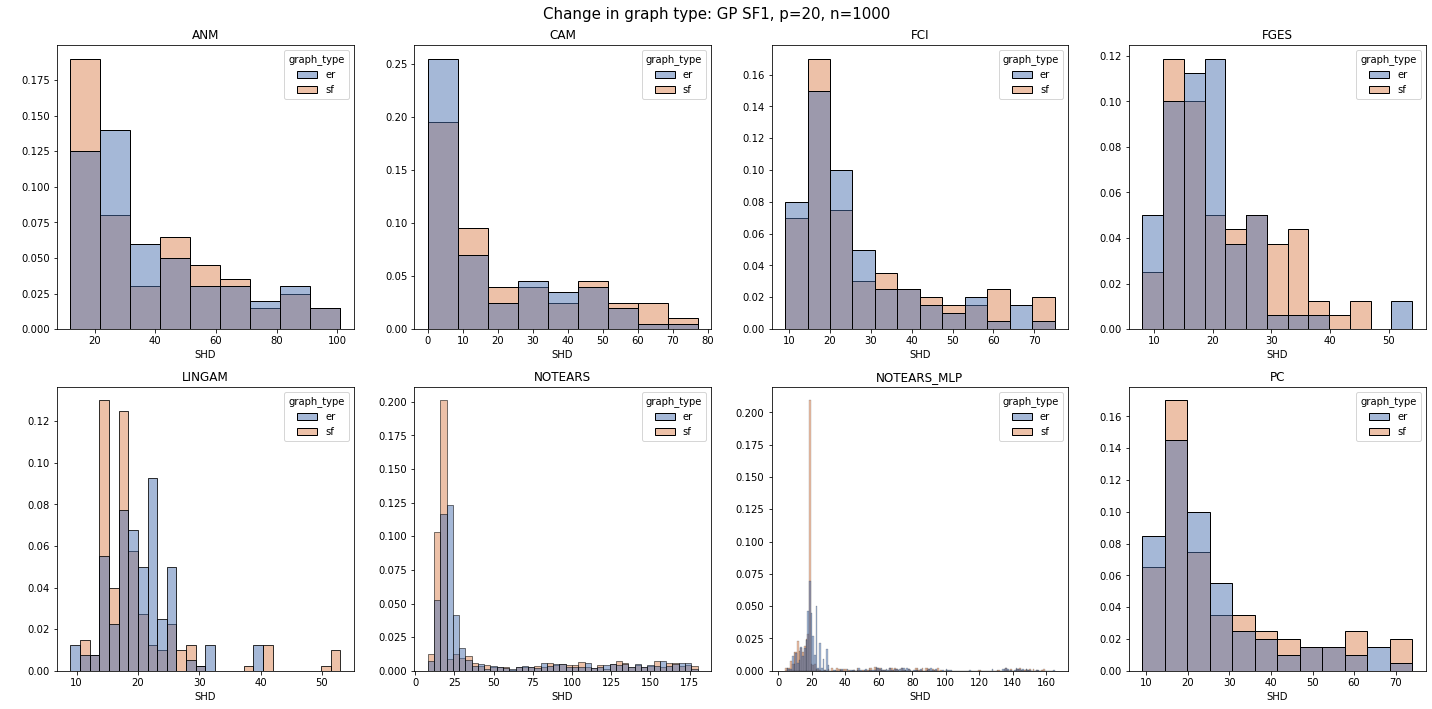

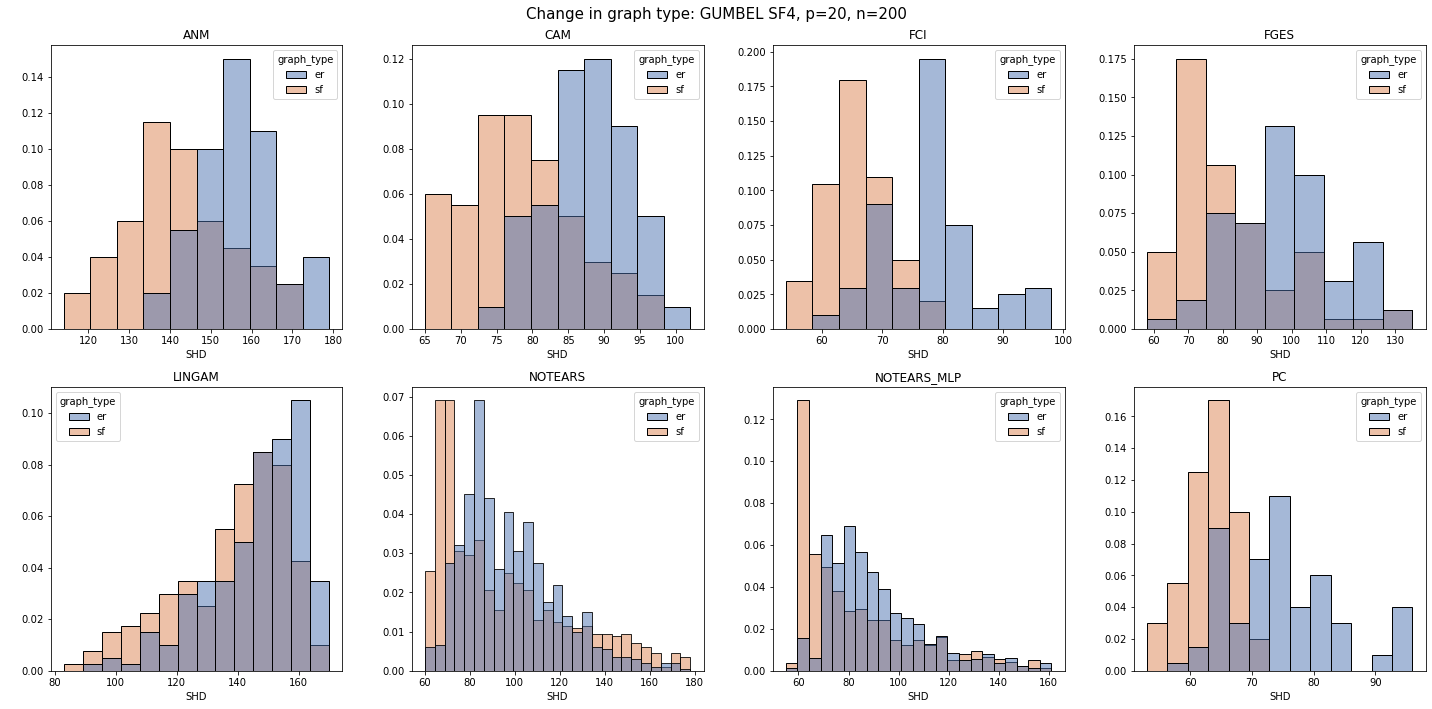

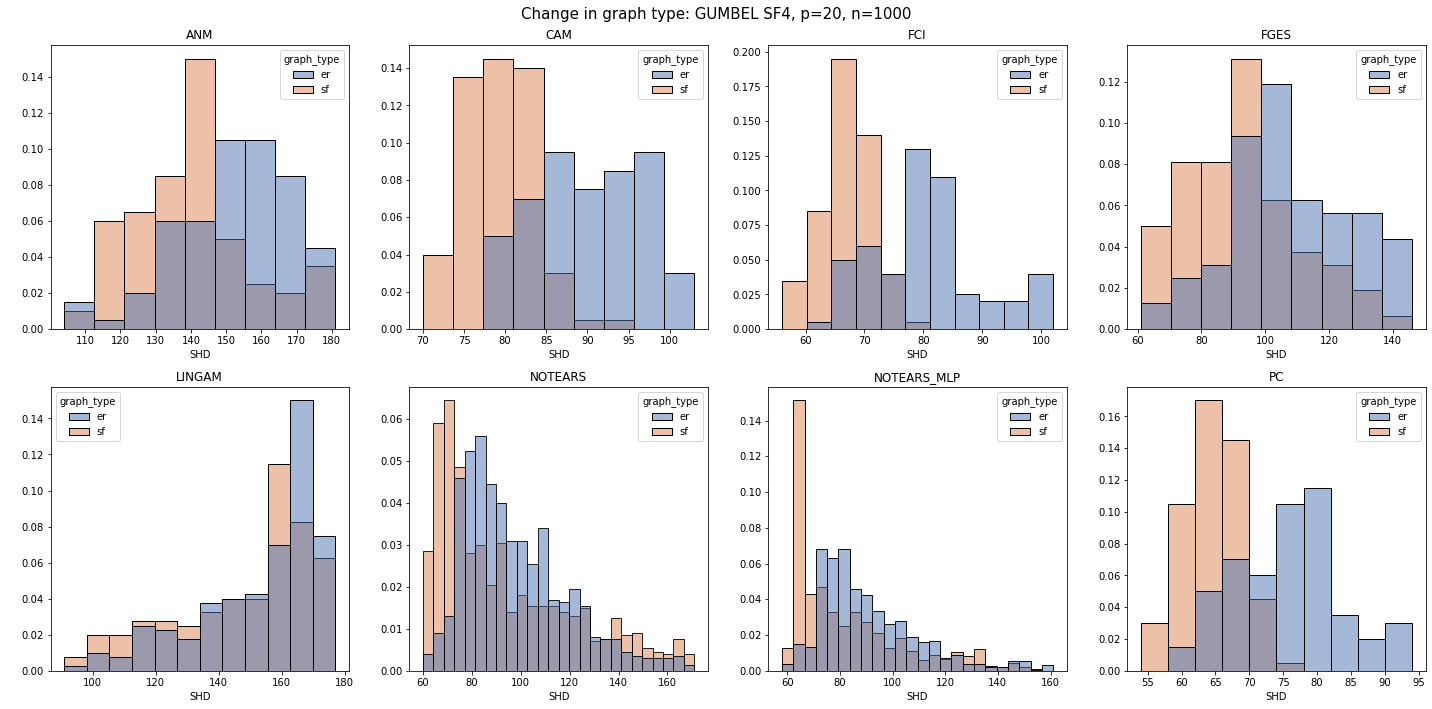

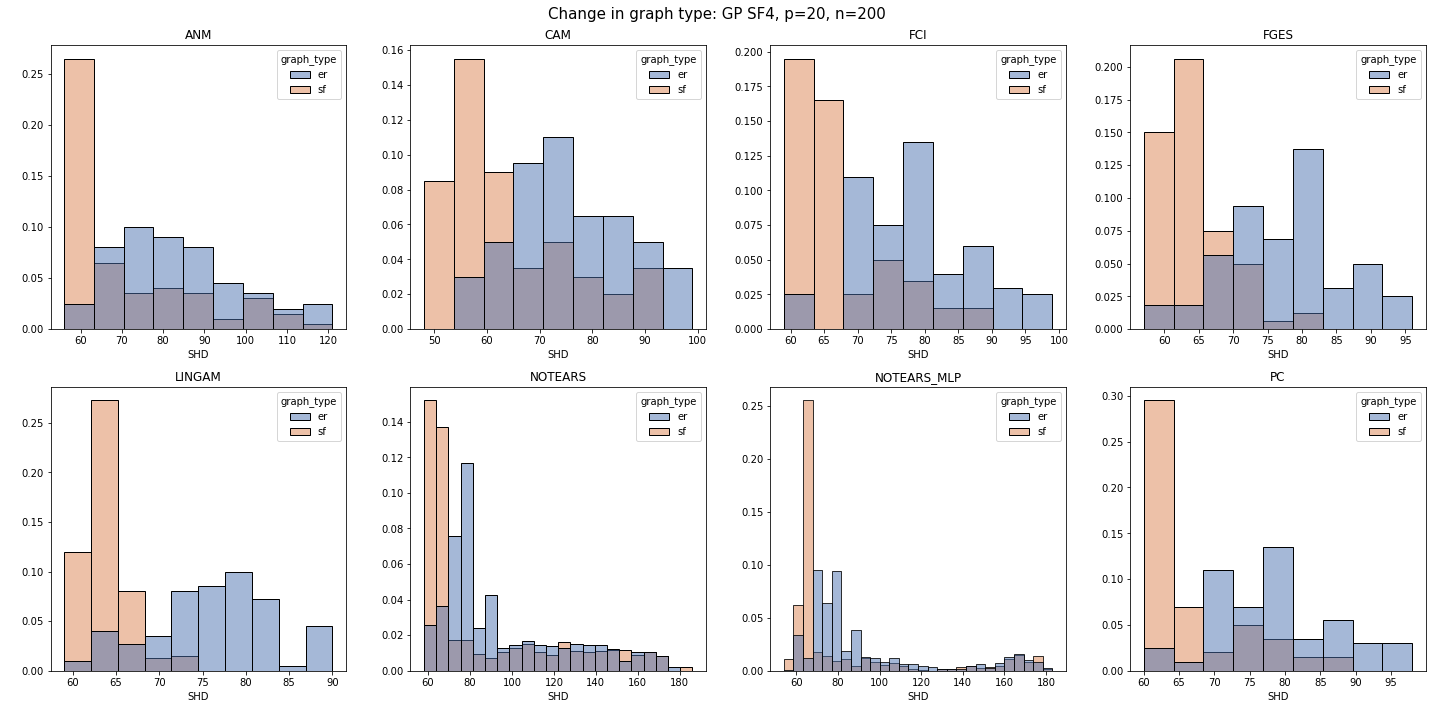

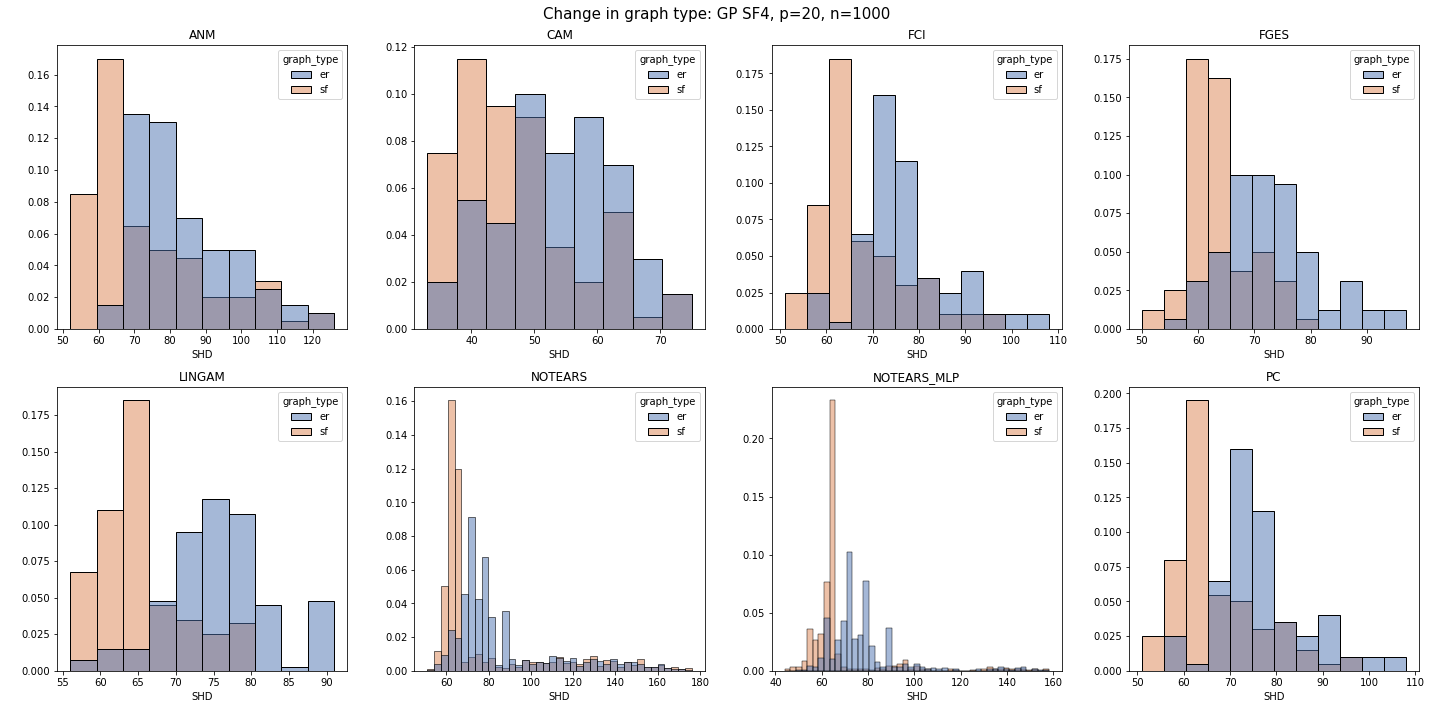

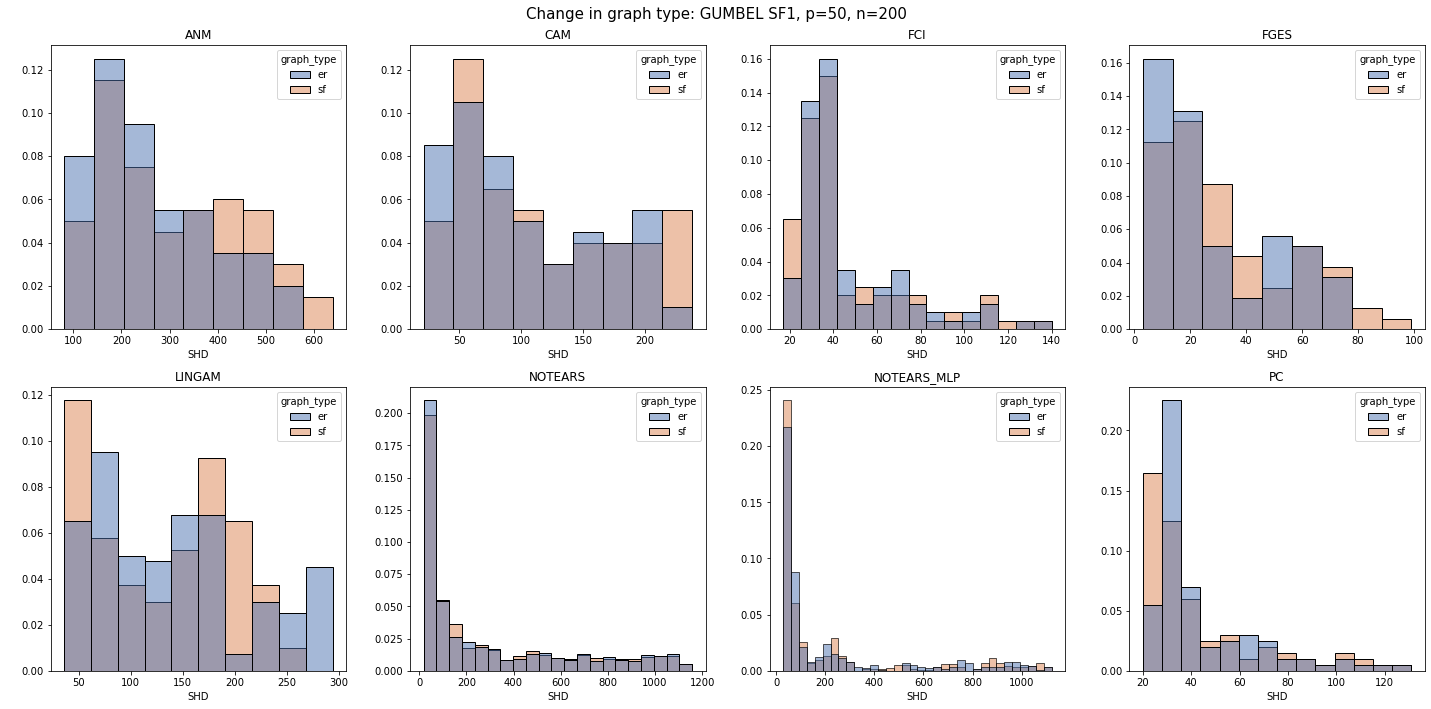

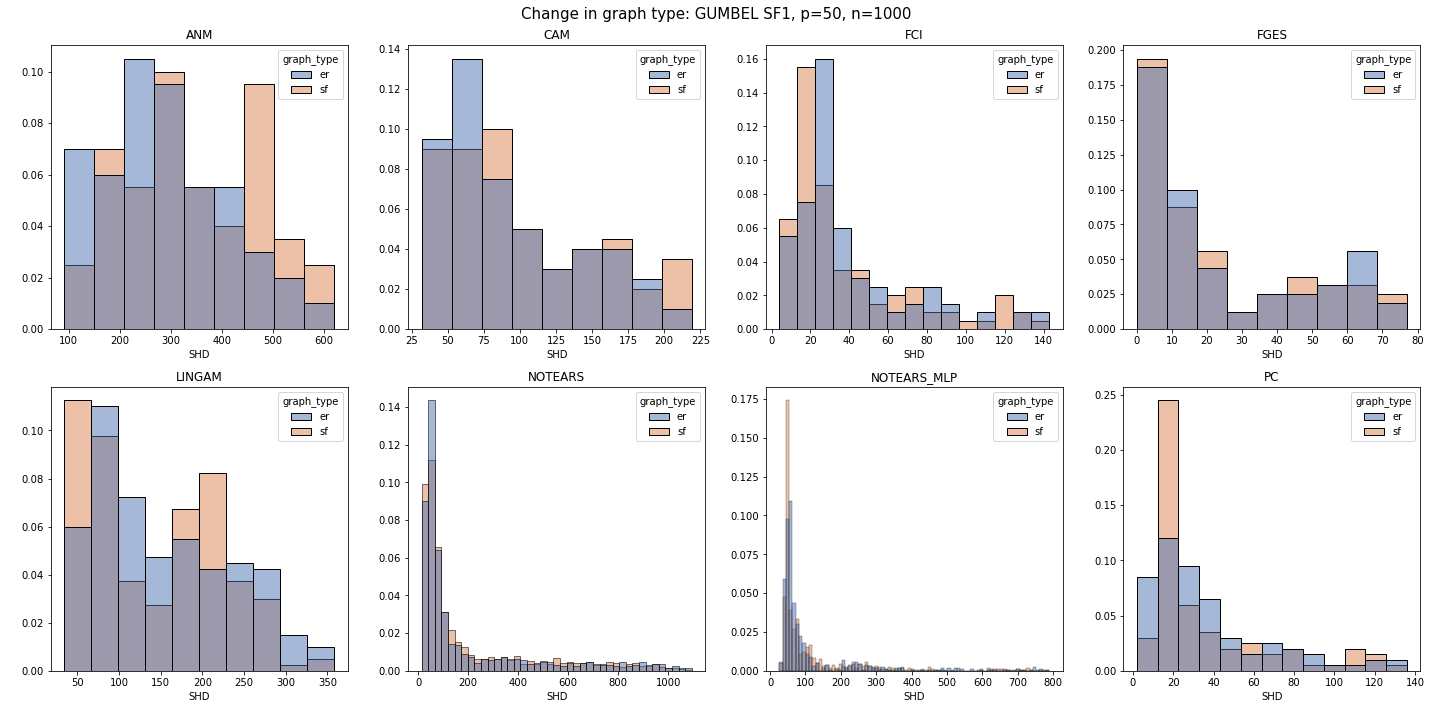

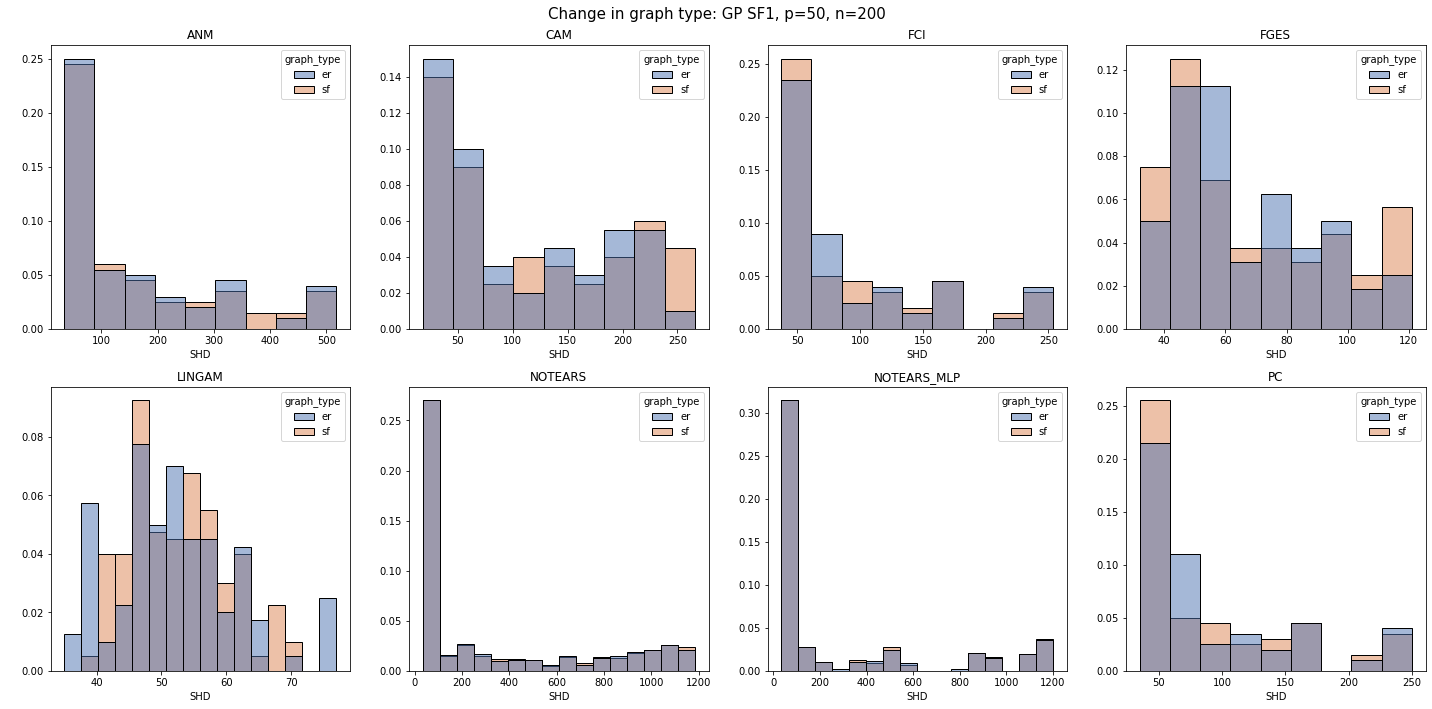

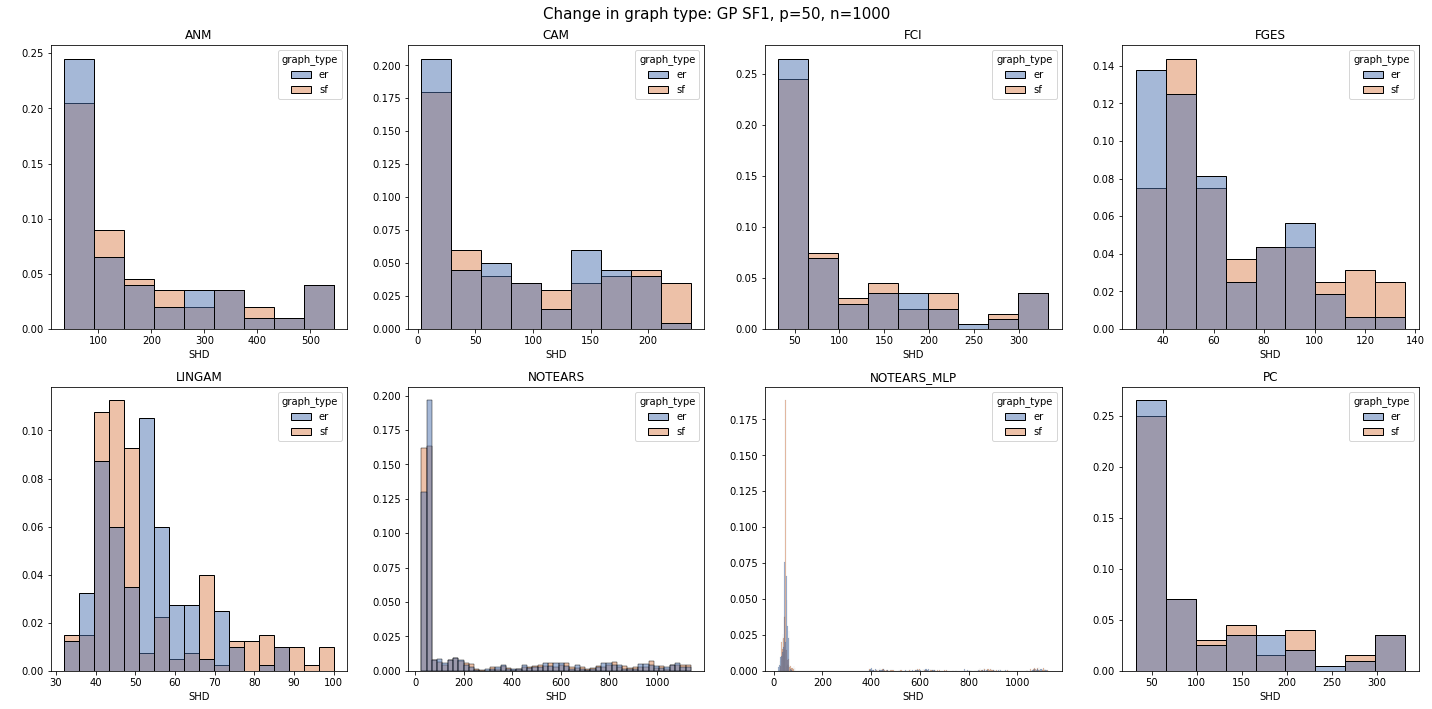

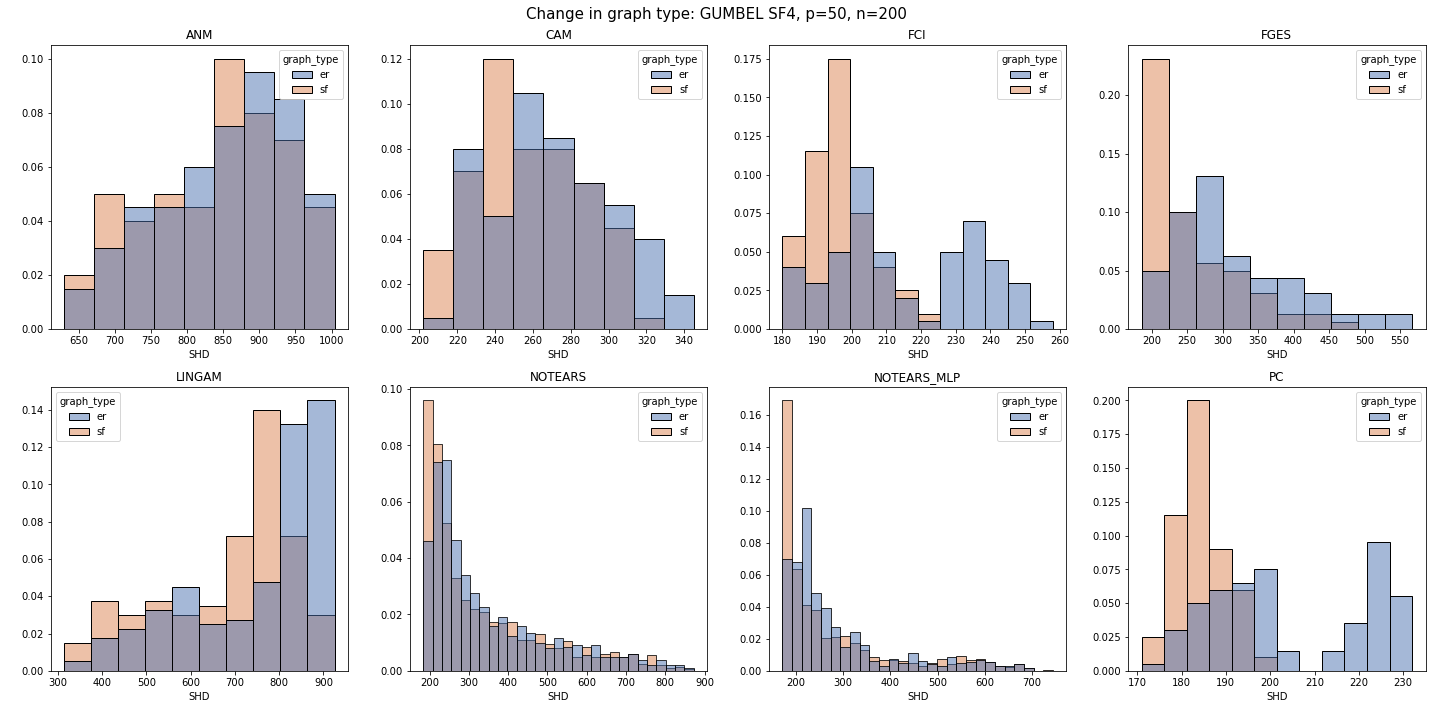

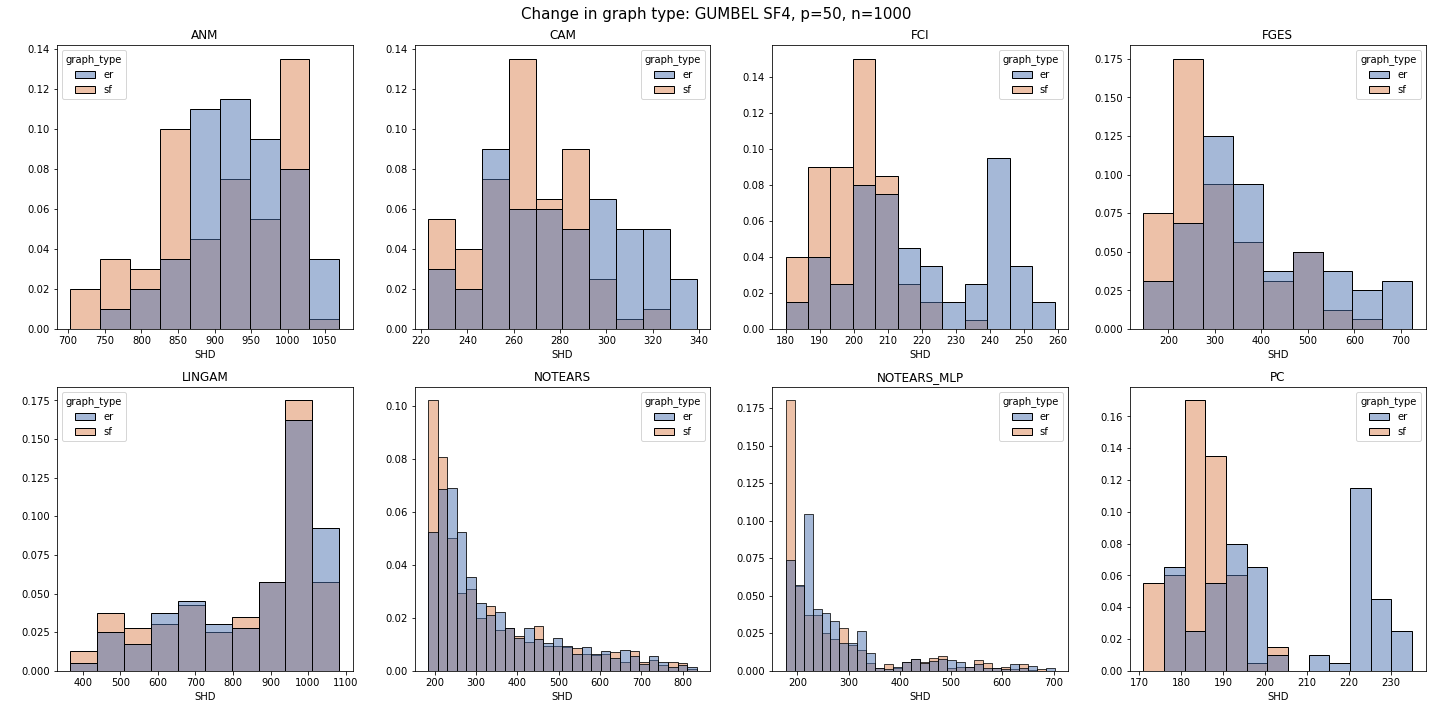

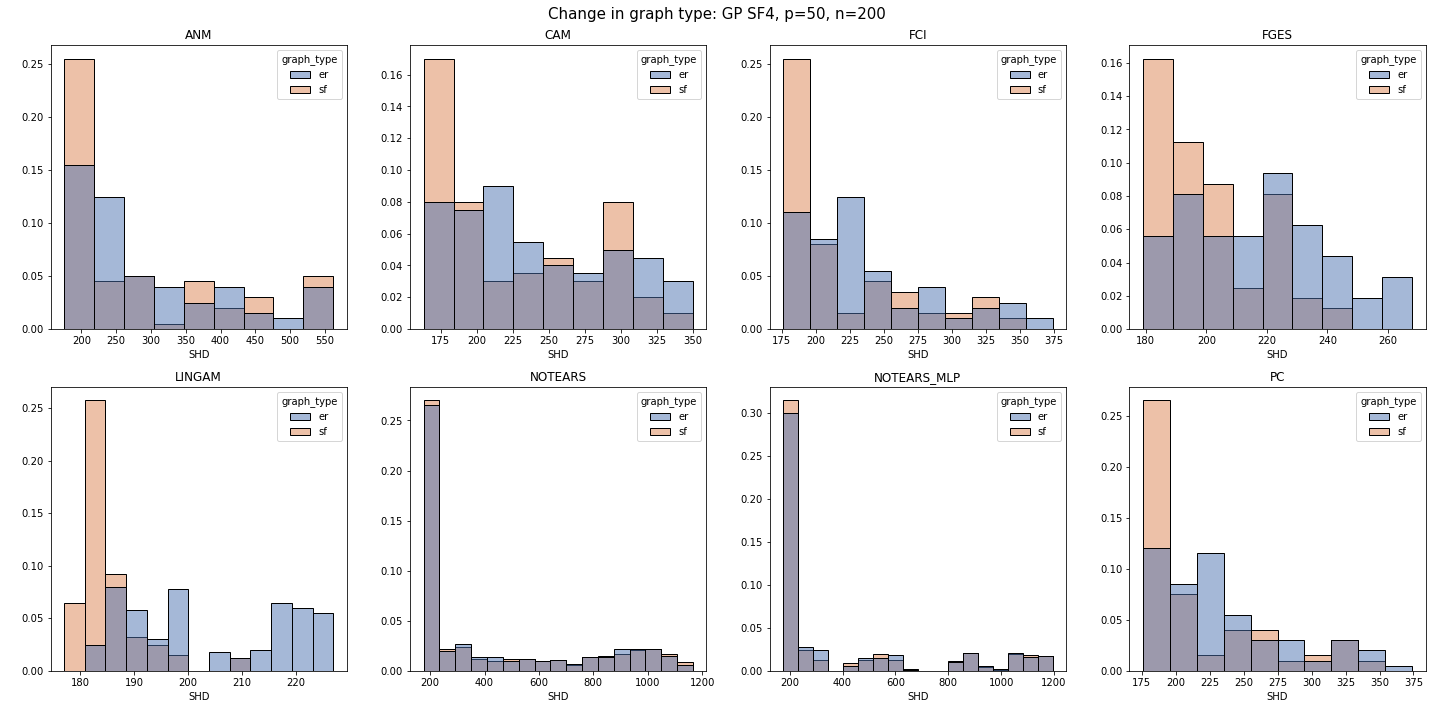

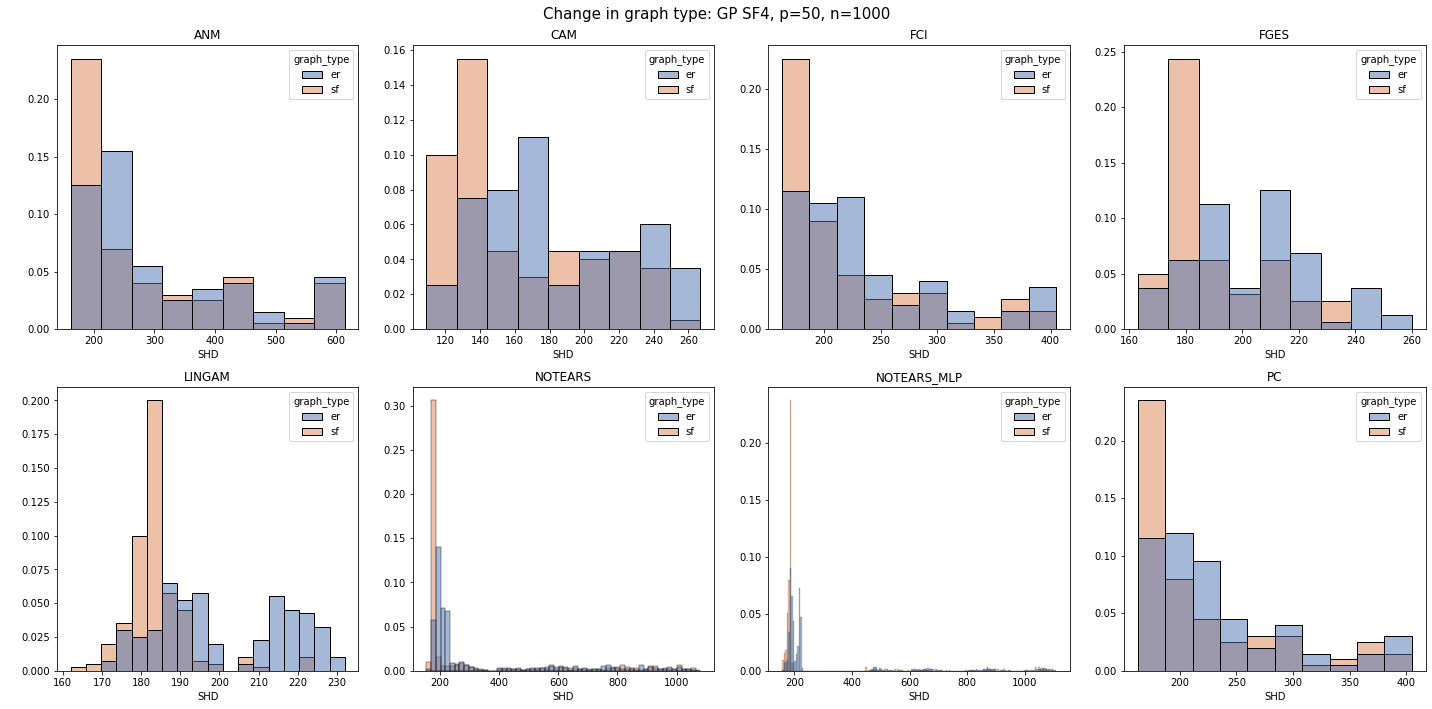

In [8]:
for p in [10, 20, 50]:
    for d in [1, 4]:
        for sem in ['gumbel', 'gp']:
            for n in [200, 1000]:
                plot_gt(p, d, sem, n)